Arnaud Ajamian</br>
BrainStation - Data Science

---

# Capstone: E-Commerce Customer Churn Prediction
---
---

### Introduction

Since the rise of retail e-commerce (defined as the exchange of goods or services by using the internet), customers and consumers have been provided with an alternate means through which they may purchase and acquire goods and services of interest. In contrast to the traditional brick-and-mortar business model, retail e-commerce has provided entrepreneurs and businesses alike with a new sales channel by which one may engage with potential customers. As such, e-commerce has become a hyper-competitive landscape in which entities vie for customer loyalty to gain and retain market share.

From this, it has become imperative for companies to not only maximize revenue to ensure continued and prolonged growth; but to also provide a customer experience that supersedes that of competitors operating within the same or similar market. As such, customer experience in and of itself may prove a competitive advantage that can help increase the customer retention rate. 

Given the significance of customer satisfaction and retention towards the health and prosperity of any company; the following seeks to ascertain whether or not a predictive model is able to determine which customer(s) is/are most likely to cease using a company's product or service (in this context, the product / service is an e-commerce site). If so, this would enable companies to identify those customers that may be prone to no longer utilizing the site and address any of their concerns prior to them no longer being a customer. The result of which alters the means by which a company engages with its customer base from reactive to proactive. Fundamentally, customer churn as a key performance indicator (KPI) is a lagging indicator of customer satisfaction, whereas a machine learning model applied towards customer churn would provide predictive paradigm. In doing so, companies may be able to leverage the model's predictive power to reduce the rate of customer churn, thereby increasing the customer retention rate.

<a id="back_to_top"></a>

### Table of Contents

* [Learning About the Dataset](#learning-about-the-dataset)</br>
</br>
* [Data Preprocessing](#data_preprocessing)</br>
    * [Account for Missing Values](#missing_values)</br>
    * [Standardize Naming Convention](#standard_name)</br>
    * [Update Column Headers](#update_col_headers)</br>
    * [Update Column Type](#update_col_type)</br>
    * [Binarization](#binary)</br>
        * [Unconsolidated Dummy Variables](#unconsol_var)</br>
        * [Consolidated Dummy Variables](#consol_var)</br>
</br>
* [Exploratory Data Analysis](#data_exploration)</br>
</br>
* [Bivariate Analysis & Basic Modeling](#bivariate_analysis_basic_models)</br>
    * [Correlation and Statistical Significance](#corr_stat_sig)</br>
    * [Logistic Regression](#log_reg)</br>
        * [Unconsolidated Dummy Variables](#log_reg_unconsol_var)</br>
        * [Consolidated Dummy Variables](#log_reg_consol_var)</br>
        * [Original DataFrame](#log_reg_orig_df)</br>
</br>
* [Supervised Machine Learning Models (No Sampling)](#no_sampling_super_machine_learning_models)</br>
    * [Non-Ensemble Learning](#no_sampling_learning)</br>    
        * [K Nearest Neighbors](#no_sampling_knn)</br>
        * [Decision Trees](#no_sampling_decision_trees)</br>
        * [Support Vector Machines](#no_sampling_svm)</br>
        </br>
    * [Ensemble Learning](#no_sampling_ensemble_learning)</br>
        * [K Nearest Neighbors](#no_sampling_ensemble_knn)</br>
        * [Random Forests](#no_sampling_random_forests)</br>
        * [Support Vector Machines](#no_sampling_ensemble_svm)</br>
</br>
* [Supervised Machine Learning Models (Sampling with SMOTE)](#sampling_super_machine_learning_models)</br>
    * [Non-Ensemble Learning](#sampling_learning)</br>    
        * [K Nearest Neighbors](#sampling_knn)</br>
        * [Decision Trees](#sampling_decision_trees)</br>
        * [Support Vector Machines](#sampling_svm)</br>
        </br>
    * [Ensemble Learning](#sampling_ensemble_learning)</br>
        * [K Nearest Neighbors](#sampling_ensemble_knn)</br>
        * [Random Forests](#sampling_random_forests)</br>
        * [Support Vector Machines](#sampling_ensemble_svm)</br>
</br>
* [Boosting](#boosting)</br>
    * [Adaptive Boosting](#adaboost)</br>
    * [Gradient Boosting](#gradient_boost)</br>
    * [XG Boost](#xg_boost)</br>
</br>
* [Neural Network - TensorFlow](#neural_network)</br>
</br>
* [Conclusion](#conclusion)
</br>
</br>
* [Appendix](#appendix)
---

#### Data Dictionary

**`CustomerID`**: Unique customer ID</br>
**`Churn`**: Churn flag</br>
**`Tenure`**: Customer tenure</br>
**`PreferredLoginDevice`**: Customer preferred login device</br>
**`CityTier`**: City tier</br>
**`WarehouseToHome`**: Distance between the warehouse and the customer's home</br>
**`PreferredPaymentMode`**: Customer preferred payment method</br>
**`Gender`**: Gender</br>
**`HourSpendOnApp`**: Number of hours spend on the site</br>
**`NumberOfDeviceRegistered`**: Total number of devices registered for a particular customer</br>
**`PreferedOrderCat`**: Customer's preferred order category based on the previous month</br>
**`SatisfactionScore`**: Satisfactory score of customer on service</br>
**`MaritalStatus`**: Marital status of customer</br>
**`NumberOfAddress`**: Total number of addresses registered for a particular customer</br>
**`Complain`**: If a complaint has been raised by a customer in the month prior</br>
**`OrderAmountHikeFromlastYear`**: Percentage increase in the number of orders compared to last year</br>
**`CouponUsed`**: Total number of coupon(s) used in the previous month</br>
**`OrderCount`**: Total number of order(s) placed in the previous month</br>
**`DaySinceLastOrder`**: Day(s) since last order by customer</br>
**`CashbackAmount`**: Average cashback amount in the previous month</br>

#### Problem Statement

Can we build a predictive model to determine which customers are most likely to stop using a company's retail e-commerce site?

#### Value Proposition

To leverage a model's predictive power to reduce the rate of customer churn, thereby increasing the customer retention rate.

---

#### Importing Libraries and Loading Dataset

First and foremost, the necessary libraries need to be imported, including: `numpy`, `pandas`, `matplot` and `seaborn` as well as statistical ones such as `scipy` and `statsmodels`.

In [694]:
# import libraries
import numpy as np
import pandas as pd

# import visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns

# import statistics libraries
from scipy import stats
import statsmodels.api as sm

# import progress bar library
from tqdm import tqdm

Once complete, the data is loaded in from the `E Commerce Dataset.xlsx` file using Pandas `read_excel` function and stored in a dataframe (`customer_df`).

In [695]:
# import the data from the 'E Comm' tab
# store the data in a dataframe (df)
customer_df = pd.read_excel("E-Commerce Customer Churn Prediction - Data/E Commerce Dataset.xlsx", "E Comm")

### Learning About the Dataset
---
<a id="learning-about-the-dataset"></a>
[Back to Top](#back_to_top)

Having imported the necessary libraries and dataset of interest, we can begin to conduct some preliminary data analysis to better understand the information contained within the dataframe. In using `.shape`, the dimensions of the dataframe can be determined.

In [696]:
# return the shape of the dataframe
f'The dataset contains {customer_df.shape[0]:,} rows and {customer_df.shape[1]} columns.'

'The dataset contains 5,630 rows and 20 columns.'

The `.head()` function may then be called upon in order to display and evaluate the first 10 rows of the dataframe. </br>
From which, a few observations can be made:

 * The `CustomerID` field could be used as the dataframe index
 * The presence of `NaN` values which will need to be accounted for at a later stage (eg. `Tenure`, `HourSpendOnApp`)
 * The naming convention of the `PreferredPaymentMode` field appears to be inconsistent (eg. abbreviated - CC / UPI vs. non-abbreviated - Debit Card / Cash on Delivery)

In [697]:
# preview the first 10 rows of the dataframe
customer_df.head(10)

,CustomerID,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
0,50001,1,4.0,Mobile Phone,3,6.0,Debit Card,Female,3.0,3,Laptop & Accessory,2,Single,9,1,11.0,1.0,1.0,5.0,159.93
1,50002,1,NaN,Phone,1,8.0,UPI,Male,3.0,4,Mobile,3,Single,7,1,15.0,0.0,1.0,0.0,120.90
2,50003,1,NaN,Phone,1,30.0,Debit Card,Male,2.0,4,Mobile,3,Single,6,1,14.0,0.0,1.0,3.0,120.28
3,50004,1,0.0,Phone,3,15.0,Debit Card,Male,2.0,4,Laptop & Accessory,5,Single,8,0,23.0,0.0,1.0,3.0,134.07
4,50005,1,0.0,Phone,1,12.0,CC,Male,NaN,3,Mobile,5,Single,3,0,11.0,1.0,1.0,3.0,129.60
5,50006,1,0.0,Computer,1,22.0,Debit Card,Female,3.0,5,Mobile Phone,5,Single,2,1,22.0,4.0,6.0,7.0,139.19
6,50007,1,NaN,Phone,3,11.0,Cash on Delivery,Male,2.0,3,Laptop & Accessory,2,Divorced,4,0,14.0,0.0,1.0,0.0,120.86
7,50008,1,NaN,Phone,1,6.0,CC,Male,3.0,3,Mobile,2,Divorced,3,1,16.0,2.0,2.0,0.0,122.93
8,50009,1,13.0,Phone,3,9.0,E wallet,Male,NaN,4,Mobile,3,Divorced,2,1,14.0,0.0,1.0,2.0,126.83
9,50010,1,NaN,Phone,1,31.0,Debit Card,Male,2.0,5,Mobile,3,Single,2,0,12.0,1.0,1.0,1.0,122.93


Given that our area of interest is to determine which customers are most likely to stop using a company's product or service; we would like to find out how many customers no longer use the e-commerce platform as designated by the `Churn` column. From which, the rate of customer churn may be calculated (as demonstrated below):

In [698]:
# calculate the rate of customer churn based on the 'Churn' column
# where 1 represents a customer who has ceased using the e-commerce platform
# and where 0 represents a customer who continues to utilize the e-commerce platform

f'The rate of customer churn (based on the information availabe) is \
{round(customer_df[customer_df.Churn == 1].shape[0] / customer_df.shape[0] * 100, 2)}% \
which equates to {customer_df[customer_df.Churn == 1].shape[0]} customers (out of 5,630).'

'The rate of customer churn (based on the information availabe) is 16.84% which equates to 948 customers (out of 5,630).'

Next, the `.info()` function is utilized in order to determine the following:
* The fields contained within the dataframe
* The number of non-null values per column
* Each column's respective dtype

From the results, it can be noted that certain attributes contain null values given that each column is expected to have 5,630 non-null values.

In [699]:
# return each column's name, count of non-null values and dtype
customer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5630 entries, 0 to 5629
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   CustomerID                   5630 non-null   int64  
 1   Churn                        5630 non-null   int64  
 2   Tenure                       5366 non-null   float64
 3   PreferredLoginDevice         5630 non-null   object 
 4   CityTier                     5630 non-null   int64  
 5   WarehouseToHome              5379 non-null   float64
 6   PreferredPaymentMode         5630 non-null   object 
 7   Gender                       5630 non-null   object 
 8   HourSpendOnApp               5375 non-null   float64
 9   NumberOfDeviceRegistered     5630 non-null   int64  
 10  PreferedOrderCat             5630 non-null   object 
 11  SatisfactionScore            5630 non-null   int64  
 12  MaritalStatus                5630 non-null   object 
 13  NumberOfAddress   

In the subsequent code cell, the `.isna().sum()` functions is used to retrieve the total number of null values per column.

In [700]:
# return the count of missing values per column
customer_df.isna().sum()

CustomerID                       0
Churn                            0
Tenure                         264
PreferredLoginDevice             0
CityTier                         0
WarehouseToHome                251
PreferredPaymentMode             0
Gender                           0
HourSpendOnApp                 255
NumberOfDeviceRegistered         0
PreferedOrderCat                 0
SatisfactionScore                0
MaritalStatus                    0
NumberOfAddress                  0
Complain                         0
OrderAmountHikeFromlastYear    265
CouponUsed                     256
OrderCount                     258
DaySinceLastOrder              307
CashbackAmount                   0
dtype: int64

In [701]:
# return the total number of missing values in the df
f"The dataframe contains {customer_df.isna().sum().sum():,} missing values."

'The dataframe contains 1,856 missing values.'

From the results displayed above, it can be noted that 7 columns contain missing values which will need to be accounted for.</br>
*(The occurrence of missing values will be addressed and accounted for in the following section - "Data Preprocessing")*

Lastly, we verify whether the dataframe contains any row or column duplication, for which it can be noted that there are no duplicates.

In [702]:
# check for row and column duplicates

# determine if there are any duplicate columns:
print(f"Duplicate columns: {customer_df.T.duplicated().any()}")

# determine if there are any duplicate rows:
print(f"Duplicate rows: {customer_df.duplicated().sum().any()}")

Duplicate columns: False
Duplicate rows: False


Given that the dataframe contains a `CustomerID` field that may be act as the index of a dataframe, it must first be confirmed if any duplicates exist in this column.

In [703]:
f"Duplicate Customer ID: {customer_df['CustomerID'].duplicated().any()}"

'Duplicate Customer ID: False'

Having previously confirmed that the `CustomerID` column does not contain any duplicate or null values; this field may be set as the dataframe's index using the `.set_index` method given that each of the values contained within are unique.

In [704]:
# set 'CustomerID' as df index
customer_df.set_index('CustomerID', inplace = True)

Following this modification, the first 5 rows of the dataframe are then retrieved using `.head()` in order to confirm that the update to the index values has taken effect.

In [705]:
# confirm 'CustomerID' has been set as df index
customer_df.head()

,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
CustomerID,,,,,,,,,,,,,,,,,,,
50001,1,4.0,Mobile Phone,3,6.0,Debit Card,Female,3.0,3,Laptop & Accessory,2,Single,9,1,11.0,1.0,1.0,5.0,159.93
50002,1,NaN,Phone,1,8.0,UPI,Male,3.0,4,Mobile,3,Single,7,1,15.0,0.0,1.0,0.0,120.90
50003,1,NaN,Phone,1,30.0,Debit Card,Male,2.0,4,Mobile,3,Single,6,1,14.0,0.0,1.0,3.0,120.28
50004,1,0.0,Phone,3,15.0,Debit Card,Male,2.0,4,Laptop & Accessory,5,Single,8,0,23.0,0.0,1.0,3.0,134.07
50005,1,0.0,Phone,1,12.0,CC,Male,NaN,3,Mobile,5,Single,3,0,11.0,1.0,1.0,3.0,129.60


---
### Data Preprocessing
---
<a id="data_preprocessing"></a>

After having gained a preliminary understanding of the data's composition, we will need to review the dataset and address any missing values, inconsistencies in the naming convention of text values, and transform fields in the dataframe through binarization (where applicable). All of which will help to ensure that the subsequent models are based on a clean and complete dataset.

[Back to Top](#back_to_top)

#### Account for Missing Values
---
<a id="missing_values"></a>

In the following section, missing values that are present throughout the dataframe will be addressed and accounted for.</br>
The first order of operation is to retrieve all of the columns from the dataframe that contain missing values (as demonstrated below):

In [706]:
# return all rows and columns from the df that contain missing values
col_with_missing_values_df = customer_df.loc[:, customer_df.columns[customer_df.isna().any()].tolist()]

# preview the dataframe
col_with_missing_values_df.head()

,Tenure,WarehouseToHome,HourSpendOnApp,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder
CustomerID,,,,,,,
50001,4.0,6.0,3.0,11.0,1.0,1.0,5.0
50002,NaN,8.0,3.0,15.0,0.0,1.0,0.0
50003,NaN,30.0,2.0,14.0,0.0,1.0,3.0
50004,0.0,15.0,2.0,23.0,0.0,1.0,3.0
50005,0.0,12.0,NaN,11.0,1.0,1.0,3.0


From the results displayed above, it can be noted that the following columns contain null / missing values:
* `Tenure`
* `WarehouseToHome`
* `HourSpendOnApp`
* `OrderAmountHikeFromlastYear`
* `CouponUsed`
* `OrderCount`
* `DaySinceLastOrder`

Recall that it had previously been identified that the dataframe contains 1,856 missing values. As such, it would be expected that this new dataframe (`col_with_missing_values_df`) contains the same amount which can be verified as follows:

In [707]:
f'The dataframe contains {col_with_missing_values_df.isna().sum().sum():,} missing values.'

'The dataframe contains 1,856 missing values.'

Following these findings, the distribution of each of the columns listed above can be plotted to assess whether the missing values can be accounted for using each column's mean or median value (given that each of the columns listed above are of dtype int64 or float64).

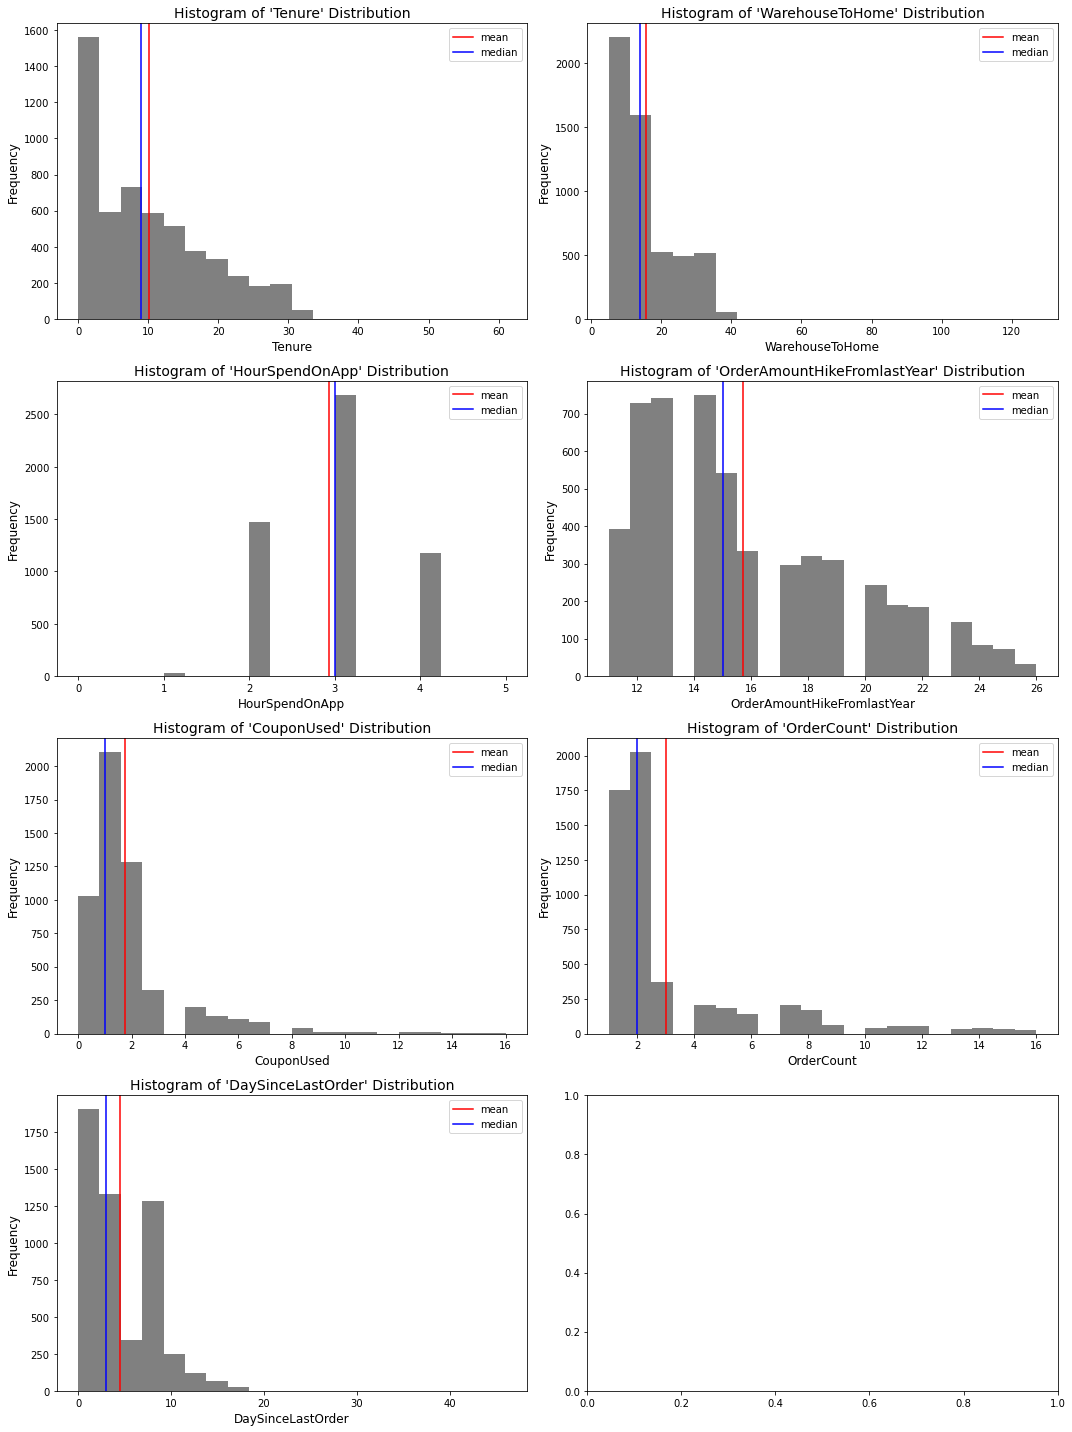

In [708]:
# graph presets
plt.subplots(4, 2, figsize = (15, 20))

for i, column in enumerate(col_with_missing_values_df.columns, 1):
    
    # create a 4 x 2 grid of plots
    plt.subplot(4, 2, i)
    
    # graph data
    plt.hist(col_with_missing_values_df[column], bins = 20, color = 'grey') # plot column distribution

    # graph settings
    plt.xlabel(column, fontsize = 12) # set x-axis label
    plt.ylabel('Frequency', fontsize = 12) # set y-axis label
    
    plt.axvline(col_with_missing_values_df[column].mean(), # add a vertical line representing the column mean
                label = 'mean', 
                color = 'red') # denoted in red
    
    plt.axvline(col_with_missing_values_df[column].median(), # add a vertical line representing the column median
                label = 'median', 
                color = 'blue') # denoted in blue

    plt.legend() # add a legend to each histogram
    plt.title(f'Histogram of \'{column}\' Distribution', fontsize = 14) # set histogram title

# display graph
plt.tight_layout()

From the visualizations above, it can be noted that the distributions are predominantly right-skewed. As such, any missing values should be replaced using each column's respective median value.

In the code cell below, a function is created that will replace all of the missing values with their respective column's median value.

In [709]:
# define function to fill in NaN values with column median

def fill_missing_values(df):
    """
    Take in a dataframe (df).
    Iterate through each column in the dataframe and check for NaN values.
    If NaN values are present, replace them with the column's median value.

    Parameters
    ----------
    df: An input of type 'pandas.core.frame.DataFrame'.

    Returns
    -------
    A df with no NaN values.
    """

    for col in df: # iterate through the columns in the dataframe
        
        if df[col].dtype in ['int', 'float']: # if column dtype is int or float...
            if df[col].isna().sum() > 0: # ...and if the column includes NaN values
                
                df[col] =  df[col].fillna(df[col].median()) # replace NaN values with the column's median value

    return df


fill_missing_values(customer_df)

,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
CustomerID,,,,,,,,,,,,,,,,,,,
50001,1,4.0,Mobile Phone,3,6.0,Debit Card,Female,3.0,3,Laptop & Accessory,2,Single,9,1,11.0,1.0,1.0,5.0,159.93
50002,1,9.0,Phone,1,8.0,UPI,Male,3.0,4,Mobile,3,Single,7,1,15.0,0.0,1.0,0.0,120.90
50003,1,9.0,Phone,1,30.0,Debit Card,Male,2.0,4,Mobile,3,Single,6,1,14.0,0.0,1.0,3.0,120.28
50004,1,0.0,Phone,3,15.0,Debit Card,Male,2.0,4,Laptop & Accessory,5,Single,8,0,23.0,0.0,1.0,3.0,134.07
50005,1,0.0,Phone,1,12.0,CC,Male,3.0,3,Mobile,5,Single,3,0,11.0,1.0,1.0,3.0,129.60
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55626,0,10.0,Computer,1,30.0,Credit Card,Male,3.0,2,Laptop & Accessory,1,Married,6,0,18.0,1.0,2.0,4.0,150.71
55627,0,13.0,Mobile Phone,1,13.0,Credit Card,Male,3.0,5,Fashion,5,Married,6,0,16.0,1.0,2.0,3.0,224.91
55628,0,1.0,Mobile Phone,1,11.0,Debit Card,Male,3.0,2,Laptop & Accessory,4,Married,3,1,21.0,1.0,2.0,4.0,186.42


Following this step, it can be confirmed that all of the missing values have been accounted for by calling the `.isna().sum()` functions once more. As confirmed below, it can be seen that no more missing values are present in the dataframe.

In [710]:
# confirm that NaN values were replaced
customer_df.isna().sum()

Churn                          0
Tenure                         0
PreferredLoginDevice           0
CityTier                       0
WarehouseToHome                0
PreferredPaymentMode           0
Gender                         0
HourSpendOnApp                 0
NumberOfDeviceRegistered       0
PreferedOrderCat               0
SatisfactionScore              0
MaritalStatus                  0
NumberOfAddress                0
Complain                       0
OrderAmountHikeFromlastYear    0
CouponUsed                     0
OrderCount                     0
DaySinceLastOrder              0
CashbackAmount                 0
dtype: int64

[Back to Top](#back_to_top)

#### Standardize Naming Convention
---
<a id="standard_name"></a>

At this stage, the missing values in our dataset have been accounted for. Next, the inconsistencies in the naming convention of the field values (as demonstrated by the following code cell) need to be rectified. To help identify which set of column values need to be updated, we first retrieve each `object` type column and its respective set of values.

In [711]:
# view a list of distinct values for each column in the df of type 'object'
for col in customer_df.columns:
    
    if customer_df[col].dtype == object: # if column is of dtype 'object'...
        print(f'Column Name: {col} \nColumn Values: {list(customer_df[col].unique())}\n') # ... print the column name and a list of distinct values

Column Name: PreferredLoginDevice 
Column Values: ['Mobile Phone', 'Phone', 'Computer']

Column Name: PreferredPaymentMode 
Column Values: ['Debit Card', 'UPI', 'CC', 'Cash on Delivery', 'E wallet', 'COD', 'Credit Card']

Column Name: Gender 
Column Values: ['Female', 'Male']

Column Name: PreferedOrderCat 
Column Values: ['Laptop & Accessory', 'Mobile', 'Mobile Phone', 'Others', 'Fashion', 'Grocery']

Column Name: MaritalStatus 
Column Values: ['Single', 'Divorced', 'Married']



Based on the set of unique values for each of the dataframe's columns (which are of dtype `object`), it can be seen that there are inconsistencies in the way in which the data is recorded (as exemplified below):
* PreferredLoginDevice: `Mobile Phone` == `Phone`
* PreferredPaymentMode: 
    * `CC` == `Credit Card`
    * `COD` == `Cash on Delivery`
* PreferredOrderCat: `Mobile` == `Mobile Phone`

For each of the instances outlined above, we will address the inconsistencies with the aim of standardizing the naming convention assuming that each of the value pairs listed above relate back to the same value.

After each of the abbreviated values have been transformed into their unabbreviated counterparts, a list of unique values is returned to ensure that the intent modification has been successfully made.

Column to be updated: `PreferredLoginDevice`

In [712]:
# update 'PreferredLoginDevice' to replace 'Phone' with 'Mobile Phone'
customer_df['PreferredLoginDevice'] = np.where(customer_df['PreferredLoginDevice'] == 'Phone', 'Mobile Phone', customer_df['PreferredLoginDevice'])

# return a list of unique column values
# confirm that the change has been made
list(customer_df['PreferredLoginDevice'].unique())

['Mobile Phone', 'Computer']

Column to be updated: `PreferredPaymentMode`

In [713]:
# update 'PreferredPaymentMode' to replace 'CC' and 'COD'
customer_df['PreferredPaymentMode'] = np.where(customer_df['PreferredPaymentMode'] == 'CC', 'Credit Card', # replace 'CC' with 'Credit Card'
                                      np.where(customer_df['PreferredPaymentMode'] == 'COD', 'Cash on Delivery', customer_df['PreferredPaymentMode'])) # replace 'COD' with 'Cash on Delivery'

# return a list of unique column values
# confirm that the change has been made
list(customer_df['PreferredPaymentMode'].unique())

['Debit Card', 'UPI', 'Credit Card', 'Cash on Delivery', 'E wallet']

Column to be updated: `PreferedOrderCat`

In [714]:
# update 'PreferedOrderCat' to replace 'Mobile' with 'Mobile Phone'
customer_df['PreferedOrderCat'] = np.where(customer_df['PreferedOrderCat'] == 'Mobile', 'Mobile Phone', customer_df['PreferedOrderCat'])

# return a list of unique column values
# confirm that the change has been made
list(customer_df['PreferedOrderCat'].unique())

['Laptop & Accessory', 'Mobile Phone', 'Others', 'Fashion', 'Grocery']

We can rerun the initial code cell from above to re-confirm that all of the desired updates have been made from which there no longer appear to be any inconsistencies in the naming convention.

In [715]:
# view a list of distinct values for each column in the df of type 'object'
for col in customer_df.columns:
    
    if customer_df[col].dtype == object: # if column is of dtype 'object'...
        print(f'Column Name: {col} \nColumn Values: {list(customer_df[col].unique())}\n') # ... print the column name and a list of distinct values

Column Name: PreferredLoginDevice 
Column Values: ['Mobile Phone', 'Computer']

Column Name: PreferredPaymentMode 
Column Values: ['Debit Card', 'UPI', 'Credit Card', 'Cash on Delivery', 'E wallet']

Column Name: Gender 
Column Values: ['Female', 'Male']

Column Name: PreferedOrderCat 
Column Values: ['Laptop & Accessory', 'Mobile Phone', 'Others', 'Fashion', 'Grocery']

Column Name: MaritalStatus 
Column Values: ['Single', 'Divorced', 'Married']



[Back to Top](#back_to_top)

#### Update Column Headers
---
<a id="update_col_headers"></a>

Additionally, we may seek to revise the column headers for ease of legibility and to more accurately reflect the type of data represented within each of the fields.

For example, `HourSpendOnApp` will be revised to state `hour_spend_on_site` given that the data dictionary specifies that this field not only represents the number of hours spend on the platform's app (assuming that `App` denotes a mobile application), but rather on the platform itself, be it via the mobile phone app or website. 

Where possible, the column headers are to also include the timeframe which they represent. For example, in accordance to the data dictionary provided, `PreferedOrderCat` represents the "preferred order category of customer in the last month". As such, we denote this timeframe with "LM".

In [716]:
# rename each of the target columns to the desired naming convention
customer_df.rename(columns = {'CustomerID': 'customer_ID',
                              'Churn': 'churn',
                              'Tenure': 'tenure',
                              'PreferredLoginDevice': 'preferred_login_device',
                              'CityTier': 'city_tier',
                              'WarehouseToHome': 'warehouse_to_home',
                              'PreferredPaymentMode': 'preferred_payment_method',
                              'Gender': 'gender',
                              'HourSpendOnApp': 'hour_spend_on_site',
                              'NumberOfDeviceRegistered': 'num_devices_registered',
                              'PreferedOrderCat': 'preferred_order_cat_LM',
                              'SatisfactionScore': 'satisfaction_score',
                              'MaritalStatus': 'marital_status',
                              'NumberOfAddress': 'num_addresses',
                              'Complain': 'complaint_filed_LM',
                              'OrderAmountHikeFromlastYear': 'order_amount_hike_vs_LY',
                              'CouponUsed': 'num_coupon_used_LM',
                              'OrderCount': 'order_count_LM',
                              'DaySinceLastOrder': 'days_since_last_order',
                              'CashbackAmount': 'avg_cashback_amount_LM'}, inplace = True)

Following the column header modifications from above, a list of the dataframe's columns is retrieved to confirm that the changes have taken effect.

In [717]:
# return a list of df columns
list(customer_df.columns)

['churn',
 'tenure',
 'preferred_login_device',
 'city_tier',
 'warehouse_to_home',
 'preferred_payment_method',
 'gender',
 'hour_spend_on_site',
 'num_devices_registered',
 'preferred_order_cat_LM',
 'satisfaction_score',
 'marital_status',
 'num_addresses',
 'complaint_filed_LM',
 'order_amount_hike_vs_LY',
 'num_coupon_used_LM',
 'order_count_LM',
 'days_since_last_order',
 'avg_cashback_amount_LM']

[Back to Top](#back_to_top)

#### Update Column Type
---
<a id="update_col_type"></a>

In addition to updating column headings, it is equally important to review each of the column formats in order to ensure that the dataframe features are correctly represented in terms of their dtypes. Using the `.info()` method, each of the columns dtype can be retrieved. 

Of the columns listed below, it would appear as though `city_tier` is misrepresented as an integer. Upon further inspection (as shown in the subsequent code cell), it can be found that the `city_tier` field is in fact a categorical variable rather than numeric. Whereby, a given city may be assigned a value ranging from 1 through 3 (presumably based on population density or an alternative metric). As such, this field is to be converted from a dtype of `int64` to `object`.

In [718]:
# return each column's dtype
customer_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5630 entries, 50001 to 55630
Data columns (total 19 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   churn                     5630 non-null   int64  
 1   tenure                    5630 non-null   float64
 2   preferred_login_device    5630 non-null   object 
 3   city_tier                 5630 non-null   int64  
 4   warehouse_to_home         5630 non-null   float64
 5   preferred_payment_method  5630 non-null   object 
 6   gender                    5630 non-null   object 
 7   hour_spend_on_site        5630 non-null   float64
 8   num_devices_registered    5630 non-null   int64  
 9   preferred_order_cat_LM    5630 non-null   object 
 10  satisfaction_score        5630 non-null   int64  
 11  marital_status            5630 non-null   object 
 12  num_addresses             5630 non-null   int64  
 13  complaint_filed_LM        5630 non-null   int64  
 14  ord

In [719]:
# retrieve a set of unique values from the 'city_tier' field
set(customer_df['city_tier'])

{1, 2, 3}

The column is then converted from an `int` to an `object`.

In [720]:
# convert the column dtype
customer_df['city_tier'] = customer_df['city_tier'].astype(object)

To confirm that the change has taken effect, the `.dtype` function is called, from which it can be seen that the `city_tier` field is now of type `object` (denoted as 'O').

In [721]:
# return the 'city_tier' dtype
customer_df['city_tier'].dtype

dtype('O')

[Back to Top](#back_to_top)

#### Binarization
<a id="binary"></a>

---

Lastly, as a part of the Data Preprocessing stage, we will check to see if any of the fields in the dataframe can be transformed through binarization or by using the `.get_dummies()` function. The process of binarization seeks to convert dataframe attributes (where possible) to a binary format whereas `.get_dummies()` converts a categorical variable into a set of dummy / indicator variables. The benefit of which allows for previously incompatible attributes (due to their dtype) to be taken into account when conducting a statistical analysis and for data ingestion.

As of current, all of the data preprocessing has taken place with respect to the original dataframe (`customer_df`). However, in the event that a field is converted to a binary or dummy format, those updates will be reflected and captured in a new dataframe (`customer_df_with_dummies`).

With that being said, we can analyze each column's count of unique values and their respective dtype to identify opportunities for binarization or to convert them into indicator variables. In the following code cells, each columns count of unique values will be retrieved, followed by their individual dtype which will ultimately be combined together into one dataframe for analysis.

In [722]:
# create df with a count of unique values per column
unique_values_col_df = pd.DataFrame(customer_df.nunique()).reset_index()

# rename df columns
unique_values_col_df.rename(columns = {"index": "column_name", 0: "count_unique_values"}, inplace = True)

# display df
unique_values_col_df

,column_name,count_unique_values
0,churn,2
1,tenure,36
2,preferred_login_device,2
3,city_tier,3
4,warehouse_to_home,34
5,preferred_payment_method,5
6,gender,2
7,hour_spend_on_site,6
8,num_devices_registered,6
9,preferred_order_cat_LM,5


In [723]:
# create df with each column's dtype
col_dtypes_df = pd.DataFrame(customer_df.dtypes).reset_index()

# rename df columns
col_dtypes_df.rename(columns = {"index": "column_name", 0: "column_dtype"}, inplace = True)

# display df
col_dtypes_df

,column_name,column_dtype
0,churn,int64
1,tenure,float64
2,preferred_login_device,object
3,city_tier,object
4,warehouse_to_home,float64
5,preferred_payment_method,object
6,gender,object
7,hour_spend_on_site,float64
8,num_devices_registered,int64
9,preferred_order_cat_LM,object


Having created both dataframes, comprising of each column's count of unique values and dtype respectively, the results may be combined and reflected in a single dataframe.

In [724]:
# combine the two df
col_nunique_dtype_df = pd.merge(unique_values_col_df, col_dtypes_df)

# display merged df
col_nunique_dtype_df

,column_name,count_unique_values,column_dtype
0,churn,2,int64
1,tenure,36,float64
2,preferred_login_device,2,object
3,city_tier,3,object
4,warehouse_to_home,34,float64
5,preferred_payment_method,5,object
6,gender,2,object
7,hour_spend_on_site,6,float64
8,num_devices_registered,6,int64
9,preferred_order_cat_LM,5,object


From the results displayed above, where the count of unique values per column is less than or equal to 6, the columns may be converted into either a binary format or by utilizing the `.get_dummies()` function. For any columns containing more than 6 unique values, the conversion to a binary format or dummy variables may not be feasible as there are too many unique values within each of the pertinent columns.

In support of the methodology outlined above, we can filter on the dataframe to only display columns with 6 unique values or less while excluding those that only contain 2 unique values and are of dtype int64 (given that these columns are already in a binary format).

In [725]:
# return a list of columns that may be binarized or from which dummy variables may be created
# exclude columns with exactly 2 unique values and that are of dtype int64 as these are already binary fields


                                             # columns must have 6 unique values or less...
columns_to_binarize_df = col_nunique_dtype_df[(col_nunique_dtype_df['count_unique_values'] <= 6) &
                                              
                                                 # ... and must not contain 2 unique values so long as they are of dtype 'int64'
                                              ~((col_nunique_dtype_df['count_unique_values'] == 2) & (col_nunique_dtype_df['column_dtype'] == np.int64))]

# display results
columns_to_binarize_df

,column_name,count_unique_values,column_dtype
2,preferred_login_device,2,object
3,city_tier,3,object
5,preferred_payment_method,5,object
6,gender,2,object
7,hour_spend_on_site,6,float64
8,num_devices_registered,6,int64
9,preferred_order_cat_LM,5,object
10,satisfaction_score,5,int64
11,marital_status,3,object


As shown above, there is an opportunity to transform a total of 9 columns into either a binary format or to a set of indicator variables. In the following code cells, 2 separate dataframes are to be created which we will implement these transformations to.

The first, `customer_df_with_dummies`, will contain all of the dummy variables originating from the 9 columns listed above.</br>
The second, `customer_df_with_consol_dummies`, will contain the same dummy variables; however, in this instance, we will seek to group dummy variables together (where applicable) by creating bins (to be demonstrated in subsequent code cells).

Now that we have identified the 9 columns that we wish to transform, we can create a function that will retrieve each of the column's unique values.

In [726]:
def unique_column_values(column):
    """
    Pass a column name as an argument to the 'column' parameter.
    The function will print the column name and a sorted list of the column's unique values.

    Parameters
    ----------
    column: A column name.

    Returns
    -------
    The name of the column and a list of its unique values.

    Example
    --------
    column = 'preferred_login_device'
    
    Input >>> unique_column_values(preferred_login_device)
    
    Output >>> Column name: 'preferred_login_device'
    Output >>> Unique column values: ['Computer', 'Mobile Phone']
    """

    print(f'Column name: \'{column}\' \nUnique column values: {sorted(list(customer_df[column].unique()))}')

[Back to Top](#back_to_top)

#### Unconsolidated Dummy Variables

<a id="unconsol_var"></a>

---

In this section, indicator variables will be created for the 9 previously identified set of columns.

The order of operations will be such that each set of dummy variables will first be created. Then, the `.head()` method will be called on the dataframe in order to confirm that the desired changes have been made to the dataframe.

*Stepwise Binarization - Binarized Columns*:

*First iteration: preferred_login_device*</br>

In [727]:
# return list of unique values for column 'preferred_login_device'
unique_column_values(columns_to_binarize_df['column_name'].values[0])

Column name: 'preferred_login_device' 
Unique column values: ['Computer', 'Mobile Phone']


In [728]:
# create dummy variables for column: 'preferred_login_device'
# apply the column transformation to the dataframe
customer_df_with_dummies = pd.get_dummies(customer_df, columns = ['preferred_login_device'])

# display last 2 columns of the df to confirm change
customer_df_with_dummies.iloc[:, -2:].head()

,preferred_login_device_Computer,preferred_login_device_Mobile Phone
CustomerID,,
50001,0,1
50002,0,1
50003,0,1
50004,0,1
50005,0,1


*Stepwise Binarization - Binarized Columns*:

*First iteration: preferred_login_device*</br>
*Second iteration: city_tier*</br>

In [729]:
# return list of unique values for column 'city_tier'
unique_column_values(columns_to_binarize_df['column_name'].values[1])

Column name: 'city_tier' 
Unique column values: [1, 2, 3]


In [730]:
# create dummy variables for column: 'city_tier'
# apply the column transformation to the dataframe
customer_df_with_dummies = pd.get_dummies(customer_df_with_dummies, columns = ['city_tier'])

# display last 3 columns of the df to confirm change
customer_df_with_dummies.iloc[:, -3:].head()

C:\Users\arnau\anaconda3\envs\capstone\lib\site-packages\pandas\core\algorithms.py:798: FutureWarning:

In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)



,city_tier_1,city_tier_2,city_tier_3
CustomerID,,,
50001,0,0,1
50002,1,0,0
50003,1,0,0
50004,0,0,1
50005,1,0,0


*Stepwise Binarization - Binarized Columns*:

*First iteration: preferred_login_device*</br>
*Second iteration: city_tier*</br>
*Third iteration: preferred_payment_method*</br>

In [731]:
# return list of unique values for column 'preferred_payment_method'
unique_column_values(columns_to_binarize_df['column_name'].values[2])

Column name: 'preferred_payment_method' 
Unique column values: ['Cash on Delivery', 'Credit Card', 'Debit Card', 'E wallet', 'UPI']


In [732]:
# create dummy variables for column: 'preferred_payment_method'
# apply the column transformation to the dataframe
customer_df_with_dummies = pd.get_dummies(customer_df_with_dummies, columns = ['preferred_payment_method'])

# display last 5 columns of the df to confirm change
customer_df_with_dummies.iloc[:, -5:].head()

,preferred_payment_method_Cash on Delivery,preferred_payment_method_Credit Card,preferred_payment_method_Debit Card,preferred_payment_method_E wallet,preferred_payment_method_UPI
CustomerID,,,,,
50001,0,0,1,0,0
50002,0,0,0,0,1
50003,0,0,1,0,0
50004,0,0,1,0,0
50005,0,1,0,0,0


*Stepwise Binarization - Binarized Columns*:

*First iteration: preferred_login_device*</br>
*Second iteration: city_tier*</br>
*Third iteration: preferred_payment_method*</br>
*Fourth iteration: gender*</br>

In [733]:
# return list of unique values for column 'gender'
unique_column_values(columns_to_binarize_df['column_name'].values[3])

Column name: 'gender' 
Unique column values: ['Female', 'Male']


In [734]:
# create dummy variables for column: 'gender'
# apply the column transformation to the dataframe
customer_df_with_dummies = pd.get_dummies(customer_df_with_dummies, columns = ['gender'])

# display last 2 columns of the df to confirm change
customer_df_with_dummies.iloc[:, -2:].head()

,gender_Female,gender_Male
CustomerID,,
50001,1,0
50002,0,1
50003,0,1
50004,0,1
50005,0,1


*Stepwise Binarization - Binarized Columns*:

*First iteration: preferred_login_device*</br>
*Second iteration: city_tier*</br>
*Third iteration: preferred_payment_method*</br>
*Fourth iteration: gender*</br>
*Fifth iteration: hour_spend_on_site*</br>

In [735]:
# return list of unique values for column 'hour_spend_on_site'
unique_column_values(columns_to_binarize_df['column_name'].values[4])

Column name: 'hour_spend_on_site' 
Unique column values: [0.0, 1.0, 2.0, 3.0, 4.0, 5.0]


In [736]:
# create dummy variables for column: 'hour_spend_on_site'
# apply the column transformation to the dataframe
customer_df_with_dummies = pd.get_dummies(customer_df_with_dummies, columns = ['hour_spend_on_site'])

# display last 6 columns of the df to confirm change
customer_df_with_dummies.iloc[:, -6:].head()

,hour_spend_on_site_0.0,hour_spend_on_site_1.0,hour_spend_on_site_2.0,hour_spend_on_site_3.0,hour_spend_on_site_4.0,hour_spend_on_site_5.0
CustomerID,,,,,,
50001,0,0,0,1,0,0
50002,0,0,0,1,0,0
50003,0,0,1,0,0,0
50004,0,0,1,0,0,0
50005,0,0,0,1,0,0


*Stepwise Binarization - Binarized Columns*:

*First iteration: preferred_login_device*</br>
*Second iteration: city_tier*</br>
*Third iteration: preferred_payment_method*</br>
*Fourth iteration: gender*</br>
*Fifth iteration: hour_spend_on_site*</br>
*Sixth iteration: num_devices_registered*</br>

In [737]:
# return list of unique values for column 'num_devices_registered'
unique_column_values(columns_to_binarize_df['column_name'].values[5])

Column name: 'num_devices_registered' 
Unique column values: [1, 2, 3, 4, 5, 6]


In [738]:
# create dummy variables for column: 'num_devices_registered'
# apply the column transformation to the dataframe
customer_df_with_dummies = pd.get_dummies(customer_df_with_dummies, columns = ['num_devices_registered'])

# display last 6 columns of the df to confirm change
customer_df_with_dummies.iloc[:, -6:].head()

,num_devices_registered_1,num_devices_registered_2,num_devices_registered_3,num_devices_registered_4,num_devices_registered_5,num_devices_registered_6
CustomerID,,,,,,
50001,0,0,1,0,0,0
50002,0,0,0,1,0,0
50003,0,0,0,1,0,0
50004,0,0,0,1,0,0
50005,0,0,1,0,0,0


*Stepwise Binarization - Binarized Columns*:

*First iteration: preferred_login_device*</br>
*Second iteration: city_tier*</br>
*Third iteration: preferred_payment_method*</br>
*Fourth iteration: gender*</br>
*Fifth iteration: hour_spend_on_site*</br>
*Sixth iteration: num_devices_registered*</br>
*Seventh iteration: preferred_order_cat_LM*</br>

In [739]:
# return list of unique values for column 'preferred_order_cat_LM'
unique_column_values(columns_to_binarize_df['column_name'].values[6])

Column name: 'preferred_order_cat_LM' 
Unique column values: ['Fashion', 'Grocery', 'Laptop & Accessory', 'Mobile Phone', 'Others']


In [740]:
# create dummy variables for column: 'preferred_order_cat_LM'
# apply the column transformation to the dataframe
customer_df_with_dummies = pd.get_dummies(customer_df_with_dummies, columns = ['preferred_order_cat_LM'])

# display last 5 columns of the df to confirm change
customer_df_with_dummies.iloc[:, -5:].head()

,preferred_order_cat_LM_Fashion,preferred_order_cat_LM_Grocery,preferred_order_cat_LM_Laptop & Accessory,preferred_order_cat_LM_Mobile Phone,preferred_order_cat_LM_Others
CustomerID,,,,,
50001,0,0,1,0,0
50002,0,0,0,1,0
50003,0,0,0,1,0
50004,0,0,1,0,0
50005,0,0,0,1,0


*Stepwise Binarization - Binarized Columns*:

*First iteration: preferred_login_device*</br>
*Second iteration: city_tier*</br>
*Third iteration: preferred_payment_method*</br>
*Fourth iteration: gender*</br>
*Fifth iteration: hour_spend_on_site*</br>
*Sixth iteration: num_devices_registered*</br>
*Seventh iteration: preferred_order_cat_LM*</br>
*Eighth iteration: satisfaction_score*</br>

In [741]:
# return list of unique values for column 'satisfaction_score'
unique_column_values(columns_to_binarize_df['column_name'].values[7])

Column name: 'satisfaction_score' 
Unique column values: [1, 2, 3, 4, 5]


In [742]:
# create dummy variables for column: 'satisfaction_score'
# apply the column transformation to the dataframe
customer_df_with_dummies = pd.get_dummies(customer_df_with_dummies, columns = ['satisfaction_score'])

# display last 5 columns of the df to confirm change
customer_df_with_dummies.iloc[:, -5:].head()

,satisfaction_score_1,satisfaction_score_2,satisfaction_score_3,satisfaction_score_4,satisfaction_score_5
CustomerID,,,,,
50001,0,1,0,0,0
50002,0,0,1,0,0
50003,0,0,1,0,0
50004,0,0,0,0,1
50005,0,0,0,0,1


*Stepwise Binarization - Binarized Columns*:

*First iteration: preferred_login_device*</br>
*Second iteration: city_tier*</br>
*Third iteration: preferred_payment_method*</br>
*Fourth iteration: gender*</br>
*Fifth iteration: hour_spend_on_site*</br>
*Sixth iteration: num_devices_registered*</br>
*Seventh iteration: preferred_order_cat_LM*</br>
*Eighth iteration: satisfaction_score*</br>
*Nineth iteration: marital_status*</br>

In [743]:
# return list of unique values for column 'marital_status'
unique_column_values(columns_to_binarize_df['column_name'].values[8])

Column name: 'marital_status' 
Unique column values: ['Divorced', 'Married', 'Single']


In [744]:
# create dummy variables for column: 'marital_status'
# apply the column transformation to the dataframe
customer_df_with_dummies = pd.get_dummies(customer_df_with_dummies, columns = ['marital_status'])

# display last 3 columns of the df to confirm change
customer_df_with_dummies.iloc[:, -3:].head()

,marital_status_Divorced,marital_status_Married,marital_status_Single
CustomerID,,,
50001,0,0,1
50002,0,0,1
50003,0,0,1
50004,0,0,1
50005,0,0,1


After having concluded the creation of dummy variables, we verify that our dataframe includes all of the fields which we have come to expect following the above transformations. 

As displayed in the results below, we first call a list of column names which represent those which we originally sought to create dummy variables for. Then, in the following code cell, it can be seen that the `customer_df_with_dummies` dataframe contains indicator variables for each of the 9 original columns.

In [745]:
# return list of the original 9 columns
list(columns_to_binarize_df['column_name'])

['preferred_login_device',
 'city_tier',
 'preferred_payment_method',
 'gender',
 'hour_spend_on_site',
 'num_devices_registered',
 'preferred_order_cat_LM',
 'satisfaction_score',
 'marital_status']

In [746]:
# loop over the columns in the df containing dummy variables
for column in customer_df_with_dummies:
    
    # if the column name starts with any element from the list above...
    if column.startswith(tuple(list(columns_to_binarize_df['column_name']))):
        
        # ...print the name of the dataframe column
        print(column)

preferred_login_device_Computer
preferred_login_device_Mobile Phone
city_tier_1
city_tier_2
city_tier_3
preferred_payment_method_Cash on Delivery
preferred_payment_method_Credit Card
preferred_payment_method_Debit Card
preferred_payment_method_E wallet
preferred_payment_method_UPI
gender_Female
gender_Male
hour_spend_on_site_0.0
hour_spend_on_site_1.0
hour_spend_on_site_2.0
hour_spend_on_site_3.0
hour_spend_on_site_4.0
hour_spend_on_site_5.0
num_devices_registered_1
num_devices_registered_2
num_devices_registered_3
num_devices_registered_4
num_devices_registered_5
num_devices_registered_6
preferred_order_cat_LM_Fashion
preferred_order_cat_LM_Grocery
preferred_order_cat_LM_Laptop & Accessory
preferred_order_cat_LM_Mobile Phone
preferred_order_cat_LM_Others
satisfaction_score_1
satisfaction_score_2
satisfaction_score_3
satisfaction_score_4
satisfaction_score_5
marital_status_Divorced
marital_status_Married
marital_status_Single


It is also worth noting that whereas the original customer dataframe was comprised of 19 columns, the customer dataframe which includes dummy variables spans 47 columns.

In [747]:
# return the number of columns in each dataframe
print(f'The original customers dataframe contains {customer_df.shape[1]} columns.' )
print(f'Post-binarization, the new dataframe containing indicator variables has {customer_df_with_dummies.shape[1]} columns.')

The original customers dataframe contains 19 columns.
Post-binarization, the new dataframe containing indicator variables has 47 columns.


[Back to Top](#back_to_top)

#### Consolidated Dummy Variables

<a id="consol_var"></a>

---

With the `customer_df_with_dummies` dataframe now in place, we may group dummy variables together (where applicable) by creating bins.

For example, column `hour_spend_on_site` contains integer values ranging from 0 to 5. As such, bins may be created to group the dummy variables into 3 buckets (as follows): 
* Low (0-1 hour)
* Moderate (2-3 hours)
* High (4-5 hours)

A similar process may be undertaken for the `num_devices_registered` given that it contains integer values ranging from 1-6. From this, the dummy variables may be consolidated as follows:
* Low (1-2 device(s))
* Moderate (3-4 devices)
* High (5-6 devices)

With that being said, a copy of the `customer_df_with_dummies` dataframe will first be created from which modifications may be made to the `hour_spend_on_site` and `num_devices_registered` variables.

In [748]:
# create a copy of the dummy variables df
customer_df_with_consol_dummies = customer_df_with_dummies.copy()

Once a copy of the `customer_df_with_dummies` dataframe has been created, the consolidation of dummy variables may be implemented in the new dataframe (`customer_df_with_consol_dummies`).

*Stepwise Binarization - Consolidated Binarized Columns*:

*First iteration: hour_spend_on_site*

In [749]:
# return list of unique values for column 'hour_spend_on_site'
unique_column_values(columns_to_binarize_df['column_name'].values[4])

Column name: 'hour_spend_on_site' 
Unique column values: [0.0, 1.0, 2.0, 3.0, 4.0, 5.0]


Given the number of unique values contained within the `hour_spend_on_site` column, there is an opportunity to consolidate the values before creating dummy variables. For instance, the number of hours spent on the site can be segmented as follows:
* 0 - 1 hour = low 
* 2 - 3 hours = moderate
* 4 - 5 hours = high

Following this modification, 3 dummy variables can be created rather than 6.

In [750]:
# return a count of unique values
customer_df['hour_spend_on_site'].value_counts().sort_index()

0.0       3
1.0      35
2.0    1471
3.0    2942
4.0    1176
5.0       3
Name: hour_spend_on_site, dtype: int64

Based on the count of values listed above, it is expected that once the values have been consolidated, that the following value count results be returned:
* Low (0-1 hour): 38
* Moderate (2-3 hours): 4,413
* High (4-5 hours): 1,179

*The following resource was referenced to drop all columns that start with a particular set of character - Source: [Link](https://stackoverflow.com/questions/43822349/drop-column-that-starts-with)*

Given that `customer_df_with_consol_dummies` is a copy of the `customer_df_with_dummies` dataframe, we must first remove all of the pre-existing `hour_spend_on_site` columns from the dataframe.

In [751]:
# remove dummy variables that originated from the 'hour_spend_on_site' column
customer_df_with_consol_dummies = customer_df_with_consol_dummies.loc\
                                  [:, ~customer_df_with_consol_dummies.columns.str.startswith('hour_spend_on_site_')]

# confirm that the dataframe no longer contains any dummy variables for the 'hour_spend_on_site' column
print([column for column in customer_df_with_consol_dummies.columns if column.startswith('hour_spend_on_site')])

[]


The empty list above confirms that columns relating to `hour_spend_on_site` are no longer present in the dataframe.</br>
The next step is to add back the `hour_spend_on_site` column from the original customer dataframe (`customer_df`).

In [752]:
# add back the original 'hour_spend_on_site' column 
customer_df_with_consol_dummies = customer_df_with_consol_dummies.join(customer_df['hour_spend_on_site'])

# confirm that the dataframe contains the original 'hour_spend_on_site' column
print([column for column in customer_df_with_consol_dummies.columns if column.startswith('hour_spend_on_site')])

['hour_spend_on_site']


Based on the result returned above, it is confirmed that the `hour_spend_on_site` from the original dataframe was added to the `customer_df_with_consol_dummies` dataframe.

From this, the column values may be consolidated into 3 segments:
* 0 - 1 hour = low 
* 2 - 3 hours = moderate
* 4 - 5 hours = high

In [753]:
# consolidate the 6 unique values of the 'hour_spend_on_site' column into 3 distinct categories

                                                        # if hour_spend_on_site greater than or equal to 4, label as 'high'
customer_df_with_consol_dummies['hour_spend_on_site'] = np.where(customer_df_with_consol_dummies['hour_spend_on_site'] >= 4, 'high',
                                                      
                                                     # if hour_spend_on_site greater than or equal to 2, label as 'moderate', else 'low'
                                                     np.where(customer_df_with_consol_dummies['hour_spend_on_site'] >= 2, 'moderate', 'low'))

# display count of values to confirm that the expected results have been attained
customer_df_with_consol_dummies['hour_spend_on_site'].value_counts()

moderate    4413
high        1179
low           38
Name: hour_spend_on_site, dtype: int64

Following the column transformation, it is imperative to ensure that the transformation was successfully implement.

Recall that we originally expected the value count results to return the following:
* Low (0-1 hour): 38
* Moderate (2-3 hours): 4,413
* High (4-5 hours): 1,179

As confirmed by the code cell above, the column transformation was successfully enacted as the `.value_counts()` results are in line with the values that were expected to have been returned.

At this stage, the `hour_spend_on_site` column may now be converted into a set of dummy variables as demonstrated below.

In [754]:
# create dummy variables for column: 'hour_spend_on_site'
# apply the column transformation to the dataframe
customer_df_with_consol_dummies = pd.get_dummies(customer_df_with_consol_dummies, columns = ['hour_spend_on_site'])

# display last 3 columns of the df to confirm change
customer_df_with_consol_dummies.iloc[:, -3:].head()

,hour_spend_on_site_high,hour_spend_on_site_low,hour_spend_on_site_moderate
CustomerID,,,
50001,0,0,1
50002,0,0,1
50003,0,0,1
50004,0,0,1
50005,0,0,1


For additional legibility, the column headers may be revised to include the number of hours that each segment represents.

In [755]:
# rename df columns to include number of hours represented by each column
customer_df_with_consol_dummies = customer_df_with_consol_dummies.rename(columns = {'hour_spend_on_site_low': 'hour_spend_on_site_low(0-1)',
                                                                                    'hour_spend_on_site_moderate': 'hour_spend_on_site_moderate(2-3)',
                                                                                    'hour_spend_on_site_high': 'hour_spend_on_site_high(4-5)'})

# display the last 3 columns of the dataframe to confirm that the column headings have been renamed
customer_df_with_consol_dummies.iloc[:, -3:].head()

,hour_spend_on_site_high(4-5),hour_spend_on_site_low(0-1),hour_spend_on_site_moderate(2-3)
CustomerID,,,
50001,0,0,1
50002,0,0,1
50003,0,0,1
50004,0,0,1
50005,0,0,1


With the `hour_spend_on_site` having been converted into a set of consolidated dummy variables, the `num_devices_registered` column may similarly be transformed through the same set of procedures.

*Stepwise Binarization - Consolidated Binarized Columns*:

*First iteration: hour_spend_on_site*</br>
*Second iteration: num_devices_registered*

In [756]:
# return a list of unique values for column 'num_devices_registered'
unique_column_values(columns_to_binarize_df['column_name'].values[5])

Column name: 'num_devices_registered' 
Unique column values: [1, 2, 3, 4, 5, 6]


As had been conducted with the `hour_spend_on_site` column, there is an opportunity to consolidate the values of the `num_devices_registered` column before creating dummy variables. For instance, the number of registered devices can be segmented as follows:
* 1 - 2 devices = low 
* 3 - 4 devices = moderate
* 5 - 6 devices = high

Following this modification, 3 dummy variables can be created rather than 6.

In [757]:
# return a count of unique values
customer_df['num_devices_registered'].value_counts().sort_index()

1     235
2     276
3    1699
4    2377
5     881
6     162
Name: num_devices_registered, dtype: int64

Based on the count of values listed above, it is expected that once the values have been consolidated, that the following results be returned:
* Low (1-2 devices): 511
* Moderate (3-4 devices): 4,076
* High (5-6 devices): 1,043

The first step is to remove all columns from the `customer_df_with_consol_dummies` which tie back to the number of devices registered by customer.

In [758]:
# remove dummy variables that originate from the 'num_devices_registered' column
# return all the columns that do not start with 'num_devices_registered_'
customer_df_with_consol_dummies = customer_df_with_consol_dummies.loc\
                                  [:, ~customer_df_with_consol_dummies.columns.str.startswith('num_devices_registered_')]

# confirm that the dataframe no longer contains any dummy variables for the 'num_devices_registered' column
print([column for column in customer_df_with_consol_dummies.columns if column.startswith('num_devices_registered')])

[]


Then, add back the `num_devices_registered` column from the original `customer_df` and confirm that the dataframe now contains said column.

In [759]:
# add back the original 'num_devices_registered' column 
customer_df_with_consol_dummies = customer_df_with_consol_dummies.join(customer_df['num_devices_registered'])

# confirm that the dataframe contains the original 'num_devices_registered' column
print([column for column in customer_df_with_consol_dummies.columns if column.startswith('num_devices_registered')])

['num_devices_registered']


At this stage, the column's unique values may be consolidated based on the number of devices registered per customer as follows:
* 1 - 2 devices = low 
* 3 - 4 devices = moderate
* 5 - 6 devices = high

In [760]:
# consolidate the 6 unique values of the 'num_devices_registered' column into 3 distinct categories

                                                            # if num_devices_registered greater than or equal to 5, label as 'high'
customer_df_with_consol_dummies['num_devices_registered'] = np.where(customer_df_with_consol_dummies['num_devices_registered'] >= 5, 'high',
                                                      
                                                            # if num_devices_registered greater than or equal to 2, label as 'moderate', else 'low'
                                                            np.where(customer_df_with_consol_dummies['num_devices_registered'] >= 3, 'moderate', 'low'))

# display count of values to confirm that the expected results have been attained
customer_df_with_consol_dummies['num_devices_registered'].value_counts()

moderate    4076
high        1043
low          511
Name: num_devices_registered, dtype: int64

From the code cell above, a count of unique values is returned to verify that the updates have been successfully made. From these results, it can be confirmed that the changes were successful given that the results from the `.value_counts()` matches our original expectations:
* Moderate (3-4 devices): 4,076
* High (5-6 devices): 1,043
* Low (1-2 devices): 511

Having been updated, the `num_devices_registered` column may now be converted into a set of dummy variables.

In [761]:
# create dummy variables for column: 'num_devices_registered'
# apply the column transformation to the dataframe
customer_df_with_consol_dummies = pd.get_dummies(customer_df_with_consol_dummies, columns = ['num_devices_registered'])

# display last 3 columns of the df to confirm change
customer_df_with_consol_dummies.iloc[:, -3:].head()

,num_devices_registered_high,num_devices_registered_low,num_devices_registered_moderate
CustomerID,,,
50001,0,0,1
50002,0,0,1
50003,0,0,1
50004,0,0,1
50005,0,0,1


As a final step, the column headers may be changed to include information regarding the number of devices that each segment (low, medium and high) represents.

In [762]:
# rename df columns to include number of hours represented by each column
customer_df_with_consol_dummies = customer_df_with_consol_dummies.rename(columns = {'num_devices_registered_low': 'num_devices_registeredd_low(1-2)',
                                                                                    'num_devices_registered_moderate': 'num_devices_registered_moderate(3-4)',
                                                                                    'num_devices_registered_high': 'num_devices_registered_high(5-6)',})

# display the last 3 columns of the dataframe to confirm that the column headings have been renamed
customer_df_with_consol_dummies.iloc[:, -3:].head()

,num_devices_registered_high(5-6),num_devices_registeredd_low(1-2),num_devices_registered_moderate(3-4)
CustomerID,,,
50001,0,0,1
50002,0,0,1
50003,0,0,1
50004,0,0,1
50005,0,0,1


So far, the `Data Preprocessing` stage has encompassed:
* Accounting for missing values using each field's respective median value (as a measure of central tendency)
* Standardization of the naming convention as it relates to the values contained within each field
* Revision of the column headers to include the time frame that the column values represent
* Updated the column `dtype` where applicable
* Binarized columns where applicable which resulted in the creation of two new dataframes (`customer_df_with_dummies` and `customer_df_with_consol_dummies`)

[Back to Top](#back_to_top)

### Exploratory Data Analysis
<a id="data_exploration"></a>

---

After having conducted the necessary data preprocessing, we may begin to explore the data to generate some preliminary insights and findings. Given the problem statement and value proposition, a principle component of this analysis will be to try and identify possible root causes for customer churn. From which, it may be possible to theorize which factor (based on the set of fields contained within the dataframe) may be contributing to customer churn. 

As such, we may first wish to determine: **"What is the rate of customer churn by order category?"**

*The following resource was referenced in leveraging the '.transform' function to calculate 'pct_total'. - Source:
[Link](https://stackoverflow.com/questions/23377108/pandas-percentage-of-total-with-groupby)*

In [763]:
# first, a df is created with a count of churn by order category
churn_by_order_cat =  customer_df.groupby(['preferred_order_cat_LM', 'churn'])[['churn']].agg('count')

# a new 'pct_total' column is added which calculates the rate of churn as a percent of category total
churn_by_order_cat['pct_total'] = \
    round((churn_by_order_cat['churn'] / churn_by_order_cat.groupby('preferred_order_cat_LM')['churn'].transform('sum'))*100, 2)

# display the results
churn_by_order_cat

churn  pct_total
preferred_order_cat_LM churn                  
Fashion                0        698      84.50
                       1        128      15.50
Grocery                0        390      95.12
                       1         20       4.88
Laptop & Accessory     0       1840      89.76
                       1        210      10.24
Mobile Phone           0       1510      72.60
                       1        570      27.40
Others                 0        244      92.42
                       1         20       7.58

Based on the dataframe above, we wish to retrieve every other row which represents the number of customers which have ceased to use the e-commerce site by order category (where churn is equal to 1). From which, the `churn` count column will be dropped given that the `pct_total` column represents the set of values that are to be plotted (as demonstrated below):

In [764]:
# select every other row from the df and all columns by index value
churn_by_order_cat = churn_by_order_cat.iloc[1::2, :]

# select all columns except for the churn count
churn_by_order_cat = churn_by_order_cat.loc[:, churn_by_order_cat.columns != 'churn']

# sort 'pct_total' values in descending order
churn_by_order_cat = churn_by_order_cat.sort_values(by = 'pct_total', ascending = False)

# display final results
churn_by_order_cat

,,pct_total
preferred_order_cat_LM,churn,
Mobile Phone,1,27.40
Fashion,1,15.50
Laptop & Accessory,1,10.24
Others,1,7.58
Grocery,1,4.88


*The following resource was referenced in order to help incorporate data labels to the bar graph. - Source:
[Link](https://www.geeksforgeeks.org/adding-value-labels-on-a-matplotlib-bar-chart/)*

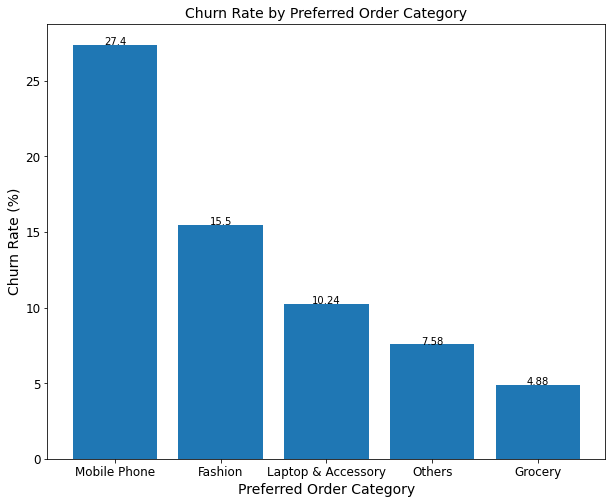

In [765]:
# define a function to include data labels
def add_data_labels(x,y):
    for i in range(len(x)):
        plt.text(i, y[i], y[i], ha = 'center')  

# graph presets
plt.figure(figsize = (10, 8)) # set plot width and height

# graph data
plt.bar(churn_by_order_cat.index.get_level_values(0),
        churn_by_order_cat.values.flatten())

# graph settings
plt.xlabel("Preferred Order Category", fontsize = 14) # set x-axis label
plt.ylabel("Churn Rate (%)", fontsize = 14) # set y-axis label

add_data_labels(churn_by_order_cat.index.get_level_values(0), # add the data labels
                churn_by_order_cat.values.flatten())

plt.xticks(fontsize = 12) # set x-tick size
plt.yticks(fontsize = 12) # set y-tick size

plt.title("Churn Rate by Preferred Order Category", fontsize = 14) # set graph title

# display graph
plt.show()

**Findings - "Churn Rate by Preferred Order Category":**

From the bar graph above, it can be found that the `Mobile Phone` category experienced the highest rate of customer churn across the 5 different categories (27.4%) (followed by):
* `Fashion` (15.5%)
* `Laptop & Accessory` (10.24%) 
* `Others` (7.58%) 
* `Grocery` (4.88%) 

However, it may be that each order category has its own threshold for an "expected rate of customer churn". For example, it can be argued that it is expected for the `Mobile Phone` category to have the highest rate of customer churn in comparison to `Grocery`. Since a customer may purchase a new mobile device every 2+ years, they may be making a one-time purchase. Whereas a customer who is making use of the e-commerce site for grocery purchases would frequent the site much more often which would subsequently result in a lower rate of customer churn.

From these findings, we may also wish to determine: **"What are the satisfaction scores of our customers?"**

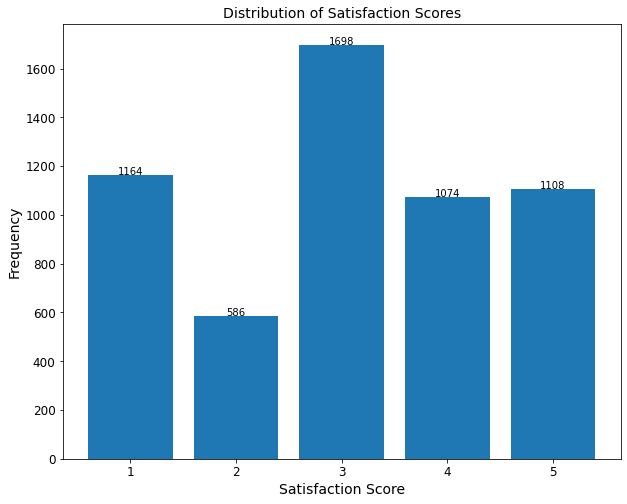

In [766]:
# define a function to include data labels
def add_data_labels(x,y):
    for i in range(len(x)):
        plt.text(i+1, y[i], y[i], ha = 'center')

# graph presets
plt.figure(figsize = (10, 8)) # set plot width and height

# graph data
plt.bar(customer_df['satisfaction_score'].value_counts().index, # satisfaction score
        customer_df['satisfaction_score'].value_counts().values) # frequency of satisfaction scores

# graph settings
plt.xlabel("Satisfaction Score", fontsize = 14) # set x-axis label
plt.ylabel("Frequency", fontsize = 14) # set y-axis label

add_data_labels(customer_df['satisfaction_score'].value_counts().sort_index().index, # add data labels
                customer_df['satisfaction_score'].value_counts().sort_index().values)

plt.xticks(fontsize = 12) # set x-tick size
plt.yticks(fontsize = 12) # set y-tick size

plt.title("Distribution of Satisfaction Scores", fontsize = 14) # set graph title

# display graph
plt.show()

**Findings - "Frequency of Satisfaction Scores":**

Based on the results displayed above, it can be noted that the majority of customers have provided a satisfaction score of 3 with the next most frequent score being that of 1. Conversely, the least frequent satisfaction score received was that of 2. If it were to be assumed that any satisfaction score of 3 or below is considered as 'not satisfied' versus a score of 4 and above as 'satisfied'; then 61% of customers are not satisfied with the service that they are receiving.

Given the distribution of Satisfaction Scores, we may then wish to determine the number of customers that filed a complaint based on the their preferred login device and payment method.

From which, we will seek to determine: **"Based on the customer's preferred login device and payment method, under which circumstances are the most customers filing a complaint?"**

In the following code cell, a dataframe will be created which will determine the number of complaints received in the last month by login device and payment method. In turn, this will be utilized to create a heatmap with the help of Seaborn.

In [767]:
# create a dataframe which captures the number of customers who have filed a complaint by login device and payment method
heatmap_df = pd.DataFrame(customer_df.groupby(['preferred_login_device', 'preferred_payment_method']).sum()['complaint_filed_LM'])

# display the df
heatmap_df

complaint_filed_LM
preferred_login_device preferred_payment_method                    
Computer               Cash on Delivery                          32
                       Credit Card                              152
                       Debit Card                               204
                       E wallet                                  30
                       UPI                                       46
Mobile Phone           Cash on Delivery                         102
                       Credit Card                              354
                       Debit Card                               444
                       E wallet                                 154
                       UPI                                       86

In order to create a heatmap from the results displayed above, the `.pivot_table()` function is used to wrangle the data into a format that can be ingested to create the desired heatmap.

In [768]:
# create a pivot table based on the df above
heatmap_data = pd.pivot_table(heatmap_df,
                              values = 'complaint_filed_LM', 
                              index = 'preferred_login_device',
                              columns = ['preferred_payment_method'])

# display the heatmap data
heatmap_data

preferred_payment_method,Cash on Delivery,Credit Card,Debit Card,E wallet,UPI
preferred_login_device,,,,,
Computer,32,152,204,30,46
Mobile Phone,102,354,444,154,86


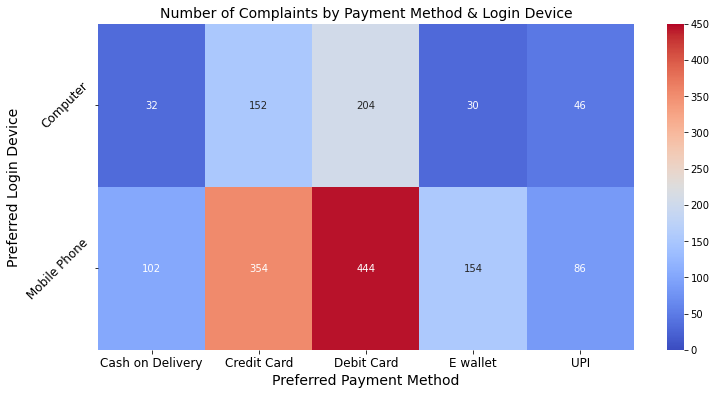

In [769]:
# graph presets
plt.figure(figsize = (12, 6))

# graph data
sns.heatmap(heatmap_data, # dataset
            cmap = "coolwarm", # color map name
            vmin = 0, # colormap lower bound
            vmax = 450, # colormap upper bound
            annot = True, # present data value in each cell
            fmt = "d")

# graph settings
plt.xlabel("Preferred Payment Method", fontsize = 14) # set x-axis label
plt.ylabel("Preferred Login Device", fontsize = 14) # set y-axis label

plt.xticks(fontsize = 12) # set x-axis label fontsize
plt.yticks(fontsize = 12, rotation = 45) # set y-axis label fontsize and orientation

plt.title("Number of Complaints by Payment Method & Login Device", fontsize = 14) # define plot title

# display graph
plt.show()

**Findings - "Number of Complaints by Payment Method & Login Device:"**

From the visual representation shown above, it has been found that the most customers filed a complaint who were seeking to make a purchase through their mobile phone whilst paying by either credit or debit card. This is indicative of an issue being faced by customers in which they may be attempting to make a purchase, but upon providing their payment information, are encountering a concern or issue that is prompting the customer to file a complaint. This is particular significance since the customer, at this point, has gone to the extent of placing the item(s) in his or her shopping cart, and at the point of placing their order; are either unable to or confronted with a hindrance in providing their payment details. 

As a next step, it would be invaluable to determine the extent to which this concern is potentially causing shopping cart abandonment; which can be defined as the point at which a potential customer starts the check-out process but drops out before completing their intended purchase.

However, based on the data made available, we may determine what is the frequency of satisfaction scores for the segment of customers whose preferred login device is that of a `Mobile Phone` and whose preferred payment method is either by credit or debit card. Such information may be indicative of the severity of the issue. In the event that most customers provide a satisfaction score of 4+, then the complaint may be with respect to an issue that is causing a hindrance but not to the extent that it serves as a deterrent for the customer to complete their purchase.

First and foremost, the relevant rows must be extrapolated from the original dataframe which represents the aforementioned segment of customers. From which, a pie chart may then be created to visualize the frequency of satisfaction scores.

In [770]:
# filter on the customer_df dataframe and retrieve all observations whereby:
# the customer has filed a complaint
# the customer's preferred payment method is either credit or debit card
# the customer's preferred login device is mobile phone
customer_segment_df = customer_df[(customer_df['complaint_filed_LM'] == 1) & \
                                  (customer_df['preferred_payment_method'].isin(['Credit Card', 'Debit Card'])) & \
                                  (customer_df['preferred_login_device'] == 'Mobile Phone')]

Having retrieve the pertinent information, we must then confirm that the `customer_segment_df` contains information pertaining to the target customer segment:

In [771]:
# confirm that the dataframe contains the desired information
print(f"Complaint filed in the last month (binary field): {customer_segment_df['complaint_filed_LM'].unique()}")
print(f"Preferred login device: {customer_segment_df['preferred_login_device'].unique()}")
print(f"Preferred payment method: {customer_segment_df['preferred_payment_method'].unique()}")

Complaint filed in the last month (binary field): [1]
Preferred login device: ['Mobile Phone']
Preferred payment method: ['Debit Card' 'Credit Card']


Once it has been confirmed that the information contained in the dataframe is correct, the frequency of each satisfaction score may be calculated.

In [772]:
# calculate the frequency of each satisfaction score
customer_segment_df['satisfaction_score'].value_counts()

3    204
1    202
5    186
4    110
2     96
Name: satisfaction_score, dtype: int64

From which, a pie chart can be created to help visualize the frequency of each score.

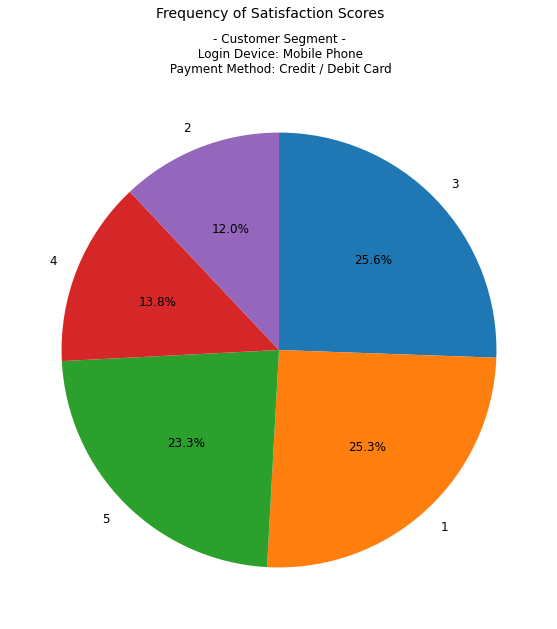

In [773]:
# graph presets
plt.figure(figsize = (10, 10))

# graph data
plt.pie(customer_segment_df['satisfaction_score'].value_counts().values, # number of customers by satisfaction score
        labels = customer_segment_df['satisfaction_score'].value_counts().index, # satisfaction scores
        autopct = '%.1f%%', # add percent labels
        counterclock = False, # set the orientation
        textprops = {'fontsize' : 12}, # define the label fontsize
        startangle = -270) # set the orientation

# graph settings
plt.suptitle("Frequency of Satisfaction Scores", fontsize = 14) # define chart title
plt.title("- Customer Segment -\n Login Device: Mobile Phone\n Payment Method: Credit / Debit Card", fontsize = 12) # define chart subtitle

# display graph
plt.show();

**Findings - Frequency of Satisfaction Scores:**

After having extracted the information from the dataframe pertaining to customers who filed a complaint in the previous month and whose preferred login device is via `Mobile Phone` and whose preferred payment method is either a credit or debit card; it has been found that ~60% of customers are not satisfied with their experience (assuming that any satisfaction score of 3 or below is considered 'not satisfied' versus a score of 4 and above as 'satisfied').

Given this finding, it would be of paramount importance to revisit the current user experience with regards to the process by which customers are able to provide their payment information. If 25% of customers belonging to this segment are providing a satisfaction score of 1, then it may be the case that the issue they are confronted with is not only a hindrance but rather a deterrence to them making a desired purchase. This would translate into an increase in shopping cart abandonment given that a customer may decide that they will attempt to make the same purchase elsewhere.

In addition to the Satisfaction Scores and Order Categories, we may also wish to determine: **"How does the number of coupons used correlate to the number of orders placed in the last month?"**.

From which, we may find that coupons (as an incentive) incites customers to make more purchases on the site.

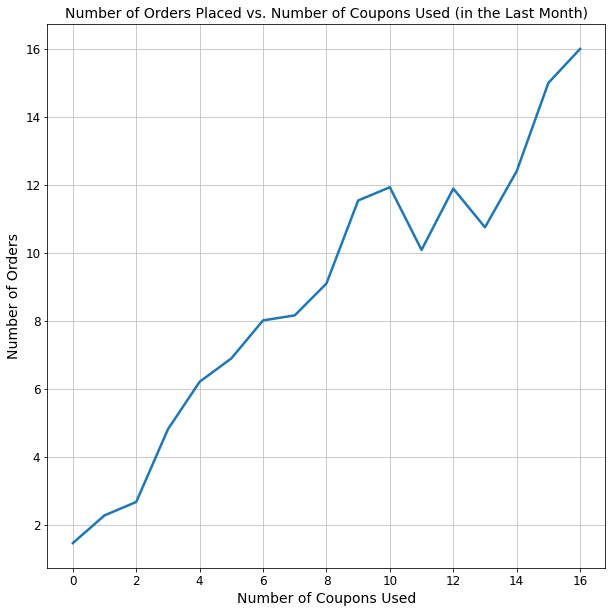

In [774]:
# graph presets
plt.figure(figsize = (10, 10))

# graph data
plt.plot(customer_df.groupby('num_coupon_used_LM').mean()['order_count_LM'].index,
         customer_df.groupby('num_coupon_used_LM').mean()['order_count_LM'].values,
         linewidth = 2.5) # set line width

# graph settings
plt.xlabel("Number of Coupons Used", fontsize = 14) # set x-axis label
plt.ylabel("Number of Orders", fontsize = 14) # set y-axis label

plt.xticks(fontsize = 12) # set x-tick size
plt.yticks(fontsize = 12) # set y-tick size

plt.grid(color = "silver") # include a grid
plt.title("Number of Orders Placed vs. Number of Coupons Used (in the Last Month)", fontsize = 14) # set graph title

# display graph
plt.show()

**Findings - "Number of Orders Placed vs. Number of Coupons Used (in the Last Month)":**

From the line graph above, it would appear as though there is a positive correlation between the `Number of Coupons` used in the last month and the `Number of Orders` placed. Which is to say that, as the number of coupons used increases, so does the number of orders placed. Though a majority of customers have communicated that they are not satisfied with their experience on the site (defined as a satisfaction score of 3 or below), customers appear to be keen on taking advantage of any special promotions that they may be offered.

Although we may arrive at this conclusion based on the visualization above, it is important to keep in mind that the `num_coupon_used_LM` and `order_count_LM` fields only represent data spanning the previous month. As such, the results of this analysis may be highly dependent on the time of year. If the coupons are issued leading up to major holidays or celebrations, then it can be expected that more promotions would be redeemed or taken advantage of in contrast to other months of the year.

Lastly, we may also wish to gain further insight regarding the purchasing habits of customers based on demographic information. From which, we can see if there are any divergences in spending habits by gender and product category. Whereby, men and women may make purchases of varying frequency across product categories. The result of which would help to understand: **"Do men and women have a particular affinity to shop for a specific product category?"**

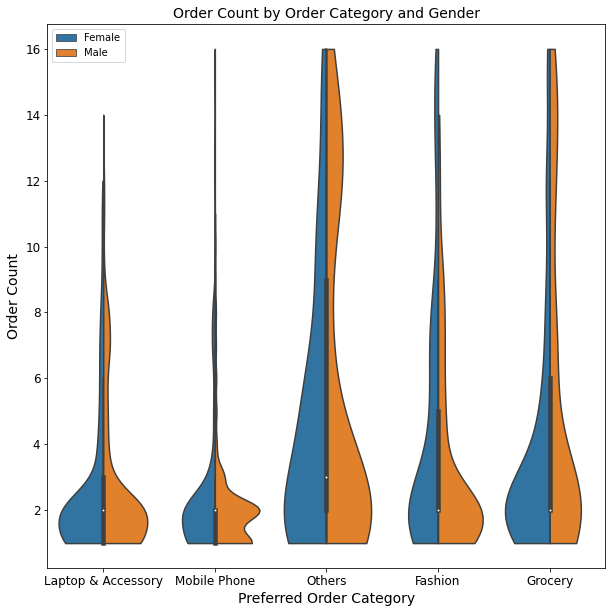

In [775]:
# graph presets
plt.figure(figsize = (10, 10))

# graph data
sns.violinplot(x = customer_df['preferred_order_cat_LM'],
               y = customer_df['order_count_LM'],
               hue = customer_df['gender'],
               split = True,
               cut = 0)

# graph settings
plt.xlabel("Preferred Order Category", fontsize = 14) # set x-axis label
plt.ylabel("Order Count", fontsize = 14) # set y-axis label

plt.xticks(fontsize = 12) # set x-tick size
plt.yticks(fontsize = 12) # set y-tick size

plt.legend(loc = "upper left")
plt.title("Order Count by Order Category and Gender", fontsize = 14) # set graph title

# display graph
plt.show()

**Findings - "Order Count by Order Category and Gender":**

It has been found that no discernible spending patterns are readily apparent (with the exception of `Fashion` and `Grocery`). It would appear as though, for order categories `Laptop & Accessory` and `Mobile Phone`, that no individual order category is "gender dominant", whereby men or women are the predominant purchasers of a particular product. However, as it relates to `Others`, `Fashion` and `Grocery`, it can be observed that men placed a greater number of orders (+10 orders) for items captured within the `Others` category. Regarding `Fashion` items, men tend to place fewer orders (ranging from 1 - 4) whereas women are placing a greater number of orders (6+ orders). Concerning `Grocery`, the plot demonstrates that women are placing fewer orders (ranging from 1 - 4) in relation to men, who tend to place more frequent orders (6+ orders).

However, it is important to note that a limitation from this analysis is that the `Order Count` and `Preferred Order Category` fields only represent information from the previous month. As such, it may be the case that not enough information has been made available in order for a trend to become discernible and conclusive. With more historical information, it may be the case that certain product categories are to a greater or lesser extent "gender dominant". 

[Back to Top](#back_to_top)

### Bivariate Analysis & Basic Modeling
<a id="bivariate_analysis_basic_models"></a>

---

**Preface**:

Once the data has been preprocessed, bivariate analyses (Correlation Matrix, Pearson's Correlation Coefficient) and basic modeling techniques (Logistic Regression) may be employed to help determine the correlations that exist between the dependent and independent variables. Using Pearson's Correlation Coefficient, it may then be determined if the correlations are statistically significant, which can be established based on the p-values for each of the correlations.

With that being said, our hypothesis test may take on the following arguments:

**Hypothesis Test**:

* Null Hypothesis ($H_0$) : There is no significant correlation between a particular independent variable and customer churn.
* Alternate Hypothesis ($H_1$) : There is a significant correlation between a particular independent variable and customer churn.

The significance threshold for the following set of tests will be set to 0.05. Which is to say, that for any p-value below 0.05, the null hypothesis can be rejected in favor of the alternate hypothesis, and conclude that the correlations are statistically significant.

### Correlation and Statistical Significance
<a id="corr_stat_sig"></a>

---

As stated above, a correlation matrix and Pearson's Correlation Coefficient may be leveraged in order to determine the correlation between each of the variables and their corresponding statistical significance.

Using the `.corr()` function, a correlation matrix may be generated using the `customer_df` dataframe.

In [776]:
# use .corr() to generate correlation matrix
corr_matrix = customer_df.corr()

# display correlation matrix
corr_matrix

,churn,tenure,warehouse_to_home,hour_spend_on_site,num_devices_registered,satisfaction_score,num_addresses,complaint_filed_LM,order_amount_hike_vs_LY,num_coupon_used_LM,order_count_LM,days_since_last_order,avg_cashback_amount_LM
churn,1.000000,-0.337831,0.069544,0.018816,0.107939,0.105481,0.043931,0.250188,-0.007075,-0.001430,-0.024038,-0.155871,-0.154118
tenure,-0.337831,1.000000,-0.012191,-0.017282,-0.020657,-0.014452,0.235076,-0.020535,-0.005542,0.101535,0.165339,0.174378,0.467986
warehouse_to_home,0.069544,-0.012191,1.000000,0.064069,0.023020,0.007524,-0.008305,0.026825,0.038311,0.002675,0.000354,0.020253,0.000415
hour_spend_on_site,0.018816,-0.017282,0.064069,1.000000,0.305048,0.030937,0.139541,0.006607,0.099305,0.187166,0.102053,0.061213,0.114286
num_devices_registered,0.107939,-0.020657,0.023020,0.305048,1.000000,-0.017228,0.084997,0.003407,0.065714,0.152065,0.099790,0.007350,0.137183
satisfaction_score,0.105481,-0.014452,0.007524,0.030937,-0.017228,1.000000,0.053583,-0.031115,-0.027121,0.017423,0.018166,0.031985,0.003473
num_addresses,0.043931,0.235076,-0.008305,0.139541,0.084997,0.053583,1.000000,-0.026399,0.012161,0.036985,-0.013970,-0.067180,0.186688
complaint_filed_LM,0.250188,-0.020535,0.026825,0.006607,0.003407,-0.031115,-0.026399,1.000000,-0.003842,-0.007810,-0.021288,-0.041415,0.000525
order_amount_hike_vs_LY,-0.007075,-0.005542,0.038311,0.099305,0.065714,-0.027121,0.012161,-0.003842,1.000000,0.024482,0.010567,-0.004621,-0.009620
num_coupon_used_LM,-0.001430,0.101535,0.002675,0.187166,0.152065,0.017423,0.036985,-0.007810,0.024482,1.000000,0.641178,0.296816,0.219394


For added legibility, the above cross-column correlation table may be converted to a heatmap using Seaborn.

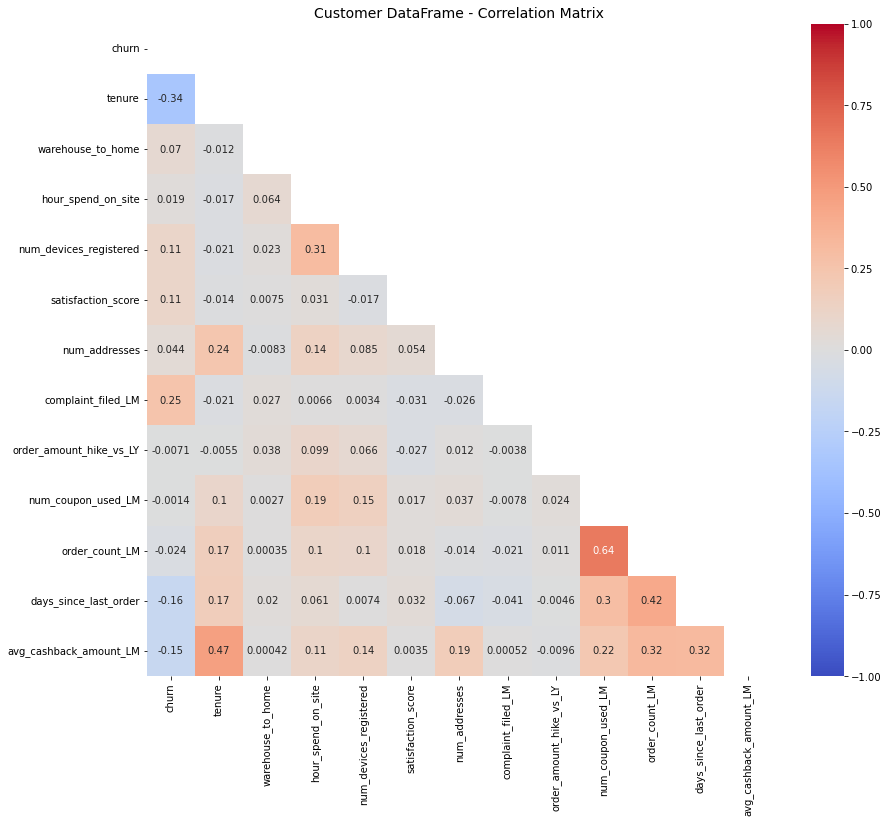

In [777]:
mask = np.triu(np.ones_like(corr_matrix, dtype = bool))

# graph presets
plt.figure(figsize = (14, 12))

# graph data
sns.heatmap(corr_matrix, # plot the above correlation matrix
            mask = mask, # hide duplicate values along the diagonal axis
            vmax = 1.0, # set max color bar range
            vmin = -1.0, # set min color bar range
            cmap = 'coolwarm', # set the colormap
            annot = True) # display data value in each cell

# graph settings
plt.title('Customer DataFrame - Correlation Matrix', fontsize = 14) # set heatmap title

# display graph
plt.show()

Based on the heatmap above, we can take note of the fact that a positive correlation exists between columns:
* `order_count_LM` and `num_coupon_used_LM` (0.64)
* `avg_cashback_amount_LM` and `tenure` (0.47)
* `days_since_last_order` and `order_count_LM` (0.42)

Conversely, a (moderate) negative correlation is observed between `tenure` and `churn` (-0.34).

Although a correlation has been established between each of the variables, it is imperative to evaluate whether the correlations can be considered statistically significant. In order to do so, Pearson's Correlation Coefficient may be used to establish the p-values for each of the correlations through the use of `stats.pearsonr()`.

Of the columns in the dataframe, only those of dtype `int64` or `float64` may be taken into account when conducting a Pearson's Correlation Coefficient analysis. A `non_object_columns` variable is created (refer to code cell below) which will store all columns of the dataframe which are of dtype `int64` or `float64`.

In [778]:
# store the names of all the columns which are not of dtype = 'oject' in a variable
non_object_columns = customer_df.select_dtypes(exclude = ['object'])

# drop the 'churn' column
# save all the remaining columns to the independent variable ('X')
X = non_object_columns.drop('churn', axis = 1) 

# save 'churn' to the dependent variable ('y')
y = non_object_columns['churn']

From which, a correlation score and p-value may be ascertained for each independent variable with respect to `churn`.

In referencing the code cell below, the following order of operations enable us to calculate and tabulate each field's correlation and p-value:

* 1. Loop through each independent variable in `X`:
    * Append the variable to the `field_name` list
    * Calculate each variable's correlation score and append it to the `correlation` list
    * Calculate each variable's p-value and append it to the `p_value` list
* 2. Consolidate the values contained within each of the individual lists to create a dictionary
* 3. Convert the dictionary into a dataframe

In [779]:
# create empty lists
field_name = []
correlation = []
p_value = []

# create a for loop to append values to respective lists
for column in X.columns:
    field_name.append(column) # append each column name to the 'field_name' list
    correlation.append(stats.pearsonr(X[column], y)[0]) # append each field's correlation score to the 'correlation' list
    p_value.append(stats.pearsonr(X[column], y)[1]) # append each field's p-value to the 'p_value' list

    
# convert the individual lists into a temporary dictionary
temp_dict = {"field_name": field_name,
             "correlation": correlation,
             "p_value": p_value}

# convert temporary dictionary to a dataframe
pearson_corr_coeff = pd.DataFrame(temp_dict)

# view dataframe
print(pearson_corr_coeff)

                 field_name  correlation        p_value
0                    tenure    -0.337831  2.494914e-150
1         warehouse_to_home     0.069544   1.757984e-07
2        hour_spend_on_site     0.018816   1.580613e-01
3    num_devices_registered     0.107939   4.626452e-16
4        satisfaction_score     0.105481   2.105157e-15
5             num_addresses     0.043931   9.767132e-04
6        complaint_filed_LM     0.250188   4.282982e-81
7   order_amount_hike_vs_LY    -0.007075   5.955964e-01
8        num_coupon_used_LM    -0.001430   9.145651e-01
9            order_count_LM    -0.024038   7.131354e-02
10    days_since_last_order    -0.155871   5.920404e-32
11   avg_cashback_amount_LM    -0.154118   2.867709e-31


From the results shown above, we would only like to see those fields who's correlations are considered to be statistically significant (based on the p-value below the pre-determined threshold of 0.05).

In [780]:
# filter the 'pearson_corr_coeff' dataframe to only display fields with p-values less than or equal to 0.05
stat_signif_pearson_corr_coeff = pearson_corr_coeff[pearson_corr_coeff['p_value'] <= 0.05]

# display the filtered dataframe by correlation in ascending order
stat_signif_pearson_corr_coeff.sort_values(by = 'correlation').reset_index(drop = True)

,field_name,correlation,p_value
0,tenure,-0.337831,2.494914e-150
1,days_since_last_order,-0.155871,5.920404e-32
2,avg_cashback_amount_LM,-0.154118,2.867709e-31
3,num_addresses,0.043931,9.767132e-04
4,warehouse_to_home,0.069544,1.757984e-07
5,satisfaction_score,0.105481,2.105157e-15
6,num_devices_registered,0.107939,4.626452e-16
7,complaint_filed_LM,0.250188,4.282982e-81


For those fields with a p-value below 0.05, it can be stated that the results indicate the presence of a statistically significant relationship between the independent variables and customer churn, which permits us to reject the null hypothesis regarding these particular relationships. For all other fields whose p-values exceed the designated threshold, we cannot reject the null hypothesis in favor of the alternate hypothesis.

Given the results, it has been found that the `tenure` field has the lowest correlation score (moderate negative correlation of -0.34) which implies that as a customer's tenure increases, the likelihood of said customer churning diminishes. Interestingly, the `days_since_last_order` field is demonstrative of a negative correlation of -0.15; which is to say that as the number of `days_since_last_order` increases, the likelihood of the customer churning diminishes. This contradicts our intuition since it may have initially been presumed that as the `days_since_last_order`, so does the likelihood of a customer leaving the online retailer. This is based on the principle that as the days go by, a customer is moving incrementally closer to the threshold at which point a customer is considered to have churned (be it 30, 60, 90 days for example).

Conversely, the `complaint_filed_LM` field has the highest correlation score (moderate positive correlation of 0.25), which is to say that if a customer filed a complaint in the last month, so does the probability of the customer leaving the online retailer. Additionally, the `num_devices_registered` demonstrates a slight positive correlation of 0.11 with respect to `churn`. An alternate way of interpreting such a result is that as the number of devices which a customer has registered to their account increase; the likelihood of losing said customer marginally increases. It can be argued that such a relationship is contrarian to preliminary belief as it may have been originally presumed that a higher number of registered devices is demonstrative a customer who seeks to be able to access the site through more channels (be it mobile phone, computer, tablet or otherwise).

[Back to Top](#back_to_top)

### Logistic Regression
<a id="log_reg"></a>

---

In addition to the correlation matrix and Pearson's Correlation Coefficient; a set of Logistic Regression models can be used to understand the relationship between the dependent variable (`churn`) and the independent variables through the use of both the `customer_df_with_dummies` and `customer_df_with_consol_dummies` dataframes.

Prior to instantiating a Logistic Regression model, the null and alternate hypotheses are established (as follows):

**Hypothesis Test**:

* Null Hypothesis ($H_0$): There is no relationship between a given independent variable and customer churn.
* Alternate Hypothesis ($H_1$): There is a relationship between a given independent variable and customer churn.

In the following section, the performance of a Logistic Regression model will first be determined and evaluated based on the `customer_df_with_dummies` dataframe ('Unconsolidated Dummy Variables'). A model is then to be created based on the `customer_df_with_consol_dummies` dataframe ('Consolidated Dummy Variables'). Lastly, the performance of both these Logistic Regression models is to be compared when using the original `customer_df` dataframe ('Original Dataframe').

The intent of which is to compare how the creation of dummy variables and the subsequent consolidation of said variables effects the model's performance in terms of accuracy. The results of which can then be compared to a Logistic Regression model based on the original dataset. Prior to instantiating each of the models, it can be surmised that the Logistic Regression that is to be based on the `customer_df_with_dummies` dataframe ('Unconsolidated Dummy Variables') will attain the highest accuracy score since it will have been trained and exposed to the most variables (including those that had originally been considered categorical). Whereas the model which is to be trained on the original dataset will not be able to take into account these same categorical variables.

[Back to Top](#back_to_top)

#### Unconsolidated Dummy Variables
<a id="log_reg_unconsol_var"></a>

---

Given that a correlation heatmap is to be created based on the `customer_df_with_dummies` dataframe, we may import and utilize Plotly in order to create an interactive heatmap which will assist in augmenting the legibility of the results.

In [781]:
# import plotly to create an interactive correlation heatmap
import plotly.graph_objects as go

Each independent variable is to be stored in variable `X` and our dependent variable (`churn`) in `y`:

In [782]:
# store independent variables to 'X'
X = customer_df_with_dummies.drop('churn', axis = 1)

# store dependent variable to 'y'
y = customer_df_with_dummies['churn']

A correlation matrix is then created for this dataframe using the `.corr()` function.

In [783]:
# create a correlation matrix
dummies_corr_matrix = customer_df_with_dummies.corr()

# view correlation matrix
dummies_corr_matrix.head(10)

,churn,tenure,warehouse_to_home,num_addresses,complaint_filed_LM,order_amount_hike_vs_LY,num_coupon_used_LM,order_count_LM,days_since_last_order,avg_cashback_amount_LM,...,preferred_order_cat_LM_Mobile Phone,preferred_order_cat_LM_Others,satisfaction_score_1,satisfaction_score_2,satisfaction_score_3,satisfaction_score_4,satisfaction_score_5,marital_status_Divorced,marital_status_Married,marital_status_Single
churn,1.000000,-0.337831,0.069544,0.043931,0.250188,-0.007075,-0.001430,-0.024038,-0.155871,-0.154118,...,0.216120,-0.054903,-0.072667,-0.038351,0.006293,0.003813,0.092442,-0.024934,-0.151024,0.180847
tenure,-0.337831,1.000000,-0.012191,0.235076,-0.020535,-0.005542,0.101535,0.165339,0.174378,0.467986,...,-0.325016,0.265067,0.007710,-0.008045,0.007145,0.021041,-0.030716,0.039472,0.082896,-0.119053
warehouse_to_home,0.069544,-0.012191,1.000000,-0.008305,0.026825,0.038311,0.002675,0.000354,0.020253,0.000415,...,-0.052561,-0.075069,0.001065,-0.018689,0.004619,0.001965,0.005996,-0.006881,0.028811,-0.025570
num_addresses,0.043931,0.235076,-0.008305,1.000000,-0.026399,0.012161,0.036985,-0.013970,-0.067180,0.186688,...,-0.136923,0.049921,-0.041618,-0.013604,-0.006356,0.029947,0.030584,-0.003364,0.011834,-0.010090
complaint_filed_LM,0.250188,-0.020535,0.026825,-0.026399,1.000000,-0.003842,-0.007810,-0.021288,-0.041415,0.000525,...,0.014189,-0.013429,0.039231,0.003927,-0.010087,-0.038044,0.006264,0.007044,-0.003720,-0.001422
order_amount_hike_vs_LY,-0.007075,-0.005542,0.038311,0.012161,-0.003842,1.000000,0.024482,0.010567,-0.004621,-0.009620,...,0.026937,-0.051031,0.041745,0.010640,-0.037343,-0.014418,0.006662,-0.014253,0.004524,0.006094
num_coupon_used_LM,-0.001430,0.101535,0.002675,0.036985,-0.007810,0.024482,1.000000,0.641178,0.296816,0.219394,...,-0.142072,0.072709,-0.012383,0.009367,-0.018804,0.011944,0.015322,0.031839,0.009851,-0.034981
order_count_LM,-0.024038,0.165339,0.000354,-0.013970,-0.021288,0.010567,0.641178,1.000000,0.421629,0.322313,...,-0.207148,0.176290,-0.007396,-0.002146,-0.011582,-0.001254,0.023790,0.020765,0.034988,-0.053399
days_since_last_order,-0.155871,0.174378,0.020253,-0.067180,-0.041415,-0.004621,0.296816,0.421629,1.000000,0.316568,...,-0.308335,0.174314,-0.007205,-0.011431,-0.022539,-0.003332,0.045430,0.010083,0.044703,-0.055604
avg_cashback_amount_LM,-0.154118,0.467986,0.000415,0.186688,0.000525,-0.009620,0.219394,0.322313,0.316568,1.000000,...,-0.576021,0.574022,-0.004089,0.003325,-0.003419,0.004895,0.000721,0.044904,0.048915,-0.086836


For increased legibility, the correlation table above is then converted into an interactive heatmap using Plotly.

*The following resources were referenced in order to help create an interactive correlation heatmap using Plotly. - Sources:
[Link 1](https://community.plotly.com/t/correlation-heatmap-in-plotly/50884) - 
[Link 2](https://community.plotly.com/t/correlation-plot-with-mask/29185)*

In [784]:
# graph presets
mask = np.triu(np.ones_like(dummies_corr_matrix, dtype = bool))
dummies_corr_matrix = dummies_corr_matrix.mask(mask)

# graph data
heat = go.Heatmap(
                  z = dummies_corr_matrix, # plot the correlation matrix
                  x = dummies_corr_matrix.columns.values, # set x-axis labels to matrix columns
                  y = dummies_corr_matrix.columns.values, # set y-axis labels to matrix columns
                  xgap = 1, # include horizontal space between grid cells
                  ygap = 1, # include vertical space between grid cells
                  zmin = - 1, # set the lower bound of the colorscale
                  zmax = 1, # set the upper bound of the colorscale
                  colorscale = 'balance' # set colorscale
                  )

# graph settings
title = 'Customer Correlation Matrix' # set plot title

layout = go.Layout(
                   title_text = title, # set heatmap title
                   title_x = 0.60, # set title's horizontal alignment
                   width = 1100, # set figure width
                   height = 1100, # set figure height
                   xaxis_showgrid = False, # disable x-axis gridlines
                   yaxis_showgrid = False, # disable y-axis gridlines
                   yaxis_autorange = 'reversed',
                   plot_bgcolor = 'white' # set the background color
                   )

# display graph
fig=go.Figure(data=[heat], layout=layout)
fig.show()

Based on the heatmap above, we can take note of the following correlations (just to name a few):

Positive Correlations:
* `num_coupon_used_LM` and `order_count_LM` (0.64)
* `avg_cashback_amount_LM` and `preferred_order_cat_LM_Others` (0.57)
* `city_tier_3` and `preferred_payment_method_E Wallet` (0.53)

Negative Correlations:
* `preferred_login_device_Computer` and `preferred_login_device_MObile Phone` (-1)
* `gender_Female` and `gender_Male` (-1)
* `city_tier_1` and `city_tier_3` (-0.90)

It is important to note, that at this stage, we have yet to address the presence of multi-collinearity. The moderate to strong correlations that exist between the independent variables themselves are indicative of multi-collinearity.

In order to address this concern, at least one dummy variable will need to be dropped from each set and will, in turn, serve as the reference variable. In doing so, we are attempting to reduce the effect(s) that multi-collinearity will have on the models to follow. Collinearity hinders a model's ability to accurately determine the independent effects of each independent variable on the dependent variable. This is especially important in the context of a Logistic Regression model given that one of the principle assumptions is that the independent variables are naturally independent of each other.

In determining which of the dummy variables to drop from each set, the values which appear most often for each of the columns may be dropped. With that being said, the code cell below returns the most frequently occurring value for each of the columns for which we have created dummy variables for.

In [785]:
# instantiate a temporary dictionary
temp_dict = {}

# iterate through the 'column_name' field of the 'columns_to_binarize_df'
for i in range(len(columns_to_binarize_df['column_name'].values)):
    
    # for each column from the 'columns_to_binarize_df', return the most frequent value and append the results to the temp_dict
    temp_dict[list(columns_to_binarize_df['column_name'].values)[i]] = customer_df[list(columns_to_binarize_df['column_name'].values)[i]].mode().values[0]

    
# convert the temporary dictionary into a dataframe
column_mode_df = pd.DataFrame(list(temp_dict.items()))

# rename the dataframe columns
column_mode_df.rename(columns = {0: 'column_name', 1: 'column_modal_value'}, inplace = True)

# display the dataframe
column_mode_df

,column_name,column_modal_value
0,preferred_login_device,Mobile Phone
1,city_tier,1
2,preferred_payment_method,Debit Card
3,gender,Male
4,hour_spend_on_site,3.0
5,num_devices_registered,4
6,preferred_order_cat_LM,Mobile Phone
7,satisfaction_score,3
8,marital_status,Married


For each of these column-modal value pairs, we want to drop the associated dummy variable column. As such, we will make use of the following code cells to first join each of the `column_names` to their respective `column_modal_value` from the dataframe above (eg. preferred_login_device_Mobile Phone / city_tier_1 / preferred_payment_method_Debit Card) which are then to be dropped from the dataframe. The resulting dataframe is then expected to have 38 columns versus the original 47.

In [786]:
f'The dataframe currently contains {customer_df_with_dummies.shape[1]} columns.'

'The dataframe currently contains 47 columns.'

In [787]:
"""
The for loop iterates through each of the rows in the dataframe above.
For each set of dummy variables, the column which represents the most frequently occuring value will be dropped.

Example: 1 is the most frequently occurring value of the 'city_tier' column.
         'city_tier' and 1 will be concatenated (separated by an underscore).
         Dummy variable 'city_tier_1' will be dropped from the 'customer_df_with_dummies' dataframe.
"""

# iterate through each of the dataframe rows
for i in range(len(column_mode_df['column_name'])):
    
    # for each of the dummy variables, drop the column which represents the most frequently occurring value
    customer_df_with_dummies.drop(str(column_mode_df['column_name'][i]) + "_" +\
                                  str(column_mode_df['column_modal_value'][i]), axis = 1, inplace = True)

Following the removal of all the columns listed in the dataframe above, it is expected that the remaining number of columns in the dataframe equal 38:

In [788]:
f'The dataframe now contains {customer_df_with_dummies.shape[1]} columns.'

'The dataframe now contains 38 columns.'

The first logistic regression model may now be instantiated after having mitigated some of the multi-collinearity that previously existed in our dataframe. However, it is important to note that multi-collinearity has not yet been fully purged and that we will continue to address its presence through a stepwise logistic regression model building process.

#### Preface to Stepwise Logistic Regression
---

Given the iterative nature of the construction of a logistic regression model, a model will first be created that includes all of the independent variables contained within the dataframe. The results of which will help to determine which field we may wish to remove from the model to increase its accuracy and the statistical significance for each of the remaining variables. That is to say, that a backward selection process will be employed, whereby the initial model will include all predictors, and at each step a variable will be dropped.

When deciding which variable to drop following each iteration, the p-values will be referenced in conjunction with the Variance Inflation Factor (VIF) scores.

In [789]:
# store independent variables to 'X'
X = customer_df_with_dummies.drop('churn', axis = 1)

# store dependent variable to 'y'
y = customer_df_with_dummies['churn']

Before fitting a model, it is imperative that `X` be modified to include a column of ones as the first column of the dataframe which will represent a constant (as shown in the code cell below). If this step were to be omitted, the constant value would default to zero; from which the line would be forced to have a y-intercept of 0 (*B<sub>0</sub>* = 0).

To ensure that this step has successfully been implemented, `X_with_constant.head()` is called from which it can be seen that a `const` column has been added.

In [790]:
# add a constant to 'X'
X_with_constant = sm.add_constant(X)

# confirm that constant was added to the df
X_with_constant.head()

C:\Users\arnau\anaconda3\envs\capstone\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning:

In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.



,const,tenure,warehouse_to_home,num_addresses,complaint_filed_LM,order_amount_hike_vs_LY,num_coupon_used_LM,order_count_LM,days_since_last_order,avg_cashback_amount_LM,...,preferred_order_cat_LM_Fashion,preferred_order_cat_LM_Grocery,preferred_order_cat_LM_Laptop & Accessory,preferred_order_cat_LM_Others,satisfaction_score_1,satisfaction_score_2,satisfaction_score_4,satisfaction_score_5,marital_status_Divorced,marital_status_Single
CustomerID,,,,,,,,,,,,,,,,,,,,,
50001,1.0,4.0,6.0,9,1,11.0,1.0,1.0,5.0,159.93,...,0,0,1,0,0,1,0,0,0,1
50002,1.0,9.0,8.0,7,1,15.0,0.0,1.0,0.0,120.90,...,0,0,0,0,0,0,0,0,0,1
50003,1.0,9.0,30.0,6,1,14.0,0.0,1.0,3.0,120.28,...,0,0,0,0,0,0,0,0,0,1
50004,1.0,0.0,15.0,8,0,23.0,0.0,1.0,3.0,134.07,...,0,0,1,0,0,0,0,1,0,1
50005,1.0,0.0,12.0,3,0,11.0,1.0,1.0,3.0,129.60,...,0,0,0,0,0,0,0,1,0,1


#### Unconsolidated Dummy Variables</br>First Logistic Regression Model - 1 / 4


*Stepwise Regression - Removed Variables:*

*First iteration: none removed*

In [791]:
# instantiate the model
first_cust_churn_logit = sm.Logit(y, X_with_constant)

# fit the model
first_fitted_cust_churn_logit = first_cust_churn_logit.fit()

# return a summary of results
first_fitted_cust_churn_logit.summary()

         Current function value: 0.274024
         Iterations: 35


C:\Users\arnau\anaconda3\envs\capstone\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                  churn   No. Observations:                 5630
Model:                          Logit   Df Residuals:                     5592
Method:                           MLE   Df Model:                           37
Date:                Fri, 01 Apr 2022   Pseudo R-squ.:                  0.3955
Time:                        16:20:18   Log-Likelihood:                -1542.8
converged:                      False   LL-Null:                       -2552.2
Covariance Type:            nonrobust   LLR p-value:                     0.000
=============================================================================================================
                                                coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------
const                                         0.0650      0.471      0.138      0.890      -0.859       0.989
tenure                                       -0.2077      0.010    -20.879      0.000      -0.227      -0.188
warehouse_to_home                             0.0392      0.006      7.032      0.000       0.028       0.050
num_addresses                                 0.2403      0.019     12.960      0.000       0.204       0.277
complaint_filed_LM                            1.8029      0.098     18.349      0.000       1.610       1.996
order_amount_hike_vs_LY                      -0.0185      0.013     -1.417      0.156      -0.044       0.007
num_coupon_used_LM                            0.0447      0.035      1.267      0.205      -0.024       0.114
order_count_LM                                0.1378      0.026      5.326      0.000       0.087       0.189
days_since_last_order                        -0.1090      0.018     -6.015      0.000      -0.145      -0.074
avg_cashback_amount_LM                       -0.0181      0.003     -6.459      0.000      -0.024      -0.013
preferred_login_device_Computer               0.4431      0.100      4.444      0.000       0.248       0.638
city_tier_2                                   1.0116      0.232      4.369      0.000       0.558       1.465
city_tier_3                                   0.6581      0.122      5.407      0.000       0.420       0.897
preferred_payment_method_Cash on Delivery     0.4777      0.163      2.936      0.003       0.159       0.797
preferred_payment_method_Credit Card         -0.2367      0.113     -2.090      0.037      -0.459      -0.015
preferred_payment_method_E wallet             0.6150      0.170      3.617      0.000       0.282       0.948
preferred_payment_method_UPI                 -0.2693      0.196     -1.373      0.170      -0.654       0.115
gender_Female                                -0.3356      0.097     -3.450      0.001      -0.526      -0.145
hour_spend_on_site_0.0                      -15.7667   1.04e+04     -0.002      0.999   -2.03e+04    2.03e+04
hour_spend_on_site_1.0                      -22.9966   6.39e+04     -0.000      1.000   -1.25e+05    1.25e+05
hour_spend_on_site_2.0                        0.1731      0.122      1.422      0.155      -0.065       0.412
hour_spend_on_site_4.0                       -0.0532      0.126     -0.420      0.674      -0.301       0.195
hour_spend_on_site_5.0                      -13.4925   1570.700     -0.009      0.993   -3092.009    3065.024
num_devices_registered_1                     -0.9890      0.297     -3.330      0.001      -1.571      -0.407
num_devices_registered_2                     -0.7581      0.272     -2.789      0.005      -1.291      -0.225
num_devices_registered_3                     -0.2580      0.124     -2.084      0.037      -0.501      -0.015
num_devices_registered_5                      0.429

From the initial attempt at generating a Logistic Regression model, it can be noted that a multitude of independent variables have p-values exceeding the threshold of 0.05. This confirms that, as of current, they are not statistically significant, which may be due to the influence of multi-collinearity between the independent variables.

In order to measure the extent to which multi-collinearity is present, the Variance Inflation Factor (VIF) can be used from the `statsmodel` package, which measures the amount of collinearity among predictor variables. A threshold for high collinearity will be set to any VIF value above 5.

In [792]:
# import variance inflation factor from stats.models
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif

Using the function below, a pandas Series will be returned that includes each of the column names and their corresponding VIF value.

In [793]:
# return a VIF value for each independent variable
def vif_values(df):
    """
    Take in a dataframe (df).
    Return the column name and its corresponding VIF value.
    Set the column names as the dataframe index.
    
    Parameters
    ----------
    df: An input of type 'pandas.core.frame.DataFrame'.
    
    Returns
    -------
    A Series including each of the column names and there corresponding VIF value.
    """
    
    vif_values = pd.Series([vif(df.values, i) for i in range(df.shape[1])], index = df.columns)
    
    return vif_values

vif_values(X)

tenure                                        3.572722
warehouse_to_home                             4.424862
num_addresses                                 4.194682
complaint_filed_LM                            1.409528
order_amount_hike_vs_LY                      17.382702
num_coupon_used_LM                            3.313687
order_count_LM                                4.076600
days_since_last_order                         3.473202
avg_cashback_amount_LM                       44.349297
preferred_login_device_Computer               1.420110
city_tier_2                                   1.200753
city_tier_3                                   2.215031
preferred_payment_method_Cash on Delivery     1.230092
preferred_payment_method_Credit Card          1.770086
preferred_payment_method_E wallet             1.699973
preferred_payment_method_UPI                  1.315202
gender_Female                                 1.684249
hour_spend_on_site_0.0                        1.006544
hour_spend

Given that a threshold for high collinearity is any VIF value above 5, an additional function may be created which will also return a Series that includes each of the column names and their corresponding VIF value; but only for those columns whose VIF value exceeds the threshold of 5.

In [794]:
def high_vif_values(df):
    """
    Take in a dataframe (df).
    Return the column name and its corresponding VIF values so long as the VIF value is greater than 5.
    
    Parameters
    ----------
    df: An input of type 'pandas.core.frame.DataFrame'.
    
    Returns
    -------
    A Series including each of the column names and there corresponding VIF values.
    """
    
    vif_values = pd.Series([vif(df.values, i) for i in range(df.shape[1])], index = df.columns)
    high_vif_values = vif_values[vif_values.values > 5]
    
    return high_vif_values

high_vif_values(X)

order_amount_hike_vs_LY    17.382702
avg_cashback_amount_LM     44.349297
dtype: float64

From the results displayed above, it be can stated that each of the independent variables are highly correlated given their respective VIF values. 

To address this concern, we may proceed in dropping the `avg_cashback_amount_LM` column during the next iteration of the model building process:

#### Unconsolidated Dummy Variables</br>Second Logistic Regression Model - 2 / 4

*Stepwise Regression - Removed Variables:*

*First iteration: none removed*</br>
*Second iteration: avg_cashback_amount_LM*</br>

Referencing the VIF results from above, the variable to be removed is `avg_cashback_amount_LM` given that it has the highest VIF value.

In [795]:
# drop the 'avg_cashback_amount_LM' column
# save the independent variables to 'X'
X = X.drop(['avg_cashback_amount_LM'], axis = 1)

# retrieve columns that start with the letter 'a'
check_if_dropped = [col for col in X if col.startswith('a')]

# confirm that the column has been dropped
check_if_dropped

[]

From the empty list shown above, it can be confirmed that the target column has been removed from the dataframe from which we may proceed in fitting the second iteration of the model.

In [796]:
# add a constant
X_with_constant = sm.add_constant(X)

# preview the dataframe to confirm that a constant column has been added
X_with_constant.head()

C:\Users\arnau\anaconda3\envs\capstone\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning:

In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.



,const,tenure,warehouse_to_home,num_addresses,complaint_filed_LM,order_amount_hike_vs_LY,num_coupon_used_LM,order_count_LM,days_since_last_order,preferred_login_device_Computer,...,preferred_order_cat_LM_Fashion,preferred_order_cat_LM_Grocery,preferred_order_cat_LM_Laptop & Accessory,preferred_order_cat_LM_Others,satisfaction_score_1,satisfaction_score_2,satisfaction_score_4,satisfaction_score_5,marital_status_Divorced,marital_status_Single
CustomerID,,,,,,,,,,,,,,,,,,,,,
50001,1.0,4.0,6.0,9,1,11.0,1.0,1.0,5.0,0,...,0,0,1,0,0,1,0,0,0,1
50002,1.0,9.0,8.0,7,1,15.0,0.0,1.0,0.0,0,...,0,0,0,0,0,0,0,0,0,1
50003,1.0,9.0,30.0,6,1,14.0,0.0,1.0,3.0,0,...,0,0,0,0,0,0,0,0,0,1
50004,1.0,0.0,15.0,8,0,23.0,0.0,1.0,3.0,0,...,0,0,1,0,0,0,0,1,0,1
50005,1.0,0.0,12.0,3,0,11.0,1.0,1.0,3.0,0,...,0,0,0,0,0,0,0,1,0,1


The model is to be re-instantiated based on the revised set of values for `X`:

In [797]:
# instantiate the model
second_cust_churn_logit = sm.Logit(y, X_with_constant)

# fit the model
second_fitted_cust_churn_logit = second_cust_churn_logit.fit()

# return a summary of results
second_fitted_cust_churn_logit.summary()

         Current function value: 0.277467
         Iterations: 35


C:\Users\arnau\anaconda3\envs\capstone\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                  churn   No. Observations:                 5630
Model:                          Logit   Df Residuals:                     5593
Method:                           MLE   Df Model:                           36
Date:                Fri, 01 Apr 2022   Pseudo R-squ.:                  0.3879
Time:                        16:20:19   Log-Likelihood:                -1562.1
converged:                      False   LL-Null:                       -2552.2
Covariance Type:            nonrobust   LLR p-value:                     0.000
=============================================================================================================
                                                coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------
const                                        -2.3729      0.282     -8.429      0.000      -2.925      -1.821
tenure                                       -0.2065      0.010    -20.901      0.000      -0.226      -0.187
warehouse_to_home                             0.0385      0.005      7.021      0.000       0.028       0.049
num_addresses                                 0.2238      0.018     12.269      0.000       0.188       0.260
complaint_filed_LM                            1.7717      0.097     18.221      0.000       1.581       1.962
order_amount_hike_vs_LY                      -0.0205      0.013     -1.584      0.113      -0.046       0.005
num_coupon_used_LM                            0.0335      0.035      0.948      0.343      -0.036       0.103
order_count_LM                                0.1315      0.026      5.106      0.000       0.081       0.182
days_since_last_order                        -0.1117      0.018     -6.186      0.000      -0.147      -0.076
preferred_login_device_Computer               0.4415      0.099      4.462      0.000       0.248       0.636
city_tier_2                                   0.9960      0.230      4.339      0.000       0.546       1.446
city_tier_3                                   0.6833      0.121      5.651      0.000       0.446       0.920
preferred_payment_method_Cash on Delivery     0.4609      0.161      2.858      0.004       0.145       0.777
preferred_payment_method_Credit Card         -0.2583      0.113     -2.291      0.022      -0.479      -0.037
preferred_payment_method_E wallet             0.5726      0.169      3.391      0.001       0.242       0.904
preferred_payment_method_UPI                 -0.2351      0.194     -1.214      0.225      -0.615       0.145
gender_Female                                -0.3090      0.096     -3.203      0.001      -0.498      -0.120
hour_spend_on_site_0.0                      -11.3670    976.125     -0.012      0.991   -1924.536    1901.802
hour_spend_on_site_1.0                      -22.5794   5.35e+04     -0.000      1.000   -1.05e+05    1.05e+05
hour_spend_on_site_2.0                        0.3335      0.119      2.792      0.005       0.099       0.568
hour_spend_on_site_4.0                       -0.1794      0.124     -1.451      0.147      -0.422       0.063
hour_spend_on_site_5.0                      -27.3803   1.59e+06  -1.72e-05      1.000   -3.12e+06    3.12e+06
num_devices_registered_1                     -0.7581      0.291     -2.606      0.009      -1.328      -0.188
num_devices_registered_2                     -0.7772      0.268     -2.902      0.004      -1.302      -0.252
num_devices_registered_3                     -0.0677      0.120     -0.563      0.573      -0.303       0.168
num_devices_registered_5                      0.3816      0.128      2.971      0.003       0.130       0.633
num_devices_registered_6                      1.281

In [798]:
# return all columns with VIF value > 5
high_vif_values(X)

order_amount_hike_vs_LY    10.54229
dtype: float64

After having dropped the `avg_cashback_amount_LM` variable,  it can be noted that only one variable remains with a high VIF score which is to be dropped during the following iteration.

In addition, it has been found that there still exists multiple instances of independent variables that can be considered as not being statistically significant based on the their respective p-values. As we seek to create a robust$^{1}$ logistic regression model, we will continue to address those variables with high p-values and VIF scores exceeding the predetermined thresholds (so long as removing variables from the dataframe does not alter our reference variables).

*$^{1}$A robust model being defined as one containing independent variables that are all statistically significant and VIF values below 5.*

#### Unconsolidated Dummy Variables</br>Third Logistic Regression Model - 3 / 4

*Stepwise Regression - Removed Variables:*

*First iteration: none removed*</br>
*Second iteration: avg_cashback_amount_LM*</br>
*Third iteration: order_amount_hike_vs_LY*</br>

In the code cell below, the `order_amount_hike_vs_LY` field is dropped given that it is the only remaining variable with a VIF score above 5. 

In [799]:
# drop the 'order_amount_hike_vs_LY' column
# save the independent variables to 'X'
X = X.drop(['order_amount_hike_vs_LY'], axis = 1)

# retrieve columns that start with the letter 'o'
check_if_dropped = [col for col in X if col.startswith('o')]

# confirm that the column has been dropped
check_if_dropped

['order_count_LM']

Following the removal of the target column, it can be confirmed that it is no longer present in the dataframe based on the list generated above. At which point, a constant can be added to the revised `X` dataframe.

In [800]:
# add a constant
X_with_constant = sm.add_constant(X)

# preview the dataframe to confirm that a constant column has been added
X_with_constant.head()

C:\Users\arnau\anaconda3\envs\capstone\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning:

In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.



,const,tenure,warehouse_to_home,num_addresses,complaint_filed_LM,num_coupon_used_LM,order_count_LM,days_since_last_order,preferred_login_device_Computer,city_tier_2,...,preferred_order_cat_LM_Fashion,preferred_order_cat_LM_Grocery,preferred_order_cat_LM_Laptop & Accessory,preferred_order_cat_LM_Others,satisfaction_score_1,satisfaction_score_2,satisfaction_score_4,satisfaction_score_5,marital_status_Divorced,marital_status_Single
CustomerID,,,,,,,,,,,,,,,,,,,,,
50001,1.0,4.0,6.0,9,1,1.0,1.0,5.0,0,0,...,0,0,1,0,0,1,0,0,0,1
50002,1.0,9.0,8.0,7,1,0.0,1.0,0.0,0,0,...,0,0,0,0,0,0,0,0,0,1
50003,1.0,9.0,30.0,6,1,0.0,1.0,3.0,0,0,...,0,0,0,0,0,0,0,0,0,1
50004,1.0,0.0,15.0,8,0,0.0,1.0,3.0,0,0,...,0,0,1,0,0,0,0,1,0,1
50005,1.0,0.0,12.0,3,0,1.0,1.0,3.0,0,0,...,0,0,0,0,0,0,0,1,0,1


With a constant column having been added to the `X` dataframe, we may proceed in generating the third iteration of the Logistic Regression model:

In [801]:
# instantiate the model
third_cust_churn_logit = sm.Logit(y, X_with_constant)

# fit the model
third_fitted_cust_churn_logit = third_cust_churn_logit.fit()

# return a summary of results
third_fitted_cust_churn_logit.summary()

         Current function value: 0.277692
         Iterations: 35


C:\Users\arnau\anaconda3\envs\capstone\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                  churn   No. Observations:                 5630
Model:                          Logit   Df Residuals:                     5594
Method:                           MLE   Df Model:                           35
Date:                Fri, 01 Apr 2022   Pseudo R-squ.:                  0.3874
Time:                        16:20:20   Log-Likelihood:                -1563.4
converged:                      False   LL-Null:                       -2552.2
Covariance Type:            nonrobust   LLR p-value:                     0.000
=============================================================================================================
                                                coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------
const                                        -2.6810      0.205    -13.069      0.000      -3.083      -2.279
tenure                                       -0.2063      0.010    -20.902      0.000      -0.226      -0.187
warehouse_to_home                             0.0380      0.005      6.936      0.000       0.027       0.049
num_addresses                                 0.2235      0.018     12.251      0.000       0.188       0.259
complaint_filed_LM                            1.7734      0.097     18.235      0.000       1.583       1.964
num_coupon_used_LM                            0.0323      0.035      0.912      0.362      -0.037       0.102
order_count_LM                                0.1311      0.026      5.093      0.000       0.081       0.182
days_since_last_order                        -0.1117      0.018     -6.184      0.000      -0.147      -0.076
preferred_login_device_Computer               0.4403      0.099      4.449      0.000       0.246       0.634
city_tier_2                                   1.0089      0.229      4.412      0.000       0.561       1.457
city_tier_3                                   0.6848      0.121      5.667      0.000       0.448       0.922
preferred_payment_method_Cash on Delivery     0.4630      0.161      2.871      0.004       0.147       0.779
preferred_payment_method_Credit Card         -0.2560      0.113     -2.272      0.023      -0.477      -0.035
preferred_payment_method_E wallet             0.5797      0.169      3.439      0.001       0.249       0.910
preferred_payment_method_UPI                 -0.2335      0.194     -1.206      0.228      -0.613       0.146
gender_Female                                -0.3120      0.096     -3.237      0.001      -0.501      -0.123
hour_spend_on_site_0.0                      -21.1825   1.24e+05     -0.000      1.000   -2.44e+05    2.44e+05
hour_spend_on_site_1.0                      -19.7174   1.29e+04     -0.002      0.999   -2.53e+04    2.52e+04
hour_spend_on_site_2.0                        0.3384      0.119      2.833      0.005       0.104       0.572
hour_spend_on_site_4.0                       -0.1854      0.124     -1.501      0.133      -0.427       0.057
hour_spend_on_site_5.0                      -13.7351   1713.862     -0.008      0.994   -3372.844    3345.374
num_devices_registered_1                     -0.7438      0.290     -2.563      0.010      -1.313      -0.175
num_devices_registered_2                     -0.7773      0.268     -2.905      0.004      -1.302      -0.253
num_devices_registered_3                     -0.0609      0.120     -0.507      0.612      -0.296       0.175
num_devices_registered_5                      0.3808      0.128      2.964      0.003       0.129       0.633
num_devices_registered_6                      1.2652      0.240      5.281      0.000       0.796       1.735
preferred_order_cat_LM_Fashion               -0.400

At this stage, it can be noted that there are no more instances of independent variables having VIF values exceeding the threshold of 0.05 (as demonstrated below):

In [802]:
# return a VIF value for each independent variable
high_vif_values(X)

Series([], dtype: float64)

Although the Variance Inflation Factor for the remaining variables has been reduced, to the extent that they are all below the designated threshold, it is important to note that the presence of independent variables which are not statistically significant still persists. 

As shown below, a total of 9 fields presently have p-values above 0.05:

In [803]:
# create a dataframe with each independent variable and its corresponding p-values
ind_var_p_vals = pd.DataFrame({'p_value': third_fitted_cust_churn_logit.pvalues})

# drop the constant from the dataframe
ind_var_p_vals.drop('const', inplace = True)

# store all of the independent variables with p-values greater than 0.05 in a separate dataframe
not_stat_signif_ind_var_p_vals = ind_var_p_vals[ind_var_p_vals['p_value'] > 0.05]

# display the dataframe
not_stat_signif_ind_var_p_vals

,p_value
num_coupon_used_LM,0.361899
preferred_payment_method_UPI,0.227705
hour_spend_on_site_0.0,0.999864
hour_spend_on_site_1.0,0.998779
hour_spend_on_site_4.0,0.133336
hour_spend_on_site_5.0,0.993606
num_devices_registered_3,0.612261
preferred_order_cat_LM_Others,0.053164
satisfaction_score_4,0.848997


Of the 9 independent variables with p-value exceeding the threshold of 0.05, only 1 (`num_coupon_used_LM`) is a non-dummy variable. All of the other remaining variables are dummy variables and thus cannot be removed from the regression analysis since this would alter the reference variable.

As such, the `num_coupon_used_LM` column may be removed from the regression analysis:

#### Unconsolidated Dummy Variables</br>Fourth Logistic Regression Model - 4 / 4

*Stepwise Regression - Removed Variables:*

*First iteration: none removed*</br>
*Second iteration: avg_cashback_amount_LM*</br>
*Third iteration: order_amount_hike_vs_LY*</br>
*Fourth iteration: num_coupon_used_LM*</br>

In [804]:
# drop the 'num_coupon_used_LM' column
# save the independent variables to 'X'
X = X.drop(['num_coupon_used_LM'], axis = 1)

# retrieve the columns that start with the letter 'n'
check_if_dropped = [col for col in X if col.startswith('n')]

# confirm that the column has been dropped
check_if_dropped

['num_addresses',
 'num_devices_registered_1',
 'num_devices_registered_2',
 'num_devices_registered_3',
 'num_devices_registered_5',
 'num_devices_registered_6']

After having dropped the `num_coupon_used_LM` column, a constant is added before fitting the model:

In [805]:
# add a constant
X_with_constant = sm.add_constant(X)

# preview the dataframe to confirm that a constant column has been added
X_with_constant.head()

C:\Users\arnau\anaconda3\envs\capstone\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning:

In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.



,const,tenure,warehouse_to_home,num_addresses,complaint_filed_LM,order_count_LM,days_since_last_order,preferred_login_device_Computer,city_tier_2,city_tier_3,...,preferred_order_cat_LM_Fashion,preferred_order_cat_LM_Grocery,preferred_order_cat_LM_Laptop & Accessory,preferred_order_cat_LM_Others,satisfaction_score_1,satisfaction_score_2,satisfaction_score_4,satisfaction_score_5,marital_status_Divorced,marital_status_Single
CustomerID,,,,,,,,,,,,,,,,,,,,,
50001,1.0,4.0,6.0,9,1,1.0,5.0,0,0,1,...,0,0,1,0,0,1,0,0,0,1
50002,1.0,9.0,8.0,7,1,1.0,0.0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
50003,1.0,9.0,30.0,6,1,1.0,3.0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
50004,1.0,0.0,15.0,8,0,1.0,3.0,0,0,1,...,0,0,1,0,0,0,0,1,0,1
50005,1.0,0.0,12.0,3,0,1.0,3.0,0,0,0,...,0,0,0,0,0,0,0,1,0,1


From which, a fourth iteration of the Logistic Regression model is instantiated, fit and scored:

In [806]:
# instantiate the model
fourth_cust_churn_logit = sm.Logit(y, X_with_constant)

# fit the model
fourth_fitted_cust_churn_logit = fourth_cust_churn_logit.fit()

# return a summary of results
fourth_fitted_cust_churn_logit.summary()

         Current function value: 0.277765
         Iterations: 35


C:\Users\arnau\anaconda3\envs\capstone\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                  churn   No. Observations:                 5630
Model:                          Logit   Df Residuals:                     5595
Method:                           MLE   Df Model:                           34
Date:                Fri, 01 Apr 2022   Pseudo R-squ.:                  0.3873
Time:                        16:20:20   Log-Likelihood:                -1563.8
converged:                      False   LL-Null:                       -2552.2
Covariance Type:            nonrobust   LLR p-value:                     0.000
=============================================================================================================
                                                coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------
const                                        -2.6711      0.205    -13.033      0.000      -3.073      -2.269
tenure                                       -0.2064      0.010    -20.898      0.000      -0.226      -0.187
warehouse_to_home                             0.0378      0.005      6.890      0.000       0.027       0.049
num_addresses                                 0.2240      0.018     12.286      0.000       0.188       0.260
complaint_filed_LM                            1.7713      0.097     18.227      0.000       1.581       1.962
order_count_LM                                0.1457      0.020      7.298      0.000       0.107       0.185
days_since_last_order                        -0.1113      0.018     -6.159      0.000      -0.147      -0.076
preferred_login_device_Computer               0.4414      0.099      4.463      0.000       0.248       0.635
city_tier_2                                   1.0044      0.229      4.395      0.000       0.556       1.452
city_tier_3                                   0.6830      0.121      5.653      0.000       0.446       0.920
preferred_payment_method_Cash on Delivery     0.4694      0.161      2.914      0.004       0.154       0.785
preferred_payment_method_Credit Card         -0.2575      0.113     -2.285      0.022      -0.478      -0.037
preferred_payment_method_E wallet             0.5819      0.168      3.454      0.001       0.252       0.912
preferred_payment_method_UPI                 -0.2304      0.193     -1.191      0.234      -0.610       0.149
gender_Female                                -0.3117      0.096     -3.234      0.001      -0.501      -0.123
hour_spend_on_site_0.0                      -11.5140    974.832     -0.012      0.991   -1922.149    1899.121
hour_spend_on_site_1.0                      -32.8586   9.13e+06   -3.6e-06      1.000   -1.79e+07    1.79e+07
hour_spend_on_site_2.0                        0.3321      0.119      2.786      0.005       0.098       0.566
hour_spend_on_site_4.0                       -0.1775      0.123     -1.441      0.150      -0.419       0.064
hour_spend_on_site_5.0                      -14.9542   3135.195     -0.005      0.996   -6159.823    6129.915
num_devices_registered_1                     -0.7473      0.290     -2.575      0.010      -1.316      -0.179
num_devices_registered_2                     -0.7728      0.267     -2.891      0.004      -1.297      -0.249
num_devices_registered_3                     -0.0671      0.120     -0.559      0.576      -0.302       0.168
num_devices_registered_5                      0.3846      0.128      2.995      0.003       0.133       0.636
num_devices_registered_6                      1.2738      0.239      5.321      0.000       0.805       1.743
preferred_order_cat_LM_Fashion               -0.3934      0.152     -2.594      0.009      -0.691      -0.096
preferred_order_cat_LM_Grocery               -0.745

At which point, the model's performance can be evaluated given that no more variables may be dropped from the dataframe without altering the reference variables.

In [807]:
# fourth logistic regression model accuracy
# generate a set of predictions
fourth_y_predictions = fourth_fitted_cust_churn_logit.predict(X_with_constant)

fourth_y_binary_predictions = np.where(fourth_y_predictions >= 0.5, 1.0, 0.0)

In [808]:
# calculate the model's accuracy
fourth_model_accuracy = round(100*(fourth_y_binary_predictions == y).sum()/y.shape[0], 2)

print(f'Model Type: Logistic Regression')
print(f'Data Type: Unconsolidated Dummy Variables Dataframe\n')

print(f'The accuracy of the model is: {fourth_model_accuracy}%')

Model Type: Logistic Regression
Data Type: Unconsolidated Dummy Variables Dataframe

The accuracy of the model is: 89.86%


#### Findings: Unconsolidated Dummy Variables

From the models generated above, the unconsolidated dummy variables Logistic Regression model proved to attain an accuracy of 89.86%.

After having addressed instances of independent variables with high VIF and p-values, the coefficients of this particular model may be calculated to help determine which factors most strongly influence customer churn. 

First, each variable's corresponding coefficient and p-value is retrieved. A new column is then added which designates each variable's odds ratio.

In [809]:
# display coefficient and p-values for each variable
fourth_lr_insights_df = pd.DataFrame({'coefficient': fourth_fitted_cust_churn_logit.params,
                                      'p_value': fourth_fitted_cust_churn_logit.pvalues})

# add odds ratio for each variable
fourth_lr_insights_df['odds_ratio'] = np.exp(fourth_lr_insights_df['coefficient'])

# drop constant from the dataframe
fourth_lr_insights_df.drop('const', inplace=True)

# preview the dataframe
fourth_lr_insights_df.head()

,coefficient,p_value,odds_ratio
tenure,-0.206446,5.535375e-97,0.813470
warehouse_to_home,0.037807,5.584018e-12,1.038531
num_addresses,0.223992,1.076788e-34,1.251061
complaint_filed_LM,1.771294,3.166267e-74,5.878454
order_count_LM,0.145728,2.910522e-13,1.156881


Of the information tabulated above, all of the independent variables are retrieved which are deemed to be statistically significant by removing any instances of variables with p-values greater than 0.05:

In [810]:
# from the dataframe shown above, filter out all variables that are not statistically significant
# save to a new variable
significant_variable_df = fourth_lr_insights_df[fourth_lr_insights_df['p_value'] <= 0.05]

# display the dataframe
significant_variable_df.head()

,coefficient,p_value,odds_ratio
tenure,-0.206446,5.535375e-97,0.813470
warehouse_to_home,0.037807,5.584018e-12,1.038531
num_addresses,0.223992,1.076788e-34,1.251061
complaint_filed_LM,1.771294,3.166267e-74,5.878454
order_count_LM,0.145728,2.910522e-13,1.156881


Lastly, the results are sorted by coefficient, in descending order:

In [811]:
# of the variables above, sort the results by coefficient in descending order
# save the results to a new variable
sorted_variable_df = significant_variable_df.sort_values(by='coefficient', ascending = False)

# display the dataframe
sorted_variable_df

,coefficient,p_value,odds_ratio
complaint_filed_LM,1.771294,3.166267e-74,5.878454
num_devices_registered_6,1.273783,1.034158e-07,3.574347
marital_status_Single,1.060499,2.984706e-25,2.887813
city_tier_2,1.004378,1.108137e-05,2.730210
city_tier_3,0.683028,1.572505e-08,1.979864
preferred_payment_method_E wallet,0.581872,5.513719e-04,1.789385
satisfaction_score_5,0.535587,2.003073e-05,1.708451
preferred_payment_method_Cash on Delivery,0.469374,3.571748e-03,1.598992
preferred_login_device_Computer,0.441415,8.095959e-06,1.554906
marital_status_Divorced,0.392607,6.380287e-03,1.480837


Based on the dataframe shown above, the top 5 most deterministic variables based on the odds ratio are to be plotted.

In [812]:
# retrieve the top 5 variables by odds ratio
top5_variables_by_odds_ratio = sorted_variable_df['odds_ratio'][:5,]

# display the results
top5_variables_by_odds_ratio

complaint_filed_LM          5.878454
num_devices_registered_6    3.574347
marital_status_Single       2.887813
city_tier_2                 2.730210
city_tier_3                 1.979864
Name: odds_ratio, dtype: float64

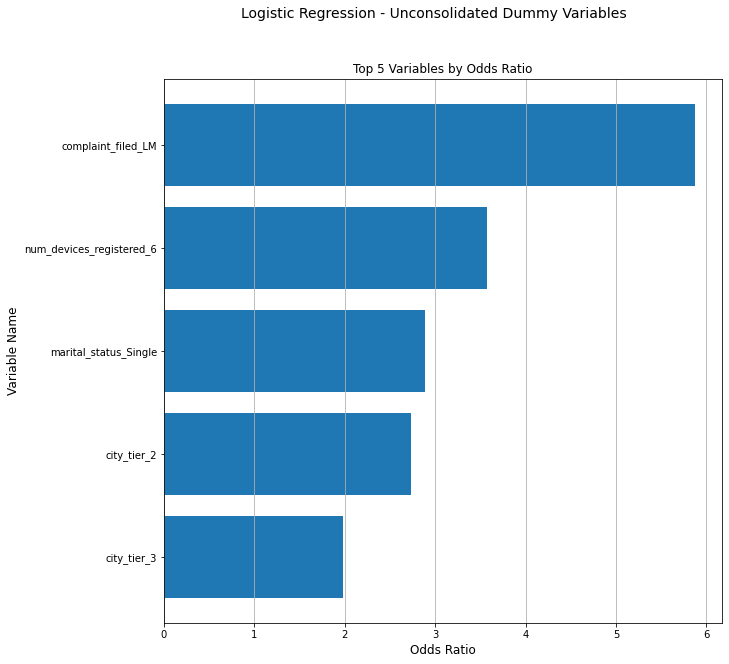

In [813]:
# graph presets
plt.figure(figsize = (10, 10))

# graph data
plt.barh(top5_variables_by_odds_ratio.index, # column name
         top5_variables_by_odds_ratio.values) # odds ratio values

# graph settings
plt.xlabel("Odds Ratio", fontsize = 12) # define x-axis label
plt.ylabel("Variable Name", fontsize = 12) # define y-axis label

plt.suptitle("Logistic Regression - Unconsolidated Dummy Variables", fontsize = 14) # define a plot title
plt.title("Top 5 Variables by Odds Ratio", fontsize = 12) # define a plot subtitle

plt.gca().invert_yaxis() # invert the y-axis to display in descending order
plt.grid(axis = 'x') # plot grid lines

# display plot
plt.show()

It can be concluded that the most influential factors that affect the likelihood of a customer no longer making use of the e-commerce platform are:

* 1: Complaint Filed in the Last Month (5.88)
* 2: Number of Devices Registered - 6 (3.57)
* 3: Marital Status - Single (2.89)

This means that if a customer had filed a complaint in the last month, the odds of a customer ceasing to use the e-commerce platform increase by a factor of 5.88. Similarly, in the case of `Number of Devices Registered - 6`, the odds of a customer ceasing to use the e-commerce platform increases by a factor of 3.57 with respect to the reference variable `Number of Devices Registered - 4`. Lastly, in the case of `Marital Status - Single`, the odds of losing a customer increases by a factor of 2.89 with respect to `Marital Status - Married`.


Conversely, the least influential factors that affect the likelihood of losing a customer include (based on their respective odds ratio):

* 1: Preferred Order Category in the Last Month - Laptop & Accessories (0.22)
* 2: Number of Devices Registered - 2 (0.46)
* 3: Number of Devices Registered - 1 (0.47)

Conversely, it can be said that if a customer's preferred order category is 'Laptop & Accessories' or if the number of devices which the customer has registered falls between 1 and 2, then the likelihood of said customer churning is reduced given the negative correlation (`preferred_order_cat_LM_Laptop & Accessory`: -1.50 / `num_devices_registered_2`: -0.77 / `num_devices_registered_1`: -0.75). In the case of `num_devices_registered`, it is important to note that the odds ratio of 0.46 and 0.47 is with respect to the reference variable `num_devices_registered_4`.

Lastly, given that the set of fields listed in the dataframe above are all statistically significant, for these particular fields, the null hypothesis may be rejected which originally stated that there is no relationship between a given independent variable and customer churn and accept the alternate hypothesis; from which there is a statistically significant relationship between the set of independent variables and customer churn.

[Back to Top](#back_to_top)

#### Consolidated Dummy Variables
<a id="log_reg_consol_var"></a>

---

In the first set of Logistics Regression models, the `customer_df_with_dummies` dataframe was used as the foundation for each of the models. In the following section, a similar analysis is to be conducted with the exception, that in this instance, the `customer_df_with_consol_dummies` dataframe will be leveraged. From this, the impact that consolidating dummy variables has on our model's accuracy may be ascertained.

Before proceeding in fitting the model, the correlation between the variables of the dataframe can be assessed by creating a correlation matrix.

In [814]:
# create a correlation matrix
consol_corr_matrix = customer_df_with_consol_dummies.corr()

# view correlation matrix
consol_corr_matrix.head(10)

,churn,tenure,warehouse_to_home,num_addresses,complaint_filed_LM,order_amount_hike_vs_LY,num_coupon_used_LM,order_count_LM,days_since_last_order,avg_cashback_amount_LM,...,satisfaction_score_5,marital_status_Divorced,marital_status_Married,marital_status_Single,hour_spend_on_site_high(4-5),hour_spend_on_site_low(0-1),hour_spend_on_site_moderate(2-3),num_devices_registered_high(5-6),num_devices_registeredd_low(1-2),num_devices_registered_moderate(3-4)
churn,1.000000,-0.337831,0.069544,0.043931,0.250188,-0.007075,-0.001430,-0.024038,-0.155871,-0.154118,...,0.092442,-0.024934,-0.151024,0.180847,-0.000612,-0.037093,0.007983,0.095756,-0.062860,-0.042825
tenure,-0.337831,1.000000,-0.012191,0.235076,-0.020535,-0.005542,0.101535,0.165339,0.174378,0.467986,...,-0.030716,0.039472,0.082896,-0.119053,0.010493,0.026971,-0.015738,-0.038506,0.000553,0.033109
warehouse_to_home,0.069544,-0.012191,1.000000,-0.008305,0.026825,0.038311,0.002675,0.000354,0.020253,0.000415,...,0.005996,-0.006881,0.028811,-0.025570,0.046229,-0.020676,-0.041584,0.016920,0.007288,-0.019389
num_addresses,0.043931,0.235076,-0.008305,1.000000,-0.026399,0.012161,0.036985,-0.013970,-0.067180,0.186688,...,0.030584,-0.003364,0.011834,-0.010090,0.111805,-0.034541,-0.103648,0.041016,-0.018518,-0.023747
complaint_filed_LM,0.250188,-0.020535,0.026825,-0.026399,1.000000,-0.003842,-0.007810,-0.021288,-0.041415,0.000525,...,0.006264,0.007044,-0.003720,-0.001422,0.002031,-0.013583,0.000694,0.002884,-0.002171,-0.001111
order_amount_hike_vs_LY,-0.007075,-0.005542,0.038311,0.012161,-0.003842,1.000000,0.024482,0.010567,-0.004621,-0.009620,...,0.006662,-0.014253,0.004524,0.006094,0.081410,0.022574,-0.084963,0.063584,0.021572,-0.069123
num_coupon_used_LM,-0.001430,0.101535,0.002675,0.036985,-0.007810,0.024482,1.000000,0.641178,0.296816,0.219394,...,0.015322,0.031839,0.009851,-0.034981,0.157413,-0.015464,-0.152525,0.106404,-0.023075,-0.077645
order_count_LM,-0.024038,0.165339,0.000354,-0.013970,-0.021288,0.010567,0.641178,1.000000,0.421629,0.322313,...,0.023790,0.020765,0.034988,-0.053399,0.083701,-0.006442,-0.081457,0.059047,-0.029956,-0.032066
days_since_last_order,-0.155871,0.174378,0.020253,-0.067180,-0.041415,-0.004621,0.296816,0.421629,1.000000,0.316568,...,0.045430,0.010083,0.044703,-0.055604,0.062045,-0.023365,-0.056683,-0.006156,0.040053,-0.020389
avg_cashback_amount_LM,-0.154118,0.467986,0.000415,0.186688,0.000525,-0.009620,0.219394,0.322313,0.316568,1.000000,...,0.000721,0.044904,0.048915,-0.086836,0.113326,0.004121,-0.112842,0.086362,-0.025972,-0.058366


For added legibility, the above matrix will be converted into an interactive heatmap using Plotly.

In [815]:
# graph presets
mask = np.triu(np.ones_like(consol_corr_matrix, dtype = bool))
consol_corr_matrix = consol_corr_matrix.mask(mask)

# graph data
heat = go.Heatmap(
                  z = consol_corr_matrix, # plot the correlation matrix
                  x = consol_corr_matrix.columns.values, # set x-axis labels to matrix columns
                  y = consol_corr_matrix.columns.values, # set y-axis labels to matrix columns
                  xgap = 1, # include horizontal space between grid cells
                  ygap = 1, # include vertical space between grid cells
                  zmin = - 1, # set the lower bound of the colorscale
                  zmax = 1, # set the upper bound of the colorscale
                  colorscale = 'balance' # set colorscale
                  )

# graph settings
title = 'Customer Correlation Matrix' # set plot title

layout = go.Layout(
                   title_text=title, # set heatmap title
                   title_x=0.60, # set title's horizontal alignment
                   width=1200, # set figure width
                   height=1200, # set figure height
                   xaxis_showgrid=False, # disable x-axis gridlines
                   yaxis_showgrid=False, # disable y-axis gridlines
                   yaxis_autorange='reversed',
                   plot_bgcolor = 'white' # set the background color
                   )

# display graph
fig=go.Figure(data=[heat], layout=layout)
fig.show()

It can be seen that in certain instances, there are moderate to strong correlations between independent variables which is indicative of multi-collinearity. The purpose of generating a visual representation of the correlation matrix is to attempt to identify any multi-collinearity that may exist between the variables since high multi-collinearity can increase the standard error of the model (thereby increasing the average distance that the observed values fall from the regression line). 

At this stage, it is presumed that multi-collinearity was introduced during the creation of dummy variables which will inherently be highly correlated with one another given that they originate from the same field and that one variable can be predicted based on the values of the others.

Based on the visualization above, the following correlations may be observed between independent variables:

* Positive Correlations (to name a few):
    * `num_coupon_used_LM` and `order_count_LM` (correlation: 0.64)
    * `avg_cashback_amount_LM` and `preferred_order_cat_Others` (correlation: 0.57)
    * `city_tier_3` and `preferred_payment_method_E wallet` (correlation: 0.53)
</br>
</br>
* Negative Correlations (to name a few):
    * `preferred_login_device_Computer` and `preferred_login_device_Mobile Phone` (correlation: -1)
    * `gender_Female` and `gender_Male` (correlation: -1)
    * `hour_spend_on_site_high(4-5)` and `hour_spend_on_site_moderate(2-3)` (correlation: -0.98)
   
Noting the presence of multi-collinearity, we may proceed in dropping one (or more) of the variables from the set of dummy variables that have been created so far. In determining which columns to drop to address multi-collinearity that stems from the creation of dummy variables, the values which appear most frequently may be dropped.

To help identify which of the columns need to be dropped from the dataframe, the following code cell will determine the modal value for each column. The field representing the modal value is to then be dropped.

In [816]:
# instantiate a temporary dictionary
temp_dict = {}

# iterate through the 'column_name' field of the 'columns_to_binarize_df'
for i in range(len(columns_to_binarize_df['column_name'].values)):
    
    # return the most frequent value for each column and append the results to the temp_dict
    temp_dict[list(columns_to_binarize_df['column_name'].values)[i]] = customer_df[list(columns_to_binarize_df['column_name'].values)[i]].mode().values[0]

    
# convert the temporary dictionary into a dataframe
column_mode_df = pd.DataFrame(list(temp_dict.items()))

# rename the columns
column_mode_df.rename(columns = {0: 'column_name', 1: 'column_modal_value'}, inplace = True)

# display the dataframe
column_mode_df

,column_name,column_modal_value
0,preferred_login_device,Mobile Phone
1,city_tier,1
2,preferred_payment_method,Debit Card
3,gender,Male
4,hour_spend_on_site,3.0
5,num_devices_registered,4
6,preferred_order_cat_LM,Mobile Phone
7,satisfaction_score,3
8,marital_status,Married


Having identified the modal value for each dummy variable field, we may proceed in dropping the appropriate columns from the dataframe.</br>
To do so, each `column_name` (from the dataframe above) will be concatenated with its respective `column_modal_value` value (separated by an underscore).

In the following code cell, we verify that the concatenated version of the `column_name` and `column_model_value` is present in the dataframe. If present, then it will be dropped.

In [817]:
# iterates through each of the dataframe rows
for i in range(len(column_mode_df['column_name'])):
    
    # if the 'column_name + _ + column_modal_value' is present in the dataframe...
    if (str(column_mode_df['column_name'][i]) + "_" + str(column_mode_df['column_modal_value'][i]))\
        in customer_df_with_consol_dummies.columns:
        
        # ...drop the column from the dataframe
         customer_df_with_consol_dummies.drop(str(column_mode_df['column_name'][i]) + "_" +\
                                              str(column_mode_df['column_modal_value'][i]), axis = 1, inplace = True)

In this instance, the only columns which would not have been dropped from the dataframe would include both the `hour_spend_on_site` and `num_devices_registered` given that dummy variables `hour_spend_on_site_3.0` and `num_devices_registered_4` are not present in the dataframe. This is attributed to the fact that both of these columns were combined, such that they were grouped together along a scale of low, moderate and high.

As such, these two remaining columns will need to be manually dropped. Given that our reference variables ultimately represent the values which are most prevalent in the column, we may proceed in dropping columns: `hour_spend_on_site_moderate(2-3)` and `num_devices_registered_moderate(3-4)`. 

In doing so, the notion that the reference variables represent the most frequent values in a particular column is not violated. As exemplified below, it can be seen that the most frequent number of hours spent on the site range between 2 to 3 hours. In dropping the `hour_spend_on_site_moderate(2-3)` column, the reference variable still represents the most frequent values of the `hour_spend_on_site` column.

The same can be said in dropping the `num_devices_registered_moderate(3-4)`, which as demonstrated in the subsequent code cell, illustrates that the most frequent number of devices registered ranges between 3 and 4. As such, the reference variable would still represent the values which are most prevalent in the `num_devices_registered` column of our original dataframe.

In [818]:
# return the number of frequency of each unique value in the 'hour_spend_on_site' column
customer_df['hour_spend_on_site'].value_counts().sort_index()

0.0       3
1.0      35
2.0    1471
3.0    2942
4.0    1176
5.0       3
Name: hour_spend_on_site, dtype: int64

In [819]:
# return the number of frequency of each unique value in the 'num_devices_registered' column
customer_df['num_devices_registered'].value_counts().sort_index()

1     235
2     276
3    1699
4    2377
5     881
6     162
Name: num_devices_registered, dtype: int64

Next, columns `hour_spend_on_site_moderate(2-3)` and `num_devices_registered_moderate(3-4)` are dropped from `customer_df_with_consol_dummies`:

In [820]:
# drop 'hour_spend_on_site_moderate(2-3)' column
customer_df_with_consol_dummies.drop('hour_spend_on_site_moderate(2-3)', axis = 1, inplace = True)

In [821]:
# drop 'num_devices_registered_moderate(3-4)' column
customer_df_with_consol_dummies.drop('num_devices_registered_moderate(3-4)', axis = 1, inplace = True)

At this stage, the first Logistic Regression model may be instantiated whilst referencing the `customer_df_with_consol_dummies` dataframe.

#### Consolidated Dummy Variables</br>First Logistic Regression Model - 1 / 3

The first step is to assign our dependent and independent variables to their respective X and y values.

*Stepwise Regression - Removed Variables:*

*First iteration: avg_cashback_amount_LM*

In [822]:
# store independent variables to 'X'
X = customer_df_with_consol_dummies.drop('churn', axis = 1)

# store dependent variable to 'y'
y = customer_df_with_consol_dummies['churn']

In determining which field to drop from the dataframe first, the `high_vif_values` function may be called upon to calculate the Variance Inflation Factor for each independent variable. From the results displayed below, `avg_cashback_amount_LM` currently has the highest VIF value and as such will be removed before fitting the Logistics Regression model.

In [823]:
# display fields with VIF value > 5
high_vif_values(X)

order_amount_hike_vs_LY    16.956286
avg_cashback_amount_LM     44.216431
dtype: float64

In [824]:
# drop the 'avg_cashback_amount_LM' column
# save the independent variables to 'X'
X = X.drop(['avg_cashback_amount_LM'], axis = 1)

# retrieve all columns that start with the letter 'a'
check_if_dropped = [col for col in X if col.startswith('a')]

# confirm that the column has been dropped
check_if_dropped

[]

It can then be confirmed that the target column has been dropped, as demonstrated by the empty list generate by the code cell above in which no column titled `avg_cashback_amount_LM` has been found. From which, we may proceed in adding a constant.

In [825]:
# add a constant
X_with_constant = sm.add_constant(X)

# preview the dataframe to confirm that a constant column has been added
X_with_constant.head()

C:\Users\arnau\anaconda3\envs\capstone\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning:

In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.



,const,tenure,warehouse_to_home,num_addresses,complaint_filed_LM,order_amount_hike_vs_LY,num_coupon_used_LM,order_count_LM,days_since_last_order,preferred_login_device_Computer,...,satisfaction_score_1,satisfaction_score_2,satisfaction_score_4,satisfaction_score_5,marital_status_Divorced,marital_status_Single,hour_spend_on_site_high(4-5),hour_spend_on_site_low(0-1),num_devices_registered_high(5-6),num_devices_registeredd_low(1-2)
CustomerID,,,,,,,,,,,,,,,,,,,,,
50001,1.0,4.0,6.0,9,1,11.0,1.0,1.0,5.0,0,...,0,1,0,0,0,1,0,0,0,0
50002,1.0,9.0,8.0,7,1,15.0,0.0,1.0,0.0,0,...,0,0,0,0,0,1,0,0,0,0
50003,1.0,9.0,30.0,6,1,14.0,0.0,1.0,3.0,0,...,0,0,0,0,0,1,0,0,0,0
50004,1.0,0.0,15.0,8,0,23.0,0.0,1.0,3.0,0,...,0,0,0,1,0,1,0,0,0,0
50005,1.0,0.0,12.0,3,0,11.0,1.0,1.0,3.0,0,...,0,0,0,1,0,1,0,0,0,0


The following step is to then instantiate, fit and score the model to the data:

In [826]:
# instantiate the model
first_cust_churn_logit = sm.Logit(y, X_with_constant)

# fit the model
first_fitted_cust_churn_logit = first_cust_churn_logit.fit()

# return a summary of results
first_fitted_cust_churn_logit.summary()

         Current function value: 0.279241
         Iterations: 35


C:\Users\arnau\anaconda3\envs\capstone\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                  churn   No. Observations:                 5630
Model:                          Logit   Df Residuals:                     5599
Method:                           MLE   Df Model:                           30
Date:                Fri, 01 Apr 2022   Pseudo R-squ.:                  0.3840
Time:                        16:20:22   Log-Likelihood:                -1572.1
converged:                      False   LL-Null:                       -2552.2
Covariance Type:            nonrobust   LLR p-value:                     0.000
=============================================================================================================
                                                coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------
const                                        -2.2824      0.269     -8.497      0.000      -2.809      -1.756
tenure                                       -0.2058      0.010    -20.894      0.000      -0.225      -0.186
warehouse_to_home                             0.0382      0.005      6.986      0.000       0.028       0.049
num_addresses                                 0.2203      0.018     12.190      0.000       0.185       0.256
complaint_filed_LM                            1.7653      0.097     18.238      0.000       1.576       1.955
order_amount_hike_vs_LY                      -0.0200      0.013     -1.552      0.121      -0.045       0.005
num_coupon_used_LM                            0.0298      0.035      0.849      0.396      -0.039       0.099
order_count_LM                                0.1294      0.026      5.044      0.000       0.079       0.180
days_since_last_order                        -0.1105      0.018     -6.141      0.000      -0.146      -0.075
preferred_login_device_Computer               0.4409      0.099      4.470      0.000       0.248       0.634
city_tier_2                                   0.9660      0.229      4.225      0.000       0.518       1.414
city_tier_3                                   0.6925      0.120      5.751      0.000       0.457       0.929
preferred_payment_method_Cash on Delivery     0.4589      0.160      2.861      0.004       0.145       0.773
preferred_payment_method_Credit Card         -0.2554      0.112     -2.275      0.023      -0.475      -0.035
preferred_payment_method_E wallet             0.5410      0.168      3.223      0.001       0.212       0.870
preferred_payment_method_UPI                 -0.2183      0.193     -1.133      0.257      -0.596       0.159
gender_Female                                -0.3151      0.096     -3.276      0.001      -0.504      -0.127
preferred_order_cat_LM_Fashion               -0.3872      0.151     -2.559      0.011      -0.684      -0.091
preferred_order_cat_LM_Grocery               -0.6930      0.325     -2.130      0.033      -1.331      -0.055
preferred_order_cat_LM_Laptop & Accessory    -1.4618      0.128    -11.420      0.000      -1.713      -1.211
preferred_order_cat_LM_Others                 0.6819      0.320      2.129      0.033       0.054       1.310
satisfaction_score_1                         -0.6467      0.141     -4.594      0.000      -0.923      -0.371
satisfaction_score_2                         -0.6985      0.179     -3.900      0.000      -1.049      -0.347
satisfaction_score_4                         -0.0360      0.133     -0.270      0.787      -0.297       0.225
satisfaction_score_5                          0.5175      0.125      4.135      0.000       0.272       0.763
marital_status_Divorced                       0.3728      0.144      2.595      0.009       0.091       0.654
marital_status_Single                         1.053

In determining which column to drop on the following iteration of the model construction process, the VIF values are evaluated to identify those columns with a score above 5:

In [827]:
# return all columns with VIF value > 5
high_vif_values(X)

order_amount_hike_vs_LY    10.063257
dtype: float64

For the second iteration of the Logistic Regression model, the `order_amount_hike_vs_LY` field is to be dropped from the dataframe.

#### Consolidated Dummy Variables</br>Second Logistic Regression Model - 2 / 3

*Stepwise Regression - Removed Variables:*

*First iteration: avg_cashback_amount_LM*</br>
*Second iteration: order_amount_hike_vs_LY*</br>

In [828]:
# drop the 'order_amount_hike_vs_LY' column
# save the independent variables to 'X'
X = X.drop(['order_amount_hike_vs_LY'], axis = 1)

# retrieve all columns that start with the letter 'o'
check_if_dropped = [col for col in X if col.startswith('o')]

# confirm that the column has been dropped
check_if_dropped

['order_count_LM']

Once it has been confirmed that the column has been dropped, a constant is added to the dataframe:

In [829]:
# add a constant
X_with_constant = sm.add_constant(X)

# preview the dataframe to confirm that a constant column has been added
X_with_constant.head()

C:\Users\arnau\anaconda3\envs\capstone\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning:

In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.



,const,tenure,warehouse_to_home,num_addresses,complaint_filed_LM,num_coupon_used_LM,order_count_LM,days_since_last_order,preferred_login_device_Computer,city_tier_2,...,satisfaction_score_1,satisfaction_score_2,satisfaction_score_4,satisfaction_score_5,marital_status_Divorced,marital_status_Single,hour_spend_on_site_high(4-5),hour_spend_on_site_low(0-1),num_devices_registered_high(5-6),num_devices_registeredd_low(1-2)
CustomerID,,,,,,,,,,,,,,,,,,,,,
50001,1.0,4.0,6.0,9,1,1.0,1.0,5.0,0,0,...,0,1,0,0,0,1,0,0,0,0
50002,1.0,9.0,8.0,7,1,0.0,1.0,0.0,0,0,...,0,0,0,0,0,1,0,0,0,0
50003,1.0,9.0,30.0,6,1,0.0,1.0,3.0,0,0,...,0,0,0,0,0,1,0,0,0,0
50004,1.0,0.0,15.0,8,0,0.0,1.0,3.0,0,0,...,0,0,0,1,0,1,0,0,0,0
50005,1.0,0.0,12.0,3,0,1.0,1.0,3.0,0,0,...,0,0,0,1,0,1,0,0,0,0


The model may then be instantiated and fit to the data:

In [830]:
# instantiate the model
second_cust_churn_logit = sm.Logit(y, X_with_constant)

# fit the model
second_fitted_cust_churn_logit = second_cust_churn_logit.fit()

# return a summary of results
second_fitted_cust_churn_logit.summary()

         Current function value: 0.279456
         Iterations: 35


C:\Users\arnau\anaconda3\envs\capstone\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                  churn   No. Observations:                 5630
Model:                          Logit   Df Residuals:                     5600
Method:                           MLE   Df Model:                           29
Date:                Fri, 01 Apr 2022   Pseudo R-squ.:                  0.3835
Time:                        16:20:22   Log-Likelihood:                -1573.3
converged:                      False   LL-Null:                       -2552.2
Covariance Type:            nonrobust   LLR p-value:                     0.000
=============================================================================================================
                                                coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------
const                                        -2.5766      0.192    -13.430      0.000      -2.953      -2.201
tenure                                       -0.2057      0.010    -20.893      0.000      -0.225      -0.186
warehouse_to_home                             0.0378      0.005      6.901      0.000       0.027       0.048
num_addresses                                 0.2198      0.018     12.162      0.000       0.184       0.255
complaint_filed_LM                            1.7674      0.097     18.254      0.000       1.578       1.957
num_coupon_used_LM                            0.0282      0.035      0.803      0.422      -0.041       0.097
order_count_LM                                0.1289      0.026      5.031      0.000       0.079       0.179
days_since_last_order                        -0.1105      0.018     -6.142      0.000      -0.146      -0.075
preferred_login_device_Computer               0.4398      0.099      4.459      0.000       0.247       0.633
city_tier_2                                   0.9792      0.228      4.297      0.000       0.533       1.426
city_tier_3                                   0.6939      0.120      5.765      0.000       0.458       0.930
preferred_payment_method_Cash on Delivery     0.4602      0.160      2.870      0.004       0.146       0.775
preferred_payment_method_Credit Card         -0.2531      0.112     -2.255      0.024      -0.473      -0.033
preferred_payment_method_E wallet             0.5480      0.168      3.271      0.001       0.220       0.876
preferred_payment_method_UPI                 -0.2169      0.193     -1.127      0.260      -0.594       0.160
gender_Female                                -0.3182      0.096     -3.311      0.001      -0.506      -0.130
preferred_order_cat_LM_Fashion               -0.3771      0.151     -2.499      0.012      -0.673      -0.081
preferred_order_cat_LM_Grocery               -0.6618      0.324     -2.043      0.041      -1.297      -0.027
preferred_order_cat_LM_Laptop & Accessory    -1.4574      0.128    -11.393      0.000      -1.708      -1.207
preferred_order_cat_LM_Others                 0.6967      0.320      2.177      0.029       0.069       1.324
satisfaction_score_1                         -0.6551      0.141     -4.661      0.000      -0.931      -0.380
satisfaction_score_2                         -0.7045      0.179     -3.942      0.000      -1.055      -0.354
satisfaction_score_4                         -0.0413      0.133     -0.310      0.757      -0.302       0.220
satisfaction_score_5                          0.5096      0.125      4.076      0.000       0.265       0.755
marital_status_Divorced                       0.3740      0.143      2.607      0.009       0.093       0.655
marital_status_Single                         1.0513      0.102     10.340      0.000       0.852       1.251
hour_spend_on_site_high(4-5)                 -0.241

In [831]:
# return a VIF value for each independent variable
high_vif_values(X)

Series([], dtype: float64)

We now find that all of the remaining variables have VIF values below 5 which indicates that, through the process of stepwise regression, the presence of multi-collinearity has been mitigated (though not entirely removed).

At this stage, the p-values for all the independent variables that remain may be evaluated to determine if any variables may be dropped based on their statistical significance.

In [832]:
# create a dataframe with each independent variable and its corresponding p-values
ind_var_p_vals = pd.DataFrame({'p_value': second_fitted_cust_churn_logit.pvalues})

# drop the constant from the dataframe
ind_var_p_vals.drop('const', inplace = True)

# store all of the independent variables with p-values greater than 0.05 in a separate dataframe
not_stat_signif_ind_var_p_vals = ind_var_p_vals[ind_var_p_vals['p_value'] > 0.05]

# display the dataframe
not_stat_signif_ind_var_p_vals

,p_value
num_coupon_used_LM,0.421900
preferred_payment_method_UPI,0.259888
satisfaction_score_4,0.756744
hour_spend_on_site_low(0-1),0.995945


Having established that all of the remaining variables have a VIF score below the threshold, a dataframe is then created which returns each column whose p-value exceeds 0.05.

Three out of the four columns are dummy variables, and therefore cannot be removed from the dataframe since this would alter the reference variable for each set of dummy variables. However, `num_coupon_used_LM` is a standalone column which can be dropped given that it is not statistically significant.

#### Consolidated Dummy Variables</br>Third Logistic Regression Model - 3 / 3

*Stepwise Regression - Removed Variables:*

*First iteration: avg_cashback_amount_LM*</br>
*Second iteration: order_amount_hike_vs_LY*</br>
*Third iteration: num_coupon_used_LM*</br>

In [833]:
# drop the 'num_coupon_used_LM' column
# save the independent variables to 'X'
X = X.drop(['num_coupon_used_LM'], axis = 1)

# retrieve all columns that start with the letter 'n'
check_if_dropped = [col for col in X if col.startswith('n')]

# confirm that the column has been dropped
check_if_dropped

['num_addresses',
 'num_devices_registered_high(5-6)',
 'num_devices_registeredd_low(1-2)']

Once dropped, a constant is added and from which the model may be instantiated and fit to the data:

In [834]:
# add a constant
X_with_constant = sm.add_constant(X)

# preview the dataframe to confirm that a constant column has been added
X_with_constant.head()

C:\Users\arnau\anaconda3\envs\capstone\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning:

In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.



,const,tenure,warehouse_to_home,num_addresses,complaint_filed_LM,order_count_LM,days_since_last_order,preferred_login_device_Computer,city_tier_2,city_tier_3,...,satisfaction_score_1,satisfaction_score_2,satisfaction_score_4,satisfaction_score_5,marital_status_Divorced,marital_status_Single,hour_spend_on_site_high(4-5),hour_spend_on_site_low(0-1),num_devices_registered_high(5-6),num_devices_registeredd_low(1-2)
CustomerID,,,,,,,,,,,,,,,,,,,,,
50001,1.0,4.0,6.0,9,1,1.0,5.0,0,0,1,...,0,1,0,0,0,1,0,0,0,0
50002,1.0,9.0,8.0,7,1,1.0,0.0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
50003,1.0,9.0,30.0,6,1,1.0,3.0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
50004,1.0,0.0,15.0,8,0,1.0,3.0,0,0,1,...,0,0,0,1,0,1,0,0,0,0
50005,1.0,0.0,12.0,3,0,1.0,3.0,0,0,0,...,0,0,0,1,0,1,0,0,0,0


In [835]:
# instantiate the model
third_cust_churn_logit = sm.Logit(y, X_with_constant)

# fit the model
third_fitted_cust_churn_logit = third_cust_churn_logit.fit()

# return a summary of results
third_fitted_cust_churn_logit.summary()

         Current function value: 0.279513
         Iterations: 35


C:\Users\arnau\anaconda3\envs\capstone\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                  churn   No. Observations:                 5630
Model:                          Logit   Df Residuals:                     5601
Method:                           MLE   Df Model:                           28
Date:                Fri, 01 Apr 2022   Pseudo R-squ.:                  0.3834
Time:                        16:20:23   Log-Likelihood:                -1573.7
converged:                      False   LL-Null:                       -2552.2
Covariance Type:            nonrobust   LLR p-value:                     0.000
=============================================================================================================
                                                coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------
const                                        -2.5733      0.192    -13.408      0.000      -2.949      -2.197
tenure                                       -0.2058      0.010    -20.890      0.000      -0.225      -0.186
warehouse_to_home                             0.0376      0.005      6.866      0.000       0.027       0.048
num_addresses                                 0.2204      0.018     12.205      0.000       0.185       0.256
complaint_filed_LM                            1.7655      0.097     18.247      0.000       1.576       1.955
order_count_LM                                0.1419      0.020      7.171      0.000       0.103       0.181
days_since_last_order                        -0.1101      0.018     -6.119      0.000      -0.145      -0.075
preferred_login_device_Computer               0.4408      0.099      4.471      0.000       0.248       0.634
city_tier_2                                   0.9757      0.228      4.285      0.000       0.529       1.422
city_tier_3                                   0.6920      0.120      5.752      0.000       0.456       0.928
preferred_payment_method_Cash on Delivery     0.4658      0.160      2.907      0.004       0.152       0.780
preferred_payment_method_Credit Card         -0.2544      0.112     -2.267      0.023      -0.474      -0.034
preferred_payment_method_E wallet             0.5504      0.167      3.288      0.001       0.222       0.879
preferred_payment_method_UPI                 -0.2142      0.192     -1.113      0.266      -0.591       0.163
gender_Female                                -0.3180      0.096     -3.310      0.001      -0.506      -0.130
preferred_order_cat_LM_Fashion               -0.3716      0.151     -2.464      0.014      -0.667      -0.076
preferred_order_cat_LM_Grocery               -0.6781      0.324     -2.093      0.036      -1.313      -0.043
preferred_order_cat_LM_Laptop & Accessory    -1.4566      0.128    -11.389      0.000      -1.707      -1.206
preferred_order_cat_LM_Others                 0.6841      0.320      2.138      0.033       0.057       1.311
satisfaction_score_1                         -0.6509      0.140     -4.635      0.000      -0.926      -0.376
satisfaction_score_2                         -0.6988      0.178     -3.915      0.000      -1.049      -0.349
satisfaction_score_4                         -0.0365      0.133     -0.274      0.784      -0.297       0.224
satisfaction_score_5                          0.5103      0.125      4.081      0.000       0.265       0.755
marital_status_Divorced                       0.3777      0.143      2.635      0.008       0.097       0.659
marital_status_Single                         1.0532      0.102     10.362      0.000       0.854       1.252
hour_spend_on_site_high(4-5)                 -0.2321      0.115     -2.011      0.044      -0.458      -0.006
hour_spend_on_site_low(0-1)                 -18.178

Whilst it can be noted, at this stage of the stepwise Logistic Regression model process, that all fields have VIF scores below the threshold; there continue to be instance of values whose p-value exceed the pre-determined threshold of 0.05. However, it can be seen that for each of these variables, that they are dummy variables which may not be dropped from the dataframe since doing so would change the reference variable. 

With that being said, the model's performance may be determined and evaluated:

In [836]:
# generate a set of predictions
third_y_predictions = third_fitted_cust_churn_logit.predict(X_with_constant)

third_y_binary_predictions = np.where(third_y_predictions >= 0.5, 1.0, 0.0)

# calculate the model's accuracy
third_model_accuracy = round(100*(third_y_binary_predictions == y).sum()/y.shape[0], 2)

print(f'Model Type: Logistic Regression Model')
print(f'Data Type: Consolidated Dummy Variables\n')

print(f'The accuracy of the model is: {third_model_accuracy}%')

Model Type: Logistic Regression Model
Data Type: Consolidated Dummy Variables

The accuracy of the model is: 89.84%


#### Findings: Consolidated Dummy Variables

After having dropped the `num_coupon_used_LM` field, it can be noted that the model's accuracy after the third iteration stands at 89.84%.

With a final model now in place, the results can be evaluated, from which we may determine as to whether the null hypothesis can be rejected as it relates to those variables which are deemed to be statistically significant. In order to do so, a new dataframe is created that includes each variable and its corresponding coefficient and p-values. In addition, a new column is added which reflects the odds ratio for each of fields.

In [837]:
# retrieve coefficient and p-values for each variable
third_lr_insights_df = pd.DataFrame({'coefficient': third_fitted_cust_churn_logit.params,
                                     'p_value': third_fitted_cust_churn_logit.pvalues})

# add odds ratio for each variable
third_lr_insights_df['odds_ratio'] = np.exp(third_lr_insights_df['coefficient'])

# drop constant from the dataframe
third_lr_insights_df.drop('const', inplace=True)

# display the dataframe
third_lr_insights_df.head()

,coefficient,p_value,odds_ratio
tenure,-0.205783,6.636366e-97,0.814010
warehouse_to_home,0.037582,6.600677e-12,1.038297
num_addresses,0.220380,2.940949e-34,1.246550
complaint_filed_LM,1.765546,2.185921e-74,5.844764
order_count_LM,0.141914,7.465805e-13,1.152478


In referencing the dataframe above, variables that are not statistically significant (p-value > 0.05) may be filtered out.

In [838]:
# from the dataframe shown above, filter out all variables that are not statistically significant
significant_variable_df = third_lr_insights_df[third_lr_insights_df['p_value'] <= 0.05]

# display the dataframe
significant_variable_df.head()

,coefficient,p_value,odds_ratio
tenure,-0.205783,6.636366e-97,0.814010
warehouse_to_home,0.037582,6.600677e-12,1.038297
num_addresses,0.220380,2.940949e-34,1.246550
complaint_filed_LM,1.765546,2.185921e-74,5.844764
order_count_LM,0.141914,7.465805e-13,1.152478


The final set of results are then sorted based on the odds ratio in descending order.

In [839]:
# of the variables in the dataframe above, sort the results by coefficient in descending order
sorted_variable_df = significant_variable_df.sort_values(by = 'coefficient', ascending = False)

# display the dataframe
sorted_variable_df

,coefficient,p_value,odds_ratio
complaint_filed_LM,1.765546,2.185921e-74,5.844764
marital_status_Single,1.053232,3.706885e-25,2.866903
city_tier_2,0.975662,1.829196e-05,2.652923
city_tier_3,0.692049,8.833815e-09,1.997806
preferred_order_cat_LM_Others,0.684102,3.250500e-02,1.981992
preferred_payment_method_E wallet,0.550440,1.009101e-03,1.734016
num_devices_registered_high(5-6),0.511838,5.588957e-06,1.668355
satisfaction_score_5,0.510323,4.485347e-05,1.665830
preferred_payment_method_Cash on Delivery,0.465787,3.643535e-03,1.593267
preferred_login_device_Computer,0.440779,7.795525e-06,1.553917


For ease of interpretability, the top 5 most deterministic variables based on the odds ratio may be plotted.

Before doing so however, since the above dataframe only include variables with p-values that are less than or equal to 0.05; the null hypothesis can be rejected in favor of the alternate hypothesis for this segment of variables. Which is to say that, there is a relationship between the set of variables displayed in the dataframe above and customer churn.

In [840]:
# retrieve the top 5 variables by odds ratio
top5_variables_by_odds_ratio = sorted_variable_df['odds_ratio'][:5]
top5_variables_by_odds_ratio

complaint_filed_LM               5.844764
marital_status_Single            2.866903
city_tier_2                      2.652923
city_tier_3                      1.997806
preferred_order_cat_LM_Others    1.981992
Name: odds_ratio, dtype: float64

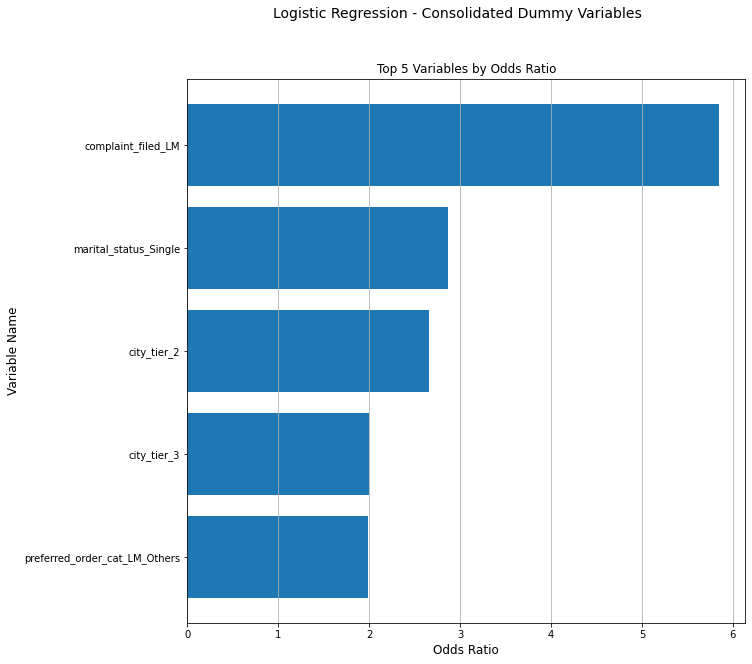

In [149]:
# graph presets
plt.figure(figsize = (10, 10))

# graph data
plt.barh(top5_variables_by_odds_ratio.index, # variable names
         top5_variables_by_odds_ratio.values) # odds ratios

# graph settings
plt.xlabel("Odds Ratio", fontsize = 12) # define x-axis label
plt.ylabel("Variable Name", fontsize = 12) # define y-axis label

plt.suptitle("Logistic Regression - Consolidated Dummy Variables", fontsize = 14) # define plot title
plt.title("Top 5 Variables by Odds Ratio", fontsize = 12) # define plot subtitle

plt.gca().invert_yaxis() # invert the y-axis to display results in descending order
plt.grid(axis = 'x') # display grid

# display graph
plt.show()

From the dataframe posted above, it can be concluded that the most influential factors (based on the odds ratio) that affect the probability of losing a customer are:

* `Complaint Filed in the Last Month` (5.84)
* `Marital Status - Single` (2.86)
* `City Tier - 2` (2.65)

As such, it can be said that for every additional complaint filed by a given customer, the odds of said customer no longer utilizing the e-commerce platform increases by a factor of 5.84 and is most positively correlated to customer churn with a correlation coefficient of 1.76. With regards to the `Marital Status - Single`, the odds of a customer ceasing to use the e-commerce platform increases by a factor of 2.86 with respect to the reference variable `Marital Status - Married`. Finally, the odds of losing a customer increases by a factor of 2.65 in the event that a customer resides in a tier 1 city (given that the odds ratio of a dummy variable must be interpreted with respect to the reference variable).

Alternatively, the least influential factors affecting the likelihood of losing a customer include:

* `Preferred Order Category - Laptop & Accessories` (0.23)
* `Number of Devices Registered - Low (1-2)` (0.46)
* `Satisfaction Score - 2` (0.50)

The results of which may be interpreted to state that the probability of losing a customer is least if their preferred order category is Mobile Phone (with an odds ratio of 0.23) given that this reference variable is negatively correlated with customer churn (correlation coefficient: -1.46). Concerning the number of devices registered, the likelihood of a customer no longer using the site if they had previously registered between 3-4 devices only increases the odds by a factor of 0.46 (seeing as this variable is negatively correlated with customer churn). Lastly, given a customer's satisfaction score of 3, indicates that the odds of said customer ceasing to make use of the site increases by a factor of 0.50.

[Back to Top](#back_to_top)

#### Original DataFrame
<a id="log_reg_orig_df"></a>

---

Following the creation of Logistic Regression models using both the unconsolidated and consolidated dummy variable dataframes, we can assess how the accuracy of these models compares to a Logistic Regression model which is based on the original dataframe. In the following section, we'll undergo a similar model construction process as the two previous sections. The result of which will help to determine the extent to which the creation of dummy variables increased the accuracy of the models.

First, the `.info()` method is called on the `customer_df` dataframe to review each of the column's dtype. Prior to fitting the model, any column of type `object` will need to be excluded before instantiating the dependent and independent variables.

In [150]:
# retrieve each column's dtype
customer_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5630 entries, 50001 to 55630
Data columns (total 19 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   churn                     5630 non-null   int64  
 1   tenure                    5630 non-null   float64
 2   preferred_login_device    5630 non-null   object 
 3   city_tier                 5630 non-null   object 
 4   warehouse_to_home         5630 non-null   float64
 5   preferred_payment_method  5630 non-null   object 
 6   gender                    5630 non-null   object 
 7   hour_spend_on_site        5630 non-null   float64
 8   num_devices_registered    5630 non-null   int64  
 9   preferred_order_cat_LM    5630 non-null   object 
 10  satisfaction_score        5630 non-null   int64  
 11  marital_status            5630 non-null   object 
 12  num_addresses             5630 non-null   int64  
 13  complaint_filed_LM        5630 non-null   int64  
 14  ord

In the following code cells, a variable (`non_object_columns`) is created which filters out any columns which are not of dtype `int64` or `float64`. Afterwards, we assign all the columns except for `churn` to our independent variable `X` and the dependent variable to `y`.

The final step before fitting the model being the inclusion of a constant.

In [151]:
# store the names of all the columns which are not of dtype = 'oject' in a variable
non_object_columns = customer_df.select_dtypes(exclude=['object'])

# drop the 'churn' column
# save the independent variable to 'X'
X = non_object_columns.drop('churn', axis = 1) 

# save the dependent variable to 'y'
y = non_object_columns['churn']

In [152]:
# add a constant
X_with_constant = sm.add_constant(X)

# confirm that constant was added to the df
X_with_constant.head()

C:\Users\arnau\anaconda3\envs\capstone\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning:

In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.



,const,tenure,warehouse_to_home,hour_spend_on_site,num_devices_registered,satisfaction_score,num_addresses,complaint_filed_LM,order_amount_hike_vs_LY,num_coupon_used_LM,order_count_LM,days_since_last_order,avg_cashback_amount_LM
CustomerID,,,,,,,,,,,,,
50001,1.0,4.0,6.0,3.0,3,2,9,1,11.0,1.0,1.0,5.0,159.93
50002,1.0,9.0,8.0,3.0,4,3,7,1,15.0,0.0,1.0,0.0,120.90
50003,1.0,9.0,30.0,2.0,4,3,6,1,14.0,0.0,1.0,3.0,120.28
50004,1.0,0.0,15.0,2.0,4,5,8,0,23.0,0.0,1.0,3.0,134.07
50005,1.0,0.0,12.0,3.0,3,5,3,0,11.0,1.0,1.0,3.0,129.60


#### Original Dataframe</br>First Logistic Regression Model - 1 / 5

*Stepwise Regression - Removed Variables:*

*First iteration: none removed*

At this stage, the model may be instantiated and fit to the data using the `customer_df` dataframe.

In [153]:
# instantiate the model
first_cust_churn_logit = sm.Logit(y, X_with_constant)

# fit the model
first_fitted_cust_churn_logit = first_cust_churn_logit.fit()

# return a summary of results
first_fitted_cust_churn_logit.summary()

Optimization terminated successfully.
         Current function value: 0.314216
         Iterations 8


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                  churn   No. Observations:                 5630
Model:                          Logit   Df Residuals:                     5617
Method:                           MLE   Df Model:                           12
Date:                Fri, 01 Apr 2022   Pseudo R-squ.:                  0.3068
Time:                        04:57:59   Log-Likelihood:                -1769.0
converged:                       True   LL-Null:                       -2552.2
Covariance Type:            nonrobust   LLR p-value:                     0.000
===========================================================================================
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                      -2.3985      0.340     -7.063      0.000      -3.064      -1.733
tenure                     -0.1960      0.009    -21.716      0.000      -0.214      -0.178
warehouse_to_home           0.0277      0.005      5.325      0.000       0.017       0.038
hour_spend_on_site         -0.1910      0.067     -2.848      0.004      -0.322      -0.060
num_devices_registered      0.3220      0.046      7.071      0.000       0.233       0.411
satisfaction_score          0.2819      0.032      8.776      0.000       0.219       0.345
num_addresses               0.1747      0.017     10.463      0.000       0.142       0.207
complaint_filed_LM          1.5961      0.089     18.006      0.000       1.422       1.770
order_amount_hike_vs_LY    -0.0217      0.012     -1.843      0.065      -0.045       0.001
num_coupon_used_LM          0.0332      0.034      0.961      0.336      -0.034       0.101
order_count_LM              0.1386      0.025      5.485      0.000       0.089       0.188
days_since_last_order      -0.1393      0.017     -8.095      0.000      -0.173      -0.106
avg_cashback_amount_LM     -0.0046      0.001     -3.168      0.002      -0.007      -0.002
===========================================================================================
"""

As per the standard operating procedure, a list of fields is retrieved whose VIF score exceed 5 (denoting the presence of multi-collinearity):

In [154]:
# retrieve all columns with VIF scores greater than 5
high_vif_values(X)

hour_spend_on_site         19.119905
num_devices_registered     14.746902
satisfaction_score          5.454006
order_amount_hike_vs_LY    14.666716
avg_cashback_amount_LM     18.545111
dtype: float64

By calling the `high_vif_values()` function, it can be noted that multi-collinearity is present in our model. Based on the results, we will proceed in dropping the `hour_spend_on_site` field given that it has the highest VIF score.

#### Original Dataframe</br>Second Logistic Regression Model - 2 / 5

*Stepwise Regression - Removed Variables:*

*First iteration: none removed*</br>
*Second iteration: hour_spend_on_site*</br>

In the subsequent iteration, the `hour_spend_on_site` field will be dropped as it currently has the highest VIF score.

In [155]:
# drop the 'hour_spend_on_site' column
# save the independent variables to 'X'
X = X.drop(['hour_spend_on_site'], axis = 1)

# retrieve all columns that start with the letter 'h'
check_if_dropped = [col for col in X if col.startswith('h')]

# confirm that the column has been dropped
check_if_dropped

[]

The empty list generated from the code cell above helps to confirm that the intended column has been dropped from the dataframe; to which a constant may then be added:

In [156]:
# add a constant
X_with_constant = sm.add_constant(X)

# preview the dataframe to confirm that a constant column has been added
X_with_constant.head()

C:\Users\arnau\anaconda3\envs\capstone\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning:

In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.



,const,tenure,warehouse_to_home,num_devices_registered,satisfaction_score,num_addresses,complaint_filed_LM,order_amount_hike_vs_LY,num_coupon_used_LM,order_count_LM,days_since_last_order,avg_cashback_amount_LM
CustomerID,,,,,,,,,,,,
50001,1.0,4.0,6.0,3,2,9,1,11.0,1.0,1.0,5.0,159.93
50002,1.0,9.0,8.0,4,3,7,1,15.0,0.0,1.0,0.0,120.90
50003,1.0,9.0,30.0,4,3,6,1,14.0,0.0,1.0,3.0,120.28
50004,1.0,0.0,15.0,4,5,8,0,23.0,0.0,1.0,3.0,134.07
50005,1.0,0.0,12.0,3,5,3,0,11.0,1.0,1.0,3.0,129.60


Then, the Logistic Regression model is instantiated and fit :

In [157]:
# instantiate the model
second_cust_churn_logit = sm.Logit(y, X_with_constant)

# fit the model
second_fitted_cust_churn_logit = second_cust_churn_logit.fit()

# return a summary of results
second_fitted_cust_churn_logit.summary()

Optimization terminated successfully.
         Current function value: 0.314937
         Iterations 8


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                  churn   No. Observations:                 5630
Model:                          Logit   Df Residuals:                     5618
Method:                           MLE   Df Model:                           11
Date:                Fri, 01 Apr 2022   Pseudo R-squ.:                  0.3053
Time:                        04:57:59   Log-Likelihood:                -1773.1
converged:                       True   LL-Null:                       -2552.2
Covariance Type:            nonrobust   LLR p-value:                     0.000
===========================================================================================
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                      -2.6726      0.326     -8.192      0.000      -3.312      -2.033
tenure                     -0.1943      0.009    -21.615      0.000      -0.212      -0.177
warehouse_to_home           0.0267      0.005      5.151      0.000       0.017       0.037
num_devices_registered      0.2891      0.044      6.597      0.000       0.203       0.375
satisfaction_score          0.2763      0.032      8.633      0.000       0.214       0.339
num_addresses               0.1698      0.017     10.249      0.000       0.137       0.202
complaint_filed_LM          1.5928      0.088     18.000      0.000       1.419       1.766
order_amount_hike_vs_LY    -0.0237      0.012     -2.011      0.044      -0.047      -0.001
num_coupon_used_LM          0.0212      0.034      0.617      0.537      -0.046       0.089
order_count_LM              0.1428      0.025      5.656      0.000       0.093       0.192
days_since_last_order      -0.1403      0.017     -8.133      0.000      -0.174      -0.106
avg_cashback_amount_LM     -0.0051      0.001     -3.509      0.000      -0.008      -0.002
===========================================================================================
"""

In order to determine which field to drop from the dataframe in the next iteration, the `high_vif_values()` function is called:

In [158]:
# retrieve fields in the dataframe which have high VIF scores
high_vif_values(X)

num_devices_registered     12.562563
satisfaction_score          5.349030
order_amount_hike_vs_LY    13.214049
avg_cashback_amount_LM     17.891502
dtype: float64

So long as there are columns with elevated levels of collinearity, based on their VIF scores, we will drop the columns incrementally. With that being said, the next column to be dropped is the `avg_cashback_amount_LM` column.

#### Original Dataframe</br>Third Logistic Regression Model - 3 / 5

*Stepwise Regression - Removed Variables:*

*First iteration: none removed*</br>
*Second iteration: hour_spend_on_site*</br>
*Third iteration: avg_cashback_amount_LM*</br>

In [159]:
# drop the 'avg_cashback_amount_LM' column
# save the independent variables to 'X'
X = X.drop(['avg_cashback_amount_LM'], axis = 1)

# retrieve all columns that start with the letter 'a'
check_if_dropped = [col for col in X if col.startswith('a')]

# confirm that the column has been dropped
check_if_dropped

[]

As per the standard operating procedure, it must first be confirmed that the target column has been dropped from the dataframe, to which a constant may then be added:

In [160]:
# add a constant
X_with_constant = sm.add_constant(X)

# preview the dataframe to confirm that a constant column has been added
X_with_constant.head()

C:\Users\arnau\anaconda3\envs\capstone\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning:

In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.



,const,tenure,warehouse_to_home,num_devices_registered,satisfaction_score,num_addresses,complaint_filed_LM,order_amount_hike_vs_LY,num_coupon_used_LM,order_count_LM,days_since_last_order
CustomerID,,,,,,,,,,,
50001,1.0,4.0,6.0,3,2,9,1,11.0,1.0,1.0,5.0
50002,1.0,9.0,8.0,4,3,7,1,15.0,0.0,1.0,0.0
50003,1.0,9.0,30.0,4,3,6,1,14.0,0.0,1.0,3.0
50004,1.0,0.0,15.0,4,5,8,0,23.0,0.0,1.0,3.0
50005,1.0,0.0,12.0,3,5,3,0,11.0,1.0,1.0,3.0


The model is then fit to the revised data set:

In [161]:
# instantiate the model
third_cust_churn_logit = sm.Logit(y, X_with_constant)

# fit the model
third_fitted_cust_churn_logit = third_cust_churn_logit.fit()

# return a summary of results
third_fitted_cust_churn_logit.summary()

Optimization terminated successfully.
         Current function value: 0.316068
         Iterations 8


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                  churn   No. Observations:                 5630
Model:                          Logit   Df Residuals:                     5619
Method:                           MLE   Df Model:                           10
Date:                Fri, 01 Apr 2022   Pseudo R-squ.:                  0.3028
Time:                        04:57:59   Log-Likelihood:                -1779.5
converged:                       True   LL-Null:                       -2552.2
Covariance Type:            nonrobust   LLR p-value:                     0.000
===========================================================================================
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                      -3.2206      0.287    -11.221      0.000      -3.783      -2.658
tenure                     -0.2018      0.009    -23.021      0.000      -0.219      -0.185
warehouse_to_home           0.0257      0.005      4.964      0.000       0.016       0.036
num_devices_registered      0.2636      0.043      6.117      0.000       0.179       0.348
satisfaction_score          0.2734      0.032      8.573      0.000       0.211       0.336
num_addresses               0.1592      0.016      9.768      0.000       0.127       0.191
complaint_filed_LM          1.5904      0.088     18.000      0.000       1.417       1.764
order_amount_hike_vs_LY    -0.0231      0.012     -1.964      0.050      -0.046   -4.53e-05
num_coupon_used_LM          0.0182      0.034      0.533      0.594      -0.049       0.085
order_count_LM              0.1266      0.024      5.169      0.000       0.079       0.175
days_since_last_order      -0.1488      0.017     -8.747      0.000      -0.182      -0.115
===========================================================================================
"""

From which, the VIF scores are then recalculated for the remaining independent variables:

In [162]:
# calculate the VIF score for the remaining independent variables
high_vif_values(X)

num_devices_registered     11.111363
satisfaction_score          5.250294
order_amount_hike_vs_LY    12.268881
dtype: float64

In the fourth iteration of the Logistic Regression model, the `order_amount_hike_vs_LY` will be removed from the dataframe given that it has the highest VIF score at this stage.

#### Original Dataframe</br>Fourth Logistic Regression Model - 4 / 5

*Stepwise Regression - Removed Variables:*

*First iteration: none removed*</br>
*Second iteration: hour_spend_on_site*</br>
*Third iteration: avg_cashback_amount_LM*</br>
*Fourth iteration: order_amount_hike_vs_LY*</br>

Once the target column has been dropped and a constant added, the Logistic Regression model is refit to the updated data set (as demonstrated in the set of code cells below):

In [163]:
# drop the 'order_amount_hike_vs_LY' column
# save the independent variables to 'X'
X = X.drop(['order_amount_hike_vs_LY'], axis = 1)

# retrieve all columns that start with the letter 'o'
check_if_dropped = [col for col in X if col.startswith('o')]

# confirm that the column has been dropped
check_if_dropped

['order_count_LM']

In [164]:
# add a constant
X_with_constant = sm.add_constant(X)

# preview the dataframe to confirm that a constant column has been added
X_with_constant.head()

C:\Users\arnau\anaconda3\envs\capstone\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning:

In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.



,const,tenure,warehouse_to_home,num_devices_registered,satisfaction_score,num_addresses,complaint_filed_LM,num_coupon_used_LM,order_count_LM,days_since_last_order
CustomerID,,,,,,,,,,
50001,1.0,4.0,6.0,3,2,9,1,1.0,1.0,5.0
50002,1.0,9.0,8.0,4,3,7,1,0.0,1.0,0.0
50003,1.0,9.0,30.0,4,3,6,1,0.0,1.0,3.0
50004,1.0,0.0,15.0,4,5,8,0,0.0,1.0,3.0
50005,1.0,0.0,12.0,3,5,3,0,1.0,1.0,3.0


In [165]:
# instantiate the model
fourth_cust_churn_logit = sm.Logit(y, X_with_constant)

# fit the model
fourth_fitted_cust_churn_logit = fourth_cust_churn_logit.fit()

# return a summary of results
fourth_fitted_cust_churn_logit.summary()

Optimization terminated successfully.
         Current function value: 0.316414
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                  churn   No. Observations:                 5630
Model:                          Logit   Df Residuals:                     5620
Method:                           MLE   Df Model:                            9
Date:                Fri, 01 Apr 2022   Pseudo R-squ.:                  0.3020
Time:                        04:58:00   Log-Likelihood:                -1781.4
converged:                       True   LL-Null:                       -2552.2
Covariance Type:            nonrobust   LLR p-value:                     0.000
==========================================================================================
                             coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                     -3.5440      0.236    -14.985      0.000      -4.008      -3.080
tenure                    -0.2013      0.009    -23.016      0.000      -0.218      -0.184
warehouse_to_home          0.0251      0.005      4.862      0.000       0.015       0.035
num_devices_registered     0.2575      0.043      6.004      0.000       0.173       0.342
satisfaction_score         0.2725      0.032      8.551      0.000       0.210       0.335
num_addresses              0.1585      0.016      9.713      0.000       0.126       0.190
complaint_filed_LM         1.5911      0.088     18.011      0.000       1.418       1.764
num_coupon_used_LM         0.0155      0.034      0.454      0.650      -0.051       0.082
order_count_LM             0.1281      0.024      5.241      0.000       0.080       0.176
days_since_last_order     -0.1488      0.017     -8.743      0.000      -0.182      -0.115
==========================================================================================
"""

In [166]:
# retrieve a list of columns with high VIF scores (> 5)
high_vif_values(X)

num_devices_registered    7.941096
dtype: float64

At this stage of the model construction process, only one column remains which demonstrates high collinearity (`num_devices_registered`). In the final iteration, this column will be dropped from the dataframe. From which, the model's performance may be measured and compared to that of the previous models that had been based on the unconsolidated and consolidated dummy variable dataframes.

#### Original Dataframe</br>Fifth Logistic Regression Model - 5 / 5

*Stepwise Regression - Removed Variables:*

*First iteration: none removed*</br>
*Second iteration: hour_spend_on_site*</br>
*Third iteration: avg_cashback_amount_LM*</br>
*Fourth iteration: order_amount_hike_vs_LY*</br>
*Fifth iteration: num_devices_registered*</br>

In [167]:
# drop the 'num_devices_registered' column
# save the independent variables to 'X'
X = X.drop(['num_devices_registered'], axis = 1)

# retrieve all the columns that start with the letter 'n'
check_if_dropped = [col for col in X if col.startswith('n')]

# confirm that the column has been dropped
check_if_dropped

['num_addresses', 'num_coupon_used_LM']

After having removed the fifth variable from the dataset, the model can be re-instantiated once a constant has been added to the dataframe.

In [168]:
# add a constant
X_with_constant = sm.add_constant(X)

# preview the dataframe to confirm that a constant column has been added
X_with_constant.head()

C:\Users\arnau\anaconda3\envs\capstone\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning:

In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.



,const,tenure,warehouse_to_home,satisfaction_score,num_addresses,complaint_filed_LM,num_coupon_used_LM,order_count_LM,days_since_last_order
CustomerID,,,,,,,,,
50001,1.0,4.0,6.0,2,9,1,1.0,1.0,5.0
50002,1.0,9.0,8.0,3,7,1,0.0,1.0,0.0
50003,1.0,9.0,30.0,3,6,1,0.0,1.0,3.0
50004,1.0,0.0,15.0,5,8,0,0.0,1.0,3.0
50005,1.0,0.0,12.0,5,3,0,1.0,1.0,3.0


In [169]:
# instantiate the model
fifth_cust_churn_logit = sm.Logit(y, X_with_constant)

# fit the model
fifth_fitted_cust_churn_logit = fifth_cust_churn_logit.fit()

# return a summary of results
fifth_fitted_cust_churn_logit.summary()

Optimization terminated successfully.
         Current function value: 0.319716
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                  churn   No. Observations:                 5630
Model:                          Logit   Df Residuals:                     5621
Method:                           MLE   Df Model:                            8
Date:                Fri, 01 Apr 2022   Pseudo R-squ.:                  0.2947
Time:                        04:58:00   Log-Likelihood:                -1800.0
converged:                       True   LL-Null:                       -2552.2
Covariance Type:            nonrobust   LLR p-value:                     0.000
=========================================================================================
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -2.5985      0.171    -15.214      0.000      -2.933      -2.264
tenure                   -0.2034      0.009    -23.306      0.000      -0.220      -0.186
warehouse_to_home         0.0256      0.005      4.960      0.000       0.015       0.036
satisfaction_score        0.2684      0.032      8.487      0.000       0.206       0.330
num_addresses             0.1636      0.016     10.123      0.000       0.132       0.195
complaint_filed_LM        1.5789      0.088     18.025      0.000       1.407       1.751
num_coupon_used_LM        0.0368      0.033      1.099      0.272      -0.029       0.102
order_count_LM            0.1299      0.024      5.344      0.000       0.082       0.177
days_since_last_order    -0.1520      0.017     -8.956      0.000      -0.185      -0.119
=========================================================================================
"""

At this stage, we may evaluate the model's accuracy and compare the results to those of the previous Logistic Regression models.

In [170]:
# generate a set of predictions
fifth_y_predictions = fifth_fitted_cust_churn_logit.predict(X_with_constant)

fifth_y_binary_predictions = np.where(fifth_y_predictions >= 0.5, 1.0, 0.0)

In [171]:
# calculate the model's performance
fifth_model_accuracy = round(100*(fifth_y_binary_predictions == y).sum()/y.shape[0], 2)

print(f'Model Type: Logistic Regression')
print(f'Data Type: Original Dataframe\n')

print(f'The accuracy of the model is: {fifth_model_accuracy}%')

Logistic Regression Model: Original DataFrame
The accuracy of the model is: 87.21%


#### Findings: Original DataFrame

Following the construction and implementation of the three separate Logistic Regression models, it has been found that the 'Unconsolidated Dummy Variables' dataframe produced the most accurate Logistic Regression model. This can be attributed to the fact that this model in particular was trained on a greater number of variables. This is based on the notion that it is best to run a Logistic Regression analysis using the most non-object independent variables.

Across the three different types of models, we may compare how each of the models performed based on their accuracy:

* Unconsolidated Dummy Variables DataFrame: 89.86%
* Consolidated Dummy Variables DataFrame: 89.84%
* Original DataFrame: 87.07%

Though the benefits of fitting a model using consolidated versus unconsolidated dummy variables is negligible, the affect of using dummy variables is noticeable when compared to the accuracy of the model which is based on the original dataframe.

So far, Logistic Regression models have been employed as a means of determining which variables are relevant in predicting customer churn based on their associated p-values and the extent to which they effect the probability of churn (as denoted by the correlation coefficients). In utilizing all three dataframes (`customer_df_with_dummies` / `customer_df_with_consol_dummies` / `customer_df`), we were able to compare each models performance based on their accuracy.

However, the principle constraint of Logistic Regression models (along with all linear models) is that they find linear separators. As such, more powerful models may be employed in order to help determine which customers are most likely to stop using a company's product or service and overcome this limitation; namely Supervised Machine Learning Models.

[Back to Top](#back_to_top)

### Supervised Machine Learning Models
---

<a id="no_sampling_super_machine_learning_models"></a>

In the following section, a series of supervised machine learning models will be instantiated and deployed based on the dummy variables dataset. Such models will include K Nearest Neighbors (kNN), Decision Trees (DT) and Support Vector Machines (SVM). In leveraging the predictive power of each of these models, hyperparameter tuning will be conducted, from which each model's performance may be evaluated.

With regards to Supervised Machine Learning Models, the order of execution will be as follows:
* First Section: **"Supervised Machine Learning Models (No Sampling)"**: This section will be comprised of K Nearest Neighbors, Decision Trees and Support Vector Machines; all of which will be trained on the dummy variable unsampled dataset. From which, a model's performance will be evaluated based on its accuracy.


* Second Section: **"Supervised Machine Learning Models (No Sampling) - Ensemble Learning"**: The following section will use the same dataset as the first but will instead leverage ensemble learning by making use of K Nearest Neighbor, Random Forests (RF) and Support Vector Machines. Similar to the first second, the models will be trained on the dummy variable unsampled dataset. From which, a model's performance will be evaluated based on its accuracy.


* Third Section: **"Supervised Machine Learning Models (Sampling with SMOTE)"**: The third section will mirror that of the first, but instead of using the dummy variable unsampled dataset; Synthetic Minority Oversampling Technique (SMOTE) will be used to address the class imbalance present in the dataset. From which, the supervised machine learning models may then be trained on. The model's will then be evaluated based on their respective recall scores (more information is to be provided at this particular stage of the report with respect to recall as a model evaluation metric).


* Fourth Section: **"Supervised Machine Learning Models (Sampling with SMOTE) - Ensemble Learning"**: Lastly, the final section will make use of ensemble learning (similar to the second section); however, on this occasion the sampled dataset will be used to train and score each model. Similar to the third section, models will be evaluated based on their respective recall scores.

### Supervised Machine Learning Models (No Sampling)
---

### K Nearest Neighbors
<a id="no_sampling_knn"></a>

---

In the following section, a K Nearest Neighbors (kNN) model will be employed. The principle benefit being, that it generates a non-linear decision boundary; whereas the previous logistic regression models created a linear decision boundary in order to determine whether a customer would be labeled as having churned. Based on the principles of non-linear decision boundaries, kNNs rely on distance to find points in the vicinity of those whose classification we wish to predict. Additionally, it is important to note that kNN models are non-parametric and as such make no assumptions about the distribution of the underlying data.

In order to generate a kNN model, we must first import the following packages:

In [172]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler

To deploy a kNN model, the following set of operations are to be executed:

1. Train-Test Split
2. Pre-process 
    1. Fit scaler on train data
    2. Transform train data
    3. Transform test data using the same scaler
3. Train model on scaled train data
4. Test model on scaled test data

Given that kNN is a distance based classifier, the model requires the data to be of a numerical type so that it may calculate the distance between points. As such, the following model will be based on the `customer_df_with_dummies` dataframe. From which, the independent variables may be assigned to 'X' and the dependent variable (`churn`) to 'y'. Since the distance calculated by the kNN model is dependent upon the feature values; it is imperative that the data be scaled. As outlined in step 2 (Pre-process), the `StandardScaler()` method will be applied onto the train and test sets.

In [841]:
# drop the 'churn' column
# save all remaining columns to the independent variable ('X')
X = customer_df_with_dummies.drop('churn', axis = 1) 

# save 'churn' to the dependent variable ('y')
y = customer_df_with_dummies['churn']

In [842]:
# split the data such that the test set is comprised of 20% of the data
X_remainder, X_test, y_remainder, y_test = train_test_split(X, y, test_size = 0.2, stratify = y, random_state = 42)

The data from the remainder set is further split between a train and validation set. From the code cell below, it can be noted that the validation set will represent 30% of the `remainder` data.

In [843]:
# split the remainder in two groups: train and validation set
# validation set representing 30% of the remainder data
X_train, X_validation, y_train, y_validation = train_test_split(X_remainder, y_remainder, test_size = 0.3, random_state=42)

To gain a better understanding as to how much information is captured within each of the three sets of data, the `.shape` method may be called upon:

In [844]:
# display the number of rows and columns for each set

print(f"Shape of test set: {X_test.shape}")
print(f"Shape of validation set: {X_validation.shape}")
print(f"Shape of train set: {X_train.shape}")

Shape of test set: (1126, 37)
Shape of validation set: (1352, 37)
Shape of train set: (3152, 37)


Once the data has been split, it must then be transformed through the use of the `StandardScaler` package from SciKit. The Standard Scaler scales the data such that all of the data points are centered around 0, with a variance of 1.0.

As previously mentioned, kNN is a distance based classifier and as such it is imperative that the data be scaled to avoid our model from being affected by the magnitude of certain variables. To illustrate this notion, the `.describe()` function may be applied to `X`. Based on the results, it can be observed that the values in the `order_count_LM` column range from 1 to 16 whereas the values from the `avg_cashback_amount_LM` field range from 0 to 324.99. If the data were not to be scaled, then our model's performance would be affected given that a higher weighting would be assigned to `avg_cashback_amount_LM` over `order_count_LM`. In other words, scaling the data will help to ensure that the relative impact of each feature is the same.

By scaling the data, it can be assured that our model will not be biased towards any particular variable.

In [845]:
X.describe()

,tenure,warehouse_to_home,num_addresses,complaint_filed_LM,order_amount_hike_vs_LY,num_coupon_used_LM,order_count_LM,days_since_last_order,avg_cashback_amount_LM,preferred_login_device_Computer,...,preferred_order_cat_LM_Fashion,preferred_order_cat_LM_Grocery,preferred_order_cat_LM_Laptop & Accessory,preferred_order_cat_LM_Others,satisfaction_score_1,satisfaction_score_2,satisfaction_score_4,satisfaction_score_5,marital_status_Divorced,marital_status_Single
count,5630.000000,5630.000000,5630.000000,5630.000000,5630.000000,5630.000000,5630.000000,5630.000000,5630.000000,5630.000000,...,5630.000000,5630.000000,5630.000000,5630.000000,5630.00000,5630.000000,5630.000000,5630.000000,5630.000000,5630.000000
mean,10.134103,15.566785,4.214032,0.284902,15.674600,1.716874,2.961812,4.459325,177.223030,0.290231,...,0.146714,0.072824,0.364121,0.046892,0.20675,0.104085,0.190764,0.196803,0.150622,0.319005
std,8.357951,8.345961,2.583586,0.451408,3.591058,1.857640,2.879248,3.570626,49.207036,0.453909,...,0.353852,0.259871,0.481225,0.211426,0.40501,0.305398,0.392938,0.397617,0.357711,0.466133
min,0.000000,5.000000,1.000000,0.000000,11.000000,0.000000,1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.000000,9.000000,2.000000,0.000000,13.000000,1.000000,1.000000,2.000000,145.770000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,9.000000,14.000000,3.000000,0.000000,15.000000,1.000000,2.000000,3.000000,163.280000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,15.000000,20.000000,6.000000,1.000000,18.000000,2.000000,3.000000,7.000000,196.392500,1.000000,...,0.000000,0.000000,1.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,1.000000
max,61.000000,127.000000,22.000000,1.000000,26.000000,16.000000,16.000000,46.000000,324.990000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000


2A. Fit scaler on train data

In [846]:
# instantiate the scaler
scaler = StandardScaler()

# fit the scaler to the 'X_train' data
scaler.fit(X_train)

StandardScaler()

2B. Transform train data

In [847]:
# transform the 'X_train', 'X_validation' and 'X_remainder' data using StandardScaler()
X_train_scaled = scaler.transform(X_train)
X_validation_scaled = scaler.transform(X_validation)
X_remainder_scaled =scaler.transform(X_remainder)

2C. Transform test data using the same scaler

In [848]:
# transform the 'X_test' data
X_test_scaled = scaler.transform(X_test)

3. Train model on scaled train data

In order to train the kNN model, the `KNeighborsClassifier()` will be employed from which different values for 'k' (which represents the number of neighbors) will be tested for. Initially, the range of k-values will span from 1 to the number of rows in the `X_train_scaled` dataframe. However, in the event that `k-values` spans a wide range of possible values, a large step size is assigned. Based on the kNN model's performance across the designated range of potential values for 'k', the range of `k_values` may be narrowed in scope in order to determine at which point the model performs the best.

In the following instance, the train and validation data sets will be utilized to determine the model's performance:

#### Train / Validation Split for Hyperparameter Tuning - Number of Neighbors
---

100%|██████████| 32/32 [00:24<00:00,  1.28it/s]


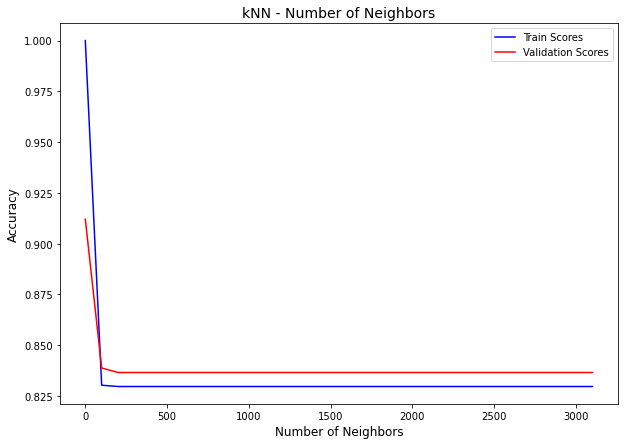

In [850]:
# create empty lists
train_scores = []
validation_scores = []

# instantiate a list of possible values for k
k_values = list(range(1, X_train_scaled.shape[0], 100))

for k in tqdm(k_values):
    
    # instantiate the model
    knn = KNeighborsClassifier(n_neighbors=k)
    
    # fit the model on the train data
    knn.fit(X_train_scaled, y_train)
    
    # score the model on train and validation data
    # append the train and validation scores to their respective lists
    train_scores.append(knn.score(X_train_scaled, y_train))
    validation_scores.append(knn.score(X_validation_scaled, y_validation))

    
# graph presets
plt.figure(figsize=(10, 7))

# graph data
plt.plot(k_values, train_scores, label = 'Train Scores', color = 'blue') # plot training scores
plt.plot(k_values, validation_scores, label = 'Validation Scores', color = 'red') # plot the validation scores

# graph settings
plt.xlabel('Number of Neighbors', fontsize = 12) # define x-axis label
plt.ylabel('Accuracy', fontsize = 12) # define y-axis label
plt.title("kNN - Number of Neighbors", fontsize = 14) # set plot title
plt.legend()

# display graph
plt.show()

From the results above, the range of possible values for 'k' may now be reduced from 1 - 3152 to 1 - 250 given that the scores plateau where the number of neighbors exceeds ~250.

100%|██████████| 10/10 [00:03<00:00,  3.06it/s]


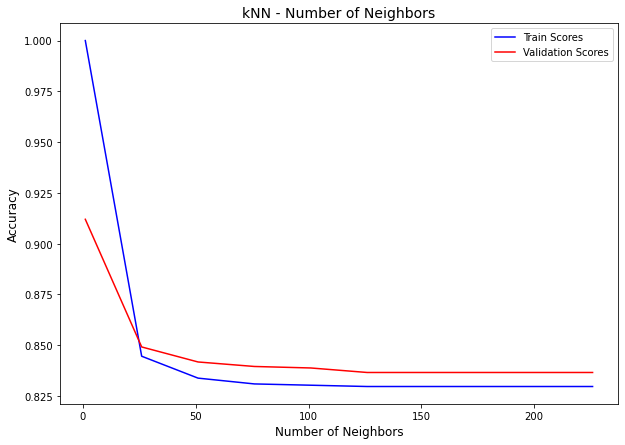

In [851]:
# create empty lists
train_scores = []
validation_scores = []

# set a list of possible values for k
k_values = list(range(1, 251, 25))

for k in tqdm(k_values):
    
    # instantiate the model
    knn = KNeighborsClassifier(n_neighbors=k)
    
    # fit the model
    knn.fit(X_train_scaled, y_train)
    
    # score the model on train and validation data
    # append the results to the empty lists
    train_scores.append(knn.score(X_train_scaled, y_train))
    validation_scores.append(knn.score(X_validation_scaled, y_validation))

    
# graph presets
plt.figure(figsize=(10, 7))

# graph data
plt.plot(k_values, train_scores, label = 'Train Scores', color = 'blue') # plot the train scores
plt.plot(k_values, validation_scores, label = 'Validation Scores', color = 'red') # plot the validation scores

# graph settings
plt.xlabel('Number of Neighbors', fontsize = 12) # set x-axis label
plt.ylabel('Accuracy', fontsize = 12) # set y-axis label
plt.title("kNN - Number of Neighbors", fontsize = 14) # define plot title
plt.legend()

# display graph
plt.show()

Based on the plot above, the range of possible values for `k` is further reduced to 1 through 50:

100%|██████████| 50/50 [00:14<00:00,  3.38it/s]


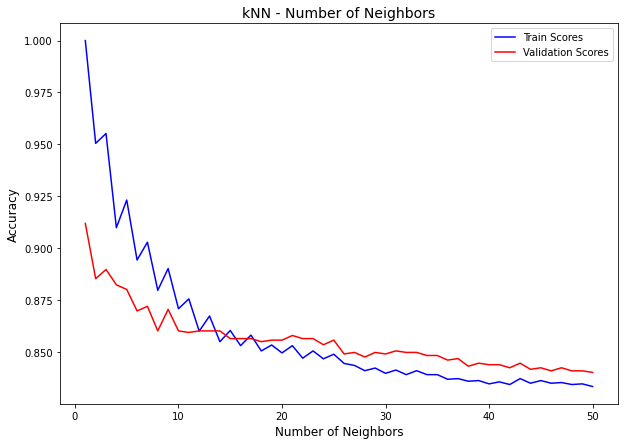

In [852]:
# create empty lists
train_scores = []
validation_scores = []

# set a list of possible values for k
k_values = list(range(1, 51))

for k in tqdm(k_values):
    
    # instantiate the model
    knn = KNeighborsClassifier(n_neighbors=k)
    
    # fit the model
    knn.fit(X_train_scaled, y_train)
    
    # score the model on train and validation data
    train_scores.append(knn.score(X_train_scaled, y_train))
    validation_scores.append(knn.score(X_validation_scaled, y_validation))

    
# graph presets
plt.figure(figsize=(10, 7))

# graph data
plt.plot(k_values, train_scores, label = 'Train Scores', color = 'blue') # plot training scores
plt.plot(k_values, validation_scores, label = 'Validation Scores', color = 'red') # plot validation scores

# graph settings
plt.xlabel('Number of Neighbors', fontsize = 12) # define x-axis label
plt.ylabel('Accuracy', fontsize = 12) # define y-axis label
plt.title("kNN - Number of Neighbors", fontsize = 14) # set plot title
plt.legend()

# display graph
plt.show()

Having reduced the scope of values which 'k' may take on, it appears as though the optimal `n_neighbors` lies between 5 and 20. Although the validation score is highest where `n_neighbors` is equal to 1; the divergence with regards to the model's performance between the train and validation scores indicate that the model is over-fitting to the train data. For this reason, we would not want to set the argument of the `n_neighbors` parameter equal to 1.

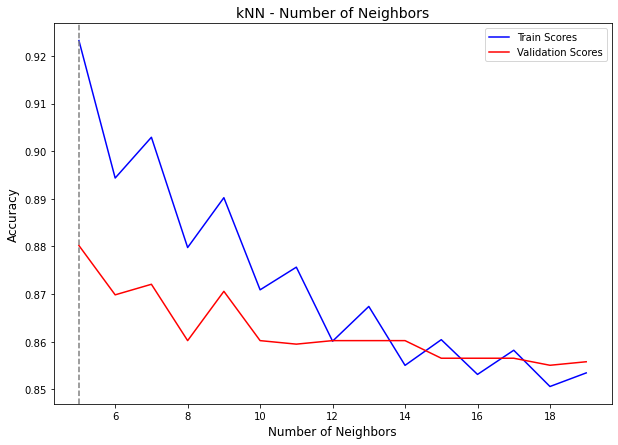

In [853]:
# create empty lists
train_scores = []
validation_scores = []

# set a list of possible values for k
k_values = list(range(5, 20))

for k in k_values:
    
    # instantiate the model
    knn = KNeighborsClassifier(n_neighbors=k)
    
    # fit the model
    knn.fit(X_train_scaled, y_train)
    
    # score the model on train and validation data and append the results to the empty lists
    train_scores.append(knn.score(X_train_scaled, y_train))
    validation_scores.append(knn.score(X_validation_scaled, y_validation))

    
# graph presets
plt.figure(figsize=(10, 7))

# graph data
plt.plot(k_values, train_scores, label = 'Train Scores', color = 'blue') # plot the train scores
plt.plot(k_values, validation_scores, label = 'Validation Scores', color = 'red') # plot the validation scores

# graph settings
plt.xlabel('Number of Neighbors', fontsize = 12) # define x-axis label
plt.axvline(x = k_values[np.argmax(validation_scores)], color = 'grey', linestyle = '--') # include a vertical line where the validation score is highest
plt.ylabel('Accuracy', fontsize = 12) # define y-axis label
plt.title("kNN - Number of Neighbors", fontsize = 14) # set plot title
plt.legend()

# display graph
plt.show()

From the results above, it can be argued that the optimal number of neighbors is 12 (where the train and validation scores are least divergent in comparison to a number of neighbors equal to 5 as identified by graph above).

In [854]:
# return the optimal 'n' number of neighbors
val_score_optimal_n_neighbors = 12

# display the results
f'Optimal number of neighbors using Train / Validation split: {val_score_optimal_n_neighbors}'

'Optimal number of neighbors using Train / Validation split: 12'

From the results above, it can be concluded that the optimal number of neighbors is 12.

4  - Test model on test data

Lastly, a `final_knn` model is instantiated for which the `n_neighbors` parameter is equal to 12. As per the standard operating procedure, the model is fit to the scaled train data from which an estimate of the model's performance may be generated based on the test data set.

In [855]:
# instantiate the model
final_knn = KNeighborsClassifier(n_neighbors = val_score_optimal_n_neighbors)

# fit the model
final_knn.fit(X_train_scaled, y_train)

# score the model on train and test data
print(f'Model Type: K Nearest Neighbor')
print(f'Hyperparameter Tuning: Train - Validation Set')
print(f'Number of Neighbors: {val_score_optimal_n_neighbors}\n')

print(f'Train Accuracy: {(final_knn.score(X_train_scaled, y_train)*100):.2f}%')
print(f'Test Accuracy: {(final_knn.score(X_test_scaled, y_test)*100):.2f}%')

Model Type: K Nearest Neighbor
Hyperparameter Tuning: Train - Validation Set
Number of Neighbors: 12

Train Accuracy: 86.01%
Test Accuracy: 85.17%


The results of which may be stored in a new set of variables, which will be called upon in the subsequent code cells in order to create a model performance comparison table.

In [187]:
# store the results of the kNN model's performance (train and test accuracy):
knn_train_accuracy = round((final_knn.score(X_train_scaled, y_train)*100), 2)
knn_test_accuracy = round((final_knn.score(X_test_scaled, y_test)*100), 2)

#### Cross Validation for Hyperparameter Tuning - Number of Neighbors
---

Although a final result was attained as it relates to the accuracy score on the test set, the iterative process as outlined above has a principle shortfall. The optimal value for `n_neighbors` is founded upon the data which the model is shown based on the train and validation sets; which means that the final value for `n_neighbors` is highly influenced by the data which the model happened to be trained on.

A more robust method of determining the optimal value for 'k' is to use K-Fold Cross Validation. Instead, what cross validation does, is that it divides the dataset into 'k' number of non-overlapping folds. Each fold will then serve as a test set whereas the remaining folds are used as a training set. This results in numerous models being fitted and evaluated to the data rather than a single instance, as had been done above.

In the code cell below, cross validation will be employed for hyperparameter tuning in which we are testing against a range of `k_values`. In implementing cross validation, it is no longer necessary to split the data into train and validation sets since this is already being done iteratively based on the designated number of non-overlapping folds.

In [188]:
# import cross validation
from sklearn.model_selection import cross_val_score

100%|██████████| 50/50 [00:15<00:00,  3.16it/s]


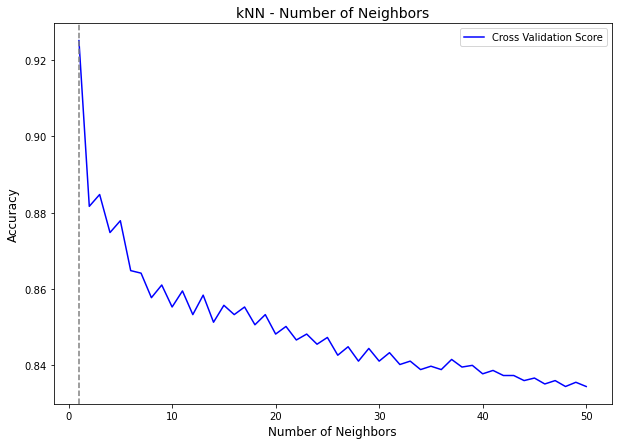

In [189]:
# create empty list
cross_val_scores = []

# set a list of possible values for k
k_values = list(range(1, 51))

for k in tqdm(k_values):
    
    # instantiate the model
    knn = KNeighborsClassifier(n_neighbors=k)
    
    # calculate a cross validation score and append to the empty list
    cv_score = np.mean(cross_val_score(knn, X_remainder_scaled, y_remainder, cv = 5))
    cross_val_scores.append(cv_score)

    
# graph presets
plt.figure(figsize=(10, 7))

# graph data
plt.plot(k_values, cross_val_scores, label="Cross Validation Score", color = 'blue') # plot the cross validation scores

# graph settings
plt.xlabel('Number of Neighbors', fontsize = 12) # set x-axis label
plt.axvline(x = k_values[np.argmax(cross_val_scores)], color = 'grey', linestyle = '--') # include a vertical line at the point where the cross validation score is greatest
plt.ylabel('Accuracy', fontsize = 12) # define y-axis label
plt.title("kNN - Number of Neighbors", fontsize = 14) # set a graph title
plt.legend()

# display graph
plt.show()

In [190]:
# display the optimal 'n' number of neighbors
cv_optimal_n_neighbors = k_values[np.argmax(cross_val_scores)]

f'Optimal number of neighbors using Cross-Validation: {cv_optimal_n_neighbors}'

'Optimal number of neighbors using Cross-Validation: 1'

Having determined the optimal number of neighbors for the kNN model, its performance may be evaluated on the train and test data. Given the result of cross validation, it can be foretold that the model will have over-fit to the train data. This can be attributed to the fact that a `n_neighbors` value of 1 means that for every new point introduced to the model, that its classification will be determined by the point closest to it and inherent the same class.

In [191]:
# instantiate the model
final_knn = KNeighborsClassifier(n_neighbors = cv_optimal_n_neighbors)

# fit the model
final_knn.fit(X_train_scaled, y_train)

# score the model on train and test data
print(f'Model Type: K Nearest Neighbor')
print(f'Hyperparameter Tuning: Cross Validation')
print(f'Number of Neighbors: {k_values[np.argmax(cross_val_scores)]}\n')

print(f'Train Accuracy: {(final_knn.score(X_train_scaled, y_train)*100):.2f}%')
print(f'Test Accuracy: {(final_knn.score(X_test_scaled, y_test)*100):.2f}%')

Model Type: K Nearest Neighbor
Cross-Validation - Number of Neighbors: 1

Train Accuracy: 100.00%
Test Accuracy: 90.59%


Once the model has been re-instantiated based on the cross validation recommended number of neighbors; the model's performance may then be compared against that of the previous kNN model, whose optimal number of neighbors was attained based on the train and validation data.

In [192]:
# store the results of the kNN model using cross validation (train and test accuracy)
knn_cv_train_accuracy = round((final_knn.score(X_train_scaled, y_train)*100), 2)
knn_cv_test_accuracy = round((final_knn.score(X_test_scaled, y_test)*100), 2)

In [193]:
# store the results of both kNN models to a variable ('data')
data = [[val_score_optimal_n_neighbors, cv_optimal_n_neighbors], # number of neighbors: validation vs. cross-validation
        [knn_train_accuracy, knn_cv_train_accuracy], # train accuracy: validation vs. cross-validation
        [knn_test_accuracy, knn_cv_test_accuracy]] # test accuracy: validation vs. cross-validation

# convert data to a dataframe
knn_results_summary = pd.DataFrame(data,
                                   columns = ['Non Cross-Validation', 'Cross-Validation'],
                                   index = ['Number of Neighbors', 'Train Accuracy', 'Test Accuracy'])

# display dataframe
knn_results_summary

,Non Cross-Validation,Cross-Validation
Number of Neighbors,12.00,1.00
Train Accuracy,86.01,100.00
Test Accuracy,85.17,90.59


**Findings: K Nearest Neighbor**

From the results tabulated above, it can be noted that, whilst the model whose hyperparameter settings were determined using Cross-Validation has a higher train and test accuracy score; it can be observed that it has over-fit to a greater extent on the train data in comparison to the 'Non Cross-Validation' model (as determined by the divergence in model performance on the test and train data). 

As such, the 'Non Cross-Validation' kNN model would perform better (in terms of accuracy) were it to be presented with a new set of observations to classify given that it has been able to generalize to a greater extent.

[Back to Top](#back_to_top)

### Decision Trees
<a id="no_sampling_decision_trees"></a>

---

In addition to K Nearest Neighbors, an alternate classification model may be deployed called Decision Trees. This type of model seeks to predict the label of an observation based on a set of rules which are inferred from the features in the dataset. "Rules" in the case of Decision Tree models relate to a set of binary classifiers that allow for the model to separate data points. From the set of rules, the model is able to learn about the features in a particular dataset to then be able to determine the classification of a new observation. 

Unlike kNN models, Decision Trees are not distance based classifiers but instead leverage a network of binary classifiers to arrive at a final classification. As such, it can be argued that the implementation process is simpler given that fewer steps need to be taken in order to instantiate, fit and score the model. With that being said, no consideration needs to be given, when creating a Decision Tree, towards scaling the data. Furthermore, Decision Trees are highly interpretable to such an extent that one can retrace the model's steps when trying to determine the classification methodology which it has developed for a particular dataset.

In order to implement this model, the `DecisionTreeClassifier` must be imported from `sklearn.tree`:

In [194]:
from sklearn.tree import DecisionTreeClassifier

As had been conducted with the kNN model, in which a range of k-values were used to identify at which point the model was most accurate, a similar procedure will be applied towards Decision Trees. However, in this instance, the parameter that will be tuned is known as the `max_depth`. This parameter can be described as the length of the longest path from the root node to a leaf. The greater the depth, the better the model's accuracy will be towards the training set at the expense of accuracy towards the test set. This can be attributed to the fact that as the depth increases, so does the likelihood of the model over-fitting to the training set.

In [198]:
# import the square root module
from math import sqrt

In trying to identify the optimal value for `max_depth`, the `sqrt` module is imported from the `math` package given that the first set of depth values which will be tested for will range from 1 to the square root of the number of observations in the dataset.

#### Train / Validation Split for Hyperparameter Tuning - Max Depth
---

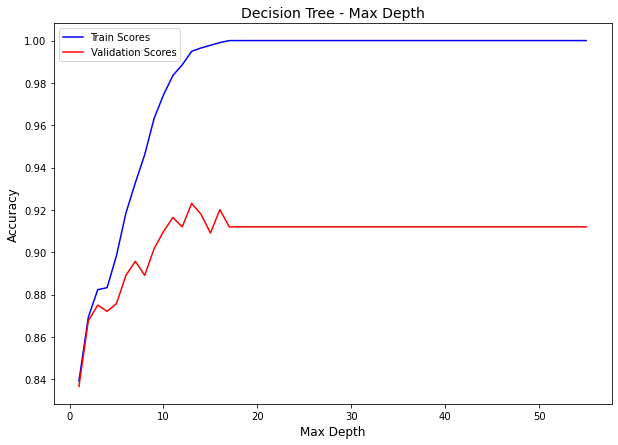

In [199]:
# create empty lists
train_scores = []
validation_scores = []

# set a list of possible max depth values
depth_values = list(range(1, int(np.sqrt(X_train.shape[0]))))


for depth in depth_values:
    
    # instantiate the model
    dt_model = DecisionTreeClassifier(max_depth = depth, random_state = 42)
    
    # fit the model
    dt_model.fit(X_train,y_train)
    
    # score the model on validation and train data and append the results to the empty lists
    train_scores.append(dt_model.score(X_train,y_train))
    validation_scores.append(dt_model.score(X_validation,y_validation))
        
    
# graph presets
plt.figure(figsize=(10, 7))

# graph data
plt.plot(depth_values, train_scores, label='Train Scores', color = 'blue') # plot training scores
plt.plot(depth_values, validation_scores, label='Validation Scores', color = 'red') # plot validation scores

# graph settings
plt.xlabel('Max Depth', fontsize = 12) # define x-axis label
plt.ylabel('Accuracy', fontsize = 12) # set y-axis label
plt.title('Decision Tree - Max Depth', fontsize = 14) # set plot title
plt.legend()

# display graph
plt.show()

From the preliminary attempt at determining the optimal value for `max_depth`, it appears to fall within the range of 1 - 10. Although the highest validation score may be found at a `max_depth` value between 10 and 15, it is evident that at this point the model is over-fitting to the training data.

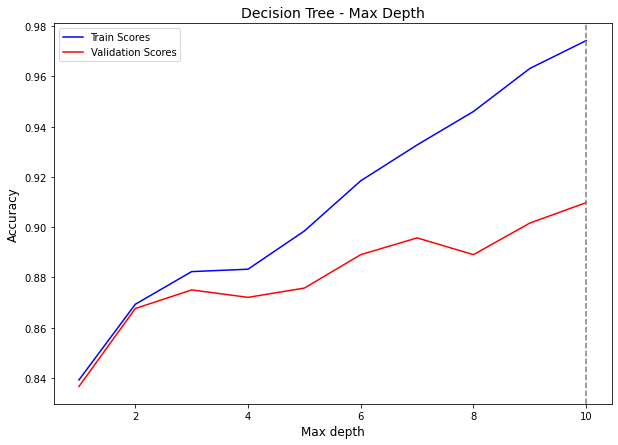

In [200]:
# create empty lists
train_scores = []
validation_scores = []

# set a list of possible max depth values
depth_values = list(range(1, 11))


for depth in depth_values:
    
    # instantiate the model
    dt_model = DecisionTreeClassifier(max_depth = depth, random_state = 42)
    
    # fit the model
    dt_model.fit(X_train,y_train)
    
    # score the model on validation and train data and append the results to the empty lists
    train_scores.append(dt_model.score(X_train,y_train))
    validation_scores.append(dt_model.score(X_validation,y_validation))
        
    
# graph presets
plt.figure(figsize=(10, 7))

# graph data
plt.plot(depth_values, train_scores, label='Train Scores', color = 'blue') # plot train scores
plt.plot(depth_values, validation_scores, label='Validation Scores', color = 'red') # plot validation scores

# graph settings
plt.xlabel('Max depth', fontsize = 12) # define x-axis label
plt.axvline(x = depth_values[np.argmax(validation_scores)], color = 'grey', linestyle = '--') # include a vertical line where validation score is highest
plt.ylabel('Accuracy', fontsize = 12) # define y-axis label
plt.title('Decision Tree - Max Depth', fontsize = 14) # set plot title
plt.legend()

# display graph
plt.show()

Based on the results plotted above, a `max_depth` of 6 can be considered as the optimal depth given that the model's accuracy between the train and validation sets are in close proximity to one another. For any `max_depth` value above 6, the model begins to over-fit, whereby the training accuracy begins to decouple from that of the validation set.

In [201]:
# define the optimal max depth
val_score_optimal_max_depth = 6

# instantiate the model
final_dt = DecisionTreeClassifier(max_depth = val_score_optimal_max_depth, random_state = 42)

# fit the model
final_dt.fit(X_train, y_train)
    
# score the model on train and test data
print(f'Model Type: Decision Tree')
print(f'Hyperparameter Tuning: Train - Validation Set')
print(f"Max Depth: {val_score_optimal_max_depth}\n")

print(f"Train Accuracy: {round((final_dt.score(X_train, y_train))*100, 2)}%")
print(f"Test Accuracy: {round((final_dt.score(X_test, y_test))*100, 2)}%")

Model Type: Decision Tree
Max Depth: 6

Train Accuracy: 91.85%
Test Accuracy: 89.79%


In the following section, the optimal `max_depth` will be determined using cross validation instead of the train and validation sets. As such, the results of the current Decision Tree model are stored within the appropriate variables which are to be called on at a later stage.

In [202]:
# store the model's performance (train and test accuracies)
dt_train_accuracy = round((final_dt.score(X_train, y_train))*100, 2)
dt_test_accuracy = round((final_dt.score(X_test, y_test))*100, 2)

#### Cross Validation for Hyperparameter Tuning - Max Depth
---

In using cross validation for hyperparameter tuning, the 'remainder' data set is to be used in place of the train and validation sets in order calculate the cross validation scores.

100%|██████████| 55/55 [00:03<00:00, 14.16it/s]


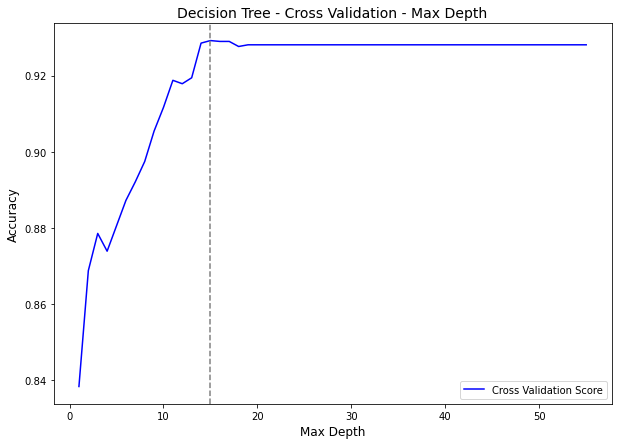

In [203]:
# create empty list
cross_val_scores = []

# set a list of possible max depth values
depth_values = list(range(1, int(np.sqrt(X_train.shape[0]))))


for depth in tqdm(depth_values):
    
    # instantiate the model
    dt_model = DecisionTreeClassifier(max_depth = depth, random_state = 42)
    
    # calculate cross validation scores
    cv_score = np.mean(cross_val_score(dt_model, X_remainder, y_remainder, cv = 5))
    
    # append the scores to the empty list
    cross_val_scores.append(cv_score)
        
    
# graph presets
plt.figure(figsize=(10, 7))

# graph data:
plt.plot(depth_values, cross_val_scores, label="Cross Validation Score", color = 'blue') # plot the cross validation scores

# graph settings
plt.xlabel('Max Depth', fontsize = 12) # set x-axis label
plt.axvline(x = depth_values[np.argmax(cross_val_scores)], color = 'grey', linestyle = '--') # plot a vertical line where cross validation score is highest
plt.ylabel('Accuracy', fontsize = 12) # include y-axis label
plt.title("Decision Tree - Cross Validation - Max Depth", fontsize = 14) # define plot title
plt.legend()

# display graph
plt.show()

From the plot above, the optimal `max_depth` may be determined:

In [204]:
# retrieve max_depth value where cross validation score is greatest
dt_cv_optimal_max_depth = depth_values[np.argmax(cross_val_scores)]

# display optimal max_depth value
f'Optimal max depth using Cross-Validation: {dt_cv_optimal_max_depth}'

'Optimal max depth using Cross-Validation: 15'

In [205]:
# instantiate the model
final_dt = DecisionTreeClassifier(max_depth = dt_cv_optimal_max_depth, random_state = 42)

# fit the model
final_dt.fit(X_train, y_train)
    
# score the model on train and test data
print(f'Model Type: Decision Tree')
print(f'Hyperparameter Tuning: Cross Validation')
print(f'Max Depth: {dt_cv_optimal_max_depth}\n')

print(f'Train Accuracy: {round((final_dt.score(X_train, y_train))*100, 2)}%')
print(f'Test Accuracy: {round((final_dt.score(X_test, y_test))*100, 2)}%')

Model Type: Decision Tree
Cross-Validation - Max Depth: 15
Train Accuracy: 99.78%
Test Accuracy: 92.45%


In [206]:
# store the DT model performance based on cross validation (cv) scores
dt_cv_train_accuracy = round((final_dt.score(X_train, y_train))*100, 2)
dt_cv_test_accuracy = round((final_dt.score(X_test, y_test))*100, 2)

The model's performance may then be compared to that of the previous instance (when using the train and validation sets):

In [207]:
# store the results of both decision tree models to a variable ('data')
data = [[val_score_optimal_max_depth, dt_cv_optimal_max_depth], # max depth: validation vs. cross-validation
        [dt_train_accuracy, dt_cv_train_accuracy], # train accuracy: validation vs. cross-validation
        [dt_test_accuracy, dt_cv_test_accuracy]] # test accuracy: validation vs. cross-validation

# convert data to a dataframe
dt_results_summary = pd.DataFrame(data,
                                  columns = ['Non Cross-Validation', 'Cross-Validation'],
                                  index = ['Max Depth', 'Train Accuracy', 'Test Accuracy'])

# display dataframe
dt_results_summary

,Non Cross-Validation,Cross-Validation
Max Depth,6.00,15.00
Train Accuracy,91.85,99.78
Test Accuracy,89.79,92.45


**Findings: Decision Tree**

Similar to the results of the K Nearest Neighbor model, it can be observed that, whilst the cross-validation model attained higher train and test accuracy scores in comparison to the non cross-validation decision tree model; it has over-fit to the training data to a greater extent given the larger disparity between the train and test scores.

[Back to Top](#back_to_top)

### Support Vector Machines (SVM)
<a id="no_sampling_svm"></a>

---

Following Decision Trees, an alternate set of classifier models are linear and non-linear Support Vector Machines (SVM). The difference between linear and non-linear SVM models is that the 'standard' SVM model creates linear decision boundaries in order to help distinguish between the classes whereas the 'Kernel Trick' allows for the SVM models to create non-linear boundaries. Examples of Support Vector Machines that leverage the 'Kernel Trick' include: radial basis function (RBF), polynomial and sigmoid.

The predominant manner in which SVM models differ from Logistic Regression revolves around the notion that SVMs will seek to generate boundaries between classes whilst maximizing the distance between the decision boundary itself and the points from the training data (also referred to as the 'margin').

In order to apply SVM models, `Support Vector Classification` (SVC) is imported from the `sklearn.svm` module.

In [208]:
# import Support Vector Classification
from sklearn.svm import SVC

#### Data Preprocessing
---

Similar to kNN, SVM models are distance based and as such require the data to be scaled (in this case, by using the `StandardScaler()`).

In order to generate the various Support Vector Machine models, the following set of steps are to be executed for each of the models:

1. Train-Test Split
2. Pre-process 
    1. Fit scaler on train data
    2. Transform train / validation data
    3. Transform test data using the same scaler
3. Train model on scaled train data
4. Test model on scaled validation data
5. Test model on scaled test data

For each of the models, the dependent and independent variables are to be derived from the `customer_df_with_dummies` dataframe.

In seeking to select the appropriate hyperparameter settings, a cost parameter will be introduced (`C`). For large C values, the SVM will fit very closely to the training data and will find a very small margin in favor of making fewer mistake. Which is to say that the model will regularize the data less and trust the model more. Conversely, a small C value indicates that the model will be allowed to pick a wider margin by misclassifying more points. This is to say that the model will regularize the data more and trust the model less.

With that being said, the `validation` set will enable us to test a range of values for `C` and find the optimal hyperparameter settings prior to evaluating a model's performance on the unseen `test` data. In this case, the `validation` set acts as a placeholder for the `test` set. Whereby, we may iteratively tune the hyperparameters. After having been finalized, the model's performance may be evaluated when scored against the test set.

The first SVM model whose performance we are to evaluate is that of a Linear SVM:

#### Linear - SVM
---

1. Train-Test Split

Given that the data has already been instantiated and split into the appropriate remainder, test, train and validation sets; we may proceed with step 2 which is to transform the data such that it is scaled.

2. Pre-process 
    1. Fit scaler on train data
    2. Transform train / validation data
    3. Transform test data using the same scaler

In [212]:
# scale and fit the data
scaler = StandardScaler()
scaler.fit(X_train)

# transform the data
X_train_scaled = scaler.transform(X_train)
X_validation_scaled = scaler.transform(X_validation)
X_test_scaled = scaler.transform(X_test)

3 & 4. Train model on scaled train data / Test model on scaled validation data

#### Train / Validation Split for Hyperparameter Tuning - C Values
---

 50%|█████     | 4/8 [00:00<00:00,  5.90it/s]C:\Users\arnau\anaconda3\envs\capstone\lib\site-packages\sklearn\svm\_base.py:255: ConvergenceWarning:

Solver terminated early (max_iter=100000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.

 62%|██████▎   | 5/8 [00:01<00:01,  2.66it/s]C:\Users\arnau\anaconda3\envs\capstone\lib\site-packages\sklearn\svm\_base.py:255: ConvergenceWarning:

Solver terminated early (max_iter=100000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.

 75%|███████▌  | 6/8 [00:02<00:01,  1.43it/s]C:\Users\arnau\anaconda3\envs\capstone\lib\site-packages\sklearn\svm\_base.py:255: ConvergenceWarning:

Solver terminated early (max_iter=100000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.

 88%|████████▊ | 7/8 [00:03<00:00,  1.12it/s]C:\Users\arnau\anaconda3\envs\capstone\lib\site-packages\sklearn\svm\_base.py:255: ConvergenceWarning:

Solver terminated early (max_iter=100000).  Consider pre

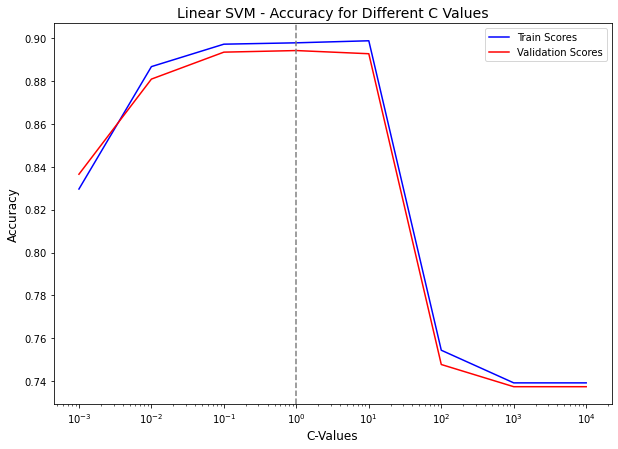

In [213]:
# create empty lists
linear_train_scores = []
linear_validation_scores = []

# set a range of possible c-values
C_values = 10. ** np.arange(-3, 5)

for c in tqdm(C_values):
    
    # instantiate the model
    linear_svm = SVC(C = c, kernel = 'linear', max_iter = 100_000, random_state = 42)
    
    # fit the model
    linear_svm.fit(X_train_scaled, y_train)
    
    # score the model on train and validation data and append the results to the empty lists
    linear_train_scores.append(linear_svm.score(X_train_scaled, y_train))
    linear_validation_scores.append(linear_svm.score(X_validation_scaled, y_validation))

    
    
# graph presets
plt.figure(figsize = (10, 7))

# graph data
plt.plot(C_values, linear_train_scores, c = 'blue', label = 'Train Scores') # plot training scores
plt.plot(C_values, linear_validation_scores, c = 'red', label = 'Validation Scores') # plot validation scores


# graph settings
plt.xscale('log') # set x-axis to a logarithmic scale
plt.xlabel('C-Values', fontsize = 12) # define x-axis label
plt.axvline(x = C_values[np.argmax(linear_validation_scores)], color = 'grey', linestyle = '--') # plot a vertical line where validation score is highest
plt.ylabel('Accuracy', fontsize = 12) # define y-axis label
plt.title("Linear SVM - Accuracy for Different C Values", fontsize = 14) # set plot title
plt.legend()

# display graph
plt.show()

Having fit the linear Support Vector Classification (SVC) model to the scaled train data and after having scored the model on the train and validation data sets; the optimal value for `C` may be retrieved:

In [214]:
# retrieve the optimal value for 'c' for a linear SVM model
val_optimal_linear_c = C_values[np.argmax(linear_validation_scores)]

# print the result
f'Optimal c-value using Train / Validation split: {val_optimal_linear_c}'

'Optimal c-value using Train / Validation split: 1.0'

5. Test model on scaled test data

Once the hyperparameter (`c`) has been confirmed, the model may be scored against the test data:

In [215]:
# instantiate the model
linear_svm = SVC(C = val_optimal_linear_c, 
                 kernel = 'linear', 
                 max_iter = 100_000, 
                 random_state = 42)

# fit the model
linear_svm.fit(X_train_scaled, y_train)

# score the model on train and test data
print(f'Model Type: Linear SVM')
print(f'Hyperparameter Tuning: Train - Validation Set')
print(f'Optimal C-Value: {C_values[np.argmax(linear_validation_scores)]}\n')

print(f'Train Score: {round((linear_svm.score(X_train_scaled,y_train))*100, 2)}%')
print(f'Test Score: {round((linear_svm.score(X_test_scaled,y_test))*100, 2)}%')

Model Type: Linear SVM
Optimal C-Value: 1.0

Train Score: 89.78%
Test Score: 88.99%


The model scores are then to be stored within a set of variables as demonstrated below. The optimal value for `C` will then be determined through the use of cross validation, from which the results will be compared.

In [216]:
# store the model's performance on the train and test data
linear_svm_train_accuracy = round((linear_svm.score(X_train_scaled,y_train))*100, 2)
linear_svm_test_accuracy = round((linear_svm.score(X_test_scaled,y_test))*100, 2)

#### Cross Validation for Hyperparameter Tuning - C Value
---

 12%|█▎        | 1/8 [00:00<00:05,  1.19it/s]C:\Users\arnau\anaconda3\envs\capstone\lib\site-packages\sklearn\svm\_base.py:255: ConvergenceWarning:

Solver terminated early (max_iter=100000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.

 25%|██▌       | 2/8 [00:01<00:05,  1.10it/s]C:\Users\arnau\anaconda3\envs\capstone\lib\site-packages\sklearn\svm\_base.py:255: ConvergenceWarning:

Solver terminated early (max_iter=100000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.

C:\Users\arnau\anaconda3\envs\capstone\lib\site-packages\sklearn\svm\_base.py:255: ConvergenceWarning:

Solver terminated early (max_iter=100000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.

C:\Users\arnau\anaconda3\envs\capstone\lib\site-packages\sklearn\svm\_base.py:255: ConvergenceWarning:

Solver terminated early (max_iter=100000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.

C:\Users\arnau\anaconda3\envs\

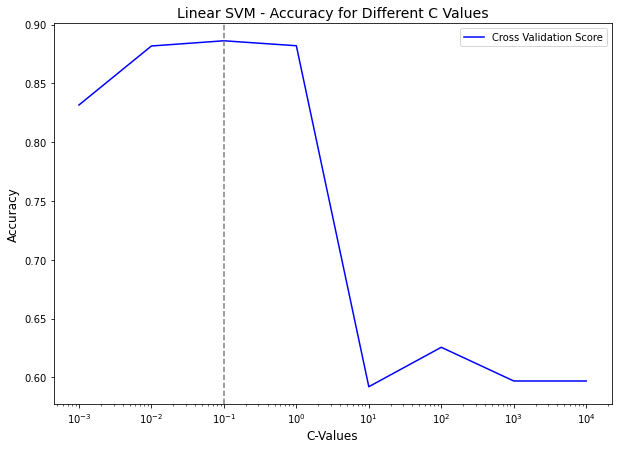

In [217]:
# create empty list
cross_val_scores = []

# set a range of possible values for c
C_values = 10. ** np.arange(-3, 5)

for c in tqdm(C_values):
    
    # instantiate the model
    linear_svm = SVC(C = c, kernel = 'linear', max_iter = 100_000, random_state = 42)
    
    # calculate cross validation score
    cv_score = np.mean(cross_val_score(linear_svm, X_remainder, y_remainder, cv = 5))
    
    # add the scores to the empty list
    cross_val_scores.append(cv_score)

    
    
# graph presets
plt.figure(figsize=(10, 7))

# graph data
plt.plot(C_values, cross_val_scores, label="Cross Validation Score", color = 'blue') # plot the cross validation scores

# graph settings
plt.xscale('log') # set x-axis to logarithmic scale
plt.xlabel('C-Values', fontsize = 12) # set x-axis label
plt.axvline(x = C_values[np.argmax(cross_val_scores)], color = 'grey', linestyle = '--') # plot a vertical line where the validation score is highest
plt.ylabel('Accuracy', fontsize = 12) # set y-axis label
plt.title("Linear SVM - Accuracy for Different C Values", fontsize = 14) # define plot title
plt.legend()

# display graph
plt.show()

The results of which demonstrate that the optimal value for `C` is equal to 0.1:

In [218]:
# retrieve optimal c-value based on cross-validation
cv_optimal_linear_c = C_values[np.argmax(cross_val_scores)]

# print the results
f'Optimal c-value using Cross-Validation: {cv_optimal_linear_c}'

'Optimal c-value using Cross-Validation: 0.1'

Using the Train-Validation method, it had been found that the optimal C-value for a linear Support Vector Machine model was 1.0. However, using cross-validation yields a different result whereby the recommended optimal C-value is 0.1. At this stage, the model's performance may be re-evaluated with a c-value of 0.1.

In [219]:
# instantiate the model
linear_svm = SVC(C = cv_optimal_linear_c, 
                kernel = 'linear', 
                max_iter = 100_000, 
                random_state = 42)

# fit the model
linear_svm.fit(X_train_scaled,y_train)

# score the model on train and test data
print(f'Model Type: Linear SVM')
print(f'Hyperparameter Tuning: Cross Validation')
print(f'Optimal C-value: {C_values[np.argmax(cross_val_scores)]}\n')

print(f'Train Score: {round((linear_svm.score(X_train_scaled,y_train))*100, 2)}%')
print(f'Test Score: {round((linear_svm.score(X_test_scaled,y_test))*100, 2)}%')

Model Type: Linear SVM
Cross Validation - Optimal C-value: 0.1

Train Score: 89.72%
Test Score: 88.99%


The results of which are then stored in a set of variables in order to tabulate the scores in the table below.

In [220]:
# store the model's train and test scores
linear_svm_cv_train_accuracy = round((linear_svm.score(X_train_scaled,y_train))*100, 2)
linear_svm_cv_test_accuracy = round((linear_svm.score(X_test_scaled,y_test))*100, 2)

In [221]:
# store the results of both linear SVM models to a variable ('data')
data = [[val_optimal_linear_c, cv_optimal_linear_c], # optimal value for 'c': non cross-validation vs. cross-validation
        [linear_svm_train_accuracy, linear_svm_cv_train_accuracy], # linear SVM train accuracy: non cross-validation vs. cross-validation
        [linear_svm_test_accuracy, linear_svm_cv_test_accuracy]] # linear SVM test accuracy: non cross-validation vs. cross-validation

# convert data to a dataframe
linear_svm_results_summary = pd.DataFrame(data,
                                          columns = ['Non Cross-Validation', 'Cross-Validation'],
                                          index = ['C Value', 'Train Accuracy', 'Test Accuracy'])
                                        
# display dataframe
linear_svm_results_summary

,Non Cross-Validation,Cross-Validation
C Value,1.00,0.10
Train Accuracy,89.78,89.72
Test Accuracy,88.99,88.99


**Findings: Linear Support Vector Machine**

The linear SVM model is performing equally well across both candidate values for c. This may be explained by the fact that there is a marginal difference in the proposed values for `c` when employing both train / validation sets as well as cross-validation. Given the results, it can also be noted that the models are both robust as they have not over-fit to the training data.

#### Radial Basis Function (RBF) - SVM
---

Though the linear SVM model performed well on the train and test data, it is not the only type of Support Vector Machine model that is at our disposal. An alternate model, also known as the Radial Basis Function (or RBF) may be utilized and applied to the dataset. From which, the model's performance may be compared to that of a linear SVM.

As had been conducted for the linear model, the ideal value for `c` may be ascertained through the use of both the train and validation sets alongside K-Fold Cross-Validation. In the following code cells, we will seek to identify the optimal value for `c` from which the model's performance may be evaluated.

#### Train / Validation Split for Hyperparameter Tuning - C Value
---

100%|██████████| 8/8 [00:02<00:00,  2.68it/s]


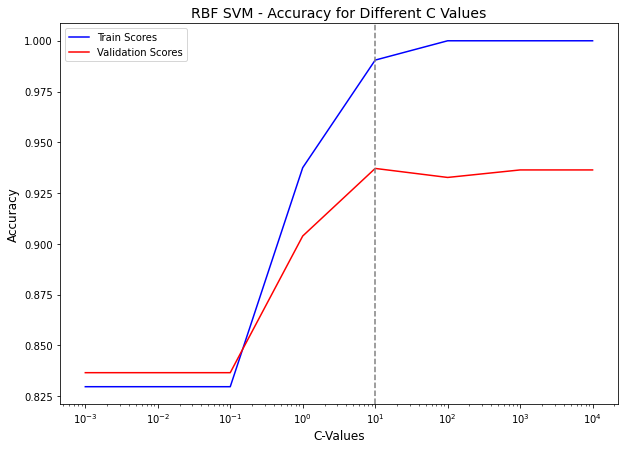

In [222]:
# create empty lists
rbf_train_scores = []
rbf_validation_scores = []

# set a range of possible c-values
C_values = 10. ** np.arange(-3, 5)

for c in tqdm(C_values):
    
    # instantiate the model
    rbf_svm = SVC(C = c, kernel = 'rbf', max_iter = 100_000, random_state = 42)
    
    # fit the model
    rbf_svm.fit(X_train_scaled,y_train)
    
    # score the model on train and validation data...
    # ...and append the scores to the respective lists
    rbf_train_scores.append(rbf_svm.score(X_train_scaled,y_train))
    rbf_validation_scores.append(rbf_svm.score(X_validation_scaled,y_validation))
    
    
# graph presets
plt.figure(figsize=(10, 7))

# graph data
plt.plot(C_values, rbf_train_scores, c = 'blue', label = 'Train Scores') # plot the train scores
plt.plot(C_values, rbf_validation_scores, c = 'red', label = 'Validation Scores') # plot the validation scores


# graph settings
plt.xscale('log') # set the x-axis to a logarithmic scale
plt.xlabel('C-Values', fontsize = 12) # define the x-axis label
plt.axvline(x = C_values[np.argmax(rbf_validation_scores)], color = 'grey', linestyle = '--') # add a vertical line where the validation score is highest
plt.ylabel('Accuracy', fontsize = 12) # define y-axis label
plt.title("RBF SVM - Accuracy for Different C Values", fontsize = 14) # set plot title
plt.legend()

# display graph
plt.show()

From the results above, although the validation score is greatest where the `c-value` is equal to 10; we can observe that the model is over-fitting to the training data. Therefore, it may be argued that the optimal value for `c` could be 1 where the model's performance between the train and validation sets are in closer proximity to one another.

In [223]:
# set the optimal value for c
val_optimal_rbf_c = 1

5. Test model on scaled test data

Having determined the optimal value for `c`, the model may now be instantiated and fit to the scaled training data:

In [224]:
# instantiate the model
rbf_svm = SVC(C = val_optimal_rbf_c, 
              kernel = 'rbf', 
              max_iter = 100_000, 
              random_state = 42)

# fit the model
rbf_svm.fit(X_train_scaled, y_train)

# score the model on train and test data
print(f'Model Type: RBF SVM')
print(f'Hyperparameter Tuning: Train - Validation Set')
print(f'Optimal C-Value: {val_optimal_rbf_c}\n')

print(f'Train Score: {round((rbf_svm.score(X_train_scaled, y_train))*100, 2)}%')
print(f'Test Score: {round((rbf_svm.score(X_test_scaled, y_test))*100, 2)}%')

Model Type: RBF SVM
Optimal C-Value: 1

Train Score: 93.75%
Test Score: 90.76%


In [225]:
# store the model's train and test scores
rbf_svm_train_accuracy = round((rbf_svm.score(X_train_scaled, y_train))*100, 2)
rbf_svm_test_accuracy = round((rbf_svm.score(X_test_scaled, y_test))*100, 2)

#### Cross-Validation for Hyperparameter Tuning - C Value
---

Undergoing the same procedure as above, cross validation will be employed in order to determine an optimal value for `c`:

 54%|█████▍    | 7/13 [00:06<00:06,  1.06s/it]C:\Users\arnau\anaconda3\envs\capstone\lib\site-packages\sklearn\svm\_base.py:255: ConvergenceWarning:

Solver terminated early (max_iter=100000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.

C:\Users\arnau\anaconda3\envs\capstone\lib\site-packages\sklearn\svm\_base.py:255: ConvergenceWarning:

Solver terminated early (max_iter=100000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.

C:\Users\arnau\anaconda3\envs\capstone\lib\site-packages\sklearn\svm\_base.py:255: ConvergenceWarning:

Solver terminated early (max_iter=100000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.

C:\Users\arnau\anaconda3\envs\capstone\lib\site-packages\sklearn\svm\_base.py:255: ConvergenceWarning:

Solver terminated early (max_iter=100000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.

C:\Users\arnau\anaconda3\envs\capstone\lib\site-packages\sklearn\svm\_base

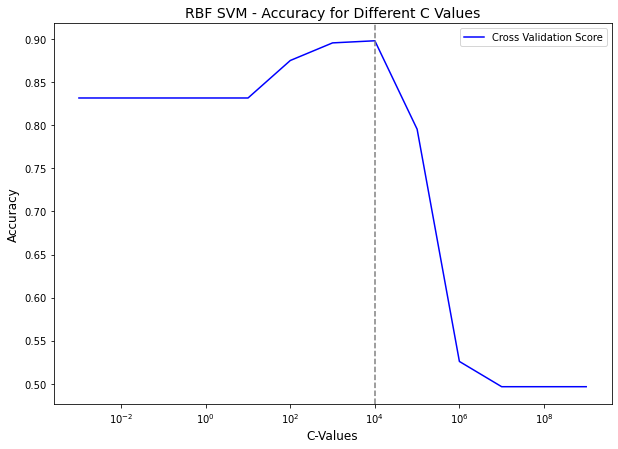

In [226]:
# create empty list
cross_val_scores = []

# set a range of possible c-values
C_values = 10. ** np.arange(-3, 10)

for c in tqdm(C_values):
    
    # instantiate the model
    rbf_svm = SVC(C = c, kernel = 'rbf', max_iter = 100_000, random_state = 42)
    
    # calculate the cross validation scores 
    cv_score = np.mean(cross_val_score(rbf_svm, X_remainder, y_remainder, cv = 5))
    
    # append the scores to the empty list
    cross_val_scores.append(cv_score)

    
    
# graph presets
plt.figure(figsize=(10, 7))

# graph data
plt.plot(C_values, cross_val_scores, label = "Cross Validation Score", color = 'blue') # plot the cross validation scores

# graph settings
plt.xscale('log') # set the x-axis scale to logarithmic
plt.xlabel('C-Values', fontsize = 12) # define x-axis label
plt.axvline(x = C_values[np.argmax(cross_val_scores)], color = 'grey', linestyle = '--') # plot a vertical line where the cross validation score is highest
plt.ylabel('Accuracy', fontsize = 12) # set y-axis label
plt.title("RBF SVM - Accuracy for Different C Values", fontsize = 14) # define plot title
plt.legend()

# display graph
plt.show()

In [227]:
# determine the optimal c-value
cv_optimal_rbf_c = C_values[np.argmax(cross_val_scores)]

# print the result
f'Optimal c-value using Cross-Validation: {cv_optimal_rbf_c:,}'

'Optimal c-value using Cross-Validation: 10,000.0'

The model may then be instantiated, fit and scored based on the hyperparameter setting designated above.

In [228]:
# instantiate the model
rbf_svm = SVC(C = cv_optimal_rbf_c, 
              kernel = 'rbf', 
              max_iter = 100_000, 
              random_state = 42)

# fit the model
rbf_svm.fit(X_train_scaled, y_train)

# score the model on train and test data
print(f'Model Type: RBF SVM')
print(f'Hyperparameter Tuning: Cross Validation')
print(f'Optimal C-value: {cv_optimal_rbf_c:,}\n')

print(f'Train Score: {round((rbf_svm.score(X_train_scaled, y_train))*100, 2)}%')
print(f'Test Score: {round((rbf_svm.score(X_test_scaled, y_test))*100, 2)}%')

Model Type: RBF SVM
Cross Validation - Optimal C-value: 10,000.0

Train Score: 100.0%
Test Score: 94.05%


The results of which are then compared to the performance of the previous RBF SVM model whose c-value was determined through the use of the train and validation sets.

In [229]:
# store the model's performance (train and test accuracies)
rbf_svm_cv_train_accuracy = round((rbf_svm.score(X_train_scaled,y_train))*100, 2)
rbf_svm_cv_test_accuracy = round((rbf_svm.score(X_test_scaled,y_test))*100, 2)

In [230]:
# store the results of both RBF SVM models to a variable ('data')
data = [[val_optimal_rbf_c, cv_optimal_rbf_c], # optimal value for 'c': non cross-validation vs. cross-validation
        [rbf_svm_train_accuracy, rbf_svm_cv_train_accuracy], # RBF SVM train accuracy: non cross-validation vs. cross-validation
        [rbf_svm_test_accuracy, rbf_svm_cv_test_accuracy]] # RBF SVM test accuracy: non cross-validation vs. cross-validation

# convert data to a dataframe
rbf_svm_results_summary = pd.DataFrame(data,
                                       columns = ['Non Cross-Validation', 'Cross-Validation'],
                                       index = ['C Value', 'Train Accuracy', 'Test Accuracy'])
                                       
# display dataframe
rbf_svm_results_summary

,Non Cross-Validation,Cross-Validation
C Value,1.00,10000.00
Train Accuracy,93.75,100.00
Test Accuracy,90.76,94.05


**Findings: RBF Support Vector Machine**

Based on the results listed above, it has been found that an optimal value for `c` of 1, based on the train and validation datasets provided a more robust model. Looking at the results of the cross validation model, there is a noticeable divergence between its performance on the train and test data, whereby the model has over-fit to the training data. As such, it can be concluded that the non cross validation RBF model would perform better when presented with new unseen data in comparison to that of the cross validation model since it has been able to generalize to a greater extent.

#### Polynomial - SVM
---

Of the four types of Support Vector Machine models that exist, the following section will evaluate the performance of a polynomial SVM. Leveraging the same set of procedures as had been used for the previous models, hyperparameter tuning may be conducted with the use of both train / validation data sets and cross validation.

#### Train / Validation Split for Hyperparameter Tuning - C Value
---

100%|██████████| 8/8 [00:01<00:00,  6.05it/s]


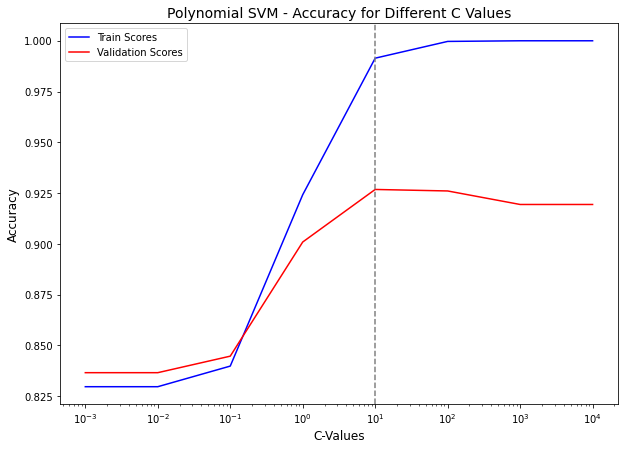

In [231]:
# create empty lists
poly_train_scores = []
poly_validation_scores = []

# set a range of possible c-values
C_values = 10. ** np.arange(-3, 5)

for c in tqdm(C_values):
    
    # instantiate the model
    poly_svm = SVC(C = c, kernel = 'poly', max_iter = 100_000, random_state = 42)
    
    # fit the model
    poly_svm.fit(X_train_scaled,y_train)
    
    # score the model on train and validation data and append the results to the empty lists
    poly_train_scores.append(poly_svm.score(X_train_scaled,y_train))
    poly_validation_scores.append(poly_svm.score(X_validation_scaled,y_validation))
    
    
# graph presets
plt.figure(figsize=(10, 7))

# graph data
plt.plot(C_values, poly_train_scores, c='blue', label='Train Scores') # plot the train scores
plt.plot(C_values, poly_validation_scores, c='red', label='Validation Scores') # plot the validation scores


# graph settings
plt.xscale('log') # set the x-axis to a logarithmic scale
plt.xlabel('C-Values', fontsize = 12) # define x-axis label
plt.axvline(x = C_values[np.argmax(poly_validation_scores)], color = 'grey', linestyle = '--') # add a vertical line where the validation score is highest
plt.ylabel('Accuracy', fontsize = 12) # define y-axis label
plt.title("Polynomial SVM - Accuracy for Different C Values", fontsize = 14) # define a plot title
plt.legend()

# display graph
plt.show()

From the train and validation scores above, although a c-value of 10 results in the highest validation score, the model is overfitting to the training data based on the divergence in scores between train and validation. As such, it may be best to proceed with a c-value of 1.

In [232]:
# define optimal value for c for polynomial SVM
val_optimal_poly_c = 1

5. Test model on scaled test data

In [233]:
# instantiate the model
poly_svm = SVC(C = val_optimal_poly_c, 
               kernel = 'poly', 
               max_iter = 100_000, 
               random_state = 42)

# fit the model
poly_svm.fit(X_train_scaled, y_train)

# score the model on train and test data
print(f'Model Type: Polynomial SVM')
print(f'Hyperparameter Tuning: Train - Validation Set')
print(f'Optimal C-Value: {val_optimal_poly_c}\n')

print(f'Train Accuracy: {round((poly_svm.score(X_train_scaled, y_train))*100, 2)}%')
print(f'Test Accuracy: {round((poly_svm.score(X_test_scaled, y_test))*100, 2)}%')

Model Type: Polynomial SVM
Optimal C-Value: 1

Train Accuracy: 92.42%
Test Accuracy: 90.23%


In [234]:
# store the model's performance (train and test accuracies)
poly_svm_train_accuracy = round((poly_svm.score(X_train_scaled,y_train))*100, 2)
poly_svm_test_accuracy = round((poly_svm.score(X_test_scaled,y_test))*100, 2)

Having scored the Polynomial SVM using the hyperparameter settings as defined by the train / validation sets; cross validation will be used in the following code cell to generate a recommended setting for the model's hyperparameter.

#### Cross-Validation for Hyperparameter Tuning - C Value
---

 38%|███▊      | 5/13 [00:04<00:07,  1.09it/s]C:\Users\arnau\anaconda3\envs\capstone\lib\site-packages\sklearn\svm\_base.py:255: ConvergenceWarning:

Solver terminated early (max_iter=100000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.

C:\Users\arnau\anaconda3\envs\capstone\lib\site-packages\sklearn\svm\_base.py:255: ConvergenceWarning:

Solver terminated early (max_iter=100000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.

C:\Users\arnau\anaconda3\envs\capstone\lib\site-packages\sklearn\svm\_base.py:255: ConvergenceWarning:

Solver terminated early (max_iter=100000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.

C:\Users\arnau\anaconda3\envs\capstone\lib\site-packages\sklearn\svm\_base.py:255: ConvergenceWarning:

Solver terminated early (max_iter=100000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.

C:\Users\arnau\anaconda3\envs\capstone\lib\site-packages\sklearn\svm\_base

C:\Users\arnau\anaconda3\envs\capstone\lib\site-packages\sklearn\svm\_base.py:255: ConvergenceWarning:

Solver terminated early (max_iter=100000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.

C:\Users\arnau\anaconda3\envs\capstone\lib\site-packages\sklearn\svm\_base.py:255: ConvergenceWarning:

Solver terminated early (max_iter=100000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.

C:\Users\arnau\anaconda3\envs\capstone\lib\site-packages\sklearn\svm\_base.py:255: ConvergenceWarning:

Solver terminated early (max_iter=100000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.

C:\Users\arnau\anaconda3\envs\capstone\lib\site-packages\sklearn\svm\_base.py:255: ConvergenceWarning:

Solver terminated early (max_iter=100000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.

100%|██████████| 13/13 [00:33<00:00,  2.56s/it]


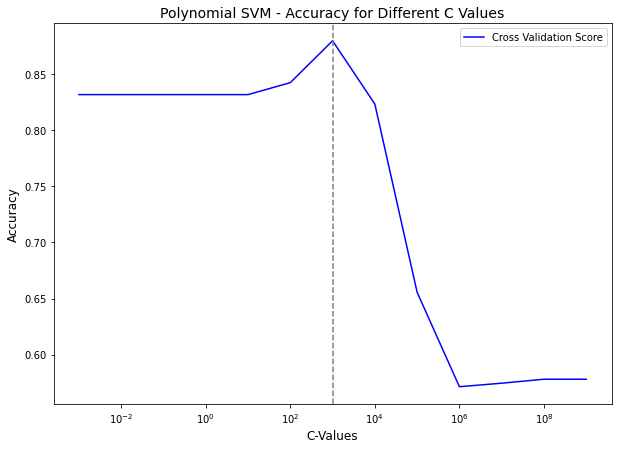

In [235]:
# create empty list
cross_val_scores = []

# set a range of possible c-values
C_values = 10. ** np.arange(-3, 10)

for c in tqdm(C_values):
    
    # instantiate the model
    poly_svm = SVC(C = c, kernel = 'poly', max_iter = 100_000, random_state = 42)
    
    # calculate the cross validation scores and append them to the empty list
    cv_score = np.mean(cross_val_score(poly_svm, X_remainder, y_remainder, cv = 5))
    cross_val_scores.append(cv_score)

    
# graph presets
plt.figure(figsize=(10, 7))

# graph data
plt.plot(C_values, cross_val_scores, label="Cross Validation Score", color = 'blue') # plot the cross validation scores

# graph settings
plt.xscale('log') # set the x-axis to a logarithmic scale
plt.xlabel('C-Values', fontsize = 12) # define an x-axis label
plt.axvline(x = C_values[np.argmax(cross_val_scores)], color = 'grey', linestyle = '--') # plot a vertical line where the cross validation score is highest
plt.ylabel('Accuracy', fontsize = 12) # set a y-axis label
plt.title("Polynomial SVM - Accuracy for Different C Values", fontsize = 14) # include a plot title
plt.legend()

# display graph
plt.show()

In [236]:
# retrieve the optimal value for c
cv_optimal_poly_c = C_values[np.argmax(cross_val_scores)]

# display the result
f'Optimal c-value using Cross-Validation: {cv_optimal_poly_c:,}'

'Optimal c-value using Cross-Validation: 1,000.0'

With the optimal value for `c` having been defined, the model is re-instantiated, fit and scored:

In [237]:
# instantiate the model
poly_svm = SVC(C = cv_optimal_poly_c, 
               kernel = 'poly', 
               max_iter = 100_000, 
               random_state = 42)

# fit the model
poly_svm.fit(X_train_scaled, y_train)

# score the model on train and test data
print(f'Model Type: Polynomial SVM')
print(f'Hyperparameter Tuning: Cross Validation')
print(f'Optimal C-value: {cv_optimal_poly_c:,}\n')

print(f'Train Accuracy: {round((poly_svm.score(X_train_scaled, y_train))*100, 2)}%')
print(f'Test Accuracy: {round((poly_svm.score(X_test_scaled, y_test))*100, 2)}%')

Model Type: Polynomial SVM
Cross Validation - Optimal C-value: 1,000.0

Train Accuracy: 100.0%
Test Accuracy: 92.54%


In [238]:
# save the model's train and test accuracy results in a set of variables
poly_svm_cv_train_accuracy = round((poly_svm.score(X_train_scaled,y_train))*100, 2)
poly_svm_cv_test_accuracy = round((poly_svm.score(X_test_scaled,y_test))*100, 2)

From which, we may compare the results of both polynomial SVM models:

In [239]:
# store the results of both polynomial SVM models to a variable ('data')
data = [[val_optimal_poly_c, cv_optimal_poly_c], # optimal value for 'c': non cross-validation vs. cross-validation
        [poly_svm_train_accuracy, poly_svm_cv_train_accuracy], # polynomial SVM train accuracy: non cross-validation vs. cross-validation
        [poly_svm_test_accuracy, poly_svm_cv_test_accuracy]] # polynomial SVM test accuracy: non cross-validation vs. cross-validation

# convert data to a dataframe
poly_svm_results_summary = pd.DataFrame(data,
                                        columns = ['Non Cross-Validation', 'Cross-Validation'],
                                        index = ['C Value', 'Train Accuracy', 'Test Accuracy'])

# display dataframe
poly_svm_results_summary

,Non Cross-Validation,Cross-Validation
C Value,1.00,1000.00
Train Accuracy,92.42,100.00
Test Accuracy,90.23,92.54


**Findings: Polynomial Support Vector Machine**

As has been found with the prior SVM models, the non cross validation models appear to be more robust given that they do not over-fit to the training data in comparison to the cross validation SVM models. From this, it can be concluded that the optimal c-value for the polynomial SVM model is equal to 1.

#### Sigmoid - SVM
---

Lastly, the sigmoid kernel is the final option of the four which are at our disposal. Following the same set of procedures as the previous SVM models, we will seek to determine the optimal value for `c` through the use of both a train / validation split alongside cross validation.

#### Train / Validation Split for Hyperparameter Tuning - C Value
---

100%|██████████| 8/8 [00:01<00:00,  5.72it/s]


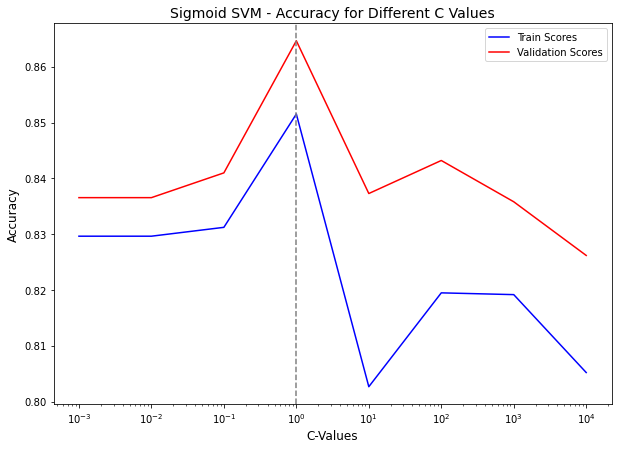

In [240]:
# create empty lists
sigmoid_train_scores = []
sigmoid_validation_scores = []

# set a range of possible c-values
C_values = 10. ** np.arange(-3, 5)

for c in tqdm(C_values):
    
    # instantiate the model
    sigmoid_svm = SVC(C = c, kernel = 'sigmoid', max_iter = 100_000, random_state = 42)
    
    # fit the model
    sigmoid_svm.fit(X_train_scaled,y_train)
    
    # score the model on train and validation data and append the results to the empty lists
    sigmoid_train_scores.append(sigmoid_svm.score(X_train_scaled,y_train))
    sigmoid_validation_scores.append(sigmoid_svm.score(X_validation_scaled,y_validation))
    
    
# graph presets
plt.figure(figsize=(10, 7))

# graph data
plt.plot(C_values, sigmoid_train_scores, c='blue', label='Train Scores') # plot the train scores
plt.plot(C_values, sigmoid_validation_scores, c='red', label='Validation Scores') # plot the validation scores


# graph settings
plt.xscale('log') # change the x-axis scale to logarithmic
plt.xlabel('C-Values', fontsize = 12) # define a label for the x-axis
plt.axvline(x = C_values[np.argmax(sigmoid_validation_scores)], color = 'grey', linestyle = '--') # plot a vertical line where the validation score is highest
plt.ylabel('Accuracy', fontsize = 12) # define a y-axis label
plt.title("Sigmoid SVM - Accuracy for Different C Values", fontsize = 14) # set a plot title
plt.legend()

# display graph
plt.show()

From the graph above, it can be noted that the optimal suggested value for `c` is equal to 1.

In [241]:
# identify and store the optimal value for c
val_optimal_sigmoid_c = C_values[np.argmax(sigmoid_validation_scores)]

# display the results
f'Optimal c-value using Train / Validation split: {val_optimal_sigmoid_c}'

'Optimal c-value using Train / Validation split: 1.0'

5. Test model on scaled test data

At this stage, the model's performance can be determined when scored to the train and test sets:

In [242]:
# instantiate the model
sigmoid_svm = SVC(C = val_optimal_sigmoid_c, 
                  kernel = 'sigmoid', 
                  max_iter = 100_000, 
                  random_state = 42)

# fit the model
sigmoid_svm.fit(X_train_scaled,y_train)

# score the model on train and test data
print(f'Model Type: Sigmoid SVM')
print(f'Hyperparameter Tuning: Train - Validation Set')
print(f'Optimal C-Value: {val_optimal_sigmoid_c}\n')

print(f'Train Accuracy: {round((sigmoid_svm.score(X_train_scaled,y_train))*100, 2)}%')
print(f'Test Accuracy: {round((sigmoid_svm.score(X_test_scaled,y_test))*100, 2)}%')

Model Type: Sigmoid SVM
Optimal C-Value: 1.0
Train Accuracy: 85.15%
Test Accuracy: 85.61%


In [243]:
# store the model's train and test accuracies
sigmoid_svm_train_accuracy = round((sigmoid_svm.score(X_train_scaled,y_train))*100, 2)
sigmoid_svm_test_accuracy = round((sigmoid_svm.score(X_test_scaled,y_test))*100, 2)

Lastly, we will use cross validation as a means of identifying the potential optimal value for `c`:

#### Cross-Validation for Hyperparameter Tuning - C Value
---

100%|██████████| 8/8 [00:05<00:00,  1.47it/s]


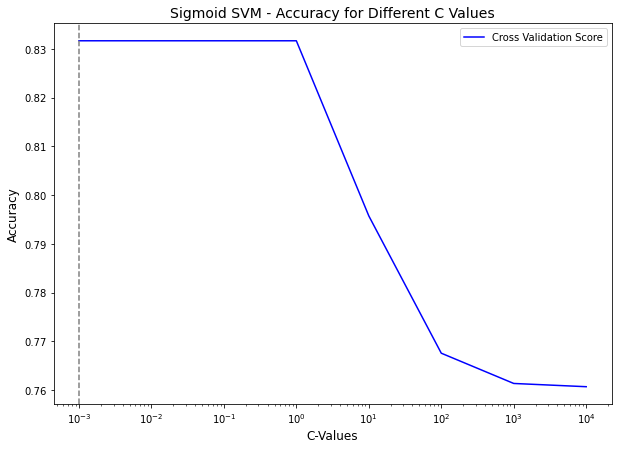

In [244]:
# create empty list
cross_val_scores = []

# set a range of possible values for 'c'
C_values = 10. ** np.arange(-3, 5)

for c in tqdm(C_values):
    
    # instantiate the model
    sigmoid_svm = SVC(C = c, kernel = 'sigmoid', max_iter = 100_000, random_state = 42)
    
    # calculate the cross validation scores...
    cv_score = np.mean(cross_val_score(sigmoid_svm, X_remainder, y_remainder, cv = 5))
    
    # ...append the results to the empty list
    cross_val_scores.append(cv_score)

    
    
# graph presets
plt.figure(figsize=(10, 7))

# graph data
plt.plot(C_values, cross_val_scores, label = "Cross Validation Score", color = 'blue') # plot the cross validation scores

# graph settings
plt.xscale('log') # set the x-axis scale to logarithmic
plt.xlabel('C-Values', fontsize = 12) # define x-axis label
plt.axvline(x = C_values[np.argmax(cross_val_scores)], color = 'grey', linestyle = '--') # plot a vertical line where the cross validation score is highest
plt.ylabel('Accuracy', fontsize = 12) # define y-axis label
plt.title("Sigmoid SVM - Accuracy for Different C Values", fontsize = 14) # define a plot title
plt.legend()

# display graph
plt.show()

In [245]:
# retrieve the optimal value for c
cv_optimal_sigmoid_c = C_values[np.argmax(cross_val_scores)]

# display the results
f'Optimal c-value using Cross-Validation: {cv_optimal_sigmoid_c}'

'Optimal c-value using Cross-Validation: 0.001'

Having defined the optimal value for `c` based on the cross validation scores, the model may now be re-instantiated given the new hyperparameter value:

In [246]:
# instantiate the model
sigmoid_svm = SVC(C = cv_optimal_sigmoid_c, 
                  kernel = 'sigmoid', 
                  max_iter = 100_000, 
                  random_state = 42)

# fit the model
sigmoid_svm.fit(X_train_scaled, y_train)

# score the model on train and test data
print(f'Model Type: Sigmoid SVM')
print(f'Hyperparameter Tuning: Cross Validation')
print(f'Optimal C-value: {cv_optimal_sigmoid_c}\n')

print(f'Train Accuracy: {round((sigmoid_svm.score(X_train_scaled, y_train))*100, 2)}%')
print(f'Test Accuracy: {round((sigmoid_svm.score(X_test_scaled, y_test))*100, 2)}%')

Model Type: Sigmoid SVM
Cross Validation - Optimal C-value: 0.001

Train Accuracy: 82.96%
Test Accuracy: 83.13%


In [247]:
# save the model train and test accuracies to their respective variables
sigmoid_svm_cv_train_accuracy = round((sigmoid_svm.score(X_train_scaled,y_train))*100, 2)
sigmoid_svm_cv_test_accuracy = round((sigmoid_svm.score(X_test_scaled,y_test))*100, 2)

In [248]:
# store the results of both sigmoid SVM models to a variable ('data')
data = [[val_optimal_sigmoid_c, cv_optimal_sigmoid_c], # optimal value for 'c': non cross-validation vs. cross-validation
        [sigmoid_svm_train_accuracy, sigmoid_svm_cv_train_accuracy], # sigmoid SVM train accuracy: non cross-validation vs. cross-validation
        [sigmoid_svm_test_accuracy, sigmoid_svm_cv_test_accuracy]] # sigmoid SVM test accuracy: non cross-validation vs. cross-validation

# convert data to a dataframe
sigmoid_svm_results_summary = pd.DataFrame(data,
                                           columns = ['Non Cross-Validation', 'Cross-Validation'],
                                           index = ['C Value', 'Train Accuracy', 'Test Accuracy'])

# display dataframe
sigmoid_svm_results_summary

,Non Cross-Validation,Cross-Validation
C Value,1.00,0.001
Train Accuracy,85.15,82.960
Test Accuracy,85.61,83.130


**Findings: Sigmoid Support Vector Machine**

In the case of the sigmoid SVM model, it can be noted that the performance of the non cross-validation model exceeds that of the cross-validation model in both train and test accuracies. As such, it can be concluded that the optimal value for `c` as it relates to the sigmoid SVM is equal to 1.

#### Machine Learning Pipeline - Support Vector Machine
---

Having created four Support Vector Machine models through the use of linear, RBF, polynomial and sigmoid kernels; a machine learning pipeline may be used in order to help determine which model is capable of attaining the highest performance (defined as accuracy).

In [249]:
# import the requisite packages
from sklearn.pipeline import Pipeline
from sklearn import svm
from sklearn.model_selection import GridSearchCV

In [253]:
# provide a list of tuples to the estimator
estimators = [('normalize', StandardScaler()),
              ('svm', svm.SVC(max_iter = 100_000, random_state = 42))]

# instantiate a pipeline
pipe = Pipeline(estimators)

Based on the results of the preceeding Support Vector Machine models, it had been found that the optimal C-value ranges from -0.001 to 10,000. As such, the range of values for `c` may be reduced to that which we wish to test for in the machine learning pipeline.

In [254]:
# define a set of parameters
# in this case the kernel type and range of values for 'c'

parameters = {'svm__kernel': ['linear', 'rbf', 'poly', 'sigmoid'],
              'svm__C': 10. ** np.arange(-3, 4)}

Using `GridSearchCV`, we can then search over multiple parameters in a model to test all of the possible combinations of hyper-parameters to see which will result in the best score.

In [255]:
# instantiate a grid search using the estimators and parameters define above
grid = GridSearchCV(estimator = pipe, param_grid = parameters)

In [256]:
# fit the model
grid.fit(X_train_scaled, y_train);

C:\Users\arnau\anaconda3\envs\capstone\lib\site-packages\sklearn\svm\_base.py:255: ConvergenceWarning:

Solver terminated early (max_iter=100000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.

C:\Users\arnau\anaconda3\envs\capstone\lib\site-packages\sklearn\svm\_base.py:255: ConvergenceWarning:

Solver terminated early (max_iter=100000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.

C:\Users\arnau\anaconda3\envs\capstone\lib\site-packages\sklearn\svm\_base.py:255: ConvergenceWarning:

Solver terminated early (max_iter=100000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.

C:\Users\arnau\anaconda3\envs\capstone\lib\site-packages\sklearn\svm\_base.py:255: ConvergenceWarning:

Solver terminated early (max_iter=100000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.

C:\Users\arnau\anaconda3\envs\capstone\lib\site-packages\sklearn\svm\_base.py:255: ConvergenceWarning:

Solver terminate

In [257]:
# determine which hyper-parameter settings result in the best model
grid.best_params_

{'svm__C': 10.0, 'svm__kernel': 'rbf'}

Using the `.best_params_` method, we can determine which parameters lead to the best performing model (as defined by accuracy). In this case, it has been found that an RBF SVM model with a `c` value of 10 is the combination of parameters that yields the best results. Following these findings, we may test the model's performance:

In [258]:
# retrieve the model accuracy for the train and test set
print(f"ML Pipeline: Support Vector Machines\n")

print(f"SVM Kernel: {list(grid.best_params_.items())[1][1]}")
print(f"C-Value: {list(grid.best_params_.items())[0][1]}\n")

print(f"ML Pipeline - Train Accuracy: {round((grid.score(X_train_scaled, y_train))*100, 2)}%")
print(f"ML Pipeline - Test Accuracy: {round((grid.score(X_test_scaled, y_test))*100, 2)}%")

ML Pipeline: Support Vector Machines

C-Value: 10.0
SVM Kernel: rbf

ML Pipeline - Train Accuracy: 99.05%
ML Pipeline - Test Accuracy: 94.49%


### Machine Learning Pipeline: No Sampling & Non-Ensemble Learning
---

So far, we have evaluated the performance of various non-ensemble supervised learning models including K Nearest Neighbors, Decision Trees and Support Vector Machines. As previously seen, a machine learning pipeline had been leveraged in order to determine which Support Vector Machine model proved to attain the highest performance of the 4 different kernel options. In support of this functionality, a machine learning pipeline will be utilized in the following set of code cells in order to determine which model, of the non-ensemble supervised machine learning models performs the best given the dummy variables dataset. From which, it may be determined which model across K Nearest Neighbors, Decision Trees and Support Vector Machines performs the best on the unsampled dummy variables dataset.

In [259]:
from sklearn.linear_model import LogisticRegression

In leveraging a machine learning pipeline, we must first instantiate the independent and dependent variables:

In [260]:
# drop the 'churn' column
# save all remaining columns to the independent variable ('X')
X = customer_df_with_dummies.drop('churn', axis = 1) 

# save 'churn' to the dependent variable ('y')
y = customer_df_with_dummies['churn']

The data is then split between a train and test set:

In [261]:
# test set representing 30% of the total data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, stratify = y, random_state = 42)

In [262]:
# provide a list of tuples to the estimator
estimators = [("scaling", StandardScaler()),
              ("model", LogisticRegression())]

# instantiate a pipeline
pipe = Pipeline(estimators)

In [263]:
# define the set of parameters for each type of model

# k Nearest Neighbors (kNN)
knn_param_grid = {"model": [KNeighborsClassifier()],
                  "scaling": [StandardScaler()],
                  "model__n_neighbors": np.arange(1, 6)}

# Decision Tree (dt)
dt_param_grid = {"model": [DecisionTreeClassifier(random_state = 42)],
                 "scaling": [StandardScaler()],
                 "model__max_depth": np.arange(6, 16)}

# Support Vector Classifier (svc)
svc_param_grid = {"model": [SVC(max_iter = 100_000, random_state = 42)],
                  "model__kernel": ['linear', 'rbf', 'poly', 'sigmoid'],
                  "scaling": [StandardScaler()],
                  "model__C": 10.0**np.arange(-3, 4)}

# consolidate all of the above param_grids into a single variable
param_grid = [knn_param_grid,
              dt_param_grid,
              svc_param_grid]

With reference to the code cell below, it can be noted that the cross-validation splitting strategy (`cv`) will be based on 5 non-overlapping folds, from which each model's performance (`scoring`) will be evaluated with respect to `accuracy`.

In [264]:
# score the model based on accuracy
grid = GridSearchCV(pipe, param_grid, cv = 5, scoring = 'accuracy')

In [265]:
# fit the model
grid.fit(X_train, y_train)

C:\Users\arnau\anaconda3\envs\capstone\lib\site-packages\sklearn\svm\_base.py:255: ConvergenceWarning:

Solver terminated early (max_iter=100000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.

C:\Users\arnau\anaconda3\envs\capstone\lib\site-packages\sklearn\svm\_base.py:255: ConvergenceWarning:

Solver terminated early (max_iter=100000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.

C:\Users\arnau\anaconda3\envs\capstone\lib\site-packages\sklearn\svm\_base.py:255: ConvergenceWarning:

Solver terminated early (max_iter=100000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.

C:\Users\arnau\anaconda3\envs\capstone\lib\site-packages\sklearn\svm\_base.py:255: ConvergenceWarning:

Solver terminated early (max_iter=100000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.

C:\Users\arnau\anaconda3\envs\capstone\lib\site-packages\sklearn\svm\_base.py:255: ConvergenceWarning:

Solver terminate

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaling', StandardScaler()),
                                       ('model', LogisticRegression())]),
             param_grid=[{'model': [KNeighborsClassifier()],
                          'model__n_neighbors': array([1, 2, 3, 4, 5]),
                          'scaling': [StandardScaler()]},
                         {'model': [DecisionTreeClassifier(random_state=42)],
                          'model__max_depth': array([ 6,  7,  8,  9, 10, 11, 12, 13, 14, 15]),
                          'scaling': [StandardScaler()]},
                         {'model': [SVC(C=10.0, max_iter=100000,
                                        random_state=42)],
                          'model__C': array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03]),
                          'model__kernel': ['linear', 'rbf', 'poly', 'sigmoid'],
                          'scaling': [StandardScaler()]}],
             scoring='accuracy')

In the next code cell, we then determine which model performs the best using `.best_params_`:

In [266]:
# return the set of parameters that result in the best performing model
grid.best_params_

{'model': SVC(C=10.0, max_iter=100000, random_state=42),
 'model__C': 10.0,
 'model__kernel': 'rbf',
 'scaling': StandardScaler()}

The model is then scored based on the parameters listed above: 

In [267]:
print(f'Model Settings: No Sampling & Non-Ensemble Learning')
print(f'Sampling Method: Unsampled\n')

print(f'Model Type: Radial Basis Function SVM')
print(f"C-Value: {list(grid.best_params_.items())[1][1]}")
print(f"SVM Kernel: {list(grid.best_params_.items())[2][1]}\n")

print(f'ML Pipeline - Train Accuracy: {round(grid.score(X_train, y_train), 2)*100}')
print(f'ML Pipeline - Test Accuracy: {round(grid.score(X_test, y_test), 2)*100}')

Model Settings: No Sampling & Non-Ensemble Learning
Sampling Method: Unsampled

Model Type: Radial Basis Function SVM
C-Value: 10.0
SVM Kernel: rbf

ML Pipeline - Train Accuracy: 99.0
ML Pipeline - Test Accuracy: 95.0


**Findings - Machine Learning Pipeline - No Sampling & Non-Ensemble Learning Models:**

Having utilized a machine learning pipeline, we were able to determine which model is able to attain the highest accuracy score. Of the models trained so far, the machine learning pipeline was able to evaluate the performance of k Nearest Neighbors, Decision Trees and Support Vector Machines. The result of which proved that a Radial Basis Function SVM model with a hyper-parameter setting of 10 for the `C` value is the most accurate combination.

Whilst the previous section assessed the performance of individual (standalone) models on unsampled data, the following will seek to leverage 'bagging' as a form of ensemble learning.

[Back to Top](#back_to_top)

### Supervised Machine Learning Models (No Sampling)
#### Ensemble Learning - Bagging
---
<a id="no_sampling_ensemble_learning"></a>

So far, we have evaluated the performance of individual models on the dataset. In exploring the use of single / standalone models, each was fit to the training data, from which we were able to conduct hyperparameter tuning to determine the optimal settings for each model. In the following section, we will explore ensemble models which represent a collection of machine learning models that can be used to gain more predictive power and ultimately better performance. In deploying ensemble models, two principle methods may be used:

* Bagging
* Boosting

In this next section, we will first focus on the ensemble method of bagging. This approach entails training multiple instances of the model on different subsets of the data. The final output of each model will then be aggregated to generate an average score. The advantage of using bagging is that the commonalities between the subsets are amplified, whereas the effect of outliers is diminished.

In [268]:
from sklearn.ensemble import BaggingClassifier
from sklearn.metrics import confusion_matrix, plot_confusion_matrix, recall_score, precision_score, f1_score, accuracy_score, classification_report

### K Nearest Neighbors
<a id="no_sampling_ensemble_knn"></a>

---

As per the standard operating procedure, the `X` and `y` variables are first to be instantiated:

In [269]:
# drop the 'churn' column
# save all remaining columns to the independent variable ('X')
X = customer_df_with_dummies.drop('churn', axis = 1) 

# save 'churn' to the dependent variable ('y')
y = customer_df_with_dummies['churn']

From which, the data is the split into two groups; one representing the train data and the other comprised of the test data:

In [270]:
# split the data into two groups: train and test set
# test set representing 30% of the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, stratify = y, random_state=42)

Since K Nearest Neighbors (kNN) is a distance based classifier, a `StandardScaler()` is instantiated, from which the train and test data is to be scaled.

In [271]:
# instantiate the scaler
scaler = StandardScaler()

# fit the scaler to the 'X_train' data
scaler.fit(X_train)

StandardScaler()

In [272]:
# transform the 'X_train' and 'X_test'
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

#### Cross-Validation for Hyperparameter Tuning - Number of Neighbors
---

Once the data has been split and transformed, we may use cross validation to determine the optimal number of estimators for an ensemble kNN model.

100%|██████████| 50/50 [02:39<00:00,  3.19s/it]


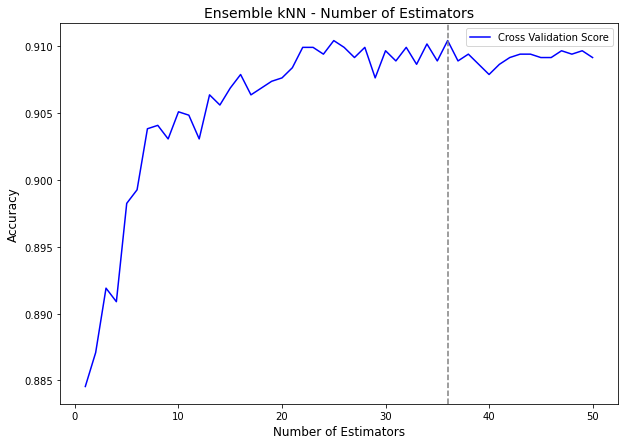

In [273]:
# create an empty list
cross_val_scores = []

# create a list of values which 'n_estimator' may represent
n_estimator = list(range(1, 51))

for n in tqdm(n_estimator):
    
    # instantiate the model
    ensemble_knn = BaggingClassifier(KNeighborsClassifier(n_neighbors = cv_optimal_n_neighbors),
                                     n_estimators = n,
                                     random_state = 42)
    
    # calculate the cross-validation scores and append to the empty list
    cv_score = np.mean(cross_val_score(ensemble_knn, X_train_scaled, y_train, cv = 5))
    cross_val_scores.append(cv_score)

    
# graph presets
plt.figure(figsize=(10, 7))

# graph data:
plt.plot(k_values, cross_val_scores, label="Cross Validation Score", color = 'blue') # plot the cross-validation scores

# graph settings
plt.xlabel('Number of Estimators', fontsize = 12) # establish x-axis label
plt.axvline(x = n_estimator[np.argmax(cross_val_scores)], color = 'grey', linestyle = '--') # plot a vertical line where the cross-validation score is highest
plt.ylabel('Accuracy', fontsize = 12) # set y-axis label
plt.title("Ensemble kNN - Number of Estimators", fontsize = 14) # define plot title
plt.legend()

# display graph
plt.show()

In [274]:
# retrieve the number of estimators that results in the highest cross validation score
cv_optimal_n_estimators = n_estimator[np.argmax(cross_val_scores)]

f'Optimal number of estimators using Cross-Validation: {cv_optimal_n_estimators}'

'Optimal number of estimators using Cross-Validation: 36'

Having identified the optimal number of estimators, the model is to be re-instantiated, fit and scored:

In [275]:
# instantiate the model
ensemble_knn = BaggingClassifier(KNeighborsClassifier(n_neighbors = cv_optimal_n_neighbors),
                            n_estimators = cv_optimal_n_estimators,
                            random_state = 42)

# fit the model
ensemble_knn.fit(X_train_scaled, y_train)

# score the model on train and test data
print(f'Model Type: Ensemble kNN\n')

print(f'Cross Validation - Number of Neighbors: {cv_optimal_n_neighbors}')
print(f'Cross Validation - Number of Estimators: {cv_optimal_n_estimators}\n')

print(f'Train Accuracy: {(ensemble_knn.score(X_train_scaled, y_train)*100):.2f}%')
print(f'Test Accuracy: {(ensemble_knn.score(X_test_scaled, y_test)*100):.2f}%')

Model Type: Ensemble kNN

Cross Validation - Number of Neighbors: 1
Cross Validation - Number of Estimators: 36

Train Accuracy: 99.85%
Test Accuracy: 92.72%


In [276]:
# store the score of the model's results
ensemble_knn_train_accuracy = round((ensemble_knn.score(X_train_scaled, y_train)*100), 2)
ensemble_knn_test_accuracy = round((ensemble_knn.score(X_test_scaled, y_test)*100), 2)

In [277]:
# data from both validation and cross-validation models
data = [[val_score_optimal_n_neighbors, cv_optimal_n_neighbors], # number of neighbors (validation vs. cross-validation)
        ['NA', cv_optimal_n_estimators], # number of estimators (cross-validation)
        [knn_cv_train_accuracy, ensemble_knn_train_accuracy], # training accuracies (non-ensemble kNN vs. ensemble kNN)
        [knn_cv_test_accuracy, ensemble_knn_test_accuracy]] # test accuracies (non-ensemble kNN vs. ensemble kNN)

# create model performance df
knn_results_report = pd.DataFrame(data,
                                  columns = ['Non-Ensemble kNN', 'Ensemble kNN'],
                                  index = ['Number of Neighbors', 'Number of Estimators', 'Train Accuracy', 'Test Accuracy'])

# display df
knn_results_report

,Non-Ensemble kNN,Ensemble kNN
Number of Neighbors,12,1.00
Number of Estimators,NA,36.00
Train Accuracy,100.0,99.85
Test Accuracy,90.59,92.72


From the results displayed above, it can be noted that the ensemble K Nearest Neighbors (kNN) model performed slightly better in comparison to a standalone kNN model. In addition to the `knn_results_report` above, a confusion matrix can be used in order to dive deeper into the results of the ensemble kNN model:

In [278]:
# generate a set of predicted values
y_pred = ensemble_knn.predict(X_test_scaled)

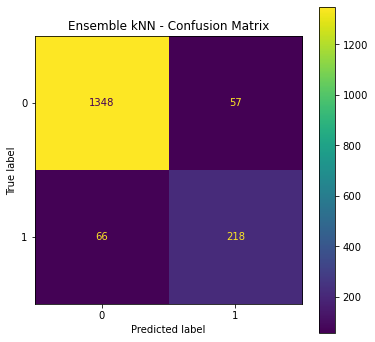

In [279]:
# plot a confusion matrix
fig, ax = plt.subplots(figsize = (6, 6))
plot_confusion_matrix(ensemble_knn, X_test_scaled, y_test, ax = ax)
ax.set_title('Ensemble kNN - Confusion Matrix');

**Findings - Ensemble kNN - Confusion Matrix:**

Of the 1,405 total true non-churn customers, the model was able to accurately predict 96% of the observations.</br>
In the same vein, of the 284 total true churn customers, the model was able to accurately predict 77% of the observations.

In both instances, the model was unable to accurately classify a small subset of churn and non-churn customers, which translates to 7% (123) of the observations as having been misclassified.

In addition to the confusion matrix above, a classification report may be generated for this model which illustrates not only the model's accuracy but also its precision, recall and F1 scores. The results of which are to be stored in their respective variables. Following this section (`Supervised Machine Learning Models (No Sampling)`), we will evaluate the performance of these same models on sampled data (using SMOTE). As such, the variables created below that represent the model's precision, recall, f1 and accuracy will be called upon at a later stage. 

In [280]:
# generate a classification report
ensemble_knn_report = classification_report(y_test, y_pred)

# store the results of the classification report above
ensemble_knn_precision = round(precision_score(y_test, y_pred)*100, 2)
ensemble_knn_recall = round(recall_score(y_test, y_pred)*100, 2)
ensemble_knn_f1 = round(f1_score(y_test, y_pred)*100, 2)
ensemble_knn_accuracy = round(accuracy_score(y_test, y_pred)*100, 2)

[Back to Top](#back_to_top)

### Random Forests
<a id="no_sampling_random_forests"></a>

---

In addition to an ensemble of kNN models, an alternate structure is that of a Random Forest. A random forest is an ensemble of decision trees, each with its own decision boundary. Although each decision tree has a similar construct or shape; random forests leverages the fact that each model overfits to the data in different ways and averages out the combined results. A random forest model may be constructed by using the `RandomForestClassifier` from `sklearn.ensemble`.

In [281]:
# import the RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier

#### Cross-Validation for Hyperparameter Tuning - Number of Estimators
---

Using cross-validation, we may determine the optimal number of estimators for the Random Forest. The number of estimators determines the number of Decision Tree models that the Random Forest will be comprised of.

100%|██████████| 50/50 [00:14<00:00,  3.34it/s]


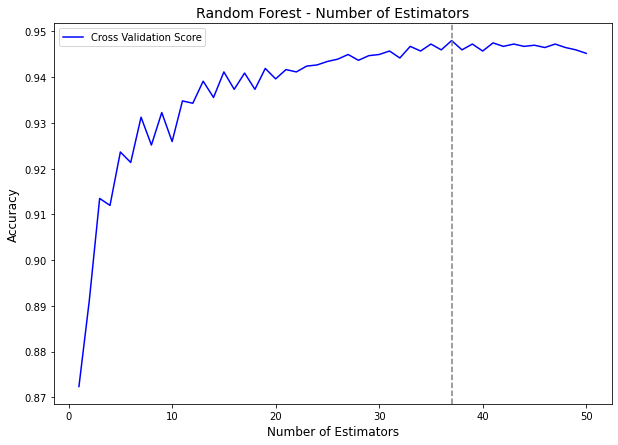

In [282]:
# create an empty list
cross_val_scores = []

# list of potential values for n_estimator
n_estimator = range(1, 51)

for n in tqdm(n_estimator):
    
    # instantiate the model
    rf_model = RandomForestClassifier(n_estimators = n, random_state = 42)
    
    # generate cross-validation scores and append them to the empty list
    cv_score = np.mean(cross_val_score(rf_model, X_train, y_train, cv = 5))
    cross_val_scores.append(cv_score)

# graph presets
plt.figure(figsize=(10, 7))

# graph data
plt.plot(n_estimator, cross_val_scores, label = "Cross Validation Score", color = 'blue') # plot cross-validation scores

# graph settings
plt.xlabel('Number of Estimators', fontsize = 12) # define x-axis label
plt.axvline(x = n_estimator[np.argmax(cross_val_scores)], color = 'grey', linestyle = '--') # plot vertical line where cross-validation score is highest
plt.ylabel('Accuracy', fontsize = 12) # define y-axis label
plt.title("Random Forest - Number of Estimators", fontsize = 14) # # set plot title
plt.legend()

# display graph
plt.show()

The optimal number of estimators for the random forest can then be determined with the help of the `np.argmax` function:

In [283]:
# store the optimal number of estimators
cv_optimal_n_estimator = n_estimator[np.argmax(cross_val_scores)]

f'Optimal number of estimators using Cross-Validation: {cv_optimal_n_estimator}'

'Optimal number of estimators using Cross-Validation: 37'

Once the optimal number of estimators has been determined, we may then tune the hyperparameter settings of `max_depth` based on a random forest of 37 decision trees:

#### Cross-Validation for Hyperparameter Tuning - Max Depth
---

100%|██████████| 61/61 [00:24<00:00,  2.47it/s]


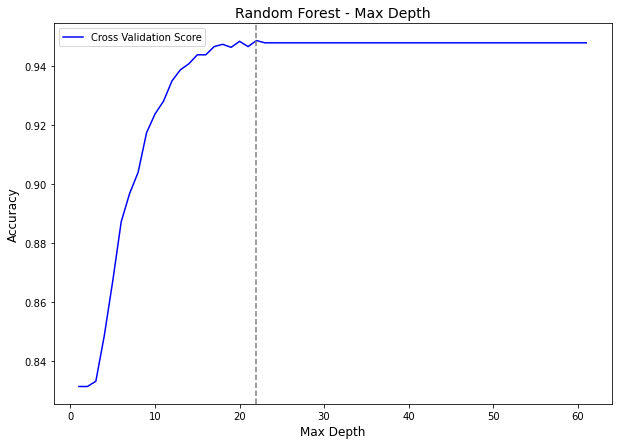

In [284]:
# create an empty list
cross_val_scores = []

# define a set of max_depth values
depth_values = list(range(1, int(np.sqrt(X_train.shape[0]))))

for depth in tqdm(depth_values):
    
    # instantiate the model
    rf_model = RandomForestClassifier(n_estimators = cv_optimal_n_estimator, 
                                      max_depth = depth, 
                                      random_state = 42)
    
    # calculate cross-validation scores and append the results to the empty list
    cv_score = np.mean(cross_val_score(rf_model, X_train, y_train,cv = 5))
    cross_val_scores.append(cv_score)

# graph presets
plt.figure(figsize=(10, 7))

# graph data
plt.plot(depth_values, cross_val_scores, label="Cross Validation Score", color = 'blue') # plot cross-validation scores

# graph settings
plt.xlabel('Max Depth', fontsize = 12) # set x-axis label
plt.axvline(x = depth_values[np.argmax(cross_val_scores)], color = 'grey', linestyle = '--') # plot a vertical line where the cross-validation score is highest
plt.ylabel('Accuracy', fontsize = 12) # define y-axis label
plt.title("Random Forest - Max Depth", fontsize = 14) # set plot title
plt.legend()

# display graph
plt.show()

Once plotted, the `max_depth` value that resulted in the highest cross-validation score may then be retrieved:

In [285]:
# retrieve 'max_depth' value using 'np.argmax'
rf_cv_optimal_max_depth = depth_values[np.argmax(cross_val_scores)]

# display optimal 'max_depth' value
f'Optimal max depth using Cross-Validation: {rf_cv_optimal_max_depth}'

'Optimal max depth using Cross-Validation: 22'

At this stage, the model's performance may then be determined and evaluated based on the chosen hyperparameter settings:

In [286]:
# instantiate the model
rf_model = RandomForestClassifier(n_estimators = cv_optimal_n_estimator,
                                  max_depth = rf_cv_optimal_max_depth, 
                                  random_state = 42)

# fit the model to the scaled train data
rf_model.fit(X_train_scaled, y_train)


# score the model on train and test data
print(f'Model Type: Random Forest\n')

print(f'Cross Validation - Number of Estimators: {cv_optimal_n_estimator}')
print(f'Cross Validation - Max Depth: {rf_cv_optimal_max_depth}\n')

print(f'Train Accuracy: {(rf_model.score(X_train_scaled, y_train)*100):.2f}%')
print(f'Test Accuracy: {(rf_model.score(X_test_scaled, y_test)*100):.2f}%')

Model Type: Random Forest

Cross Validation - Number of Estimators: 37
Cross Validation - Max Depth: 22

Train Accuracy: 100.00%
Test Accuracy: 95.32%


The model's performance is then stored in a set of variables which will be used in order to create a 'results' dataframe

In [287]:
# store the model's train and test accuracy
rf_cv_train_accuracy = round((rf_model.score(X_train_scaled, y_train)*100), 2)
rf_cv_test_accuracy = round((rf_model.score(X_test_scaled, y_test)*100), 2)

In [288]:
# list of model performance data points
data = [['NA', cv_optimal_n_estimator], # number of estimators: decision tree (dt) vs. random forest (rf)
        [dt_cv_optimal_max_depth, rf_cv_optimal_max_depth], # max depth: decision tree (dt) vs. random forest (rf)
        [dt_cv_train_accuracy, rf_cv_train_accuracy], # train accuracy: decision tree (dt) vs. random forest (rf)
        [dt_cv_test_accuracy, rf_cv_test_accuracy]] # test accuracy: decision tree (dt) vs. random forest (rf)

# create model performance df
dt_results_report = pd.DataFrame(data,
                                 columns = ['Decision Tree', 'Random Forest'],
                                 index = ['Number of Estimators', 'Max Depth', 'Train Accuracy', 'Test Accuracy'])

# display df
dt_results_report

,Decision Tree,Random Forest
Number of Estimators,NA,37.00
Max Depth,15,22.00
Train Accuracy,99.78,100.00
Test Accuracy,92.45,95.32


In comparing the performance of a standalone Decision Tree model to that of a Random Forest, it can be noted that the Random Forest attained a higher test accuracy relative to that of a Decision Tree. To better understand and evaluate the model's performance; a confusion matrix and classification report may be created (as follows):

In [289]:
# generate a set of predicted values
y_pred = rf_model.predict(X_test_scaled)

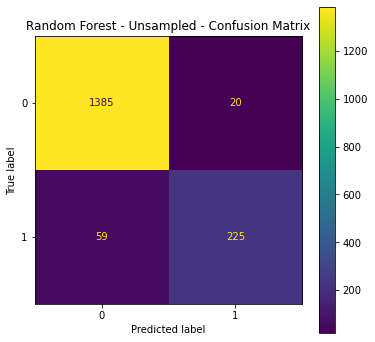

In [290]:
# plot a confusion matrix
fig, ax = plt.subplots(figsize = (6, 6))
plot_confusion_matrix(rf_model, X_test_scaled, y_test, ax = ax)
ax.set_title('Random Forest - Unsampled - Confusion Matrix');

**Findings - Random Forest - Confusion Matrix:**

Of the 1,405 total true non-churn customers, the model was able to accurately predict 98% of the observations.</br>
Similarly, of the 284 total true churn customers, the model was able to accurately predict 79% of the observations.

Additionally, the model was unable to accurately classify 79 observations, which translates to 4% of the observations having been misclassified.

As had been conducted for the ensemble kNN model, a classification report can be created for the random forest in order to ascertain the model's precision, recall, F1 and accuracy scores. The results of which will be referenced in a subsequent section when comparing the results of a random forest on unsampled vs. sampled data.

In [291]:
# create a classification report
rf_report = classification_report(y_test, y_pred)

# store the results of the classification report above
rf_precision = round(precision_score(y_test, y_pred)*100, 2)
rf_recall = round(recall_score(y_test, y_pred)*100, 2)
rf_f1 = round(f1_score(y_test, y_pred)*100, 2)
rf_accuracy = round(accuracy_score(y_test, y_pred)*100, 2)

[Back to Top](#back_to_top)

### Support Vector Machines (SVM)
<a id="no_sampling_ensemble_svm"></a>

---

In [292]:
from sklearn.ensemble import VotingClassifier

In deploying an ensemble of Support Vector Machines, the `VotingClassifier` is imported from `sklearn.ensemble` as this will allow for the creation of an ensemble of different models. In the case of SVMs, an ensemble will be comprised of a group of Support Vector Classification models with differing kernels: `linear`, `rbf`, `poly`, `sigmoid`. In doing so, we may leverage the predictive power of each model.

In [293]:
# instantiate each type of SVM model
# assign a value of C based on the cross validation results from earlier

linear_svm = SVC(C = cv_optimal_linear_c,
                 kernel = 'linear', 
                 probability = True, 
                 random_state = 42)


rbf_svm = SVC(C = cv_optimal_rbf_c,
              kernel = 'rbf', 
              probability = True, 
              random_state = 42)


poly_svm = SVC(C = cv_optimal_poly_c, 
               kernel = 'poly', 
               probability = True, 
               random_state = 42)


sigmoid_svm = SVC(C = cv_optimal_sigmoid_c,
                  kernel = 'sigmoid', 
                  probability = True, 
                  random_state = 42)



Once each of the SVM models has been instantiated, a voting classifier can be created which is comprised of each type of SVM:

In [294]:
# instantiate an SVM model
svm_voting_ensemble = VotingClassifier(estimators = [('Linear SVM', linear_svm),
                                                     ('RBF SVM', rbf_svm),
                                                     ('Polynomial SVM',poly_svm),
                                                     ('Sigmoid SVM', sigmoid_svm),
                                                    ],
                                       voting = 'soft')

At which point, the voting ensemble can be fit and scored against the scaled data:

In [295]:
# fit the voting ensemble to the train data
svm_voting_ensemble.fit(X_train_scaled, y_train);

# score the voting ensemble
print(f'Model Type: Voting Ensemble SVM\n')
print(f'Train Accuracy: {round((svm_voting_ensemble.score(X_train_scaled, y_train))*100, 2)}%')
print(f'Test Accuracy: {round((svm_voting_ensemble.score(X_test_scaled, y_test))*100, 2)}%')

Model Type: Voting Ensemble SVM

Train Accuracy: 97.18%
Test Accuracy: 93.19%


In [296]:
# store the results of the model's train and test accuracy
vote_ensemble_cv_train_accuracy = round((svm_voting_ensemble.score(X_train_scaled, y_train)*100), 2)
vote_ensemble_cv_test_accuracy = round((svm_voting_ensemble.score(X_test_scaled, y_test)*100), 2)

In [297]:
# generate a set of predicted values
y_pred = svm_voting_ensemble.predict(X_test_scaled)

Having created a set of y-predictions, a confusion matrix may then be created and evaluated:

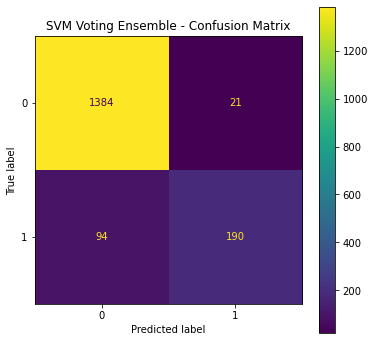

In [298]:
# plot a confusion matrix
fig, ax = plt.subplots(figsize = (6, 6))
plot_confusion_matrix(svm_voting_ensemble, X_test_scaled, y_test, ax = ax)
ax.set_title('SVM Voting Ensemble - Confusion Matrix');

**Findings - SVM Voting Ensemble - Confusion Matrix:**

Of the 1,405 total true non-churn customers, the model was able to accurately predict 99% of the observations.</br>
Furthermore, of the 284 total true churn customers, the model was able to accurately predict 67% of the observations.

Given these results, the model was unable to accurately predict the classification of 115 observations (7%).

In [299]:
# generate a classification report
svm_voting_ensemble_report = classification_report(y_test, y_pred)

# store the results of the classification report
svm_voting_ensemble_precision = round(precision_score(y_test, y_pred)*100, 2)
svm_voting_ensemble_recall = round(recall_score(y_test, y_pred)*100, 2)
svm_voting_ensemble_f1 = round(f1_score(y_test, y_pred)*100, 2)
svm_voting_ensemble_accuracy = round(accuracy_score(y_test, y_pred)*100, 2)

### Machine Learning Pipeline: No Sampling & Ensemble Learning
---

To help determine which of the previous ensemble learning models performs the best (in terms of accuracy), a machine learning pipeline can be used as follows:

In [300]:
# drop the 'churn' column
# save all remaining columns to the independent variable ('X')
X = customer_df_with_dummies.drop('churn', axis = 1) 

# save 'churn' to the dependent variable ('y')
y = customer_df_with_dummies['churn']

In [301]:
# test set representing 30% of the total data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, stratify = y, random_state = 42)

In [302]:
estimators = [("scaling", StandardScaler()),
              ("model", LogisticRegression())]

pipe = Pipeline(estimators)

In [303]:
# define a set of parameters for ensemble kNN
ensemble_knn_param_grid = {"model": [BaggingClassifier(KNeighborsClassifier(), random_state = 42)],
                           "scaling": [StandardScaler()],
                           "model__base_estimator__n_neighbors": np.arange(1, 6),
                           "model__n_estimators": np.arange(40, 56)}

# define a set of parameters for random forest
rf_param_grid = {"model": [RandomForestClassifier(random_state = 42)],
                 "scaling": [StandardScaler()],
                 "model__max_depth": np.arange(20, 26),
                 "model__n_estimators": np.arange(35, 41)}

# define a set of parameters for SVM voting ensemble
voting_ensemble_param_grid = {"model": [svm_voting_ensemble],
                              "scaling": [StandardScaler()]}

param_grid = [ensemble_knn_param_grid,
              rf_param_grid,
              voting_ensemble_param_grid]

In [304]:
grid = GridSearchCV(pipe, param_grid, cv = 5, scoring = 'accuracy')

*Note: The following `grid.fit()` function may take up to ~10 minutes to execute`*

In [305]:
# fit the model
grid.fit(X_train_scaled, y_train);

In [306]:
# return the best parameters
grid.best_params_

{'model': RandomForestClassifier(max_depth=22, n_estimators=37, random_state=42),
 'model__max_depth': 22,
 'model__n_estimators': 37,
 'scaling': StandardScaler()}

Based on the `GridSearchCV`, the best model based on a scoring method of `accuracy` is the RandomForestClassifier() with a max_depth of 22 and n_estimators of 37.

In [307]:
print(f'Model Settings: No Sampling & Ensemble Learning')
print(f'Sampling Method: Unsampled\n')

print(f'Model Type: Random Forest Classifier')
print(f"Max Depth: {list(grid.best_params_.items())[1][1]}")
print(f"Number of Estimators: {list(grid.best_params_.items())[2][1]}\n")

print(f'ML Pipeline - Train Accuracy: {round((grid.score(X_train_scaled, y_train))*100, 2)}%')
print(f'ML Pipeline - Test Accuracy: {round((grid.score(X_test_scaled, y_test))*100, 2)}%')

Model Settings: No Sampling & Ensemble Learning
Sampling Method: Unsampled

Model Type: Random Forest Classifier
Max Depth: 22
Number of Estimators: 37

ML Pipeline - Train Accuracy: 100.0%
ML Pipeline - Test Accuracy: 95.32%


[Back to Top](#back_to_top)

### Supervised Machine Learning Models (Sampling with SMOTE)
---
<a id="sampling_super_machine_learning_models"></a>

**Preface:**

Whereas in the previous section, a series of supervised machine learning models were deployed and utilized without any sampling methods having been implemented; we may redeploy the same set of supervised machine learning models following the implementation of SMOTE. Synthetic Minority Oversampling Technique (SMOTE) is a type of sampling method which creates synthetic data for the minority class (in this case, instances where `churn` is equal to 1). As displayed below, a class imbalance is present in the original dataset in which there is an unequal distribution of classes in the training data (as demonstrated below - 3,277 counts of class 0 and 664 counts of class 1). 

SMOTE seeks to address this class imbalance such that synthetic samples of the minority class are generated. The principle benefit of using SMOTE instead of up- or down- sampling is that this methodology does not create duplicates, but rather creates artificial observations that are slightly different to the original data.

In [308]:
# return a value count for each class
y_train.value_counts()

0    3277
1     664
Name: churn, dtype: int64

**Precision and Recall:**

In addition to addressing class imbalance by sampling with SMOTE; an additional consideration will be taken into account which had previously been omitted. In the previous section of "Supervised Machine Learning Models (No Sampling)", each of the models were evaluated solely based on their respective accuracy scores. For the following set of models, precision and recall will be introduced as a means of evaluating model performance. 

* **Precision** seeks to determine: "what proportion of positive identifications was actually correct?" 
* **Recall** seeks to ascertain: "What proportion of actual positives was correctly identified?".

In the context of customer churn, it can be argued that emphasis should be placed on a model's recall score versus precision as a means of evaluating a model's performance. Given that we are seeking to identify which customers are prone to stop using the e-commerce site for future purchases, we want to make sure that our model is capable to identifying all customers which are likely to churn. Although emphasis on recall will result in a set of models that will (to a certain extent) incorrectly classify customers as part of class 1 (`churn`) when in fact they should have been classified as class 0; it can be argued that it is more expensive to lose a customer had they been misclassified as belonging to class 0 when in fact they belong to class 1.

Even though placing emphasis on recall as a measure of model performance will lead to certain observations as being misclassified as class 1 (false positive); (depending on the strategy that is to be employed in following up with customers that aren't going to leave) it could provide the company with an opportunity to gain more information with regards to how its customers perceive the e-commerce platform. As such, in this case, misclassifying a customer does not prove to be detrimental to the company in terms of time and capital since it will result in the acquisition of more information about customer satisfaction (assuming that the company's strategy is to reach out to those customers belonging to class 1 in order to identify any dissatisfaction that they may have experienced when using the service). 

If, conversely, the strategy is to offer promotions to customers who have may churn, then a model with a higher recall score will result in the extension of promotional offers to customers who were never intent on leaving in the first place. However, it may be argued that it is more expensive to lose a customer than to keep them satisfied and have them be a returning customer. Lastly, it may also be the case that the model misclassifies a customer (false positive) who has not yet churned but may be deciding on doing so, in which case the model will have led the customer service team to potentially mitigate that possibility.

In [309]:
from imblearn.over_sampling import SMOTE

# instantiate SMOTE as 'sm'
sm = SMOTE(random_state = 42)

### K Nearest Neighbors
<a id="sampling_knn"></a>

---

Given that we are starting the model building process anew with sampled data, the independent and dependent variables (`X` and `y`) are to be re-instantiated.

In [310]:
# drop the 'churn' column
# save all remaining columns to the independent variable ('X')
X = customer_df_with_dummies.drop('churn', axis = 1) 

# save 'churn' to the dependent variable ('y')
y = customer_df_with_dummies['churn']

The data is then split between a train and test set whereby the test set will make up 30% of the data.

In [311]:
# split the data such that the test set is comprised of 30% of the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, stratify = y, random_state = 42)

### K Nearest Neighbor - No Sampling
---

To compare the results of the K Nearest Neighbor model when fit to un-sampled versus sampled data; we will first seek to determine the kNN model's performance on un-sampled data. As such, we instantiate the scaler and fit it to the original training data.

In [312]:
# scale the data
scaler = StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

The model may then be instantiated from which the optimal value for 'k' is passed as an argument to the `n_neighbors` parameter. The value for which has already been determined in the section prior when evaluating the performance of a kNN model on un-sampled data (the result of which had been stored in the variable `cv_optimal_n_neighbors`).

In [313]:
# instantiate the model
knn = KNeighborsClassifier(n_neighbors = cv_optimal_n_neighbors)

# fit model to scaled data
knn = knn.fit(X_train_scaled, y_train)

With the model having now been fit to the scaled training data, the `.predict()` function can be called upon to allow for the model to predict the label of a new set of data (using `X_test_scaled`):

In [314]:
# predict classification
y_pred = knn.predict(X_test_scaled)

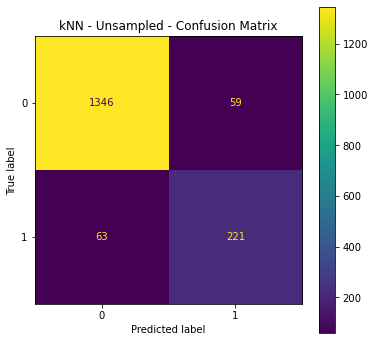

In [315]:
# plot a confusion matrix
fig, ax = plt.subplots(figsize = (6, 6))
plot_confusion_matrix(knn, X_test_scaled, y_test, ax = ax)
ax.set_title('kNN - Unsampled - Confusion Matrix');

**Findings - kNN - Unsampled - Confusion Matrix:**

With the help of a confusion matrix, we may evaluate the performance of this kNN classification algorithm.

Of the 1,405 total true non-churn customers, the model was able to accurately predict 96% of the observations as true negatives.</br>
In addition, of the 284 total true churn customers, the model was able to accurately predict 78% of the observations as true positives.

However, the model misclassified 7% of the observations (122) as either false positive (59) or false negative (63).

In support of the confusion matrix, a classification report may be created in order to evaluate the model's performance (using the un-sampled data) with respect to its precision, recall and F1 scores.

In [316]:
# generate a classification report
knn_report = classification_report(y_test, y_pred)

# display classification report
print(knn_report)

              precision    recall  f1-score   support

           0       0.96      0.96      0.96      1405
           1       0.79      0.78      0.78       284

    accuracy                           0.93      1689
   macro avg       0.87      0.87      0.87      1689
weighted avg       0.93      0.93      0.93      1689



In comparing the results of the kNN model based on un-sampled data versus sampling with SMOTE; the results tabulated in the classification report above are stored in their respective variables (as demonstrated below). In the subsequent code cells, these variables will be called in order to compare the results of the model based on un-sampled data versus sampling with SMOTE in the form of a dataframe.

In [317]:
# store the model's performance results
knn_precision = round(precision_score(y_test, y_pred)*100, 2)
knn_recall = round(recall_score(y_test, y_pred)*100, 2)
knn_f1 = round(f1_score(y_test, y_pred)*100, 2)
knn_accuracy = round(accuracy_score(y_test, y_pred)*100, 2)

### K Nearest Neighbor - Sampling with SMOTE
---

To employ SMOTE for sampling, the train data is to be resampled as demonstrated below: 

In [318]:
# fit SMOTE to the training data, then resample the data
X_train_sm, y_train_sm = sm.fit_resample(X_train, y_train)

To verify that the class imbalance has been addressed and rectified through the use of SMOTE, a `value_count` may be returned for both the original `y_train` and `y_train_sm`. Based on the results displayed below, it can be observed that the class distribution between class 0 and 1 is now even. From which, we may proceed in scaling the SMOTE sampled data.

In [319]:
# pre-SMOTE
print('Original class distribution')
display(pd.Series(y_train).value_counts().sort_index())

# post-SMOTE
print('\nResampled class distribution')
display(pd.Series(y_train_sm).value_counts().sort_index())

Original class distribution


0    3277
1     664
Name: churn, dtype: int64


Resampled class distribution


0    3277
1    3277
Name: churn, dtype: int64

In [320]:
# scale the sampled train data and the un-sampled test data
ss_sm = StandardScaler().fit(X_train_sm)
X_train_sm_scaled = ss_sm.transform(X_train_sm)
X_test_scaled = ss_sm.transform(X_test)

#### Cross-Validation for Hyperparameter Tuning - Number of Neighbors
---

At this stage, we may now seek to determine the optimal number of neighbors for the kNN model that is based off of the sampled data.

100%|██████████| 50/50 [00:29<00:00,  1.71it/s]


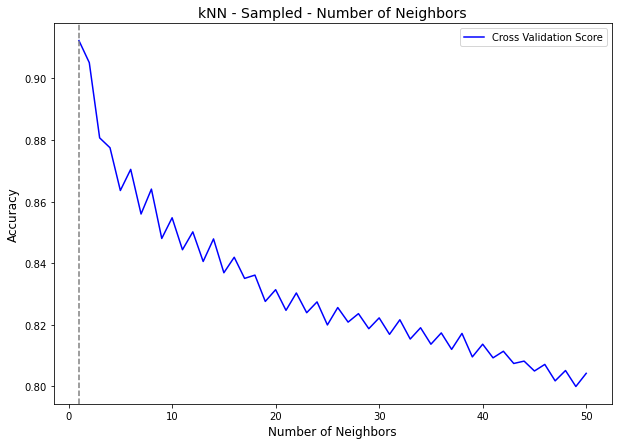

In [321]:
# create empty list
cross_val_scores = []

# set a list of possible values for k
n_neighbor = list(range(1, 51))

for n in tqdm(n_neighbor):
    
    # instantiate the model
    knn = KNeighborsClassifier(n_neighbors = n)
    
    # calculate cross validation score and append to the empty list
    cv_score = np.mean(cross_val_score(knn, X_train_sm_scaled, y_train_sm, cv = 5))
    cross_val_scores.append(cv_score)

    
# graph presets
plt.figure(figsize=(10, 7))

# graph data
plt.plot(n_neighbor, cross_val_scores, label = "Cross Validation Score", color = 'blue') # plot the cross validation scores

# graph settings
plt.xlabel('Number of Neighbors', fontsize = 12) # define x-axis label
plt.axvline(x = n_neighbor[np.argmax(cross_val_scores)], color = 'grey', linestyle = '--') # add a vertical line where the cross validation score is highest
plt.ylabel('Accuracy', fontsize = 12) # set a y-axis label
plt.title("kNN - Sampled - Number of Neighbors", fontsize = 14) # set a plot title
plt.legend()

# display graph
plt.show()

From the results above, it appears as though the optimal number of neighbors equals 1, which may be determined using `np.argmax`:

In [322]:
# display optimal value for number of neighbors
sm_cv_optimal_n_neighbors = k_values[np.argmax(cross_val_scores)]

f'Optimal number of neighbors using Cross-Validation: {sm_cv_optimal_n_neighbors}'

'Optimal number of neighbors using Cross-Validation: 1'

At which point, the model may be re-instantiated and fit to the SMOTE sampled scaled train data:

In [323]:
# instantiate and fit the model
knn = KNeighborsClassifier(n_neighbors = sm_cv_optimal_n_neighbors)
sm_knn = knn.fit(X_train_sm_scaled, y_train_sm)

From which, the model may generate a set of predicted values:

In [324]:
# predict classification using un-sampled scaled test data
y_pred = sm_knn.predict(X_test_scaled)

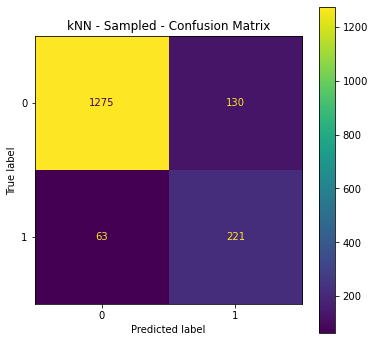

In [325]:
# plot a confusion matrix
fig, ax = plt.subplots(figsize = (6, 6))
plot_confusion_matrix(sm_knn, X_test_scaled, y_test, ax = ax)
ax.set_title('kNN - Sampled - Confusion Matrix');

**Findings - kNN - Sampled - Confusion Matrix:**

Of the 1,405 total true non-churn customers, the model was able to accurately predict 91% of the observations.</br>
As it relates to the 284 total true churn customers, the kNN model was able to accurately predict 78% of the observations.

In support of these findings, the previously generated set of y-predicted values may be leveraged to help create a classification report:

In [326]:
# generate a classification report
sm_knn_report = classification_report(y_test, y_pred)

# display classification report
print(sm_knn_report)

              precision    recall  f1-score   support

           0       0.95      0.91      0.93      1405
           1       0.63      0.78      0.70       284

    accuracy                           0.89      1689
   macro avg       0.79      0.84      0.81      1689
weighted avg       0.90      0.89      0.89      1689



In [327]:
# store the results of the classification report
sm_knn_precision = round(precision_score(y_test, y_pred)*100, 2)
sm_knn_recall = round(recall_score(y_test, y_pred)*100, 2)
sm_knn_f1 = round(f1_score(y_test, y_pred)*100, 2)
sm_knn_accuracy = round(accuracy_score(y_test, y_pred)*100, 2)

Having generated a classification report for both the un-sampled and SMOTE sampled kNN models, the performance of each model may then be compared:

In [328]:
# list of lists with data points
data = [[knn_precision, knn_recall, knn_f1, knn_accuracy], # classification report results - unsampled
        [sm_knn_precision, sm_knn_recall, sm_knn_f1, sm_knn_accuracy]] # classification report results - sampling with SMOTE (sm)

# create model performance df
knn_classification_report = pd.DataFrame(data,
                                         columns = ['Precision', 'Recall', 'F1 Score', 'Accuracy'],
                                         index = ['kNN - Unsampled', 'kNN - SMOTE'])

# display df
knn_classification_report

,Precision,Recall,F1 Score,Accuracy
kNN - Unsampled,78.93,77.82,78.37,92.78
kNN - SMOTE,62.96,77.82,69.61,88.57


After having created a classification report for both kNN models (un-sampled versus sampled), it may be noted that training the model on the sampled data inversely effected its performance with respect to each valuation metric (Precision, Recall, F1 Score and Accuracy). It can be noted that the un-sampled kNN model achieved better performance as indicated by its F1 score (which represents the harmonic mean between precision and recall) as well as a higher accuracy. 

In the following section, the same analysis is to be conduct but with respect to Decision Trees:

[Back to Top](#back_to_top)

### Decision Trees
<a id="sampling_decision_trees"></a>

---

In the following section, the similar methodology is to be employed with respect to Decision Trees.

### Decision Trees - No Sampling
---

First, we must instantiate the model:

In [329]:
# instantiate the model
dt_model = DecisionTreeClassifier(max_depth = dt_cv_optimal_max_depth, random_state = 42)

In [330]:
# fit the model to the data
dt_model = dt_model.fit(X_train_scaled, y_train)

Once the model has been instantiated and fit to the data, the `.predict()` function may be used in order to predict the labels of data values based on `X_test_scaled`.

In [331]:
# predict classification
y_pred = dt_model.predict(X_test_scaled)

To evalute how the model has performed, a confusion matrix and classification report can help to dive deeper in the model's results:

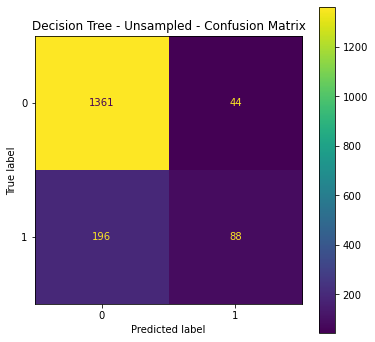

In [332]:
# plot a confusion matrix
fig, ax = plt.subplots(figsize = (6, 6))
plot_confusion_matrix(dt_model, X_test_scaled, y_test, ax = ax)
ax.set_title('Decision Tree - Unsampled - Confusion Matrix');

**Findings - Decision Tree - Unsampled - Confusion Matrix:**

Of the 1,405 total true non-churn customers, the model was able to accurately predict 97% of the observations.</br>
Concerning the 284 total true churn customers, the model was able to accurately predict 69% of the observations.

In addition to the confusion matrix, a classification report can help to determine the model's performance with respect to its precision, recall, f1-score and accuracy.

In [333]:
# generate a classification report
dt_report = classification_report(y_test, y_pred)

# display classification report
print(dt_report)

              precision    recall  f1-score   support

           0       0.87      0.97      0.92      1405
           1       0.67      0.31      0.42       284

    accuracy                           0.86      1689
   macro avg       0.77      0.64      0.67      1689
weighted avg       0.84      0.86      0.84      1689



Based on the classification report above, it can be found that although the model attains an accuracy of 86%, its recall score is only that of 31%. As such, the model performs poorly in findings all of the positive observations (class 1).

In [334]:
# store the results of the classification report
dt_precision = round(precision_score(y_test, y_pred)*100, 2)
dt_recall = round(recall_score(y_test, y_pred)*100, 2)
dt_f1 = round(f1_score(y_test, y_pred)*100, 2)
dt_accuracy = round(accuracy_score(y_test, y_pred)*100, 2)

### Decision Trees - Sampling with SMOTE
---

In comparing the previous Decision Tree model to that of one which is based on sampled data, the training dataset must first be resampled:

In [335]:
# # fit SMOTE to the training data, then resample the data
# X_train_sm, y_train_sm = sm.fit_resample(X_train, y_train)

It may then be confirmed that the class imbalance has in fact been addressed, from which we would expect to find an equal number of instances of both class 0 and 1:

In [336]:
# pre-SMOTE class distribution
print('Original class distribution')
display(pd.Series(y_train).value_counts().sort_index())

# post-SMOTE class distribution
print('\nResampled class distribution')
display(pd.Series(y_train_sm).value_counts().sort_index())

Original class distribution


0    3277
1     664
Name: churn, dtype: int64


Resampled class distribution


0    3277
1    3277
Name: churn, dtype: int64

The data must then be scaled using the `StandardScaler()`:

In [337]:
# # scale the sampled train data and the unsampled test data
# ss_sm = StandardScaler().fit(X_train_sm)
# X_train_sm_scaled = ss_sm.transform(X_train_sm)
# X_test_scaled = ss_sm.transform(X_test)

At which point, we may seek to identify the optimal `max_depth` value for the Decision Tree:

100%|██████████| 61/61 [00:07<00:00,  8.65it/s]


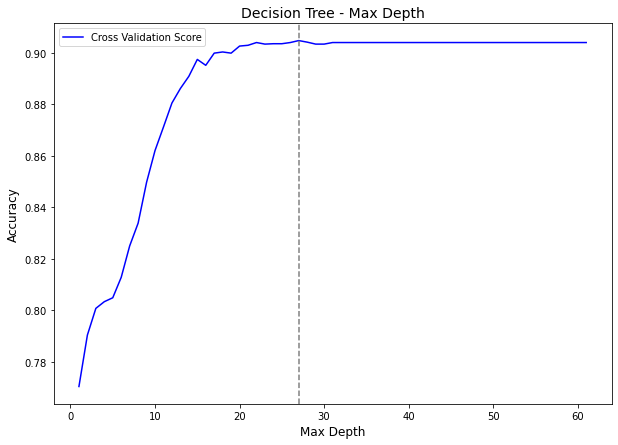

In [338]:
# create empty list
cross_val_scores = []

# set a list of possible max depth values
depth_values = list(range(1, int(np.sqrt(X_train.shape[0]))))


for depth in tqdm(depth_values):
    
    # instantiate the model
    dt_model = DecisionTreeClassifier(max_depth = depth, random_state = 42)
    
    # calculate the cross validation scores...
    cv_score = np.mean(cross_val_score(dt_model, X_train_sm_scaled, y_train_sm, cv = 5))
    # ... and append them to the empty list
    cross_val_scores.append(cv_score)
        
    
# graph presets
plt.figure(figsize=(10, 7))

# graph data
plt.plot(depth_values, cross_val_scores, label="Cross Validation Score", color = 'blue') # plot the cross validation scores

# graph settings
plt.xlabel('Max Depth', fontsize = 12) # define x-axis label
plt.axvline(x = depth_values[np.argmax(cross_val_scores)], color = 'grey', linestyle = '--') # include a vertical line where the cross validation score is highest
plt.ylabel('Accuracy', fontsize = 12) # define y-axis label
plt.title("Decision Tree - Max Depth", fontsize = 14) # set a plot title
plt.legend()

# display graph
plt.show()

The optimal `max_depth` value can then be ascertained based on the plot above using the `np.argmax()` function:

In [339]:
# define the optimal max depth
sm_cv_optimal_max_depth = depth_values[np.argmax(cross_val_scores)]

f'Optimal max depth using Cross-Validation: {sm_cv_optimal_max_depth}'

'Optimal max depth using Cross-Validation: 27'

Once the hyperparameter tuning phase is complete, the Decision Tree model may then be instantiated and fit to the SMOTE sampled data:

In [340]:
# instantiate and fit
dt_model = DecisionTreeClassifier(max_depth = sm_cv_optimal_max_depth, random_state = 42)
sm_dt_model = dt_model.fit(X_train_sm_scaled, y_train_sm)

In [341]:
# predict classification using un-sampled scaled test data
y_pred = sm_dt_model.predict(X_test_scaled)

In evaluating the model's performance, we may make use of both a confusion matrix and classification report (as follows):

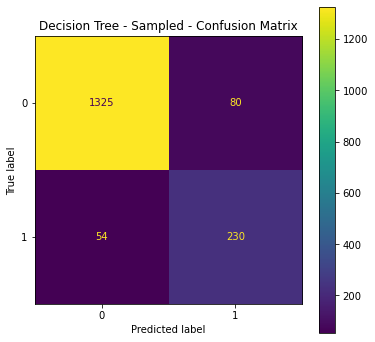

In [342]:
# plot a confusion matrix
fig, ax = plt.subplots(figsize = (6, 6))
plot_confusion_matrix(sm_dt_model, X_test_scaled, y_test, ax = ax)
ax.set_title('Decision Tree - Sampled - Confusion Matrix');

**Findings - Decision Tree - Sampled - Confusion Matrix:**

Of the 1,405 total true non-churn customers, 94% of the observations were correctly classified as true negatives.</br>
Of the 284 total true churn customers, 81% of the observations were accurately classified as true positives.

The results of which can be demonstrated with the following classification report:

In [343]:
# generate a classification report
sm_dt_report = classification_report(y_test, y_pred)

# display classification report
print(sm_dt_report)

              precision    recall  f1-score   support

           0       0.96      0.94      0.95      1405
           1       0.74      0.81      0.77       284

    accuracy                           0.92      1689
   macro avg       0.85      0.88      0.86      1689
weighted avg       0.92      0.92      0.92      1689



In [344]:
# store the results of the classification report above
sm_dt_precision = round(precision_score(y_test, y_pred)*100, 2)
sm_dt_recall = round(recall_score(y_test, y_pred)*100, 2)
sm_dt_f1 = round(f1_score(y_test, y_pred)*100, 2)
sm_dt_accuracy = round(accuracy_score(y_test, y_pred)*100, 2)

After having instantiated, fit and scored a Decision Tree model on both the un-sampled and sampled data; a comparison table may be created to assess and compare the performance of each of the models:

In [345]:
# list of lists with data points
data = [[dt_precision, dt_recall, dt_f1, dt_accuracy], # classification report results - unsampled
        [sm_dt_precision, sm_dt_recall, sm_dt_f1, sm_dt_accuracy]] # classification report results - sampling with SMOTE (sm)

# create model performance df
dt_classification_report = pd.DataFrame(data,
                                        columns = ['Precision', 'Recall', 'F1 Score', 'Accuracy'],
                                        index = ['Decision Tree - Unsampled', 'Decision Tree - SMOTE'])

# display df
dt_classification_report

,Precision,Recall,F1 Score,Accuracy
Decision Tree - Unsampled,66.67,30.99,42.31,85.79
Decision Tree - SMOTE,74.19,80.99,77.44,92.07


Through the utilization of SMOTE as a means of sampling, it can be found that the performance of the Decision Tree not only rose in terms of Recall, but also as it relates to the F1 Score and Accuracy. As such, this particular model benefitted from the sampled data in that each performance evaluation metric received a notable boost. Most notably with regards to the recall, which indicates that the model was able to correctly identify true positives 81% of the time.

[Back to Top](#back_to_top)

### Support Vector Machines (SVM)
---
<a id="sampling_svm"></a>

Having evaluated the performance of kNN and Decision Tree models with respect to un-sampled and sampled data, the following section will be comprised of a set of Support Vector Machine models. The first of which will be the Linear SVM based on un-sampled data.

In generating these models, the dependent and independent variables must first be re-instantiated, split and scaled:

In [346]:
# # drop the 'churn' column
# # save all remaining columns to the independent variable ('X')
# X = customer_df_with_dummies.drop('churn', axis = 1) 

# # save 'churn' to the dependent variable ('y')
# y = customer_df_with_dummies['churn']

In [347]:
# # split the data such that the test set is comprised of 30% of the data
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, stratify = y, random_state = 42)

In [348]:
# # scale the data
# scaler = StandardScaler().fit(X_train)
# X_train_scaled = scaler.transform(X_train)
# X_test_scaled = scaler.transform(X_test)

At which point, a linear SVM model can be instantiated:

### Linear SVM - No Sampling
---

In [349]:
# instantiate the model
linear_svm = SVC(C = cv_optimal_linear_c, 
                 kernel = 'linear', 
                 max_iter = 100_000, 
                 random_state = 42)

# fit the model
linear_svm.fit(X_train_scaled, y_train)

SVC(C=0.1, kernel='linear', max_iter=100000, random_state=42)

Following the step prior, the `.predict()` function may once again be called upon in order to allow for the model to predict the labels of data values:

In [350]:
# predict classification
y_pred = linear_svm.predict(X_test_scaled)

From which, the model's performance can be evaluated with reference to the confusion matrix and classification report.

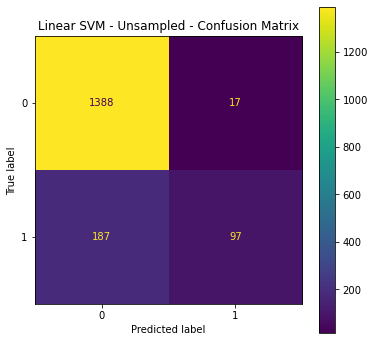

In [351]:
# plot a confusion matrix
fig, ax = plt.subplots(figsize = (6, 6))
plot_confusion_matrix(linear_svm, X_test_scaled, y_test, ax = ax)
ax.set_title('Linear SVM - Unsampled - Confusion Matrix');

**Findings - Linear SVM - Unsampled - Confusion Matrix:**

Of the 1,405 total number of true non-churn customers, 99% of the observations were correctly classified as true negatives.</br>
Concerning the second row of the confusion matrix, representing the true positive observations, the model was able to correctly classify 66% of the observations.

In [352]:
# generate a classification report
linear_svm_report = classification_report(y_test, y_pred)

# display classification report
print(linear_svm_report)

              precision    recall  f1-score   support

           0       0.88      0.99      0.93      1405
           1       0.85      0.34      0.49       284

    accuracy                           0.88      1689
   macro avg       0.87      0.66      0.71      1689
weighted avg       0.88      0.88      0.86      1689



According to the classification report above, though the model was able to attain an accuracy of 89%, it only received an recall score of 52%. It is in re-instantiating the Linear SVM model whilst using the sampled data that we hope to improve the model's recall.

In [353]:
# store the results of the classification report above
linear_svm_precision = round(precision_score(y_test, y_pred)*100, 2)
linear_svm_recall = round(recall_score(y_test, y_pred)*100, 2)
linear_svm_f1 = round(f1_score(y_test, y_pred)*100, 2)
linear_svm_accuracy = round(accuracy_score(y_test, y_pred)*100, 2)

### Linear SVM - Sampling with SMOTE
---

In [354]:
# # fit SMOTE to the training data, then resample the data
# X_train_sm, y_train_sm = sm.fit_resample(X_train, y_train)

In [355]:
# # scale the sampled train data and the un-sampled test data
# ss_sm = StandardScaler().fit(X_train_sm)
# X_train_sm_scaled = ss_sm.transform(X_train_sm)
# X_test_scaled = ss_sm.transform(X_test)

#### Cross-Validation for Hyperparameter Tuning - C Value
---

Prior to fitting the model to the sampled data, the optimal value for `c` must first be determined with the help of cross validation:

 38%|███▊      | 3/8 [00:04<00:07,  1.52s/it]C:\Users\arnau\anaconda3\envs\capstone\lib\site-packages\sklearn\svm\_base.py:255: ConvergenceWarning:

Solver terminated early (max_iter=100000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.

C:\Users\arnau\anaconda3\envs\capstone\lib\site-packages\sklearn\svm\_base.py:255: ConvergenceWarning:

Solver terminated early (max_iter=100000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.

C:\Users\arnau\anaconda3\envs\capstone\lib\site-packages\sklearn\svm\_base.py:255: ConvergenceWarning:

Solver terminated early (max_iter=100000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.

 50%|█████     | 4/8 [00:07<00:08,  2.07s/it]C:\Users\arnau\anaconda3\envs\capstone\lib\site-packages\sklearn\svm\_base.py:255: ConvergenceWarning:

Solver terminated early (max_iter=100000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.

C:\Users\arnau\anaconda3\envs\

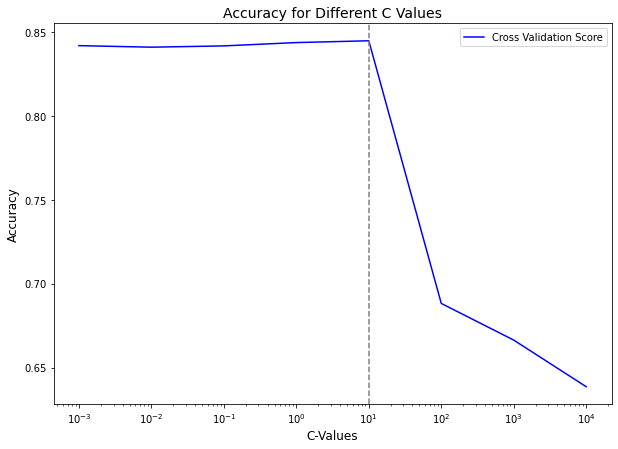

In [356]:
# create empty list
cross_val_scores = []

# set a range of possible c-values
C_values = 10. ** np.arange(-3, 5)

for c in tqdm(C_values):
    
    # instantiate the model
    linear_svm = SVC(C = c, kernel = 'linear', max_iter = 100_000, random_state = 42)
    
    # calculate the cross validation scores...
    cv_score = np.mean(cross_val_score(linear_svm, X_train_sm_scaled, y_train_sm, cv = 5))
    # ... and append them to the empty list
    cross_val_scores.append(cv_score)

    
    
# graph presets
plt.figure(figsize=(10, 7))

# graph data
plt.plot(C_values, cross_val_scores, label="Cross Validation Score", color = 'blue') # plot the cross validation scores

# graph settings
plt.xscale('log') # set x-axis scale to logarithmic
plt.xlabel('C-Values', fontsize = 12) # define x-axis label
plt.axvline(x = C_values[np.argmax(cross_val_scores)], color = 'grey', linestyle = '--') # plot a vertical line where the cross validation score is highest
plt.ylabel('Accuracy', fontsize = 12) # define y-axis label
plt.title("Accuracy for Different C Values", fontsize = 14) # set the plot title
plt.legend()

# display graph
plt.show()

In [357]:
# display optimal value for number of neighbors
sm_cv_optimal_linear_c = C_values[np.argmax(cross_val_scores)]

f'Optimal c-value using Cross-Validation: {sm_cv_optimal_linear_c}'

'Optimal c-value using Cross-Validation: 10.0'

Having identified the optimal value for `c`, the model may now be instantiate and fit to the SMOTE scaled train data:

In [358]:
# instantiate the model
sm_linear_svm = SVC(C = sm_cv_optimal_linear_c, 
                    kernel = 'linear', 
                    max_iter = 100_000, 
                    random_state = 42)

# fit the model
sm_linear_svm.fit(X_train_sm_scaled, y_train_sm)

C:\Users\arnau\anaconda3\envs\capstone\lib\site-packages\sklearn\svm\_base.py:255: ConvergenceWarning:

Solver terminated early (max_iter=100000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.



SVC(C=10.0, kernel='linear', max_iter=100000, random_state=42)

In [359]:
# predict classification using unsampled scaled test data
y_pred = sm_linear_svm.predict(X_test_scaled)

With the model having generated a set of predicted values (as captured in the code cell above), the model's performance in classifying the observations can be assessed:

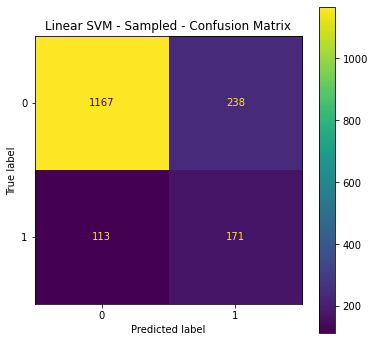

In [360]:
# plot a confusion matrix
fig, ax = plt.subplots(figsize = (6, 6))
plot_confusion_matrix(sm_linear_svm, X_test_scaled, y_test, ax = ax)
ax.set_title('Linear SVM - Sampled - Confusion Matrix');

**Findings - Linear SVM - Sampled - Confusion Matrix:**

Of the 1,405 total number of true non-churn customers (true negatives), the model was able to accurately classify 83% of the observations.</br>
Concerning the 284 total number of true positives (churn customers), the model was able to accurately classify 60% of the observations.

In conjunction to the confusion matrix, the classification report may be referenced to support the above findings:

In [361]:
# generate a classification report
sampling_linear_svm_report = classification_report(y_test, y_pred)

# display classification report
print(sampling_linear_svm_report)

              precision    recall  f1-score   support

           0       0.91      0.83      0.87      1405
           1       0.42      0.60      0.49       284

    accuracy                           0.79      1689
   macro avg       0.66      0.72      0.68      1689
weighted avg       0.83      0.79      0.81      1689



In [362]:
# store the results of the classification report above
sm_linear_svm_precision = round(precision_score(y_test, y_pred)*100, 2)
sm_linear_svm_recall = round(recall_score(y_test, y_pred)*100, 2)
sm_linear_svm_f1 = round(f1_score(y_test, y_pred)*100, 2)
sm_linear_svm_accuracy = round(accuracy_score(y_test, y_pred)*100, 2)

In [363]:
# store the results of both the un-sampled and sampled linear SVM
data = [[linear_svm_precision, linear_svm_recall, linear_svm_f1, linear_svm_accuracy], # classification report results - unsampled
        [sm_linear_svm_precision, sm_linear_svm_recall, sm_linear_svm_f1, sm_linear_svm_accuracy]] # classification report results - sampling with SMOTE (sm)

# create model performance df
linear_svm_classification_report = pd.DataFrame(data,
                                                columns = ['Precision', 'Recall', 'F1 Score', 'Accuracy'],
                                                index = ['Linear SVM - Unsampled', 'Linear SVM - SMOTE'])

# display df
linear_svm_classification_report

,Precision,Recall,F1 Score,Accuracy
Linear SVM - Unsampled,85.09,34.15,48.74,87.92
Linear SVM - SMOTE,41.81,60.21,49.35,79.22


In the case of a Linear SVM model, it can be noted that the model's recall score rose when being trained on the sampled training data. As had previously been stated, a principle limitation of a linear model is that it relies on linear decision boundaries in order to split the two class into two distinct groups. Although, it may be the case that the given data cannot be linearly separated. As such, alternate SVM kernels can be employed, one of which is the Radial Basis Function (RBF) which will be used in the following section.

### Radial Basis Function (RBF) SVM - No Sampling
---

The model is first to be instantiated and fit to the un-sampled data, from which the model's performance may be evaluated.

In [364]:
# instantiate the model
rbf_svm = SVC(C = cv_optimal_rbf_c, 
              kernel = 'rbf', 
              max_iter = 100_000, 
              random_state = 42)

# fit the model
rbf_svm.fit(X_train_scaled,y_train)

SVC(C=10000.0, max_iter=100000, random_state=42)

After having been fit to the scaled train data, the model can generate a set of predicted values:

In [365]:
# predict classification
y_pred = rbf_svm.predict(X_test_scaled)

At which point, the a confusion matrix and classification report may be created:

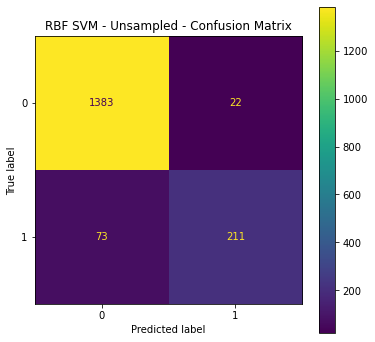

In [366]:
# plot a confusion matrix
fig, ax = plt.subplots(figsize = (6, 6))
plot_confusion_matrix(rbf_svm, X_test_scaled, y_test, ax = ax)
ax.set_title('RBF SVM - Unsampled - Confusion Matrix');

**Findings - RBF SVM - Unsampled - Confusion Matrix:**

As demonstrated in the confusion matrix above, it can be observed that the model was able to accurately predict the 98% of the observations as true negatives (non-churn customers).</br>
With regards to class 1 observations, the model was able to accurately classify 74% of the observations as true positives (churn customers).

A classification report can then be created for this model, whose results are to be saved in a set of variables that are to be called upon when comparing the model's performance to that of an RBF SVM based on the sampled data.

In [367]:
# generate a classification report
rbf_svm_report = classification_report(y_test, y_pred)

# display classification report
print(rbf_svm_report)

              precision    recall  f1-score   support

           0       0.95      0.98      0.97      1405
           1       0.91      0.74      0.82       284

    accuracy                           0.94      1689
   macro avg       0.93      0.86      0.89      1689
weighted avg       0.94      0.94      0.94      1689



In [368]:
# store the results of the classification report above
rbf_svm_precision = round(precision_score(y_test, y_pred)*100, 2)
rbf_svm_recall = round(recall_score(y_test, y_pred)*100, 2)
rbf_svm_f1 = round(f1_score(y_test, y_pred)*100, 2)
rbf_svm_accuracy = round(accuracy_score(y_test, y_pred)*100, 2)

### Radial Basis Function SVM - Sampling with SMOTE
---

100%|██████████| 8/8 [00:24<00:00,  3.06s/it]


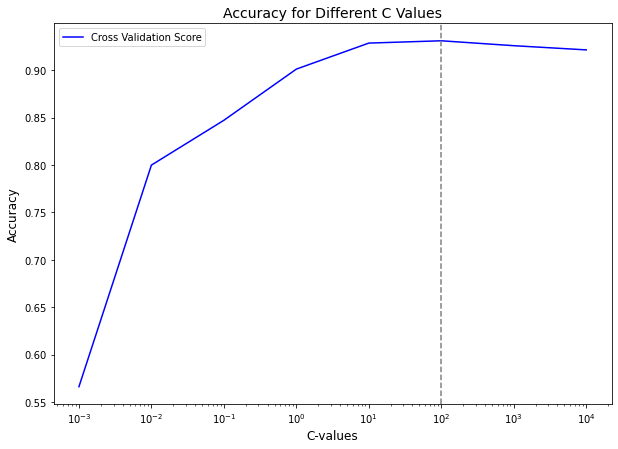

In [369]:
# create empty list
cross_val_scores = []

# set a range of possible c-values
C_values = 10. ** np.arange(-3, 5)

for c in tqdm(C_values):
    
    # instantiate the model
    rbf_svm = SVC(C = c, kernel = 'rbf', max_iter = 100_000, random_state = 42)
    
    # calculate the cross validation scores...
    cv_score = np.mean(cross_val_score(rbf_svm, X_train_sm_scaled, y_train_sm, cv = 5))
    # ... and append them to the empty list
    cross_val_scores.append(cv_score)

     
# graph presets
plt.figure(figsize=(10, 7))

# graph data
plt.plot(C_values, cross_val_scores, label = "Cross Validation Score", color = 'blue') # plot the cross validation scores

# graph settings
plt.xscale('log') # set the x-axis scale to logarithmic
plt.xlabel('C-values', fontsize = 12) # define x-axis label
plt.axvline(x = C_values[np.argmax(cross_val_scores)], color = 'grey', linestyle = '--') # plot a vertical line where the cross validation score is highest
plt.ylabel('Accuracy', fontsize = 12) # define y-axis label
plt.title("Accuracy for Different C Values", fontsize = 14) # set a plot title
plt.legend()

# display graph
plt.show()

In [370]:
# display optimal value for number of neighbors
sm_cv_optimal_rbf_c = C_values[np.argmax(cross_val_scores)]

f'Optimal c-value using Cross-Validation: {sm_cv_optimal_rbf_c}'

'Optimal c-value using Cross-Validation: 100.0'

Once the hyperparameter settings have been determined, an RBF SVM model may be re-instantiated and fit to the scaled sampled training data:

In [371]:
# instantiate the model
sm_rbf_svm = SVC(C = sm_cv_optimal_rbf_c, 
                 kernel = 'rbf', 
                 max_iter = 100_000, 
                 random_state = 42)

# fit the model to the scaled SMOTE (sm) train data
sm_rbf_svm.fit(X_train_sm_scaled, y_train_sm)

SVC(C=100.0, max_iter=100000, random_state=42)

In [372]:
# predict classification using unsampled scaled test data
y_pred = sm_rbf_svm.predict(X_test_scaled)

Having leverage the RBF SVM model to generate a set of predicted labels (`y_pred`), a confusion matrix and classification report can be referenced to assess the model's performance:

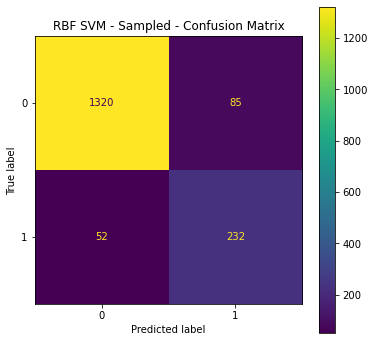

In [373]:
# plot a confusion matrix
fig, ax = plt.subplots(figsize = (6, 6))
plot_confusion_matrix(sm_rbf_svm, X_test_scaled, y_test, ax = ax)
ax.set_title('RBF SVM - Sampled - Confusion Matrix');

**Findings - RBF SVM - Sampled - Confusion Matrix:**

Of the 1,405 total true negative observations, the RBF SVM model was able to correctly classify 94% of the observations.</br>
Of the 284 total true positive observations, the model was able to accurately predict 82% of the observations.

In [374]:
# generate a classification report
sm_rbf_svm_report = classification_report(y_test, y_pred)

# display classification report
print(sm_rbf_svm_report)

              precision    recall  f1-score   support

           0       0.96      0.94      0.95      1405
           1       0.73      0.82      0.77       284

    accuracy                           0.92      1689
   macro avg       0.85      0.88      0.86      1689
weighted avg       0.92      0.92      0.92      1689



In [375]:
# store the results of the classification report above
sm_rbf_svm_precision = round(precision_score(y_test, y_pred)*100, 2)
sm_rbf_svm_recall = round(recall_score(y_test, y_pred)*100, 2)
sm_rbf_svm_f1 = round(f1_score(y_test, y_pred)*100, 2)
sm_rbf_svm_accuracy = round(accuracy_score(y_test, y_pred)*100, 2)

With calculated the performance of both the un-sampled and sampled RBF SVM models; we can evaluate the effect that sampling with SMOTE has had on the model's recall score:

In [376]:
# store the results of the un-sampled and sampled models
data = [[rbf_svm_precision, rbf_svm_recall, rbf_svm_f1, rbf_svm_accuracy], # classification report results - unsampled
        [sm_rbf_svm_precision, sm_rbf_svm_recall, sm_rbf_svm_f1, sm_rbf_svm_accuracy]] # classification report results - sampling with SMOTE (sm)

# create model performance df
rbf_svm_classification_report = pd.DataFrame(data,
                                             columns = ['Precision', 'Recall', 'F1 Score', 'Accuracy'],
                                             index = ['RBF SVM - Unsampled', 'RBF SVM - SMOTE'])

# display df
rbf_svm_classification_report

,Precision,Recall,F1 Score,Accuracy
RBF SVM - Unsampled,90.56,74.30,81.62,94.38
RBF SVM - SMOTE,73.19,81.69,77.20,91.89


With regards to the Radial Basis Function SVM model, a moderate enhancement in recall score can be seen between the `RBF SVM - SMOTE` in comparison to the `RBF SVM - Unsampled` model. So, it can be concluded that the `RBF SVM - SMOTE` model is able to accurately classify 81.69% of true positive observations. 

So far, we have evaluated the change in performance concerning a Linear and RBF model. The following section will apply the same evaluation methodology but instead towards a Polynomial SVM model.

### Polynomial SVM - No Sampling
---

First, one must instantiate and fit the Polynomial model to the scaled training data:

In [377]:
# instantiate the model
poly_svm = SVC(C = cv_optimal_poly_c, 
               kernel = 'poly', 
               max_iter = 100_000, 
               random_state = 42)

# fit the model
poly_svm.fit(X_train_scaled, y_train)

SVC(C=1000.0, kernel='poly', max_iter=100000, random_state=42)

From which, the model may then generate a set of predicted labels based on `X_test_scaled`:

In [378]:
# predict classification
y_pred = poly_svm.predict(X_test_scaled)

At which point, the model's performance may be determined and evaluated.

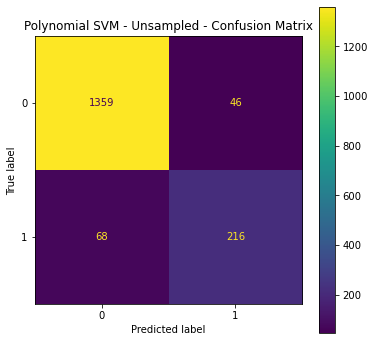

In [379]:
# plot a confusion matrix
fig, ax = plt.subplots(figsize = (6, 6))
plot_confusion_matrix(poly_svm, X_test_scaled, y_test, ax = ax)
ax.set_title('Polynomial SVM - Unsampled - Confusion Matrix');

**Findings - Polynomial SVM - Unsampled - Confusion Matrix:**

With regards to the non-churn customers (class 0), the model was able to accurately classify 97% of the observations.</br>
In the case of total number of true churn customers (class 1), a Polynomial SVM model was able to correctly classify 76% of the observations.

It is with the hope of using SMOTE for resampling that the model's performance may be increased with respect to the recall score.

In [380]:
# generate a classification report
poly_svm_report = classification_report(y_test, y_pred)

# display classification report
print(poly_svm_report)

              precision    recall  f1-score   support

           0       0.95      0.97      0.96      1405
           1       0.82      0.76      0.79       284

    accuracy                           0.93      1689
   macro avg       0.89      0.86      0.88      1689
weighted avg       0.93      0.93      0.93      1689



In [381]:
# store the results of the classification report above
poly_svm_precision = round(precision_score(y_test, y_pred)*100, 2)
poly_svm_recall = round(recall_score(y_test, y_pred)*100, 2)
poly_svm_f1 = round(f1_score(y_test, y_pred)*100, 2)
poly_svm_accuracy = round(accuracy_score(y_test, y_pred)*100, 2)

### Polynomial SVM - Sampling with SMOTE
---

In leveraging SMOTE to improve a model's recall score, we must first determine the optimal hyperparameter settings for the model: 

100%|██████████| 8/8 [00:17<00:00,  2.16s/it]


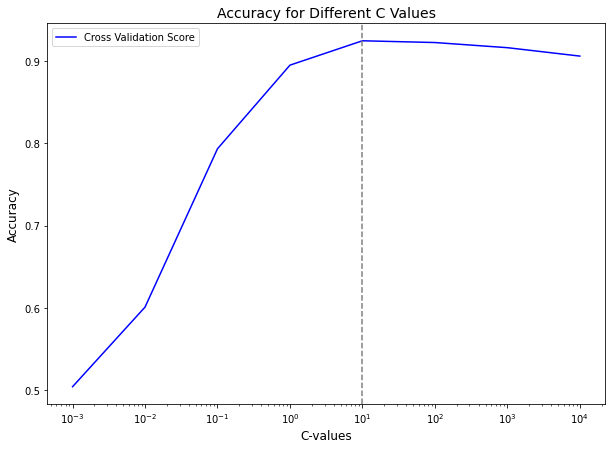

In [382]:
# create empty list
cross_val_scores = []

# set a range of possible c-values
C_values = 10. ** np.arange(-3, 5)

for c in tqdm(C_values):
    
    # instantiate the model
    poly_svm = SVC(C = c, kernel = 'poly', max_iter = 100_000, random_state = 42)
    
    # calculate the cross validation scores...
    cv_score = np.mean(cross_val_score(poly_svm, X_train_sm_scaled, y_train_sm, cv = 5))
    # ... and append them to the empty list
    cross_val_scores.append(cv_score)

    
# graph presets
plt.figure(figsize=(10, 7))

# graph data
plt.plot(C_values, cross_val_scores, label = "Cross Validation Score", color = 'blue') # plot the cross validation scores

# graph settings
plt.xscale('log') # set x-axis to logarithmic scale
plt.xlabel('C-values', fontsize = 12) # define x-axis label
plt.axvline(x = C_values[np.argmax(cross_val_scores)], color = 'grey', linestyle = '--') # plot a vertical line where the cross validation score is highest
plt.ylabel('Accuracy', fontsize = 12) # define y-axis label
plt.title("Accuracy for Different C Values", fontsize = 14) # set plot title
plt.legend()

# display graph
plt.show()

In [383]:
# display optimal value for number of neighbors
sm_cv_optimal_poly_c = C_values[np.argmax(cross_val_scores)]

f'Optimal c-value using Cross-Validation: {sm_cv_optimal_poly_c}'

'Optimal c-value using Cross-Validation: 10.0'

At this stage, the model may be instantiated and fit to the scaled train data, from which the model may then generate a set of predicted value labels.

In [384]:
# instantiate the model
sm_poly_svm = SVC(C = sm_cv_optimal_poly_c, 
                  kernel = 'poly', 
                  max_iter = 100_000, 
                  random_state = 42)

# fit the model to the scaled SMOTE train data
sm_poly_svm.fit(X_train_sm_scaled, y_train_sm)

SVC(C=10.0, kernel='poly', max_iter=100000, random_state=42)

In [385]:
# predict classification using unsampled scaled test data
y_pred = sm_poly_svm.predict(X_test_scaled)

To evaluate the model's performance, a confusion matrix and classification report can be created:

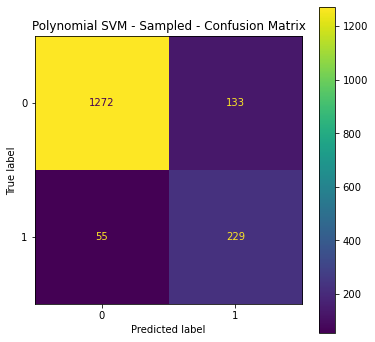

In [386]:
# plot a confusion matrix
fig, ax = plt.subplots(figsize = (6, 6))
plot_confusion_matrix(sm_poly_svm, X_test_scaled, y_test, ax = ax)
ax.set_title('Polynomial SVM - Sampled - Confusion Matrix');

**Findings - Polynomial SVM - Sampled - Confusion Matrix:**

Given the 1,405 true negative observations, the model was able to accurately predict he classification of 91% of the observations, with the remaining 133 having been misclassified.</br>
With respect to the 284 true positive observations, the model was able to correctly classify 81% of observations.

In [387]:
# generate a classification report
sm_poly_svm_report = classification_report(y_test, y_pred)

# display classification report
print(sm_poly_svm_report)

              precision    recall  f1-score   support

           0       0.96      0.91      0.93      1405
           1       0.63      0.81      0.71       284

    accuracy                           0.89      1689
   macro avg       0.80      0.86      0.82      1689
weighted avg       0.90      0.89      0.89      1689



In [388]:
# store the results of the classification report above
sm_poly_svm_precision = round(precision_score(y_test, y_pred)*100, 2)
sm_poly_svm_recall = round(recall_score(y_test, y_pred)*100, 2)
sm_poly_svm_f1 = round(f1_score(y_test, y_pred)*100, 2)
sm_poly_svm_accuracy = round(accuracy_score(y_test, y_pred)*100, 2)

With both Polynomial models having been trained on their respective datasets, we may proceed in evaluating both models:

In [389]:
# list of lists with data points
data = [[poly_svm_precision, poly_svm_recall, poly_svm_f1, poly_svm_accuracy], # polynomial (poly) svm - unsampled 
        [sm_poly_svm_precision, sm_poly_svm_recall, sm_poly_svm_f1, sm_poly_svm_accuracy]] # polynomial (poly) svm - sampling with SMOTE (sm) 

# create model performance df
poly_svm_classification_report = pd.DataFrame(data,
                                              columns = ['Precision', 'Recall', 'F1 Score', 'Accuracy'],
                                              index = ['Polynomial SVM - Unsampled', 'Polynomial SVM - SMOTE'])

# display df
poly_svm_classification_report

,Precision,Recall,F1 Score,Accuracy
Polynomial SVM - Unsampled,82.44,76.06,79.12,93.25
Polynomial SVM - SMOTE,63.26,80.63,70.90,88.87


From the results tabulate above, it can be noted that the SMOTE sampled dataset helped to increase the recall score of the Polynomial SVM by ~4% at the cost of a lower precision score.

Lastly, we will make use of the sigmoid kernel to determine the performance of this final type of SVM model.

### Sigmoid SVM - No Sampling
---

As had been conducted with the preceeding SVM models, a sigmoid SVM model must first be instantiated and fit to the scaled un-sampled training data.

In [390]:
# instantiate the model
sigmoid_svm = SVC(C = cv_optimal_sigmoid_c, 
                  kernel = 'sigmoid', 
                  max_iter = 100_000, 
                  random_state = 42)

# fit the model
sigmoid_svm.fit(X_train_scaled, y_train)

SVC(C=0.001, kernel='sigmoid', max_iter=100000, random_state=42)

Following the preceding step, the model is to then generate a set of predicted value labels (class 0 or 1) based on `X_test_scaled`:

In [391]:
# predict classification
y_pred = sigmoid_svm.predict(X_test_scaled)

Once generated, the model's performance can be evaluted (as follows):

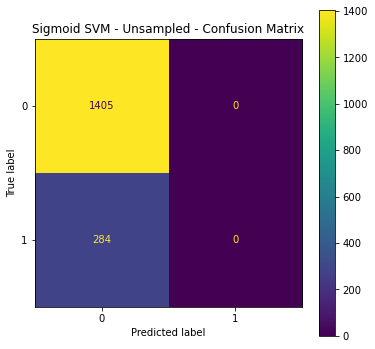

In [392]:
# plot a confusion matrix
fig, ax = plt.subplots(figsize = (6, 6))
plot_confusion_matrix(sigmoid_svm, X_test_scaled, y_test, ax = ax)
ax.set_title('Sigmoid SVM - Unsampled - Confusion Matrix');

**Findings - Sigmoid SVM - Unsampled - Confusion Matrix:**

Based on the results displayed above, it can be noted that the model was able to accurately predict 100% of the true negative observations and 0% of the true positive observations. Which is to say that the Sigmoid SVM model was unable to correctly predict any of the true positive observations and thus unable to identify any customers as churning.

Given the inherent properties of a Sigmoid SVM model and the types of decision boundaries which it utilizes to classify the observations; it may be that given the dataset and its various observations, that a Sigmoid SVM is ill-suited for this particular dataset.

In [393]:
# generate a classification report
sigmoid_svm_report = classification_report(y_test, y_pred)

# display classification report
print(sigmoid_svm_report)

              precision    recall  f1-score   support

           0       0.83      1.00      0.91      1405
           1       0.00      0.00      0.00       284

    accuracy                           0.83      1689
   macro avg       0.42      0.50      0.45      1689
weighted avg       0.69      0.83      0.76      1689



C:\Users\arnau\anaconda3\envs\capstone\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

C:\Users\arnau\anaconda3\envs\capstone\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

C:\Users\arnau\anaconda3\envs\capstone\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



In [394]:
# store the results of the classification report above
sigmoid_svm_precision = round(precision_score(y_test, y_pred)*100, 2)
sigmoid_svm_recall = round(recall_score(y_test, y_pred)*100, 2)
sigmoid_svm_f1 = round(f1_score(y_test, y_pred)*100, 2)
sigmoid_svm_accuracy = round(accuracy_score(y_test, y_pred)*100, 2)

C:\Users\arnau\anaconda3\envs\capstone\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.



### Sigmoid SVM - Sampling with SMOTE
---

With the results of the un-sampled Sigmoid SVM model having been calculated, we may proceed in leveraging cross validation to help determine the optimal hyperparameter settings for the Sigmoid SVM which is to be based on the sampled data:

100%|██████████| 8/8 [00:18<00:00,  2.34s/it]


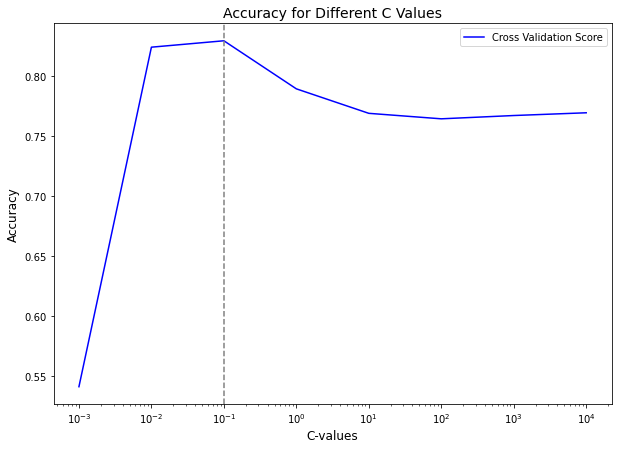

In [395]:
# create empty list
cross_val_scores = []

# set a range of possible c-values
C_values = 10. ** np.arange(-3, 5)

for c in tqdm(C_values):
    
    # instantiate the model
    sigmoid_svm = SVC(C = c, kernel = 'sigmoid', max_iter = 100_000, random_state = 42)
    
    # calculate the cross validation scores and append them to the empty list
    cv_score = np.mean(cross_val_score(sigmoid_svm, X_train_sm_scaled, y_train_sm, cv = 5))
    cross_val_scores.append(cv_score)

    
# graph presets
plt.figure(figsize=(10, 7))

# graph data
plt.plot(C_values, cross_val_scores, label="Cross Validation Score", color = 'blue') # plot the cross validation scores

# graph settings
plt.xscale('log') # set the x-axis to a logarithmic scale
plt.xlabel('C-values', fontsize = 12) # define x-axis label
plt.axvline(x = C_values[np.argmax(cross_val_scores)], color = 'grey', linestyle = '--') # plot a vertical line where cross validation score is highest
plt.ylabel('Accuracy', fontsize = 12) # define y-axis label
plt.title("Accuracy for Different C Values", fontsize = 14) # set plot title
plt.legend()

# display graph
plt.show()

In [396]:
# display optimal value for number of neighbors
sm_cv_optimal_sigmoid_c = C_values[np.argmax(cross_val_scores)]

f'Optimal c-value using Cross-Validation: {sm_cv_optimal_sigmoid_c}'

'Optimal c-value using Cross-Validation: 0.1'

The Sigmoid SVM based on the SMOTE data may then be instantiated based on the above findings as it relates to the optimal value for `c`:

In [397]:
# instantiate the model
sm_sigmoid_svm = SVC(C = sm_cv_optimal_sigmoid_c, 
                     kernel = 'sigmoid', 
                     max_iter = 100_000, 
                     random_state = 42)

# fit the model
sm_sigmoid_svm.fit(X_train_sm_scaled, y_train_sm)

SVC(C=0.1, kernel='sigmoid', max_iter=100000, random_state=42)

From which, a set of value label predictions can be generated by the model which are to be utilized for the creation of a classification report.

In [398]:
# predict classification using unsampled scaled test data
y_pred = sm_sigmoid_svm.predict(X_test_scaled)

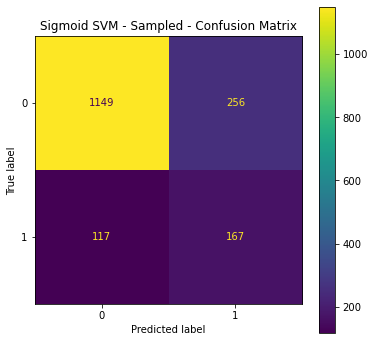

In [399]:
# plot a confusion matrix
fig, ax = plt.subplots(figsize = (6, 6))
plot_confusion_matrix(sm_sigmoid_svm, X_test_scaled, y_test, ax = ax)
ax.set_title('Sigmoid SVM - Sampled - Confusion Matrix');

**Finding - Sigmoid SVM - Sampled - Confusion Matrix:**

Of the total number of true negative observations (1,405), the model was able to accurately classify 82% of the observations.</br>
Similarly, of the 284 true positive observations, the model was able to accurately idenfity 59% of the positive observations. 

In [400]:
# generate a classification report
sm_sigmoid_svm_report = classification_report(y_test, y_pred)

# display classification report
print(sm_sigmoid_svm_report)

              precision    recall  f1-score   support

           0       0.91      0.82      0.86      1405
           1       0.39      0.59      0.47       284

    accuracy                           0.78      1689
   macro avg       0.65      0.70      0.67      1689
weighted avg       0.82      0.78      0.80      1689



In [401]:
# store the results of the classification report 
sm_sigmoid_svm_precision = round(precision_score(y_test, y_pred)*100, 2)
sm_sigmoid_svm_recall = round(recall_score(y_test, y_pred)*100, 2)
sm_sigmoid_svm_f1 = round(f1_score(y_test, y_pred)*100, 2)
sm_sigmoid_svm_accuracy = round(accuracy_score(y_test, y_pred)*100, 2)

We may then evaluate the performance of both Sigmoid SVM models by tabulating the results:

In [402]:
data = [[sigmoid_svm_precision, sigmoid_svm_recall, sigmoid_svm_f1, sigmoid_svm_accuracy], # classification report results - unsampled
        [sm_sigmoid_svm_precision, sm_sigmoid_svm_recall, sm_sigmoid_svm_f1, sm_sigmoid_svm_accuracy]] # classification report results - sampling with SMOTE (sm)

# create model performance df
sigmoid_svm_classification_report = pd.DataFrame(data,
                                                 columns = ['Precision', 'Recall', 'F1 Score', 'Accuracy'],
                                                 index = ['Sigmoid SVM - Unsampled', 'Sigmoid SVM - SMOTE'])

# display df
sigmoid_svm_classification_report

,Precision,Recall,F1 Score,Accuracy
Sigmoid SVM - Unsampled,0.00,0.0,0.00,83.19
Sigmoid SVM - SMOTE,39.48,58.8,47.24,77.92


In the case of the Sigmoid SVM model, a noticeable difference can be found in the performance of each of the models when fitted to un-sampled versus sampled data. As had previously been noted, the `Sigmoid SVM - Unsampled` model was unable to accurately classify any of the true positive observations that belong to class 1. Although, it was able to accurately classify all instances of true negative observations (class 0). However, after having been trained to the SMOTE sampled data, the model is then able to accuratly classify ~60% of the true positives.

**Concluding Remarks:**

In utilizing SMOTE to address the class imbalance, it has been found that the recall score for each had increased at the cost of a reduced precision score. Given that SMOTE nullifies class imbalance by creating synthetic data points representing the minority class (class `Churn`); the model learns more about the minority class. This, in turn, introduces bias into the model since the variance in the minority class has been magnified.

However, given that it had previously been determined that priority should be given to a model's recall score (to ensure that the model is accurately identifying actual positives correctly), the model has greater confidence in classifying all data points that are truly of the minority class. This has been achieved by leveraging SMOTE to address the class imbalance at the cost of a lower precision score.

### Machine Learning Pipeline: Sampling & Non-Ensemble Learning
---

From the set of models that have been evaluted in this section, a Machine Learning Pipeline may then be employed in order to help determine which of the preceding models is able to attain the best performance (as defined by the model's recall score).

In [403]:
# drop the 'churn' column
# save all remaining columns to the independent variable ('X')
X = customer_df_with_dummies.drop('churn', axis = 1) 

# save 'churn' to the dependent variable ('y')
y = customer_df_with_dummies['churn']

In [404]:
# test set representing 30% of the total data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, stratify = y, random_state = 42)

In [405]:
# fit SMOTE to the training data, then resample the data
X_train_sm, y_train_sm = sm.fit_resample(X_train, y_train)

In [406]:
# scale the data
scaler = StandardScaler().fit(X_train_sm)
X_train_sm_scaled = scaler.transform(X_train_sm)
X_test_scaled = scaler.transform(X_test)

In [407]:
estimators = [("scaling", StandardScaler()),
              ("model", LogisticRegression())]

pipe = Pipeline(estimators)

In [408]:
# define the parameters for a kNN
sm_knn_param_grid = {"model": [KNeighborsClassifier()],
                     "scaling": [StandardScaler()],
                     "model__n_neighbors": np.arange(1, 6)}

# define the parameters for a Decision Tree
sm_dt_param_grid = {"model": [DecisionTreeClassifier(random_state = 42)],
                    "scaling": [StandardScaler()],
                    "model__max_depth": np.arange(20, 30)}

# define the parameters for a Support Vector Classifier
sm_svc_param_grid = {"model": [SVC(max_iter = 100_000, random_state = 42)],
                     "model__kernel": ['linear', 'rbf', 'poly', 'sigmoid'],
                     "scaling": [StandardScaler()],
                     "model__C": 10.0**np.arange(-2, 3)}

param_grid = [sm_knn_param_grid,
              sm_dt_param_grid,
              sm_svc_param_grid]

The `GridSearchCV` function is then used to loop over the set of hyperparameters (as defined above) and fit each of the models to the SMOTE scaled training data.

In [409]:
# loop through the hyperparameters above
grid = GridSearchCV(pipe, param_grid, cv = 5, scoring = 'recall')

In [410]:
# fit the models to the training data
grid.fit(X_train_sm_scaled, y_train_sm); 

C:\Users\arnau\anaconda3\envs\capstone\lib\site-packages\sklearn\svm\_base.py:255: ConvergenceWarning:

Solver terminated early (max_iter=100000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.

C:\Users\arnau\anaconda3\envs\capstone\lib\site-packages\sklearn\svm\_base.py:255: ConvergenceWarning:

Solver terminated early (max_iter=100000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.

C:\Users\arnau\anaconda3\envs\capstone\lib\site-packages\sklearn\svm\_base.py:255: ConvergenceWarning:

Solver terminated early (max_iter=100000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.

C:\Users\arnau\anaconda3\envs\capstone\lib\site-packages\sklearn\svm\_base.py:255: ConvergenceWarning:

Solver terminated early (max_iter=100000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.

C:\Users\arnau\anaconda3\envs\capstone\lib\site-packages\sklearn\svm\_base.py:255: ConvergenceWarning:

Solver terminate

Once each of the models have been fit to the training data, the `best_params_` parameter may be called upon to help determine which set of parameter settigns lead to the best results.

In [411]:
grid.best_params_

{'model': SVC(C=0.01, kernel='poly', max_iter=100000, random_state=42),
 'model__C': 0.01,
 'model__kernel': 'poly',
 'scaling': StandardScaler()}

Now knowing which model performs the best in the case of sampled data, through non-ensemble learning models; we may determine how the model performs on the train and test data:

In [412]:
print(f'Model Settings: Sampling & Non-Ensemble Learning')
print(f'Sampling Method: SMOTE\n')

print(f'Model Type: Support Vector Machine')
print(f'C-Value: {list(grid.best_params_.items())[1][1]}')
print(f'Kernel: {list(grid.best_params_.items())[2][1]}\n')

print(f'ML Pipeline - Train Accuracy: {round((grid.score(X_train_sm_scaled, y_train_sm))*100, 2)}%')
print(f'ML Pipeline - Test Accuracy: {round((grid.score(X_test_scaled, y_test))*100, 2)}%')

Model Settings: Sampling & Non-Ensemble Learning
Sampling Method: SMOTE

Model Type: Support Vector Machine
C-Value: 0.01
Kernel: poly

ML Pipeline - Train Accuracy: 98.17%
ML Pipeline - Test Accuracy: 90.85%


[Back to Top](#back_to_top)

### Supervised Machine Learning Models (Sampling with SMOTE)
#### Ensemble Learning - Bagging
---
<a id="sampling_ensemble_learning"></a>


In the previous section, we looked at how a set of standalone Supervised Machine Learning Models performed on sampled data. However, in this instance, the model's predictive accuracy is constrained given that it may not benefit from ensemble methods that allow for multiple models to be collectively scored on the data to produce improved results. With that being said, the following section will leverage Ensemble Learning on the sampled data. From which, we may then compare the performance of each ensemble model based on un-sampled versus sampled data.

### K Nearest Neighbors
<a id="sampling_ensemble_knn"></a>

---

First and foremost, the data must be instantiated, split and sampled:

In [413]:
# drop the 'churn' column
# save all remaining columns to the independent variable ('X')
X = customer_df_with_dummies.drop('churn', axis = 1) 

# save 'churn' to the dependent variable ('y')
y = customer_df_with_dummies['churn']

The data is then split between a train and test set whereby the test set will make up 30% of the data.

In [414]:
# split the data such that the test set is comprised of 30% of the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, stratify = y, random_state = 42)

In [415]:
# fit SMOTE to the training data, then resample the data
X_train_sm, y_train_sm = sm.fit_resample(X_train, y_train)

It can then be confirmed that the class imbalance that had been present in the original dataset has been neutralized with the help of Synthetic Minority Oversampling Technique:

In [416]:
# class distribution pre-SMOTE
print('Original class distribution')
display(pd.Series(y_train).value_counts().sort_index())

# class distribution post-SMOTE
print('\nResampled class distribution')
display(pd.Series(y_train_sm).value_counts().sort_index())

Original class distribution


0    3277
1     664
Name: churn, dtype: int64


Resampled class distribution


0    3277
1    3277
Name: churn, dtype: int64

The data must then be scaled given that K Nearest Neighbors are distance based classifiers.

In [417]:
# scale the sampled train data and the unsampled test data
ss_sm = StandardScaler().fit(X_train_sm)
X_train_sm_scaled = ss_sm.transform(X_train_sm)
X_test_scaled = ss_sm.transform(X_test)

At which point, the optimal value for `n_neighbors` can be determined with the help of cross validation:

100%|██████████| 50/50 [00:29<00:00,  1.72it/s]


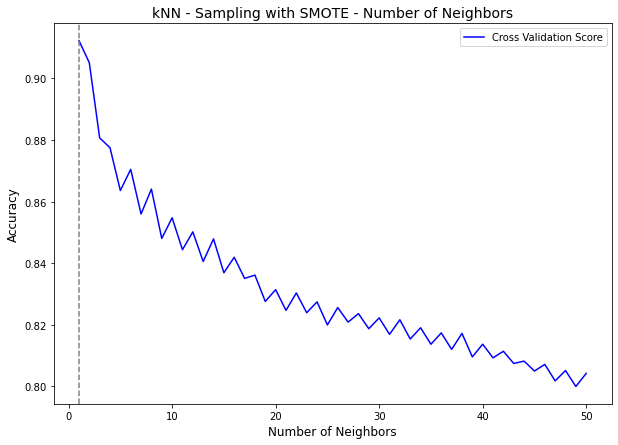

In [418]:
# create empty list
cross_val_scores = []

# set a list of possible values for k
k_values = list(range(1, 51))

for k in tqdm(k_values):
    
    # instantiate the model
    knn = KNeighborsClassifier(n_neighbors=k)
    
    # calculate the cross validation scores and append to the empty list
    cv_score = np.mean(cross_val_score(knn, X_train_sm_scaled, y_train_sm, cv = 5))
    cross_val_scores.append(cv_score)

    
# graph presets
plt.figure(figsize=(10, 7))

# graph data
plt.plot(k_values, cross_val_scores, label="Cross Validation Score", color = 'blue') # plot the cross validation scores

# graph settings
plt.xlabel('Number of Neighbors', fontsize = 12) # set the x-axis label
plt.axvline(x = k_values[np.argmax(cross_val_scores)], color = 'grey', linestyle = '--') # plot a vertical line where the cross validation score is highest
plt.ylabel('Accuracy', fontsize = 12) # set the y-axis label
plt.title("kNN - Sampling with SMOTE - Number of Neighbors", fontsize = 14) # define the plot title
plt.legend()

# display graph
plt.show()

In [419]:
# retrieve the optimal value for c
# for an ensemble kNN model based on SMOTE sampled data
ensemble_knn_sm_cv_optimal_n_neighbors = k_values[np.argmax(cross_val_scores)]

f'Optimal number of neighbors using Cross-Validation: {ensemble_knn_sm_cv_optimal_n_neighbors}'

'Optimal number of neighbors using Cross-Validation: 1'

Having identified the optimal number of neighbors (1), the same methodology may be applied in determining the optimal number of estimators given a hyperparameter setting of 1 for `n_neighbors`.  

100%|██████████| 50/50 [06:17<00:00,  7.55s/it]


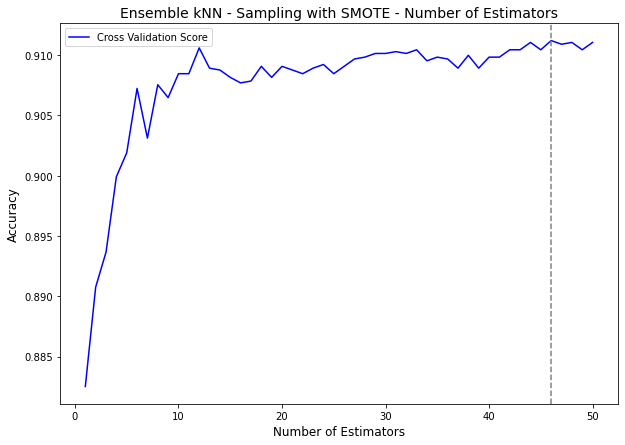

In [420]:
# create empty list
cross_val_scores = []

# define a range of possible values for 'n_estimator'
n_estimator = list(range(1, 51))

for n in tqdm(n_estimator):
    
    # instantiate the model
    ensemble_knn = BaggingClassifier(KNeighborsClassifier(n_neighbors = ensemble_knn_sm_cv_optimal_n_neighbors),
                                     n_estimators = n,
                                     random_state = 42)
    
    # calculate the cross validation scores and append to the empty list
    cv_score = np.mean(cross_val_score(ensemble_knn, X_train_sm_scaled, y_train_sm, cv = 5))
    cross_val_scores.append(cv_score)

    
# graph presets
plt.figure(figsize=(10, 7))

# graph data
plt.plot(k_values, cross_val_scores, label="Cross Validation Score", color = 'blue') # plot the cross validation scores

# graph settings
plt.xlabel('Number of Estimators', fontsize = 12) # define x-axis label
plt.axvline(x = n_estimator[np.argmax(cross_val_scores)], color = 'grey', linestyle = '--') # plot a vertical line where the cross validation score is highest
plt.ylabel('Accuracy', fontsize = 12) # define y-axis label
plt.title("Ensemble kNN - Sampling with SMOTE - Number of Estimators", fontsize = 14) # set plot title
plt.legend()

# display graph
plt.show()

In [421]:
# retrieve the optimal value for 'n_estimator'
ensemble_knn_sm_cv_optimal_estimators = n_estimator[np.argmax(cross_val_scores)]

f'Optimal number of estimators using Cross-Validation: {ensemble_knn_sm_cv_optimal_estimators}'

'Optimal number of estimators using Cross-Validation: 46'

Lastly, the model's performance may be evaluted after having defined each of the hyperparameter settings:

In [422]:
# instantiate the model
ensemble_knn_sm = BaggingClassifier(KNeighborsClassifier(n_neighbors = ensemble_knn_sm_cv_optimal_n_neighbors),
                                    n_estimators = ensemble_knn_sm_cv_optimal_estimators,
                                    random_state = 42)

# fit the model
ensemble_knn_sm.fit(X_train_sm_scaled, y_train_sm)

# score the model on train and test data
print(f'Number of Neighbors: {ensemble_knn_sm_cv_optimal_n_neighbors}')
print(f'Number of Estimators: {ensemble_knn_sm_cv_optimal_estimators}\n')

print(f'Train accuracy: {(ensemble_knn_sm.score(X_train_sm_scaled, y_train_sm)*100):.2f}%')
print(f'Test accuracy: {(ensemble_knn_sm.score(X_test_scaled, y_test)*100):.2f}%')

Number of Neighbors: 1
Number of Estimators: 46

Train accuracy: 99.94%
Test accuracy: 88.22%


In [423]:
# store the model's accuracy
ensemble_knn_sm_train_accuracy = round((ensemble_knn_sm.score(X_train_sm_scaled, y_train_sm)*100), 2)
ensemble_knn_sm_test_accuracy = round((ensemble_knn_sm.score(X_test_scaled, y_test)*100), 2)

The `.predict()` function may then be called upon to allow for the model to generate a set of predicted value labels (which are to be stored in the `y_pred` variable).

In [424]:
# generate a set of predicted value labels
y_pred = ensemble_knn_sm.predict(X_test_scaled)

From which, a confusion matrix and classification report can be generated:

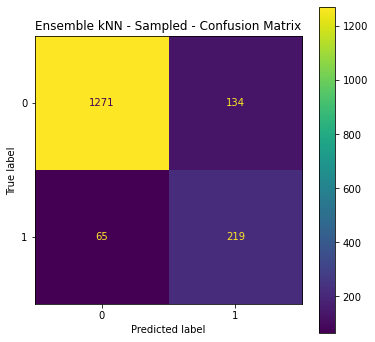

In [425]:
# plot a confusion matrix
fig, ax = plt.subplots(figsize = (6, 6))
plot_confusion_matrix(ensemble_knn_sm, X_test_scaled, y_test, ax = ax)
ax.set_title('Ensemble kNN - Sampled - Confusion Matrix');

**Findings - Ensemble kNN - Sampled - Confusion Matrix:**

The majority of true negatives were accurately predicted as non-churn customers (90%).</br>
Of the 284 true positive observations, the model was able to accurately classify 219 of them (or 77%).

Note, however, that the model incorrectly classified 65 observations as non-churn customers although they belong to class 1.

In [426]:
# generate a classification report
ensemble_knn_sm_report = classification_report(y_test, y_pred)

print(ensemble_knn_sm_report)

              precision    recall  f1-score   support

           0       0.95      0.90      0.93      1405
           1       0.62      0.77      0.69       284

    accuracy                           0.88      1689
   macro avg       0.79      0.84      0.81      1689
weighted avg       0.90      0.88      0.89      1689



In [427]:
# store the results of the classification report above
ensemble_knn_sm_precision = round(precision_score(y_test, y_pred)*100, 2)
ensemble_knn_sm_recall = round(recall_score(y_test, y_pred)*100, 2)
ensemble_knn_sm_f1 = round(f1_score(y_test, y_pred)*100, 2)
ensemble_knn_sm_accuracy = round(accuracy_score(y_test, y_pred)*100, 2)

Having instantiated, fit and scored both sets of kNN models (un-sampled vs. SMOTE sampled), a results dataframe can be created to compare how the performance in the models differ:

In [428]:
# performance data for both ensemble kNN (un-sampled) vs. ensemble kNN (SMOTE)
data = [[cv_optimal_n_neighbors, ensemble_knn_sm_cv_optimal_n_neighbors], # number of neighbors (un-sampled vs. sampled)
        [cv_optimal_n_estimators, ensemble_knn_sm_cv_optimal_estimators], # number of estimators (un-sampled vs. sampled)
        [ensemble_knn_train_accuracy, ensemble_knn_sm_train_accuracy], # training accuracies (un-sampled vs. sampled)
        [ensemble_knn_test_accuracy, ensemble_knn_sm_test_accuracy], # test accuracies (un-sampled vs. sampled)
        [ensemble_knn_precision, ensemble_knn_sm_precision], # precision scores (un-sampled vs. sampled)
        [ensemble_knn_recall, ensemble_knn_sm_recall], # recall scores (un-sampled vs. sampled) 
        [ensemble_knn_f1, ensemble_knn_sm_f1],] # F1 scores(un-sampled vs. sampled)
    

# create model performance df
ensemble_knn_results_report = pd.DataFrame(data,
                                           columns = ['Ensemble kNN', 'Ensemble kNN - SMOTE'],
                                           index = ['Number of Neighbors', 
                                                    'Number of Estimators', 
                                                    'Train Accuracy', 
                                                    'Test Accuracy',
                                                    'Precision Score',
                                                    'Recall Score',
                                                    'F1 Score'])

# display df
ensemble_knn_results_report

,Ensemble kNN,Ensemble kNN - SMOTE
Number of Neighbors,1.00,1.00
Number of Estimators,36.00,46.00
Train Accuracy,99.85,99.94
Test Accuracy,92.72,88.22
Precision Score,79.27,62.04
Recall Score,76.76,77.11
F1 Score,78.00,68.76


Given that we are seeking to optimize for recall, it can be found that the model which had been trained on the sampled data performed marginally better than that of the 'Ensemble kNN'. However, the marginally improvement in recall score for the 'Ensemble kNN - SMOTE' model did come at the cost of lower test accuracy, precision and F1 scores.

In the following section, we will evaluate the performance of Random Forest models to determine if we can construct a more powerful model in terms of predictive power, in comparison to an Ensemble kNN.

[Back to Top](#back_to_top)

### Random Forests
<a id="sampling_random_forests"></a>

---

At the onset of every model creation phase, the `X` and `y` variables are re-instantiated to ensure that the model is in fact being trained and test on the desired dataset. Once instantiated, the data must then be split into a train / test set and then sampled (as outlined in the code cells below).

In [429]:
# # drop the 'churn' column
# # save all remaining columns to the independent variable ('X')
# X = customer_df_with_dummies.drop('churn', axis = 1) 

# # save 'churn' to the dependent variable ('y')
# y = customer_df_with_dummies['churn']

In [430]:
# # split the data in two groups: train and test set
# # test set representing 30% of the remainder data
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, stratify = y, random_state = 42)

In [431]:
# # fit SMOTE to the training data, then resample the data
# X_train_sm, y_train_sm = sm.fit_resample(X_train, y_train)

The class distributions are the re-evaluated to ensure that the class imbalance has been addressed with the help of SMOTE; from which it can be observed that the number of observations between class 0 and 1 are now even.

In [432]:
# class distributoin pre-SMOTE
print('Original class distribution')
display(pd.Series(y_train).value_counts().sort_index())

# class distribution post-SMOTE
print('\nResampled class distribution')
display(pd.Series(y_train_sm).value_counts().sort_index())

Original class distribution


0    3277
1     664
Name: churn, dtype: int64


Resampled class distribution


0    3277
1    3277
Name: churn, dtype: int64

At which point, the data may be scaled using the `StandardScaler()`:

In [433]:
# scale the sampled train data and the un-sampled test data
ss_sm = StandardScaler().fit(X_train_sm) # fit the scaler to the SMOTE train data
X_train_sm_scaled = ss_sm.transform(X_train_sm) # transform the SMOTE train data
X_test_scaled = ss_sm.transform(X_test) # transform the test data

Using cross validation, the optimal number of estimators may then be determined for the Random Forest model:

100%|██████████| 50/50 [00:25<00:00,  1.99it/s]


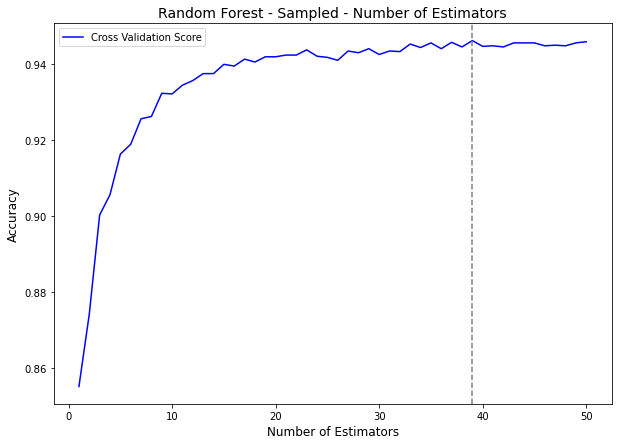

In [434]:
# instantiate an empty list
cross_val_scores = []

# define a set of possible values for 'n_estimators'
n_estimator = range(1, 51)

for n in tqdm(n_estimator):
    
    # instantiate the Random Forest model
    rf_model = RandomForestClassifier(n_estimators = n, random_state = 42)
    
    # calculate the cross validation scores and append them to the empty list
    cv_score = np.mean(cross_val_score(rf_model, X_train_sm_scaled, y_train_sm,cv = 5))
    cross_val_scores.append(cv_score)

# graph presets
plt.figure(figsize=(10, 7))

# graph data
plt.plot(n_estimator, cross_val_scores, label="Cross Validation Score", color = 'blue') # plot the cross validation scores

# graph settings
plt.xlabel('Number of Estimators', fontsize = 12) # define an x-axis label
plt.axvline(x = n_estimator[np.argmax(cross_val_scores)], color = 'grey', linestyle = '--') # plot a vertical line where the cross validation score is highest
plt.ylabel('Accuracy', fontsize = 12) # define a y-axis label
plt.title("Random Forest - Sampled - Number of Estimators", fontsize = 14) # define the plot title
plt.legend()

# display graph
plt.show()

In [435]:
# identify and store the optimal number of estimators
rf_ensemble_sm_cv_optimal_estimators = n_estimator[np.argmax(cross_val_scores)]

# print the results
f'Optimal number of estimators using Cross-Validation: {rf_ensemble_sm_cv_optimal_estimators}'

'Optimal number of estimators using Cross-Validation: 39'

With the optimal number of estimators having been identified, the same process may be employed as above to help determine the optimal `max_depth` of the Random Forest model.

100%|██████████| 61/61 [00:43<00:00,  1.41it/s]


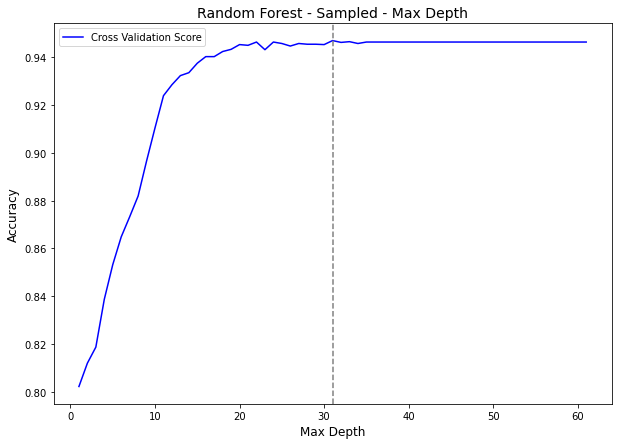

In [436]:
# instantiate an empty list
cross_val_scores = []

# define a range of potential max depth values
depth_values = list(range(1, int(np.sqrt(X_train.shape[0]))))

for depth in tqdm(depth_values):
    
    # instantiate a random forest model
    rf_model = RandomForestClassifier(n_estimators = rf_ensemble_sm_cv_optimal_estimators, 
                                      max_depth = depth, 
                                      random_state = 42)
    
    # calculate the cross validation score for each depth value
    cv_score = np.mean(cross_val_score(rf_model, X_train_sm_scaled, y_train_sm,cv = 5))
    
    # append the scores to the empty list
    cross_val_scores.append(cv_score)

# graph presets
plt.figure(figsize=(10, 7))

# graph data
plt.plot(depth_values, cross_val_scores, label="Cross Validation Score", color = 'blue') # plot the scores

# graph settings
plt.xlabel('Max Depth', fontsize = 12) # define the x-axis label
plt.axvline(x = depth_values[np.argmax(cross_val_scores)], color = 'grey', linestyle = '--') # plot a vertical line where the cross validation score is highest
plt.ylabel('Accuracy', fontsize = 12) # define a y-axis label
plt.title("Random Forest - Sampled - Max Depth", fontsize = 14) # set the plot title
plt.legend()

# display graph
plt.show()

The optimal value for `max_depth` appears to reside around the '30' marker. So, in utilizing `np.argmax()`, the optimal value for `max_depth` can be confirmed:

In [437]:
# identify and store the optimal value for 'max_depth'
rf_ensemble_sm_cv_optimal_max_depth = depth_values[np.argmax(cross_val_scores)]

# print the result
f'Optimal max depth using Cross-Validation: {rf_ensemble_sm_cv_optimal_max_depth}'

'Optimal max depth using Cross-Validation: 31'

Having confirmed the ideal hyper-parameter settings, the Random Forest model may then be instantiated, fit to the train data and scored:

In [438]:
# instantiate the random forest model
rf_sm_model = RandomForestClassifier(n_estimators = rf_ensemble_sm_cv_optimal_estimators, 
                                     max_depth = rf_ensemble_sm_cv_optimal_max_depth,
                                     random_state = 42)

# fit model to the scaled SMOTE train data
rf_sm_model.fit(X_train_sm_scaled, y_train_sm)

# score the model on train and test data
print(f'Number of Estimators: {rf_ensemble_sm_cv_optimal_estimators}')
print(f'Max Depth: {rf_ensemble_sm_cv_optimal_max_depth}\n')

print(f'Train accuracy: {(rf_sm_model.score(X_train_sm_scaled, y_train_sm)*100):.2f}%')
print(f'Test accuracy: {(rf_sm_model.score(X_test_scaled, y_test)*100):.2f}%')

Number of Estimators: 39
Max Depth: 31

Train accuracy: 100.00%
Test accuracy: 93.72%


As can be noted from the results displayed above, the Random Forest model has attained a training accuracy of nearly 94%. It can be argued that given the divergence in performance between the model's train and test accuracy, that it has slightly over-fit to the training data.

In [439]:
# store the model's performance
rf_ensemble_sm_train_accuracy = round((rf_sm_model.score(X_train_sm_scaled, y_train_sm)*100), 2)
rf_ensemble_sm_test_accuracy = round((rf_sm_model.score(X_test_scaled, y_test)*100), 2)

The model may then be used to generated a set of predicted value labels, which can be used to create a classification report alongside the confusion matrix below.

In [440]:
# generate a set of predicted value labels based on the 'X_test_scaled' data 
y_pred = rf_sm_model.predict(X_test_scaled)

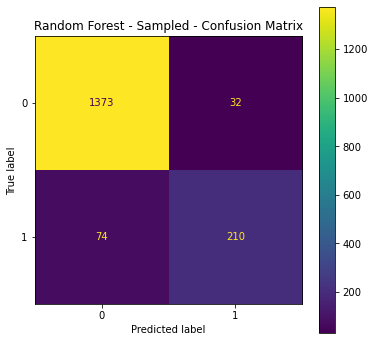

In [441]:
# plot a confusion matrix
fig, ax = plt.subplots(figsize = (6, 6))
plot_confusion_matrix(rf_sm_model, X_test_scaled, y_test, ax = ax)
ax.set_title('Random Forest - Sampled - Confusion Matrix');

**Findings - Random Forest - Sampled - Confusion Matrix:**

From the results represented in the confusion matrix above, it may be noted that the model was able to accurately predict 98% of the true negative observations.<br>
Conversely, of the total number of true positives, the model was able to accurately identify 74% of the observations belonging to class 1.

The results of which may be substantiated through the utilization of a classification report, as demonstrated below:

In [442]:
# generate a classification report for the Random Forest - Sampled model
rf_sm_report = classification_report(y_test, y_pred)

# display the results of the report
print(rf_sm_report)

              precision    recall  f1-score   support

           0       0.95      0.98      0.96      1405
           1       0.87      0.74      0.80       284

    accuracy                           0.94      1689
   macro avg       0.91      0.86      0.88      1689
weighted avg       0.94      0.94      0.94      1689



In [443]:
# store the results of the classification report above
rf_ensemble_sm_precision = round(precision_score(y_test, y_pred)*100, 2)
rf_ensemble_sm_recall = round(recall_score(y_test, y_pred)*100, 2)
rf_ensemble_sm_f1 = round(f1_score(y_test, y_pred)*100, 2)
rf_ensemble_sm_accuracy = round(accuracy_score(y_test, y_pred)*100, 2)

At which point, the model's performance may then compared to the of the 'original' Random Forest that had not been trained on the SMOTE sampled data.

In [444]:
# performance data for both Random Forest (un-sampled) vs. ensemble Random Forest (SMOTE)
data = [[cv_optimal_n_estimator, rf_ensemble_sm_cv_optimal_estimators], # number of neighbors (un-sampled vs. SMOTE)
        [rf_cv_optimal_max_depth, rf_ensemble_sm_cv_optimal_max_depth], # number of estimators (un-sampled vs. SMOTE)
        [rf_cv_train_accuracy, rf_ensemble_sm_train_accuracy], # training accuracies (un-sampled vs. SMOTE)
        [rf_cv_test_accuracy, rf_ensemble_sm_test_accuracy], # test accuracies (un-sampled vs. SMOTE)
        [rf_precision, rf_ensemble_sm_precision], # precision scores (un-sampled vs. SMOTE)
        [rf_recall, rf_ensemble_sm_recall], # recall scores (un-sampled vs. SMOTE)
        [rf_f1, rf_ensemble_sm_f1]] # F1 scores (un-sampled vs. SMOTE)


# create model performance df
rf_results_report = pd.DataFrame(data,
                                 columns = ['Random Forest', 'Random Forest - SMOTE'],
                                 index = ['Number of Neighbors', 
                                          'Number of Estimators', 
                                          'Train Accuracy', 
                                          'Test Accuracy',
                                          'Precision Score',
                                          'Recall Score',
                                          'F1 Score'])

# display df
rf_results_report

,Random Forest,Random Forest - SMOTE
Number of Neighbors,37.00,39.00
Number of Estimators,22.00,31.00
Train Accuracy,100.00,100.00
Test Accuracy,95.32,93.72
Precision Score,91.84,86.78
Recall Score,79.23,73.94
F1 Score,85.07,79.85


As demonstrated in the dataframe above, it has been found that in the case of the Random Forest models, leveraging SMOTE has led to a reduced performance across each of the 4 model evaluation metrics: Test Accuracy, Precision Score, Recall Score and F1 Score. Though SMOTE sampled datasets generally lead to an enhancement in the recall score of the model, in this particular case of a Random Forest model, it can be noted that the recall score dropped by approximately 6%.

In the final part of the `Supervised Machine Learning Models (Sampling with SMOTE - Ensemble Learning`) section of the Notebook, we will evaluate the performance of Support Vector Machine (SVM) models through a Voting Classifier. A Voting Classifier is a machine learning model that trains on an ensemble of different models and predicts an output (whether an observation belongs to class 0 or 1). In this instance, a Voting Classifier will be leveraged in using each of the 4 different types of SVM kernels: Linear, Radial Basis Function (RBF), Polynomial and Sigmoid. The benefit of which is to leverage the inherent properties of each type of kernel (ie. the types of decision boundaries that they are able to deploy) in predicting the class of a given observation.

[Back to Top](#back_to_top)

### Support Vector Machines (SVM)
<a id="sampling_ensemble_svm"></a>

---

In creating an ensemble of Support Vector Machines, the dependent (`y`) and independent (`X`) variables are re-instantiated using the `customer_df_with_dummies` dataframe.

In [445]:
# # drop the 'churn' column
# # save all remaining columns to the independent variable ('X')
# X = customer_df_with_dummies.drop('churn', axis = 1) 

# # save 'churn' to the dependent variable ('y')
# y = customer_df_with_dummies['churn']

Once the `X` and `y` variables have been instantiated, each is split between a train and test set, whereby the test set will represent 30% of the data in the entire dataframe. The `stratify` function is leveraged to ensure that the proportion of observations in each class remains the same between the train and test data.

In [446]:
# # split the data in two groups: training and test set
# # test set representing 30% of the data
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, stratify = y, random_state = 42)

The training data may then be fit to SMOTE to address the class imbalance (as demonstrated in the code cell below):

In [447]:
# # fit SMOTE to the training data, then resample the data
# X_train_sm, y_train_sm = sm.fit_resample(X_train, y_train)

In [448]:
# pre-SMOTE class distribution
print('Original class distribution')
display(pd.Series(y_train).value_counts().sort_index())

# post-SMOTE class distribution
print('\nResampled class distribution')
display(pd.Series(y_train_sm).value_counts().sort_index())

Original class distribution


0    3277
1     664
Name: churn, dtype: int64


Resampled class distribution


0    3277
1    3277
Name: churn, dtype: int64

In the code cell above, we display the class imbalance that is present in the original dataset (Count 0: 3,277 - Count 1: 664) and the class balance of the training data following the implementation of SMOTE (where we may observe an equal frequency of both classes). At which point, the data is scaled and fit using `StandardScaler()` since Support Vector Machine models are distance based.

In [449]:
# # scale and fit the data
# scaler = StandardScaler()
# scaler.fit(X_train)

# # scale the sampled train data and the unsampled test data
# ss_sm = StandardScaler().fit(X_train_sm)
# X_train_sm_scaled = ss_sm.transform(X_train_sm)
# X_test_scaled = ss_sm.transform(X_test)

In [450]:
# import VotingClassifier
from sklearn.ensemble import VotingClassifier

In deploying an ensemble of Support Vector Machines, the `VotingClassifier` is imported from `sklearn.ensemble` as this will allow for the creation of an ensemble of different models. In the case of SVMs, an ensemble will be comprised of a group of Support Vector Classification models with differing kernels: `Linear`, `RBF`, `Poly`, `Sigmoid`. In doing so, we may leverage the predictive power of each model and circumvente any underlying issues that may exist based on the type of model itself. For example, if the dataset is not linearly separable, then a linear model will be unable to fit to non-linear data.

In [451]:
# instantiate a linear SVM
sm_linear_svm = SVC(C = sm_cv_optimal_linear_c,
                    kernel = 'linear', # set the kernel to linear
                    probability = True, 
                    random_state = 42)

# instantiate a RBF SVM
sm_rbf_svm = SVC(C = sm_cv_optimal_rbf_c,
                 kernel = 'rbf', # set the kernel to RBF
                 probability = True, 
                 random_state = 42)

# instantiate a polynomial SVM
sm_poly_svm = SVC(C = sm_cv_optimal_poly_c,
                  kernel = 'poly', # set the kernel to poly
                  probability = True, 
                  random_state = 42)

# instantiate a sigmoid SVM
sm_sigmoid_svm = SVC(C = sm_cv_optimal_sigmoid_c,
                     kernel = 'sigmoid', # set the kernel to sigmoid
                     probability = True, 
                     random_state = 42)

With each of the 4 different SVM models having been instantiated, a `VotingClassifier()` can then be used to create an ensemble to SVMs. In the case of the `VotingClassifier()`, the `voting` mechanism has been designated as "soft" which means that the model will predict the class of an observation based on the largest summed probability across the 4 different types of SVM models. To the contrary of "soft" voting is "hard" voting; which predicts the class of an observation based on the largest sum of votes from all the models.

In [452]:
# instantiate a Voting Classifier with the 4 different SVMs
sm_svm_voting_ensemble = VotingClassifier(estimators = [('Linear SVM', sm_linear_svm),
                                                        ('RBF SVM', sm_rbf_svm),
                                                        ('Polynomial SVM', sm_poly_svm),
                                                        ('Sigmoid SVM', sm_sigmoid_svm)],
                                          voting = 'soft') # define the voting mechanism

In [453]:
# fit the voting ensemble to the scaled SMOTE train data
sm_svm_voting_ensemble.fit(X_train_sm_scaled, y_train_sm);

# score the voting ensemble
print(f'Voting Ensemble - Train Accuracy: {round((sm_svm_voting_ensemble.score(X_train_sm_scaled, y_train_sm))*100, 2)}%')
print(f'Voting Ensemble - Test Accuracy: {round((sm_svm_voting_ensemble.score(X_test_scaled, y_test))*100, 2)}%')

Voting Ensemble - Train Accuracy: 97.67%
Voting Ensemble - Test Accuracy: 90.29%


The results of which are to be saved in a set of variables which are to be called upon in the subsequent code cells when comparing this particular model's performance to that of an SVM Voting Ensemble which had been trained on un-sampled data.

In [454]:
# the results of the model's performance are then store in a set of variables
vote_ensemble_sm_cv_train_accuracy = round((sm_svm_voting_ensemble.score(X_train_sm_scaled, y_train_sm)*100), 2)
vote_ensemble_sm_cv_test_accuracy = round((sm_svm_voting_ensemble.score(X_test_scaled, y_test)*100), 2)

The model is to then generate a set of predict value labels through the use of the `.predict()` function:

In [455]:
# generate a set of predicted value labels
y_pred = sm_svm_voting_ensemble.predict(X_test_scaled)

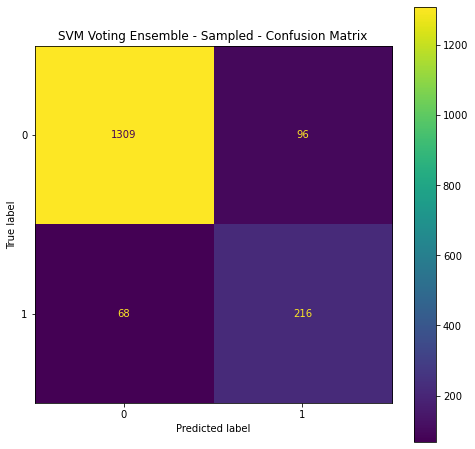

In [456]:
# plot a confusion matrix
fig, ax = plt.subplots(figsize = (8, 8))
plot_confusion_matrix(sm_svm_voting_ensemble, X_test_scaled, y_test, ax = ax)
ax.set_title('SVM Voting Ensemble - Sampled - Confusion Matrix');

**Findings - SVM Voting Ensemble - Sampled - Confusion Matrix:**

Based on the results displayed in the first row of the confusion matrix, it can be found that the vast majority of true negatives were correctly classified by the model.</br>
The same may be said concerning the second row of the confusion matrix which illustrates that that the model accurately predicted 76% of the observations as belonging to class 1.

In [457]:
# generate a classification report
sm_svm_voting_ensemble_report = classification_report(y_test, y_pred)

# display the results
print(sm_svm_voting_ensemble_report)

              precision    recall  f1-score   support

           0       0.95      0.93      0.94      1405
           1       0.69      0.76      0.72       284

    accuracy                           0.90      1689
   macro avg       0.82      0.85      0.83      1689
weighted avg       0.91      0.90      0.90      1689



In [458]:
# store the results of the classification report above
svm_voting_ensemble_sm_precision = round(precision_score(y_test, y_pred)*100, 2)
svm_voting_ensemble_sm_recall = round(recall_score(y_test, y_pred)*100, 2)
svm_voting_ensemble_sm_f1 = round(f1_score(y_test, y_pred)*100, 2)
svm_voting_ensemble_sm_accuracy = round(accuracy_score(y_test, y_pred)*100, 2)

The results of which may then be tabulated to allow for us to compare the model's performance when trained on un-sampled versus sampled data:

In [459]:
data = [[cv_optimal_linear_c, sm_cv_optimal_linear_c], # c-values for linear svm (unsampled vs. SMOTE)
        [cv_optimal_rbf_c, sm_cv_optimal_rbf_c], # c-values for RBF svm (unsampled vs. SMOTE)
        [cv_optimal_poly_c, sm_cv_optimal_poly_c], # c-values for polynomial svm (unsampled vs. SMOTE)
        [cv_optimal_sigmoid_c, sm_cv_optimal_sigmoid_c], # c-values for sigmoid svm (unsampled vs. SMOTE)
        [vote_ensemble_cv_train_accuracy, vote_ensemble_sm_cv_train_accuracy], # training accuracies (unsampled vs. SMOTE)
        [vote_ensemble_cv_test_accuracy, vote_ensemble_sm_cv_test_accuracy], # test accuracies (unsampled vs. SMOTE)
        [svm_voting_ensemble_precision, svm_voting_ensemble_sm_precision], # precision scores (un-sampled vs. SMOTE)
        [svm_voting_ensemble_recall, svm_voting_ensemble_sm_recall], # recall scores (un-sampled vs. SMOTE)
        [svm_voting_ensemble_f1, svm_voting_ensemble_sm_f1]] # F1 scores (un-sampled vs. SMOTE)



# create model performance df
svm_vote_ensemble_report = pd.DataFrame(data,
                                        columns = ['SVM - Voting Ensemble', 'SVM - Voting Ensemble - SMOTE'],
                                        index = ['Linear - C Value', 
                                                 'RBF - C Value', 
                                                 'Polynomial - C Value', 
                                                 'Sigmoid - C Value', 
                                                 'Train Accuracy', 
                                                 'Test Accuracy',
                                                 'Precision Score',
                                                 'Recall Score',
                                                 'F1 Score'])

# display df
svm_vote_ensemble_report

,SVM - Voting Ensemble,SVM - Voting Ensemble - SMOTE
Linear - C Value,0.100,10.00
RBF - C Value,10000.000,100.00
Polynomial - C Value,1000.000,10.00
Sigmoid - C Value,0.001,0.10
Train Accuracy,97.180,97.67
Test Accuracy,93.190,90.29
Precision Score,90.050,69.23
Recall Score,66.900,76.06
F1 Score,76.770,72.48


From the dataframe above, it can be noted that the sampling of data has led to diverging hyper parameter settings for each of the Support Vector Machine models. The result of which has led to a ~10% increase in the recall score of the `SVM - Voting Ensemble - SMOTE` model. However, an increase in the recall score has come at the cost of a drop in the model's test accuracy, precision and F1 scores.

Having deployed and measured the performance of a k Nearest Neighbors, Random Forest and SVM Voting Ensemble model; a machine learning pipeline is to be utilized to help determine which of these models is capable of the most predictive power.

### Machine Learning Pipeline: Sampling & Ensemble Learning
---

In [460]:
# drop the 'churn' column
# save all remaining columns to the independent variable ('X')
X = customer_df_with_dummies.drop('churn', axis = 1) 

# save 'churn' to the dependent variable ('y')
y = customer_df_with_dummies['churn']

In [461]:
# test set representing 30% of the total data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, stratify = y, random_state = 42)

In [462]:
# fit SMOTE to the training data, then resample the data
X_train_sm, y_train_sm = sm.fit_resample(X_train, y_train)

In [463]:
# scale the data
scaler = StandardScaler().fit(X_train_sm)
X_train_sm_scaled = scaler.transform(X_train_sm)
X_test_scaled = scaler.transform(X_test)

In [464]:
# pass a list of tuples to the estimator
estimators = [("scaling", StandardScaler()),
              ("model", LogisticRegression())]

pipe = Pipeline(estimators)

In [465]:
# define a set of parameters for kNN
ensemble_knn_param_grid = {"model": [BaggingClassifier(KNeighborsClassifier(), random_state = 42)],
                           "scaling": [StandardScaler()],
                           "model__base_estimator__n_neighbors": np.arange(1, 6),
                           "model__n_estimators": np.arange(45, 56)}

# define a set of parameters for Random Forest
rf_param_grid = {"model": [RandomForestClassifier(random_state = 42)],
                 "scaling": [StandardScaler()],
                 "model__max_depth": np.arange(30, 36),
                 "model__n_estimators": np.arange(35, 41)}

# define a set of parameters for SVM Voting Ensemble
# based on the parameters used for the Voting Ensemble trained on the SMOTE data
voting_ensemble_param_grid = {"model": [sm_svm_voting_ensemble],
                              "scaling": [StandardScaler()]}

# pass each model's parameters as a list
param_grid = [ensemble_knn_param_grid,
              rf_param_grid,
              voting_ensemble_param_grid]

The `GridSearchCV` function is then leveraged to help identify which set of parameters are used to construct the best estimator. Note that in this case, that `recall` is passed as an argument to the `scoring` parameter. This will result in the `GridSearchCV` function to determine which model will attain the highest recall score.

In [466]:
# evaluate the model performance based on recall
grid = GridSearchCV(pipe, param_grid, cv = 5, scoring = 'recall')

The `grid.fit()` function is then called upon in order to loop over the set of hyper parameters (contained within the `param_grid` variable - as defined above) and fit the models to the training set.

*Note: The following `grid.fit()` function may take up to ~20 minutes to execute*

In [467]:
# fit the models to the scaled SMOTE train data
grid.fit(X_train_sm_scaled, y_train_sm); 

At which point, the model that attained the highest recall score can be determined with the help of `.best_params_` which returns the parameter settings that produced the best results.

In [468]:
# identify the best set of parameters
grid.best_params_

{'model': BaggingClassifier(base_estimator=KNeighborsClassifier(n_neighbors=2),
                   n_estimators=49, random_state=42),
 'model__base_estimator__n_neighbors': 2,
 'model__n_estimators': 49,
 'scaling': StandardScaler()}

Given the information provided above, the model that produced the best results may then be scored to the train and test data sets.

In [469]:
# print the results of the best performing model
print(f'Model Type: Sampling & Ensemble Learning')
print(f'Sampling Method: SMOTE\n')

print(f'Model Type: Ensemble kNN')
print(f'Number of Neighbors: {list(grid.best_params_.items())[1][1]}')
print(f'Number of Estimators: {list(grid.best_params_.items())[2][1]}\n')

print(f'ML Pipeline - Train Accuracy: {round((grid.score(X_train_sm_scaled, y_train_sm))*100, 2)}%')
print(f'ML Pipeline - Test Accuracy: {round((grid.score(X_test_scaled, y_test))*100, 2)}%')

Model Type: Sampling & Ensemble Learning
Sampling Method: SMOTE

Model Type: Ensemble kNN
Number of Neighbors: 2
Number of Estimators: 49

ML Pipeline - Train Accuracy: 98.99%
ML Pipeline - Test Accuracy: 70.07%


[Back to Top](#back_to_top)

## Boosting
---
<a id="boosting"></a>

As a type of ensemble method, "boosting" trains models sequentially, where each proceeding model compensates for the weaknesses of the previous model(s). In the following section, we evaluate model performance by utilizing Adaptive Boosting (AdaBoost), Gradient Boosting and XG Boost. Boosting usually employs Decision Trees as their base estimators as it allows for the maximization of model performance whilst retaining the interpretability of Decision Trees.

In [470]:
# drop the 'churn' column
# save all remaining columns to the independent variable ('X')
X = customer_df_with_dummies.drop('churn', axis = 1) 

# save 'churn' to the dependent variable ('y')
y = customer_df_with_dummies['churn']

In [471]:
# validation set representing 30% of the remainder data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, stratify = y, random_state = 42)

### Adaptive Boosting (AdaBoost)
---
<a id="adaboost"></a>

Of the various boosting methods, Adaptive Boosting (AdaBoost) works with a sequence of models, each trained to focus on instances where previous models were incorrect in classifying observations. This is accomplished by adjusting the weights of each misclassified data point such that they contribute to a greater extent to the error in comparison to those observations that were correctly classified. It can be argued that this methodology is a principle strength of AdaBoost, such that it adapts to focus on the points which it had classified incorrectly and can adjust its fitting accordingly. 

Constructed of Decision Stumps (Decision Trees with a `max_depth` of 1), AdaBoost places greater emphasis or weight on model's that have a greater difficulty in classifying observations (also known as 'weak learners'). Models are then added sequentially following 'weak learner' models to focus samples that are difficult to classify.

AdaBoost then averages the decision boundaries that each of the individual models generated. From which, the results are re-weighted based on the accuracy of each model. As such, AdaBoost learns to focus on the best models within its ensemble following the re-weighting of each model based on their accuracy.

In [472]:
from sklearn.ensemble import AdaBoostClassifier

100%|██████████| 150/150 [02:13<00:00,  1.12it/s]


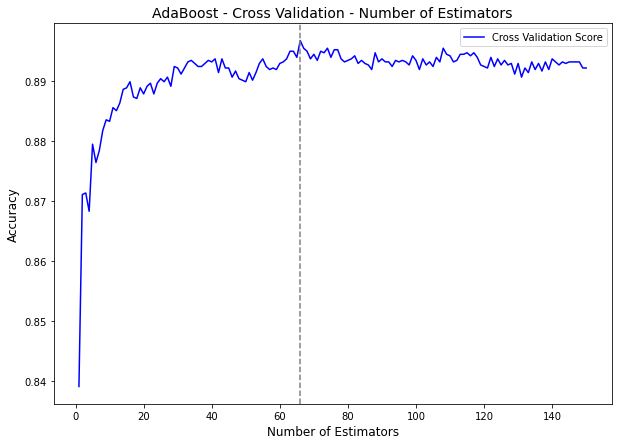

In [473]:
# create empty lists
cross_val_scores = []

# set a list of possible max depth values
n_estimator = list(range(1, 151))


for n in tqdm(n_estimator):
    
    # instantiate the model
    ab = AdaBoostClassifier(n_estimators = n, random_state = 42)
    
    # calculate the cross validation scores...
    cv_score = np.mean(cross_val_score(ab, X_train, y_train, cv=5))
    
    # ... and append the scores to the empty list
    cross_val_scores.append(cv_score)
        
    
# graph presets
plt.figure(figsize=(10, 7))

# graph data
plt.plot(n_estimator, cross_val_scores, label="Cross Validation Score", color = 'blue') #plot the cross validation scores

# graph settings
plt.xlabel('Number of Estimators', fontsize = 12) # set x-axis label
plt.axvline(x = n_estimator[np.argmax(cross_val_scores)], color = 'grey', linestyle = '--') # plot a vertical line where the cross validation score is highest
plt.ylabel('Accuracy', fontsize = 12) # set y-axis label
plt.title("AdaBoost - Cross Validation - Number of Estimators", fontsize = 14) # define a plot title
plt.legend()

# display graph
plt.show()

In [474]:
# retrieve and store the optimal number of estimators based on the cross validation scores plotted above
ab_cv_optimal_n_estimators = n_estimator[np.argmax(cross_val_scores)]

# display the result
f'Optimal number of estimators using Cross-Validation: {ab_cv_optimal_n_estimators}'

'Optimal number of estimators using Cross-Validation: 66'

100%|██████████| 4/4 [00:03<00:00,  1.28it/s]


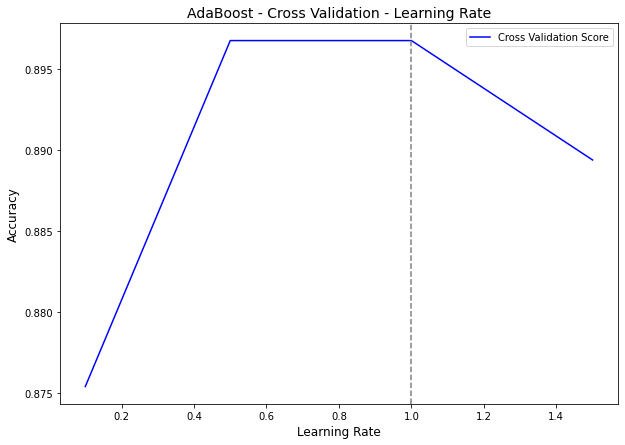

In [475]:
# create empty list
cross_val_scores = []

# set a list of possible max depth values
learning_rate = [0.1, 0.5, 1, 1.5]

for rate in tqdm(learning_rate):
    
    # instantiate the model
    ab = AdaBoostClassifier(n_estimators = ab_cv_optimal_n_estimators, 
                            learning_rate = rate, 
                            random_state = 42)
    
    # calculate the cross validation scores
    cv_score = np.mean(cross_val_score(ab, X_train, y_train, cv=5))
    
    # append the scores to empty list
    cross_val_scores.append(cv_score)
        
    
# graph presets
plt.figure(figsize=(10, 7))

# graph data
plt.plot(learning_rate, cross_val_scores, label="Cross Validation Score", color = 'blue') # plot the cross validation scores

# graph settings
plt.xlabel('Learning Rate', fontsize = 12) # set x-axis label
plt.axvline(x = learning_rate[np.argmax(cross_val_scores)], color = 'grey', linestyle = '--') # plot a vertical line where cross validation score is highest
plt.ylabel('Accuracy', fontsize = 12) # include y-axis label
plt.title("AdaBoost - Cross Validation - Learning Rate", fontsize = 14) # define plot title
plt.legend()

# display graph
plt.show()

In [476]:
ab_cv_optimal_learn_rate = learning_rate[np.argmax(cross_val_scores)]

f'Optimal learning rate using Cross-Validation: {ab_cv_optimal_learn_rate}'

'Optimal learning rate using Cross-Validation: 1'

In [477]:
# instantiate an Adaptive Boosting model
ab = AdaBoostClassifier(n_estimators = ab_cv_optimal_n_estimators,
                        learning_rate = ab_cv_optimal_learn_rate,
                        random_state = 42)

ab.fit(X_train, y_train)

AdaBoostClassifier(learning_rate=1, n_estimators=66, random_state=42)

In [478]:
# generate a set of value label predictions
y_pred = ab.predict(X_test)

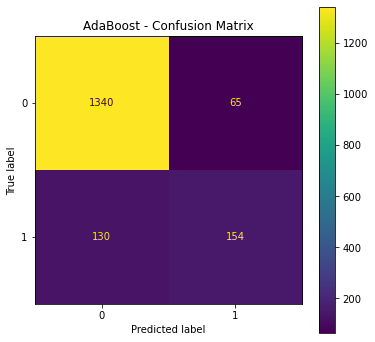

In [479]:
# plot a confusion matrix
fig, ax = plt.subplots(figsize = (6, 6))
plot_confusion_matrix(ab, X_test, y_test, ax = ax)
ax.set_title('AdaBoost - Confusion Matrix');

In [480]:
# generate a classification report
ab_report = classification_report(y_test, y_pred)

# display classification report
print(ab_report)

              precision    recall  f1-score   support

           0       0.91      0.95      0.93      1405
           1       0.70      0.54      0.61       284

    accuracy                           0.88      1689
   macro avg       0.81      0.75      0.77      1689
weighted avg       0.88      0.88      0.88      1689



In [481]:
ab_precision = round(precision_score(y_test, y_pred)*100, 2)
ab_recall = round(recall_score(y_test, y_pred)*100, 2)
ab_f1 = round(f1_score(y_test, y_pred)*100, 2)
ab_accuracy = round(accuracy_score(y_test, y_pred)*100, 2)

In [482]:
# list of lists with data points
data = [[dt_precision, dt_recall, dt_f1, dt_accuracy], # decision tree (dt) classification report results
        [rf_precision, rf_recall, rf_f1, rf_accuracy], # random forest (rf) classification report results
        [ab_precision, ab_recall, ab_f1, ab_accuracy]] # AdaBoost (ab) classification report results

# create model performance df
ab_classification_report = pd.DataFrame(data,
                                        columns = ['Precision', 'Recall', 'F1 Score', 'Accuracy'],
                                        index = ['Decision Tree', 'Random Forest', 'AdaBoost'])

# display df
ab_classification_report

,Precision,Recall,F1 Score,Accuracy
Decision Tree,66.67,30.99,42.31,85.79
Random Forest,91.84,79.23,85.07,95.32
AdaBoost,70.32,54.23,61.23,88.45


[Back to Top](#back_to_top)

### Gradient Boosting
---
<a id="gradient_boost"></a>

An alternate boosting method is called Gradient Boosting which, when combined with previous models, seeks to minimize the overall prediction error. Whereas AdaBoost accounts for the shortcomings of previous models by re-adjusting the weights, Gradient Boost relies on the gradients in the loss function. Given that the purpose of these models is to identify customers that are likely to cease using the e-commerce site, the loss function in this case would be a measure of how well the model is able to correctly classify each observation. As such, Gradient Boosting models attempt to predict the error from the previous model.

In order to apply Gradient Boost, it must first be imported from `sklearn.ensemble`:

In [483]:
# import Gradient Boost
from sklearn.ensemble import GradientBoostingClassifier

100%|██████████| 150/150 [03:15<00:00,  1.30s/it]


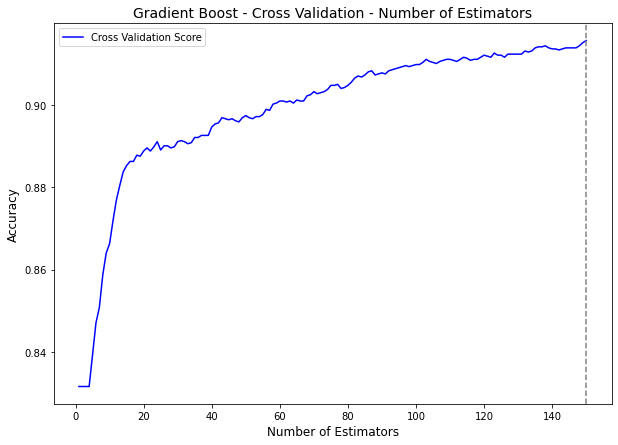

In [484]:
# create empty list
cross_val_scores = []

# set a list of possible max depth values
n_estimator = list(range(1, 151))


for n in tqdm(n_estimator):
    
    # instantiate the model
    gb = GradientBoostingClassifier(n_estimators = n, random_state = 42)
    
    # calculate the cross-validation scores based on the train data
    cv_score = np.mean(cross_val_score(gb, X_train, y_train, cv=5))
    
    # add the results to the list
    cross_val_scores.append(cv_score)
        
    
# graph presets
plt.figure(figsize=(10, 7))

# graph data
plt.plot(n_estimator, cross_val_scores, label="Cross Validation Score", color = 'blue') # plot the cross validation scores

# graph settings
plt.xlabel('Number of Estimators', fontsize = 12) # set x-axis label
plt.axvline(x = n_estimator[np.argmax(cross_val_scores)], color = 'grey', linestyle = '--') # plot a vertical line where the cross validation score is highest
plt.ylabel('Accuracy', fontsize = 12) # define y-axis label
plt.title("Gradient Boost - Cross Validation - Number of Estimators", fontsize = 14) # define a plot title
plt.legend()

# display graph
plt.show()

From the results displayed above, we may then retrieve the optimal number of estimators based on the cross-validation method.

In [485]:
# retrieve the optimal number of estimators based on cross validation
gb_cv_optimal_n_estimators = n_estimator[np.argmax(cross_val_scores)]

# display optimal number of estimators
f'Optimal number of estimators using Cross-Validation: {gb_cv_optimal_n_estimators}'

'Optimal number of estimators using Cross-Validation: 150'

100%|██████████| 4/4 [00:10<00:00,  2.56s/it]


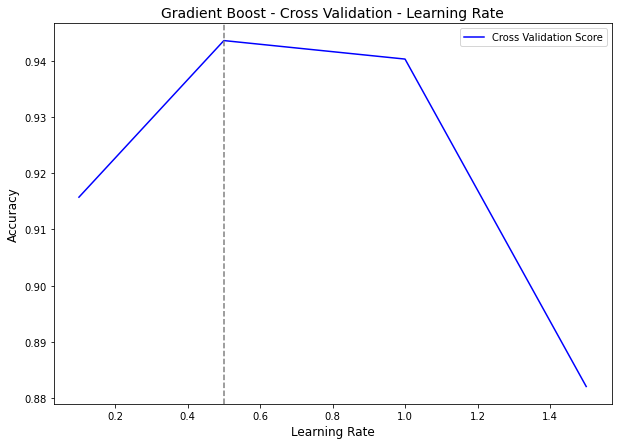

In [486]:
# create empty lists
cross_val_scores = []

# set a list of possible learning rates
learning_rate = [0.1, 0.5, 1, 1.5]

for rate in tqdm(learning_rate):
    
    # instantiate the model
    gb = GradientBoostingClassifier(n_estimators = gb_cv_optimal_n_estimators, 
                                    learning_rate = rate, 
                                    random_state = 42)
    
    # calculate the cross validation scores on the training data
    cv_score = np.mean(cross_val_score(gb, X_train, y_train, cv=5))
    
    # append the results to the list
    cross_val_scores.append(cv_score)
        
    
# graph presets
plt.figure(figsize=(10, 7))

# graph data
plt.plot(learning_rate, cross_val_scores, label="Cross Validation Score", color = 'blue') # plot the cross validation scores

# graph settings
plt.xlabel('Learning Rate', fontsize = 12) # set x-axis label
plt.axvline(x = learning_rate[np.argmax(cross_val_scores)], color = 'grey', linestyle = '--') # plot a vertical line where cross validation score is highest
plt.ylabel('Accuracy', fontsize = 12) # include y-axis label
plt.title("Gradient Boost - Cross Validation - Learning Rate", fontsize = 14) # define plot title
plt.legend()

# display graph
plt.show()

Based on the plot above, it would appear as though the optimal learning rate is 0.5 (as can be confirmed below):

In [487]:
# retrieve optimal learning rate
gb_cv_optimal_learn_rate = learning_rate[np.argmax(cross_val_scores)]

# display learning rate
f'Optimal learning rate using on Cross-Validation: {gb_cv_optimal_learn_rate}'

'Optimal learning rate using on Cross-Validation: 0.5'

With the hyperparameter settigns having been identified, a Gradient Boost model may be re-instantiated using the hyperparameter settings identified from which the model's performance may be assessed.

In [488]:
# instantiate the model with hyperparameter optimzation
gb = GradientBoostingClassifier(n_estimators = gb_cv_optimal_n_estimators,
                                learning_rate = gb_cv_optimal_learn_rate,
                                random_state = 42)

# fit the model to the train data
gb.fit(X_train, y_train)

GradientBoostingClassifier(learning_rate=0.5, n_estimators=150, random_state=42)

Once the model has been fit to the unscaled training data, we may call on the `.predict()` function to allow for the model to generate a set of predicted values based on the data contained within `X_test`:

In [489]:
# generate a set of predicted values based on the test data
y_pred = gb.predict(X_test)

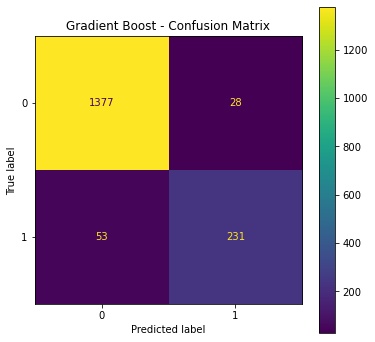

In [490]:
# plot a confusion matrix
fig, ax = plt.subplots(figsize = (6, 6))
plot_confusion_matrix(gb, X_test, y_test, ax = ax)
ax.set_title('Gradient Boost - Confusion Matrix');

In [491]:
# generate a classification report for Gradient Boost
gb_report = classification_report(y_test, y_pred)

# display classification report
print(gb_report)

              precision    recall  f1-score   support

           0       0.96      0.98      0.97      1405
           1       0.89      0.81      0.85       284

    accuracy                           0.95      1689
   macro avg       0.93      0.90      0.91      1689
weighted avg       0.95      0.95      0.95      1689



From the classification report above, each of the scores are to be stored across a set of new variables which are to be called when comparing the results of each model below.

In [492]:
gb_precision = round(precision_score(y_test, y_pred)*100, 2)
gb_recall = round(recall_score(y_test, y_pred)*100, 2)
gb_f1 = round(f1_score(y_test, y_pred)*100, 2)
gb_accuracy = round(accuracy_score(y_test, y_pred)*100, 2)

The results dataframe is then updated with the results of the Gradient Boost model for ease of comparison.

In [493]:
# list of lists with data points
data = [[dt_precision, dt_recall, dt_f1, dt_accuracy], # decision tree (dt) classification report results
        [rf_precision, rf_recall, rf_f1, rf_accuracy], # random forest (rf) classification report results
        [ab_precision, ab_recall, ab_f1, ab_accuracy], # AdaBoost (ab) classification report results
        [gb_precision, gb_recall, gb_f1, gb_accuracy]] # Gradient Boost (gb) classification report results

# create model performance df
gb_classification_report = pd.DataFrame(data,
                                        columns = ['Precision', 'Recall', 'F1 Score', 'Accuracy'],
                                        index = ['Decision Tree', 'Random Forest', 'AdaBoost', 'Gradient Boost'])

# display df
gb_classification_report

,Precision,Recall,F1 Score,Accuracy
Decision Tree,66.67,30.99,42.31,85.79
Random Forest,91.84,79.23,85.07,95.32
AdaBoost,70.32,54.23,61.23,88.45
Gradient Boost,89.19,81.34,85.08,95.20


[Back to Top](#back_to_top)

### XG Boost
---
<a id="xg_boost"></a>

Of the Boosting methods covered so far, we have employed Adaptive Boosting and Gradient Boost. The last such boosting method that will covered in the following section is known as eXtreme Gradient Boosting (XG Boost) and is an implementation of Gradient Boost.

In [494]:
# import XG Boost
from xgboost import XGBClassifier

C:\Users\arnau\anaconda3\envs\capstone\lib\site-packages\xgboost\compat.py:93: FutureWarning:

pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.



100%|██████████| 50/50 [00:13<00:00,  3.58it/s]


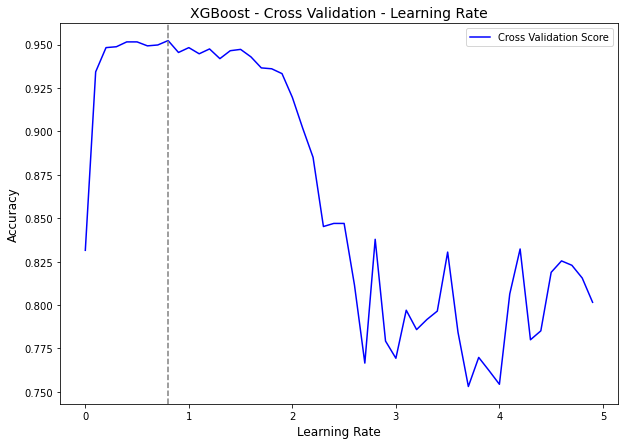

In [495]:
# create empty list
cross_val_scores = []

# set a list of possible max depth values
learning_rate = np.arange(0, 5, 0.1)

for rate in tqdm(learning_rate):

    # instantiate the model    
    xgb = XGBClassifier(learning_rate = rate, random_state = 42)
    
    # determine cross validation scores for each learning rate
    cv_score = np.mean(cross_val_score(xgb, X_train, y_train, cv=5))
    
    # append the scores to the list
    cross_val_scores.append(cv_score)
        
    
# graph presets
plt.figure(figsize=(10, 7))

# graph data
plt.plot(learning_rate, cross_val_scores, label="Cross Validation Score", color = 'blue') # plot the cross validation scores

# graph settings
plt.xlabel('Learning Rate', fontsize = 12) # set x-axis label
plt.axvline(x = learning_rate[np.argmax(cross_val_scores)], color = 'grey', linestyle = '--') # plot a vertical line where cross validation score is highest
plt.ylabel('Accuracy', fontsize = 12) # include y-axis label
plt.title("XGBoost - Cross Validation - Learning Rate", fontsize = 14) # define plot title
plt.legend()

# display graph
plt.show()

Based on the plot above, it may be observed that the optimal learning rate is approximately 0.8. We may confirm our intuition by using the `np.argmax()` function to retrieve the learning rate that results in the highest cross-validation score.

In [496]:
# store the optimal learning rate for XG Boost
xgb_cv_optimal_learn_rate = learning_rate[np.argmax(cross_val_scores)]

# display the results
f'Optimal learning rate using on Cross-Validation: {round(xgb_cv_optimal_learn_rate, 2)}'

'Optimal learning rate using on Cross-Validation: 0.8'

Having determined the optimal hyperparameter setting, the model is then re-instantiated and fit to the training data.

In [497]:
# instantiate the model
xgb = XGBClassifier(learning_rate = xgb_cv_optimal_learn_rate, random_state = 42)

# fit the model to the train set
xgb.fit(X_train, y_train);

From which, we call upon the `.predict()` method in order to allow for the model to generate a set of predictions (`y_pred`) based on the information contained within `X_test`. The results of which will be used when creating a confusion matrix.

In [498]:
# generate a set of predictions based on 'X_test'
y_pred = xgb.predict(X_test)

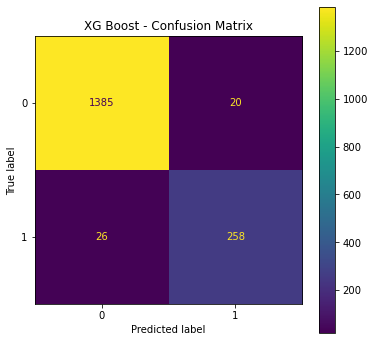

In [499]:
# plot a confusion matrix
fig, ax = plt.subplots(figsize = (6, 6))
plot_confusion_matrix(xgb, X_test, y_test, ax = ax)
ax.set_title('XG Boost - Confusion Matrix');

In [500]:
# generate a classification report
xgb_report = classification_report(y_test, y_pred)

# display classification report
print(xgb_report)

              precision    recall  f1-score   support

           0       0.98      0.99      0.98      1405
           1       0.93      0.91      0.92       284

    accuracy                           0.97      1689
   macro avg       0.95      0.95      0.95      1689
weighted avg       0.97      0.97      0.97      1689



In [501]:
# store the results of the above classification report
xgb_precision = round(precision_score(y_test, y_pred)*100, 2)
xgb_recall = round(recall_score(y_test, y_pred)*100, 2)
xgb_f1 = round(f1_score(y_test, y_pred)*100, 2)
xgb_accuracy = round(accuracy_score(y_test, y_pred)*100, 2)

In [502]:
data = [[dt_precision, dt_recall, dt_f1, dt_accuracy], # decision tree (dt) classification report results
        [rf_precision, rf_recall, rf_f1, rf_accuracy], # random forest (rf) classification report results
        [ab_precision, ab_recall, ab_f1, ab_accuracy], # AdaBoost (ab) classification report results
        [gb_precision, gb_recall, gb_f1, gb_accuracy], # Gradient Boost (gb) classification report results
        [xgb_precision, xgb_recall, xgb_f1, xgb_accuracy]] # XG Boost (xgb) classification report results

# create model performance df
xgb_classification_report = pd.DataFrame(data,
                                         columns = ['Precision', 'Recall', 'F1 Score', 'Accuracy'],
                                         index = ['Decision Tree', 'Random Forest', 'AdaBoost', 'Gradient Boost', 'XG Boost'])

# display df
xgb_classification_report

,Precision,Recall,F1 Score,Accuracy
Decision Tree,66.67,30.99,42.31,85.79
Random Forest,91.84,79.23,85.07,95.32
AdaBoost,70.32,54.23,61.23,88.45
Gradient Boost,89.19,81.34,85.08,95.20
XG Boost,92.81,90.85,91.81,97.28


Having evaluted the performance of Decision Tree, Random Forest, AdaBoost, Gradient Boost and XG Boost, it can be noted that where the Gradient Boosting model had commanded the highest recall score so far; the XG Boost model was able to attain a recall score of 91% and an overall accuracy of 98%. In fact, it can be noted that across each of the 4 model evaluation metrics (Precision, Recall, F1 Score, Accuracy), is the best performing model.

Though boosting methods represent one category of machine learning models, a final one that is to be covered in the following section is that of Neural Network.

[Back to Top](#back_to_top)

# Neural Network - TensorFlow
<a id="neural_network"></a>

---

So far, we have evaluated the performance of Supervised Machine Learning Models based on un-sampled and sampled data. In the case of sampled data, Synthetic Minority Oversampling Technique (SMOTE) was utilized in order to address the class imbalance that had been present in the original dataset. From which, we were able to compare how two distinct sets of models performed.

First, we assessed the performance of Non-Ensemble Learning Models (such as K Nearest Neighbors, Decision Trees and Support Vector Machines) on un-sampled data. Following this, a set of Ensemble Learning Models were used (such as K Nearest Neighbors, Random Forests and Support Vector Machines - Voting Ensemble) on the same un-sampled data. From which, we were able to compare the performance of Non-Ensemble Learning Models versus Ensemble Learning Models. 

Then, we applied the same analytical structure of Supervised Machine Learning Models (such as K Nearest Neighbors, Decision Trees and Support Vector Machines) on sampled data using SMOTE. The result of which allows for the comparison of model performance based on Non-Ensemble Learning versus Ensemble Learning. In this section, we introduced the concept of evaluating a model's performance based on recall whereas the previous section had strictly been based on model accuracy as a determining factor for model performance. 

Lastly, the ensemble method of boosting was leveraged (including Adaptive Boosting, Gradient Boosting and XG Boost) which employed a series of Decision Trees as the base estimator. From which, we were able to compare the different in model performance between: Decision Trees, Random Forest, Adaptive Boosting, Gradient Boosting and XG Boost).

In this next and final section of the Notebook, a machine learning library known as PyTorch will be implemented in order to help create a Neural Network. Though predominantly utilized in the field of Natural Language Processing (NLP) and Computer Vision; it may also be applied towards binary classification problems such as customer churn.

In [503]:
# import TensorFlow and Keras
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

Before deploying a neural network, the data must first be instantiated, split and scaled.

In [504]:
# drop the 'churn' column
# save all remaining columns to the independent variable ('X')
X = customer_df_with_dummies.drop('churn', axis = 1) 

# save 'churn' to the dependent variable ('y')
y = customer_df_with_dummies['churn']

In [505]:
# split the data such that the test set is comprised of 30% of the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, stratify = y, random_state = 42)

In [506]:
# instantiate the scaler
scaler = StandardScaler()

# convert the data into tensors of type float64
X_train_scaled = np.array(scaler.fit_transform(X_train), dtype=np.float64)
X_test_scaled = np.array(scaler.transform(X_test), dtype=np.float64)

y_train = np.array(y_train.values, dtype = np.float64)
y_test = np.array(y_test.values, dtype = np.float64)

To create a neural network, we must define the network's structure in terms of each hidden layer's type (activation function) and size (the number of nodes for each layer). In the following code cell, we define our model as a sequential one, meaning that our model will be comprised of a linear stack of layers. 

Furthermore, regularization is to be introduced at each hidden layer of the network to prevent the neural network from overfitting to the data and thus allow for it to better generalize. In the case of this neural network, a regularizer is introduced with a factor of 0.005. In addition, `.Dropout()` will also be used as a means of mitigating the possibility of overfitting. In doing so, the neural network is forced to learn more about the data given that the `.Dropout()` function causes the weights of some nodes to be set to 0. As can be found below, 20% of the nodes of each hidden layer will be set to 0.

In [507]:
# before defining and testing the network, we will want to reset all states generated by Keras
tf.keras.backend.clear_session()

A callback function is also introduced that will stop the model training process in the event that the performance of the designated metric does not improve after a designated number of epochs. In the case of the `.EarlyStopping()` function below, the `monitor` hyper-parameter specifies the quantity to be monitored, with the `patience` argument specified that if the `val_loss` does not improve after 5 epochs, the training will be stopped.

In [508]:
# define a callback
callback = tf.keras.callbacks.EarlyStopping(monitor = 'val_loss', patience = 10)

In [509]:
# create a new sequential model
model = keras.Sequential()

# instantiate regularizer to prevent overfitting
regularizer = keras.regularizers.l2(0.005)

# declare the hidden layers

# hidden layer #1
model.add(layers.Dense(20, activation = "relu", kernel_regularizer = regularizer))
model.add(layers.Dropout(0.2)) # set 20% of the nodes to 0

# hidden layer #2
model.add(layers.Dense(15, activation = "relu", kernel_regularizer = regularizer))
model.add(layers.Dropout(0.2)) # set 20% of the nodes to 0

# hidden layer #3
model.add(layers.Dense(10, activation = "relu", kernel_regularizer = regularizer))
model.add(layers.Dropout(0.2)) # set 20% of the nodes to 0

# hidden layer #4
model.add(layers.Dense(10, activation = "relu", kernel_regularizer = regularizer))
model.add(layers.Dropout(0.2)) # set 20% of the nodes to 0

# hidden layer #5
model.add(layers.Dense(5, activation = "relu", kernel_regularizer = regularizer))
model.add(layers.Dropout(0.2)) # set 20% of the nodes to 0

# output layer
model.add(layers.Dense(1, activation = "sigmoid"))

From the architecture specified above, it can be noted that the activation function of the output layer differs from the hidden layers. Whereas the hidden layers have a `relu` activation function, the output layer relies on the `sigmoid` activation function. Given that the network is being utilized to resolve a binary classification problem. a sigmoid function is best suited since it outputs a value between 0 and 1. Whereby the value generated can be interpreted as the probability of an observation belonging to class 1.

Having define the architecture of the neural network, we may then proceed in customizing the settings that will be used whilst the network is training. Of the available optimizers, we will implement the Adam algorithm using the default learning rate of 0.001. In addition, the `BinaryCrossentropy()` function will serve as a means of computing the loss between true labels and predicted labels and given that this neural network will be applied towards a binary classification problem. Lastly, the `model.compile()` will also be comprised of a model evaluation metric that calculates how often predictions match binary labels (in this case `.BinaryAccuracy()`).

In [510]:
# compile the model
model.compile(
    
    # declare optimizer
    optimizer = keras.optimizers.Adam(),
    
    # loss function to minimize
    loss = keras.losses.BinaryCrossentropy(),
    
    # metric used to evaluate model
    metrics = [keras.metrics.BinaryAccuracy()])

At which stage, the model may be fit to the train set for 200 epochs. `Epochs` are one of the hyper-parameters that can be adjusted which determines the number of times that the entire dataset is passed forward and backward through the neural network (also known as forward- and backward- propagation.

In [511]:
# train the network
history = model.fit(X_train_scaled, y_train, 
                    epochs = 200, 
                    verbose = 1, 
                    callbacks = [callback], 
                    validation_data = (X_test_scaled, y_test))

Epoch 1/200
124/124 [==============================] - 0s 2ms/step - loss: 0.8702 - binary_accuracy: 0.7501 - val_loss: 0.7110 - val_binary_accuracy: 0.8319
Epoch 2/200
124/124 [==============================] - 0s 871us/step - loss: 0.7021 - binary_accuracy: 0.8282 - val_loss: 0.6149 - val_binary_accuracy: 0.8319
Epoch 3/200
124/124 [==============================] - 0s 855us/step - loss: 0.6161 - binary_accuracy: 0.8313 - val_loss: 0.5454 - val_binary_accuracy: 0.8319
Epoch 4/200
124/124 [==============================] - 0s 855us/step - loss: 0.5472 - binary_accuracy: 0.8313 - val_loss: 0.4971 - val_binary_accuracy: 0.8319
Epoch 5/200
124/124 [==============================] - 0s 847us/step - loss: 0.5012 - binary_accuracy: 0.8315 - val_loss: 0.4588 - val_binary_accuracy: 0.8319
Epoch 6/200
124/124 [==============================] - 0s 847us/step - loss: 0.4639 - binary_accuracy: 0.8315 - val_loss: 0.4357 - val_binary_accuracy: 0.8319
Epoch 7/200
124/124 [===========================

124/124 [==============================] - 0s 831us/step - loss: 0.2961 - binary_accuracy: 0.9061 - val_loss: 0.3158 - val_binary_accuracy: 0.9171
Epoch 53/200
124/124 [==============================] - 0s 820us/step - loss: 0.2988 - binary_accuracy: 0.9087 - val_loss: 0.3161 - val_binary_accuracy: 0.9159
Epoch 54/200
124/124 [==============================] - 0s 879us/step - loss: 0.2974 - binary_accuracy: 0.9173 - val_loss: 0.3099 - val_binary_accuracy: 0.9159
Epoch 55/200
124/124 [==============================] - 0s 831us/step - loss: 0.3029 - binary_accuracy: 0.9056 - val_loss: 0.3155 - val_binary_accuracy: 0.9207
Epoch 56/200
124/124 [==============================] - 0s 823us/step - loss: 0.2953 - binary_accuracy: 0.9140 - val_loss: 0.3074 - val_binary_accuracy: 0.9183
Epoch 57/200
124/124 [==============================] - 0s 831us/step - loss: 0.2891 - binary_accuracy: 0.9155 - val_loss: 0.3143 - val_binary_accuracy: 0.9124


Note that although the `epoch` parameter had been assigned a value of 200, the model ceased training prior to reaching the maximal number of epochs. This demonstrates the functionality of `callback`, in that the `val_loss` metric did not improve after 10 epochs at which point the model stopped training.

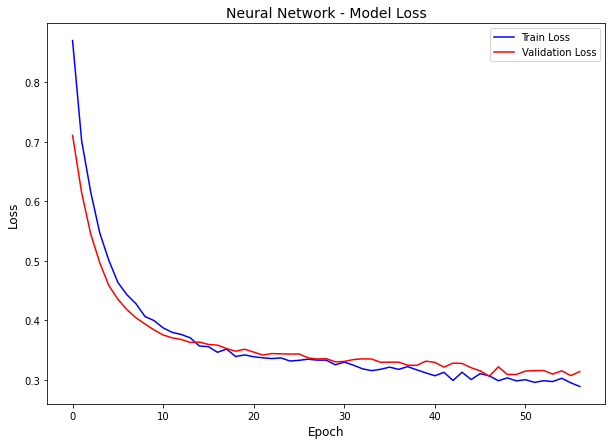

In [512]:
# graph presets
plt.figure(figsize = (10, 7))

# graph data
plt.plot(history.history['loss'], c = "blue") # plot the loss function
plt.plot(history.history['val_loss'], c = "red") # plot the validation loss function

# graph settings
plt.xlabel('Epoch', fontsize = 12) # define x-axis label
plt.ylabel('Loss', fontsize = 12) # define y-axis label
plt.title('Neural Network - Model Loss', fontsize = 14) # set plot title
plt.legend(['Train Loss', 'Validation Loss'])

# display graph
plt.show()

Based on the results shown above, it can be seen that the train and validation loss continue to decrease after each epoch. After which, the train and validation loss begins to plateau (at around 40 epochs). From these results, it can be argued that we can cease running and training the model after 40 epochs, since the loss no longer decreases after this point.

In addition, we may determine how the network's performance varies over the number of epochs with reference to the line plot below. As denoted by the vertical grey dotted line, it can be stated that the model attains the highest train accuracy between 50 and 60 epochs with a score of approximately 90% (+/- 1%).

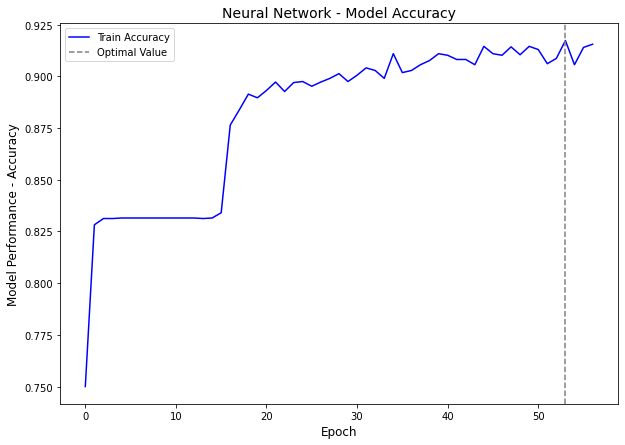

In [513]:
# graph presets
plt.figure(figsize = (10, 7))

# graph data
plt.plot(history.history['binary_accuracy'], c = "blue") # plot the binary accuracy scores
plt.axvline(np.argmax(history.history['binary_accuracy']), color = 'grey', linestyle = '--', label = 'Optimal Value')

# graph settings
plt.xlabel('Epoch', fontsize = 12) # define x-axis label
plt.ylabel('Model Performance - Accuracy', fontsize = 12) # define y-axis label
plt.title('Neural Network - Model Accuracy', fontsize = 14) # set plot title
plt.legend(['Train Accuracy', 'Optimal Value'])

# display graph
plt.show()

Finally, the neural network train and test accuracies may be determined:

In [514]:
# evaluate the network's performance
train_accuracy = history.history["binary_accuracy"][-1]
result = model.evaluate(X_test_scaled, y_test, verbose = 0)

print(f"Model Type: Neural Network\n")

print(f"Train Accuracy: {round((train_accuracy)*100, 2)}%")
print(f"Test Accuracy: {round((result[1])*100, 2)}%") 

Model Type: Neural Network

Train Accuracy: 91.55%
Test Accuracy: 91.24%


[Back to Top](#back_to_top)

# Conclusion
<a id="conclusion"></a>

---

TODO: Add a conclusion

[Back to Top](#back_to_top)

# Appendix
<a id="appendix"></a>

---

The following table serves as a reference to the various abbreviations used throughout the Notebook:

| Abbreviation        | Definition                       |
| :-----------------: |:-------------------------------: |
| ab                  | AdaBoost                         |
| consol              | Consolidated                     |
| cust                | Customer                         |
| cv                  | Cross-Validation                 |
| dt                  | Decision Tree                    |
| gb                  | Gradient Boost                   |
| ind                 | Independent                      |
| knn                 | K Nearest Neighbor               |
| lr                  | Logistic Regression              |
| p_val               | P-Value                          |
| not_stat_signif     | Not Statistically Significant    |
| rf                  | Random Forest                    |
| sm                  | SMOTE                            |
| svm                 | Support Vector Machine           |
| unconsol            | Unconsolidated                   |
| val                 | Validation                       |
| var                 | Variable                         |
| xgb                 | XG Boost                         |

**Notes:**

Independent: Referring to independent variables</br>
Validation: Referring to the train and validation data sets that are used for hyper-parameter tuning.